# Individual Differences Figure
Kai Sandbrink

2024-03-13

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from utils import format_axis

import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from utils import flatten

analysis_folder = os.path.join('panels', 'fig_inddiffs')
os.makedirs(analysis_folder, exist_ok=True)

square=True
axes_off=True

from settings_anal import TEXTWIDTH

In [2]:
day1_test_mask_cutoff = {
    "groupA": {"lower": 10, "upper": 90},
    "groupB": {"lower": 8, "upper": 72}
}

#day1_test_mask_cutoff = None

## Panel -A: Perturbation Plots
### PEPE

In [3]:
from settings_anal import pepe_human_ape_models as pepe_models

#timestamp_traj = '20240403124409'
timestamp_traj = '20240503230802'
timestamp_original_traj = '20231006143445'
#target_taus = np.arange(-0.5, 1.51, 0.5).astype(float)
perturbation_taus = np.arange(-1.5, 1.6, 0.25).astype(float)
test_taus = np.arange(0, 1.01, 0.125)

### READING IN PERTURBED TRAJECTORIES
mistrained_traj_base_folder = os.path.join('data','perturbed','pepe')

models_mis_taus_control_errs = []
models_mis_taus_counters_peeks = []
models_mis_taus_rewss = []

for model in pepe_models:

    mis_taus_control_errs = []
    mis_taus_counters_peeks = []
    mis_taus_rewss = []

    #for mistrained_tau in target_taus:
    for mistrained_tau in perturbation_taus:

        #mistrained_traj_folder = os.path.join(mistrained_traj_base_folder, str(model), 'perturbed_tau%d' %(mistrained_tau*100))
        mistrained_traj_folder = os.path.join(mistrained_traj_base_folder, str(model), 'perturbed_tau_perturbation%d' %(mistrained_tau*100))

        control_errs_taus_ape = pickle.load(open(os.path.join(mistrained_traj_folder, timestamp_traj + '_perturbed_control_errs_taus_ape.pkl'), 'rb'))
        counters_peeks_taus = pickle.load(open(os.path.join(mistrained_traj_folder, timestamp_traj + '_perturbed_counters_peeks_taus.pkl'), 'rb'))
        rewss_taus = pickle.load(open(os.path.join(mistrained_traj_folder, timestamp_traj + '_rewss_taus.pkl'), 'rb'))

        mis_taus_control_errs.append(control_errs_taus_ape)
        mis_taus_counters_peeks.append(counters_peeks_taus)
        mis_taus_rewss.append(rewss_taus)

    models_mis_taus_control_errs.append(mis_taus_control_errs)
    models_mis_taus_counters_peeks.append(mis_taus_counters_peeks)
    models_mis_taus_rewss.append(mis_taus_rewss)

models_mis_taus_control_errs = np.array(models_mis_taus_control_errs)
models_mis_taus_counters_peeks = np.array(models_mis_taus_counters_peeks)
models_mis_taus_rewss = np.array(models_mis_taus_rewss)

### SELECT RELEVANT SUBMATRIX
perturbation_values_to_keep = [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]
indices_to_keep = indices = np.where(np.isin(perturbation_taus, perturbation_values_to_keep))[0]
perturbation_taus = perturbation_taus[indices_to_keep]
models_mis_taus_control_errs = models_mis_taus_control_errs[:,indices_to_keep]
models_mis_taus_counters_peeks = models_mis_taus_counters_peeks[:,indices_to_keep]
models_mis_taus_rewss = models_mis_taus_rewss[:,indices_to_keep]

### READING IN ORIGINAL TRAJECTORY

eval_base_folder = os.path.join('data','eval','pepe')
models_orig_taus_control_errs = []
models_orig_taus_counters_peeks = []
models_orig_taus_rewss = []

for model in pepe_models:

    orig_traj_folder = os.path.join(eval_base_folder, str(model))

    control_errs_taus_ape = pickle.load(open(os.path.join(orig_traj_folder, timestamp_original_traj + '_control_errs_taus_ape.pkl'), 'rb'))
    counters_peeks_taus = pickle.load(open(os.path.join(orig_traj_folder, timestamp_original_traj + '_counters_peeks_taus.pkl'), 'rb'))
    rewss_taus = pickle.load(open(os.path.join(orig_traj_folder, timestamp_original_traj + '_rewss_taus.pkl'), 'rb'))

    models_orig_taus_control_errs.append(control_errs_taus_ape)
    models_orig_taus_counters_peeks.append(counters_peeks_taus)
    models_orig_taus_rewss.append(rewss_taus)

models_orig_taus_control_errs = np.array(models_orig_taus_control_errs)
models_orig_taus_counters_peeks = np.array(models_orig_taus_counters_peeks)
models_orig_taus_rewss = np.array(models_orig_taus_rewss)

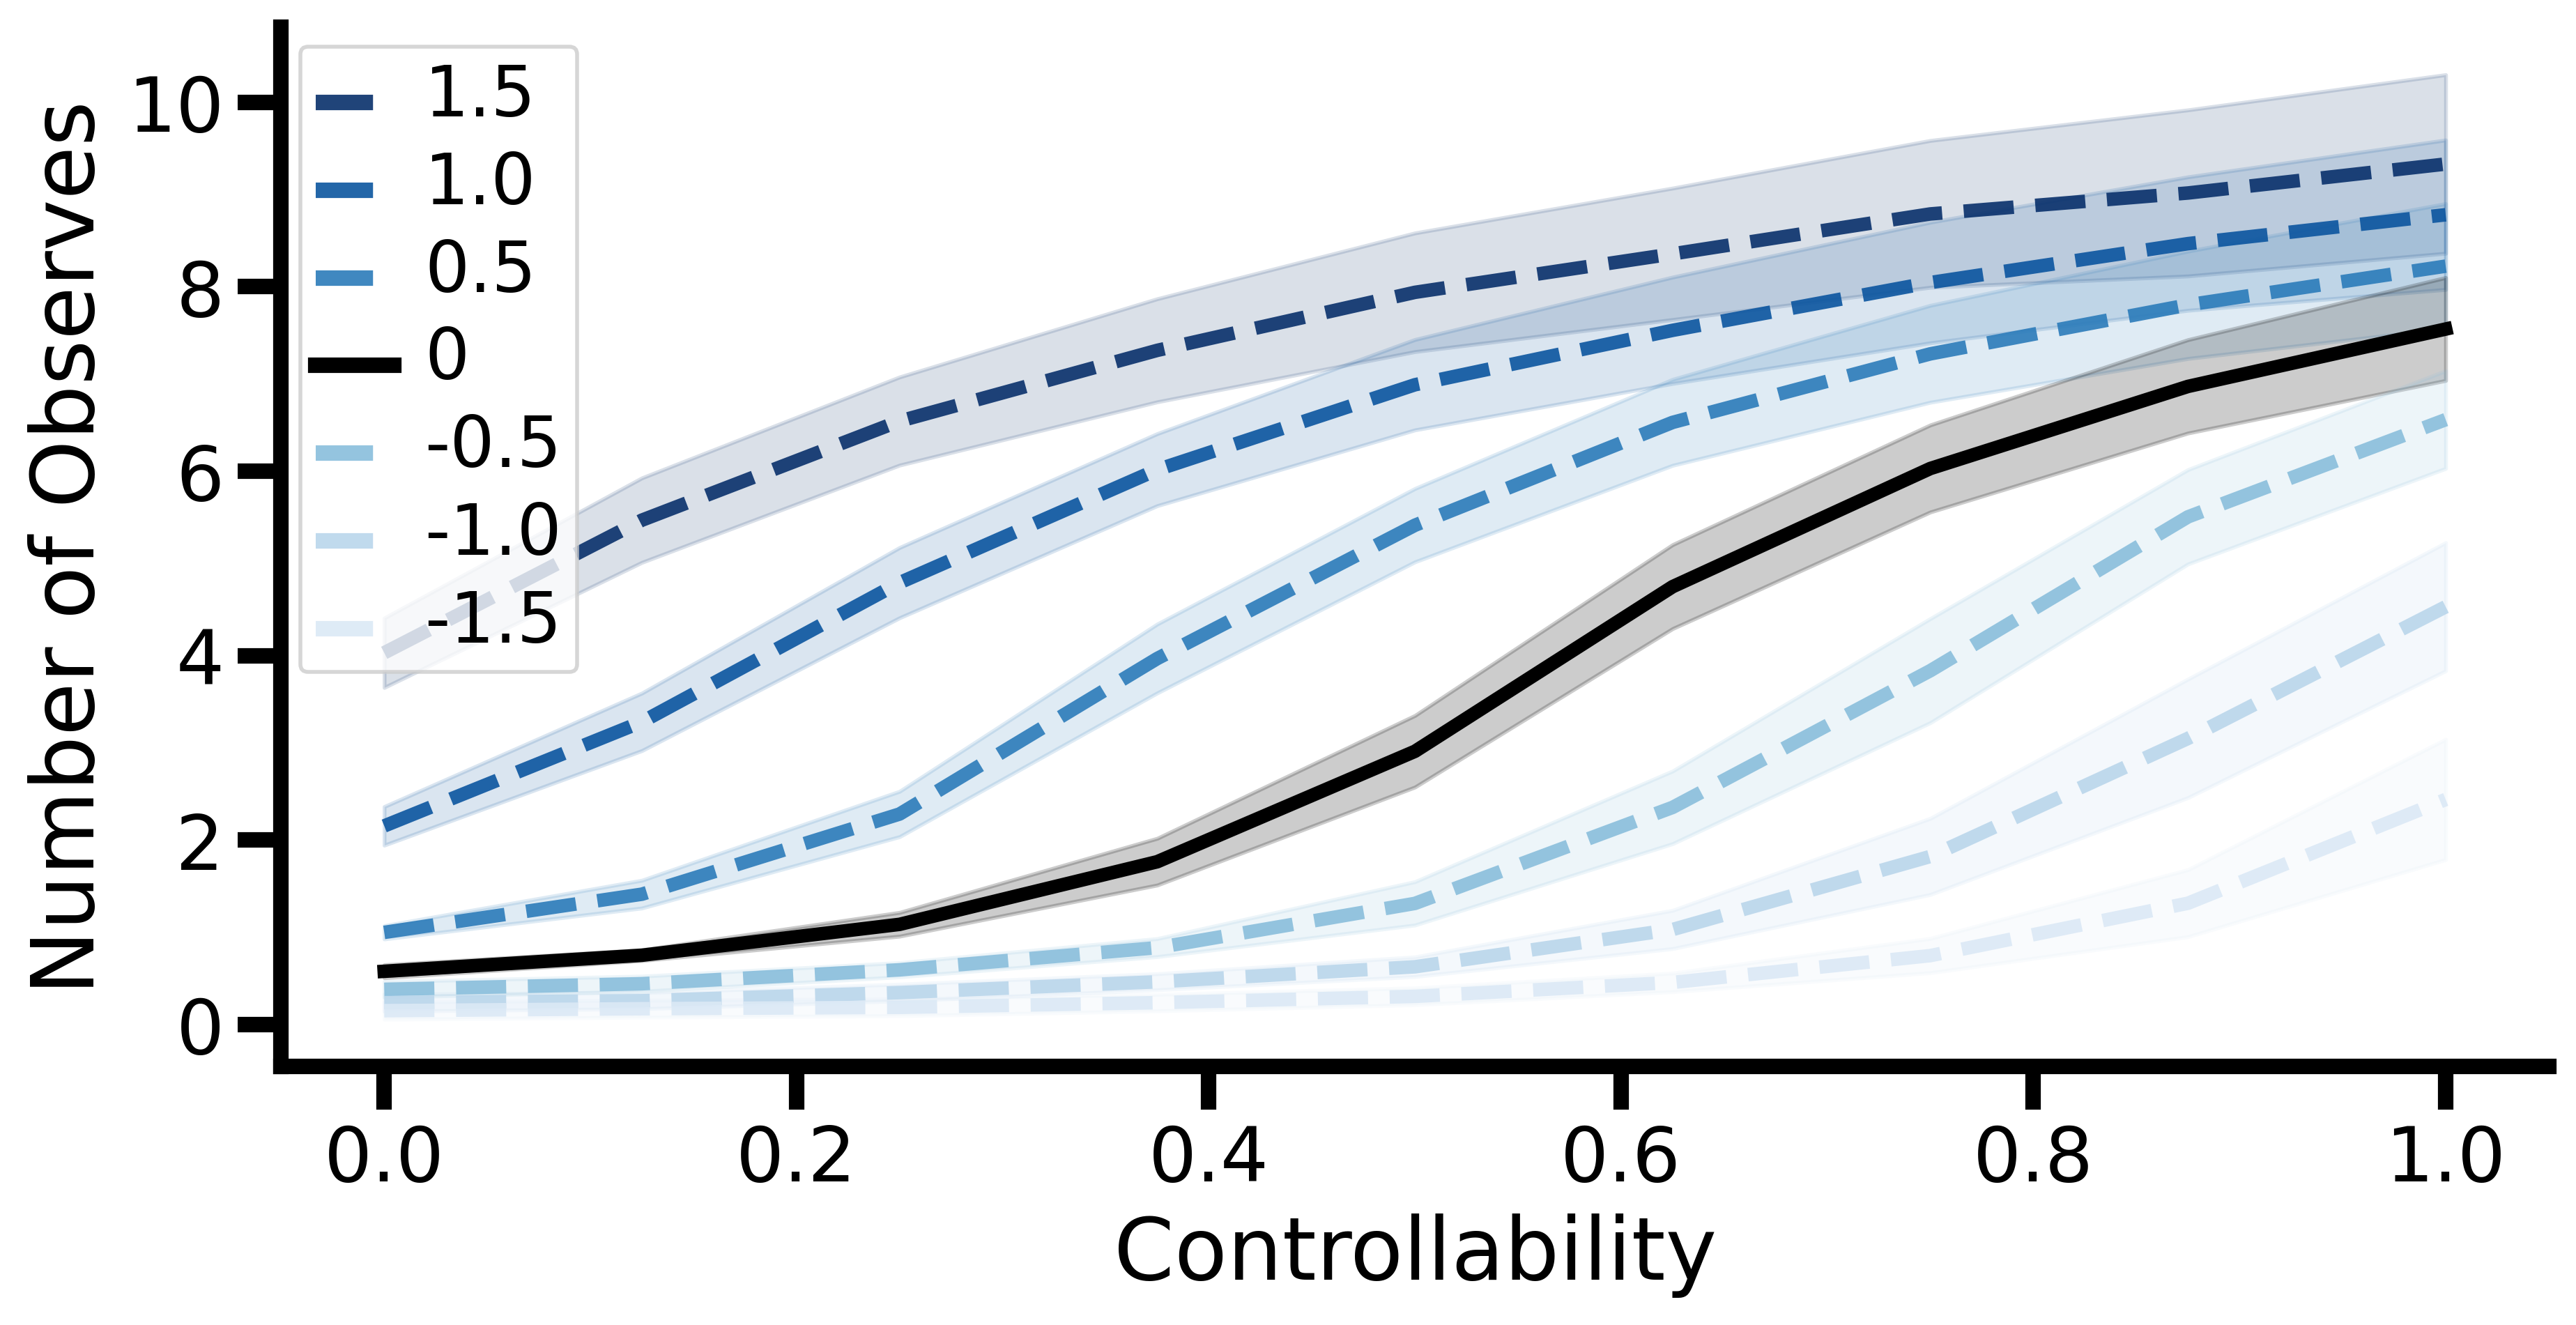

In [4]:
from test_analyses import plot_behavior_mistrained

#fig = plot_behavior_mistrained(test_taus, np.flip(models_mis_taus_counters_peeks, axis=(0,2)), np.arange(0,1.01,0.125), np.flip(models_orig_taus_counters_peeks, axis=(1)), axis_xlabel='Efficacy', axis_ylabel='Number of Observes per Episode', target_taus = target_taus, cmap=mpl.cm.Blues, figsize=(8.5, 4.8))
#fig = plot_behavior_mistrained(test_taus, np.flip(models_mis_taus_counters_peeks, axis=(0,2)), np.arange(0,1.01,0.125), np.flip(models_orig_taus_counters_peeks, axis=(1)), axis_xlabel='Efficacy', axis_ylabel='Number of Observes per Episode', cmap=mpl.cm.Blues, figsize=(8.5, 4.8), perturbation_taus=perturbation_taus)
fig = plot_behavior_mistrained(test_taus, np.flip(models_mis_taus_counters_peeks, axis=(0,2)), axis_xlabel='Controllability', axis_ylabel='Number of Observes', cmap=mpl.cm.Blues, figsize=(10.4952, 4.9359), font_size_multiplier=1.4, perturbation_taus=perturbation_taus)

In [5]:
fig.savefig(os.path.join(analysis_folder, 'perturbed_pepe.png'))
fig.savefig(os.path.join(analysis_folder, 'perturbed_pepe.svg'))

#### Stats

In [6]:
selected_n_observes = np.flip(models_mis_taus_counters_peeks, axis=(0,2))
selected_n_observes = selected_n_observes[:, [1,3,5]].sum(axis=-1).T
tested_levels = [1, 0, -1]

In [7]:
## MEANS AND SEMS
for level, obs in zip(tested_levels, selected_n_observes):
    print("Test Controllability ", level)
    print("Mean ", obs.mean())
    print("StdErr ", obs.std()/np.sqrt(obs.shape[0]))
    print("N", obs.shape[0])

Test Controllability  1
Mean  56.007999999999996
StdErr  4.173292417264814
N 10
Test Controllability  0
Mean  32.39200000000001
StdErr  2.633572402650058
N 10
Test Controllability  -1
Mean  12.431000000000001
StdErr  2.152446259491744
N 10


In [8]:
## TUKEY'S
groups = flatten([[level]*len(obs) for level, obs in zip(tested_levels, selected_n_observes)])

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=flatten(selected_n_observes), groups=groups, alpha=0.05)

# Print the results
print(tukey_result)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    -1      0   19.961 0.0006  8.4723 31.4497   True
    -1      1   43.577    0.0 32.0883 55.0657   True
     0      1   23.616 0.0001 12.1273 35.1047   True
----------------------------------------------------


In [9]:
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

reshaped_data = selected_n_observes.T
pvals = []
pairs = [(0, 1), (0, 2), (1, 2)]  # Indices of settings pairs
for i, (idx1, idx2) in enumerate(pairs):
    t_stat, p_val = ttest_rel(reshaped_data[:, idx1], reshaped_data[:, idx2])
    pvals.append(p_val)
    print(f"Paired t-test {i+1}: p-value = {p_val}")

# Apply Holm-Bonferroni correction
reject, pvals_corrected, _, _ = multipletests(pvals, alpha=0.05, method='holm')
print("\nCorrected p-values (Holm-Bonferroni):")
for i, (reject, p_val) in enumerate(zip(reject, pvals_corrected)):
    print(f"Comparison {i+1}: reject null hypothesis = {reject}, corrected p-value = {p_val}")

Paired t-test 1: p-value = 5.880834838731732e-06
Paired t-test 2: p-value = 9.106126333118589e-07
Paired t-test 3: p-value = 1.5822394721806108e-07

Corrected p-values (Holm-Bonferroni):
Comparison 1: reject null hypothesis = True, corrected p-value = 5.880834838731732e-06
Comparison 2: reject null hypothesis = True, corrected p-value = 1.8212252666237178e-06
Comparison 3: reject null hypothesis = True, corrected p-value = 4.7467184165418325e-07


### LEVC

In [10]:
from settings_anal import levc_human_ape_models as levc_models

#timestamp_traj = '20240403124415'
#timestamp_traj = '20240506202441'
timestamp_traj = '20240507022148'
timestamp_original_traj = '20240311133201'
#target_taus = np.arange(-3, 4.01, 0.5).astype(float)
perturbation_taus = np.arange(-3, 3.01, 0.25)
test_taus = np.arange(0, 1.01, 0.125)

### READING IN PERTURBED TRAJECTORIES
mistrained_traj_base_folder = os.path.join('data','perturbed','levc')

models_mis_taus_control_errs = []
models_mis_taus_counters_peeks = []
models_mis_taus_rewss = []
models_mis_taus_sleepss = []

for model in levc_models:

    mis_taus_control_errs = []
    mis_taus_counters_peeks = []
    mis_taus_rewss = []
    mis_taus_sleepss = []

    #for mistrained_tau in target_taus:
    for mistrained_tau in perturbation_taus:

        mistrained_traj_folder = os.path.join(mistrained_traj_base_folder, str(model), 'perturbed_tau_perturbation%d' %(mistrained_tau*100))

        control_errs_taus_ape = pickle.load(open(os.path.join(mistrained_traj_folder, timestamp_traj + '_perturbed_control_errs_taus_ape.pkl'), 'rb'))
        counters_peeks_taus = pickle.load(open(os.path.join(mistrained_traj_folder, timestamp_traj + '_perturbed_counters_peeks_taus.pkl'), 'rb'))
        rewss_taus = pickle.load(open(os.path.join(mistrained_traj_folder, timestamp_traj + '_rewss_taus.pkl'), 'rb'))
        sleepss_taus = pickle.load(open(os.path.join(mistrained_traj_folder, timestamp_traj + '_perturbed_sleep_errs_taus_ape.pkl'), 'rb'))

        mis_taus_control_errs.append(control_errs_taus_ape)
        mis_taus_counters_peeks.append(counters_peeks_taus)
        mis_taus_rewss.append(rewss_taus)
        mis_taus_sleepss.append(sleepss_taus)

    models_mis_taus_control_errs.append(mis_taus_control_errs)
    models_mis_taus_counters_peeks.append(mis_taus_counters_peeks)
    models_mis_taus_rewss.append(mis_taus_rewss)
    models_mis_taus_sleepss.append(mis_taus_sleepss)

models_mis_taus_control_errs = np.array(models_mis_taus_control_errs)
models_mis_taus_counters_peeks = np.array(models_mis_taus_counters_peeks)
models_mis_taus_rewss = np.array(models_mis_taus_rewss)
models_mis_taus_sleepss = np.array(models_mis_taus_sleepss)


### SUBSAMPLE TO target_taus (-0.5, 1.51, 0.5)
#target_taus = target_taus[4:9]
# models_mis_taus_control_errs = models_mis_taus_control_errs[:,4:9]
# models_mis_taus_counters_peeks = models_mis_taus_counters_peeks[:,4:9]
# models_mis_taus_rewss = models_mis_taus_rewss[:,4:9]
# models_mis_taus_sleepss = models_mis_taus_sleepss[:,4:9]
#perturbation_taus = perturbation_taus[4:9]
#perturbation_values_to_keep = [-2, -1.5, -1, -0.5, 0, 0.5, 1]
perturbation_values_to_keep = [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]
indices_to_keep = indices = np.where(np.isin(perturbation_taus, perturbation_values_to_keep))[0]
perturbation_taus = perturbation_taus[indices_to_keep]
models_mis_taus_control_errs = models_mis_taus_control_errs[:,indices_to_keep]
models_mis_taus_counters_peeks = models_mis_taus_counters_peeks[:,indices_to_keep]
models_mis_taus_rewss = models_mis_taus_rewss[:,indices_to_keep]
models_mis_taus_sleepss = models_mis_taus_sleepss[:,indices_to_keep]

### READING IN ORIGINAL TRAJECTORY

eval_base_folder = os.path.join('data','eval','levc')
models_orig_taus_control_errs = []
models_orig_taus_counters_peeks = []
models_orig_taus_rewss = []
models_orig_taus_sleepss = []

for model in levc_models:

    orig_traj_folder = os.path.join(eval_base_folder, str(model))

    control_errs_taus_ape = pickle.load(open(os.path.join(orig_traj_folder, timestamp_original_traj + '_control_errs_taus_ape.pkl'), 'rb'))
    counters_peeks_taus = pickle.load(open(os.path.join(orig_traj_folder, timestamp_original_traj + '_counters_peeks_taus.pkl'), 'rb'))
    rewss_taus = pickle.load(open(os.path.join(orig_traj_folder, timestamp_original_traj + '_rewss_taus.pkl'), 'rb'))
    sleepss_taus = pickle.load(open(os.path.join(orig_traj_folder, timestamp_original_traj + '_sleep_errs_taus_ape.pkl'), 'rb'))

    models_orig_taus_control_errs.append(control_errs_taus_ape)
    models_orig_taus_counters_peeks.append(counters_peeks_taus)
    models_orig_taus_rewss.append(rewss_taus)
    models_orig_taus_sleepss.append(sleepss_taus)

models_orig_taus_control_errs = np.array(models_orig_taus_control_errs)
models_orig_taus_counters_peeks = np.array(models_orig_taus_counters_peeks)
models_orig_taus_rewss = np.array(models_orig_taus_rewss)
models_orig_taus_sleepss = np.array(models_orig_taus_sleepss)


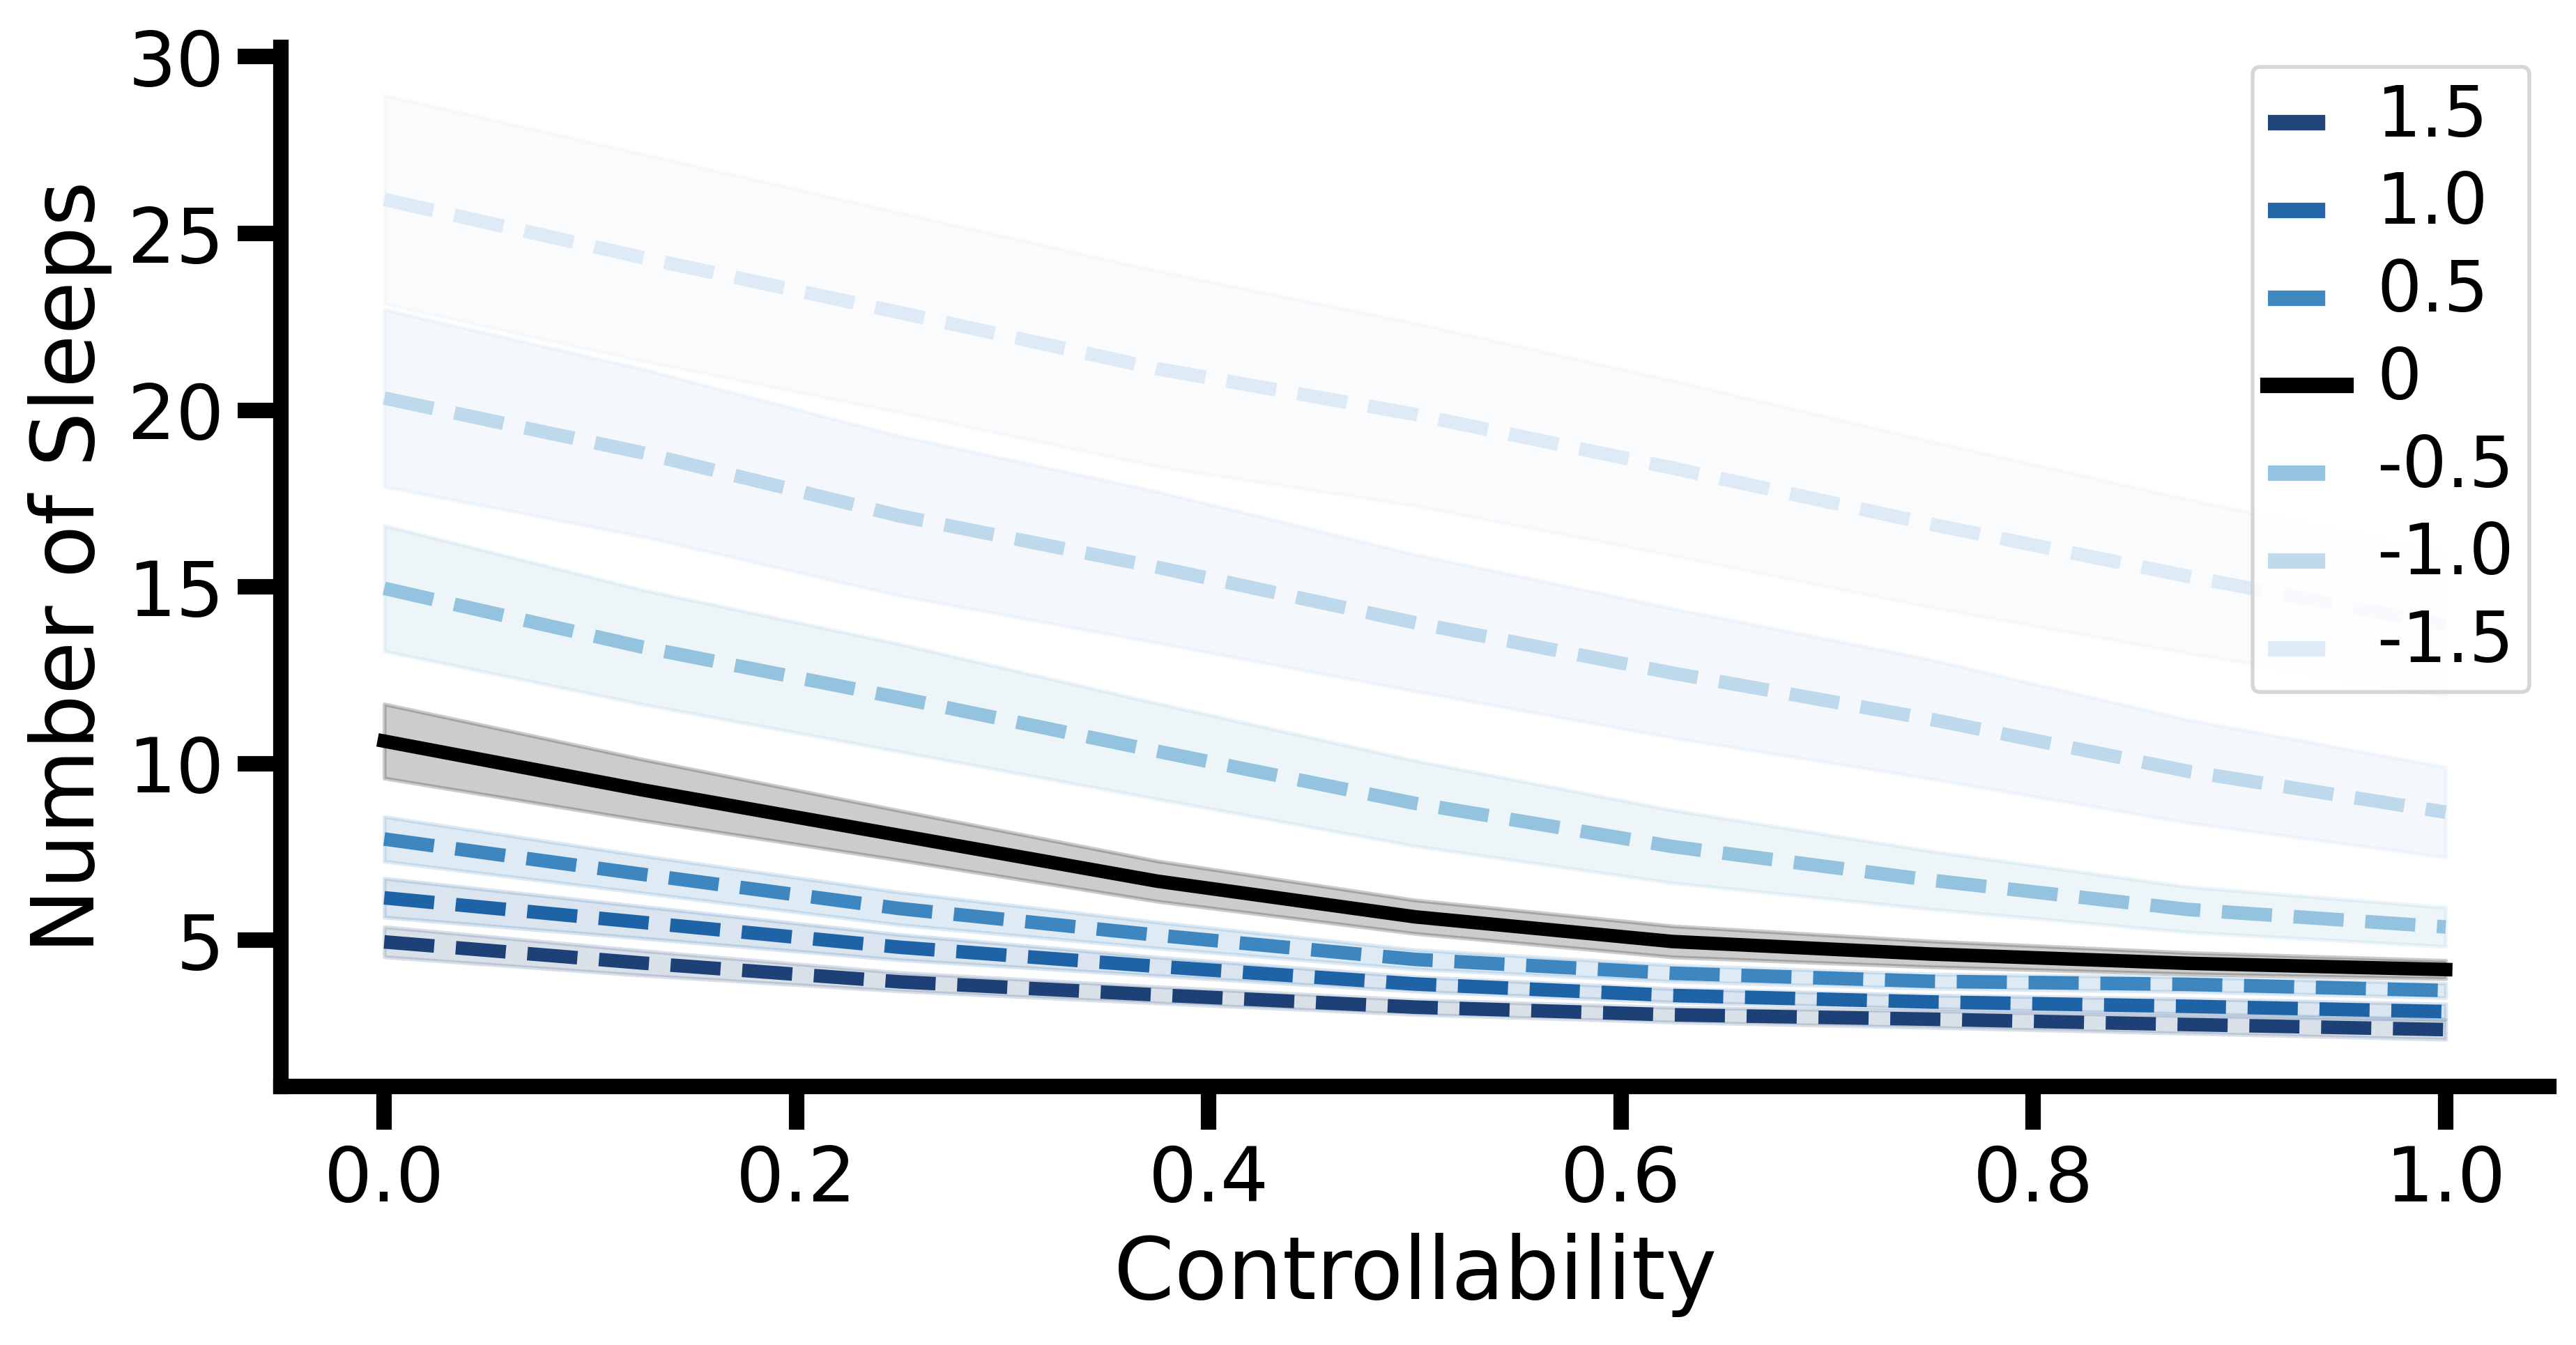

In [11]:
from test_analyses import plot_behavior_mistrained

#fig = plot_behavior_mistrained(test_taus, np.flip(models_mis_taus_sleepss, axis=(0,2)), np.arange(0,1.01,0.125), np.flip(models_orig_taus_sleepss, axis=(1)), axis_xlabel='Efficacy', axis_ylabel='Number of Sleeps per Episode', target_taus = target_taus, cmap = mpl.cm.Blues, figsize=(8.5, 4.8))
#fig = plot_behavior_mistrained(test_taus, np.flip(models_mis_taus_sleepss, axis=(0,2)), np.arange(0,1.01,0.125), np.flip(models_orig_taus_sleepss, axis=(1)), axis_xlabel='Efficacy', axis_ylabel='Number of Sleeps per Episode', perturbation_taus = perturbation_taus, cmap = mpl.cm.Blues, figsize=(8.5, 4.8))
fig = plot_behavior_mistrained(test_taus, np.flip(models_mis_taus_sleepss, axis=(0,2)), axis_xlabel='Controllability', axis_ylabel='Number of Sleeps', perturbation_taus = perturbation_taus, cmap = mpl.cm.Blues, figsize=(10.4952, 4.9359), font_size_multiplier=1.4)

In [12]:
fig.savefig(os.path.join(analysis_folder, 'perturbed_levc.png'))
fig.savefig(os.path.join(analysis_folder, 'perturbed_levc.svg'))

#### Stats

In [13]:
selected_n_sleeps = np.flip(models_mis_taus_sleepss, axis=(0,2))
selected_n_sleeps = selected_n_sleeps[:, [1,3,5]].sum(axis=-1).T
tested_levels = [1, 0, -1]

In [14]:
## MEANS AND SEMS
for level, selected_sleep in zip(tested_levels, selected_n_sleeps):
    print("Test Controllability ", level)
    print("Mean ", selected_sleep.mean())
    print("StdErr ", selected_sleep.std()/np.sqrt(selected_sleep.shape[0]))
    print("N", selected_sleep.shape[0])

Test Controllability  1
Mean  37.31699999999999
StdErr  2.3444197789645096
N 10
Test Controllability  0
Mean  58.27
StdErr  4.6951596351987845
N 10
Test Controllability  -1
Mean  127.897
StdErr  17.29780125044799
N 10


In [15]:
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

reshaped_data = selected_n_sleeps.T
pvals = []
pairs = [(0, 1), (0, 2), (1, 2)]  # Indices of settings pairs
for i, (idx1, idx2) in enumerate(pairs):
    t_stat, p_val = ttest_rel(reshaped_data[:, idx1], reshaped_data[:, idx2])
    pvals.append(p_val)
    print(f"Paired t-test {i+1}: p-value = {p_val}")

# Apply Holm-Bonferroni correction
reject, pvals_corrected, _, _ = multipletests(pvals, alpha=0.05, method='holm')
print("\nCorrected p-values (Holm-Bonferroni):")
for i, (reject, p_val) in enumerate(zip(reject, pvals_corrected)):
    print(f"Comparison {i+1}: reject null hypothesis = {reject}, corrected p-value = {p_val}")

Paired t-test 1: p-value = 8.74203763098903e-05
Paired t-test 2: p-value = 0.0004589450954089117
Paired t-test 3: p-value = 0.0007386780003249872

Corrected p-values (Holm-Bonferroni):
Comparison 1: reject null hypothesis = True, corrected p-value = 0.0002622611289296709
Comparison 2: reject null hypothesis = True, corrected p-value = 0.0009178901908178234
Comparison 3: reject null hypothesis = True, corrected p-value = 0.0009178901908178234


## Panel A: Task 1 Observes

### Humans

In [3]:
from human_utils_project import get_clean_data

day = 'day2'
exp_date = '24-01-22-29'

group = None
human_data_file_base = '/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis'

df, effs_train, effs_test, test_start = get_clean_data(day = int(day[-1]), exp_date = exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)

n_steps = 50

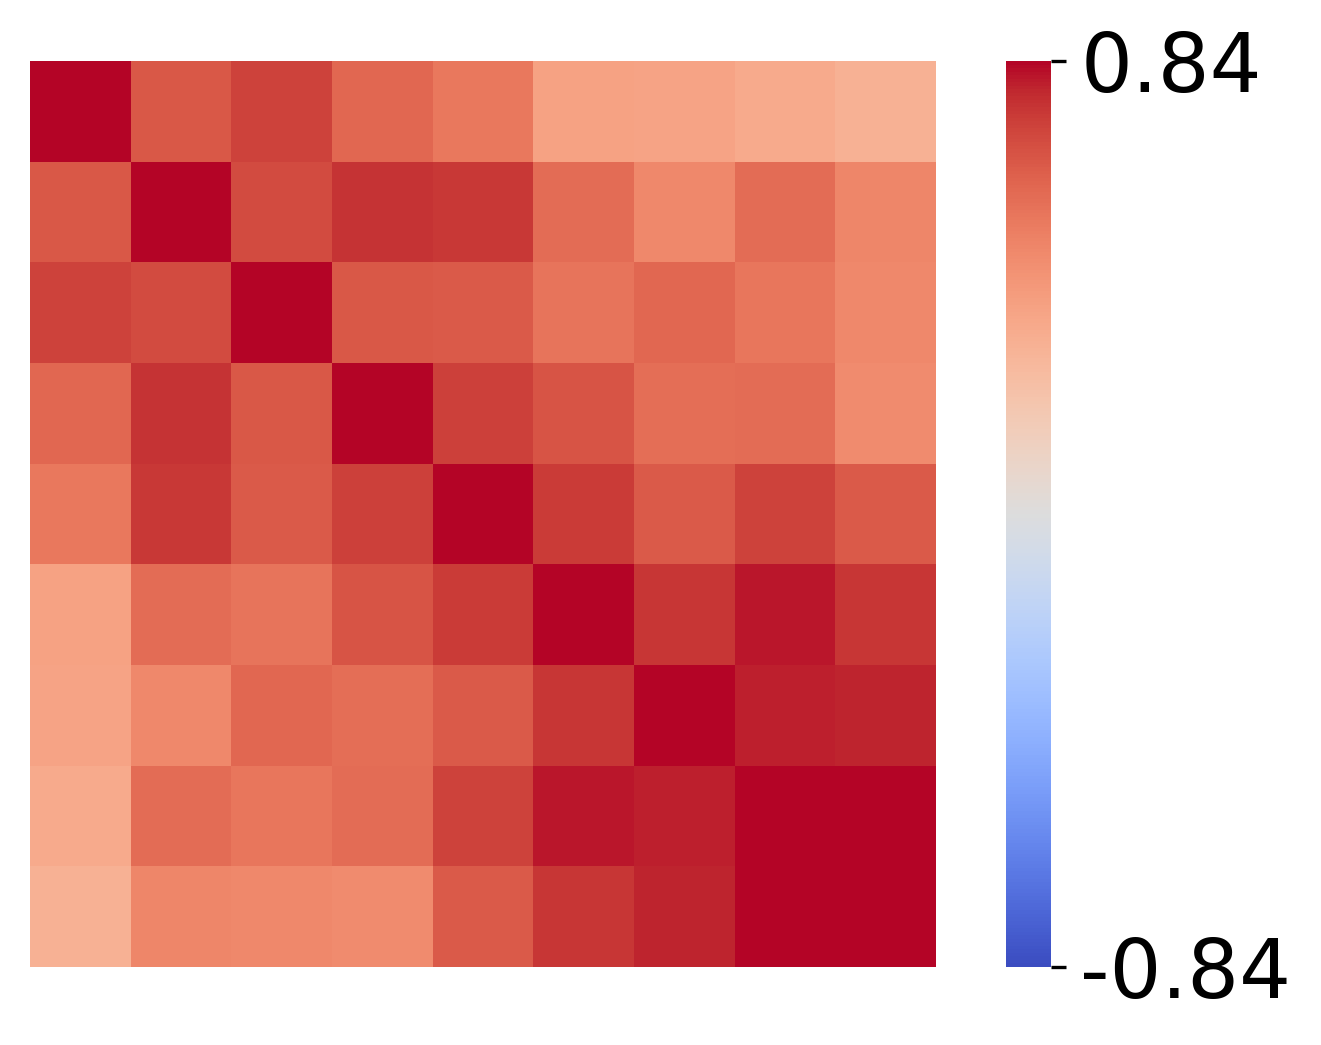

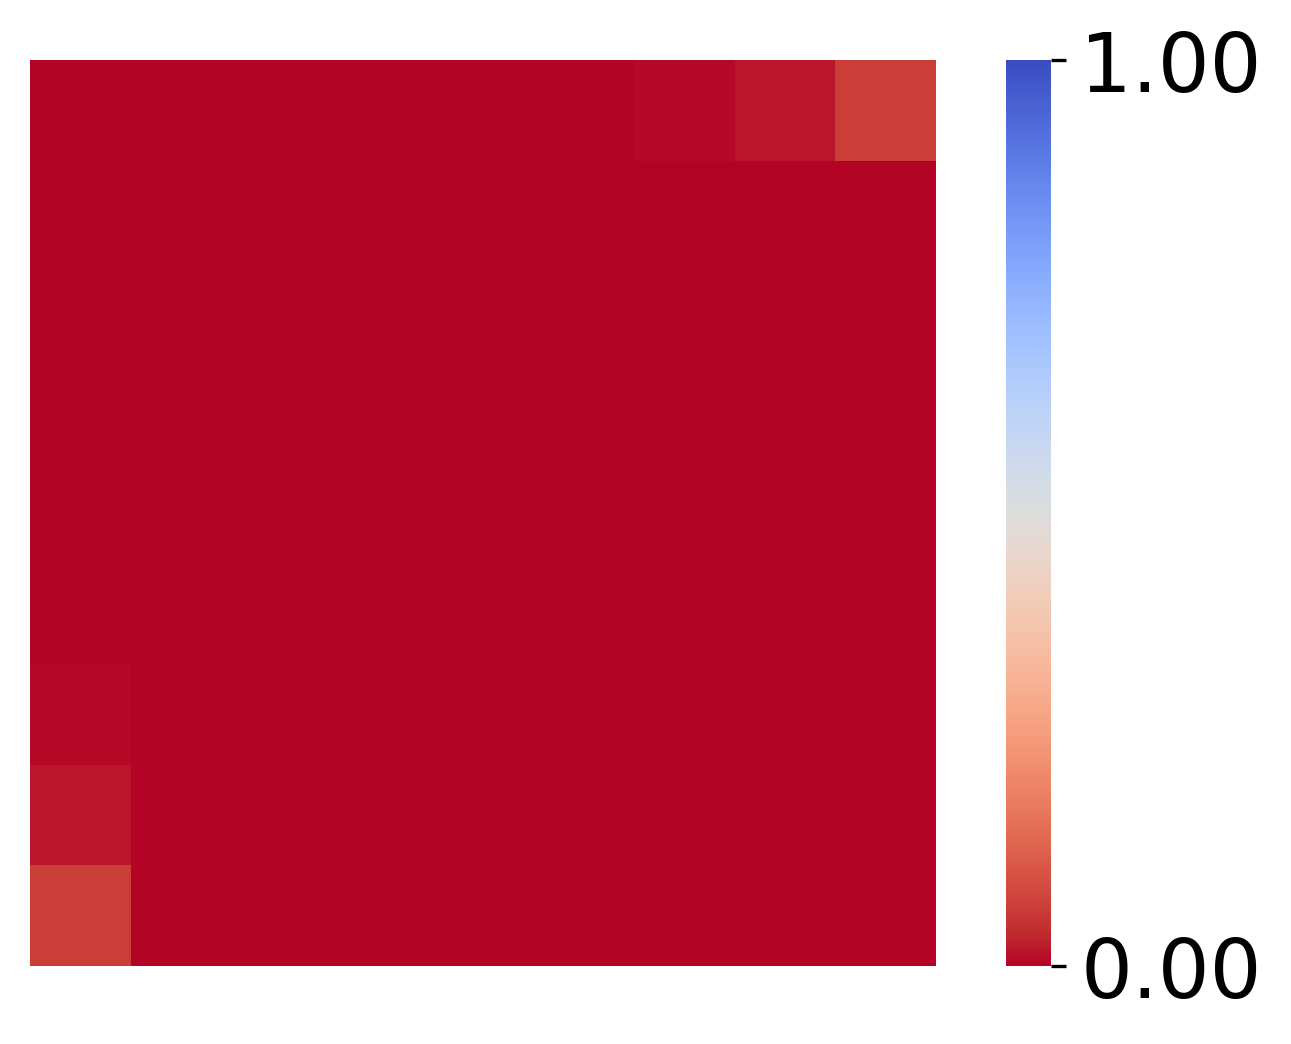

In [4]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(df['n_observes'], df['n_observes'], df['effs'], df['effs'], col1name = 'Observes', col2name='Observes', annot=False, resize_colorbar = True, square=square, axes_off=True, font_size_multiplier=1.4, groups=df['group'])

In [5]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_observes_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_observes_humans.svg'))

pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_observes_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_observes_humans.svg'))

#### Stats

In [19]:
## NUMBER OF HUMANS
print(len(df))

print(sum(~df['group']))
print(sum(df['group']))

111
46
65


### Trait-level simulations

In [20]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t1 as sim_timestamp

sim_rewss, sim_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)
sim_rewss = sim_rewss.mean(axis=0)
sim_obss = sim_obss.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss = np.flip(sim_rewss.T, axis=1)
sim_obss = np.flip(sim_obss.T, axis=1)

effs = np.arange(0, 1.125, 0.125)

(150, 9)


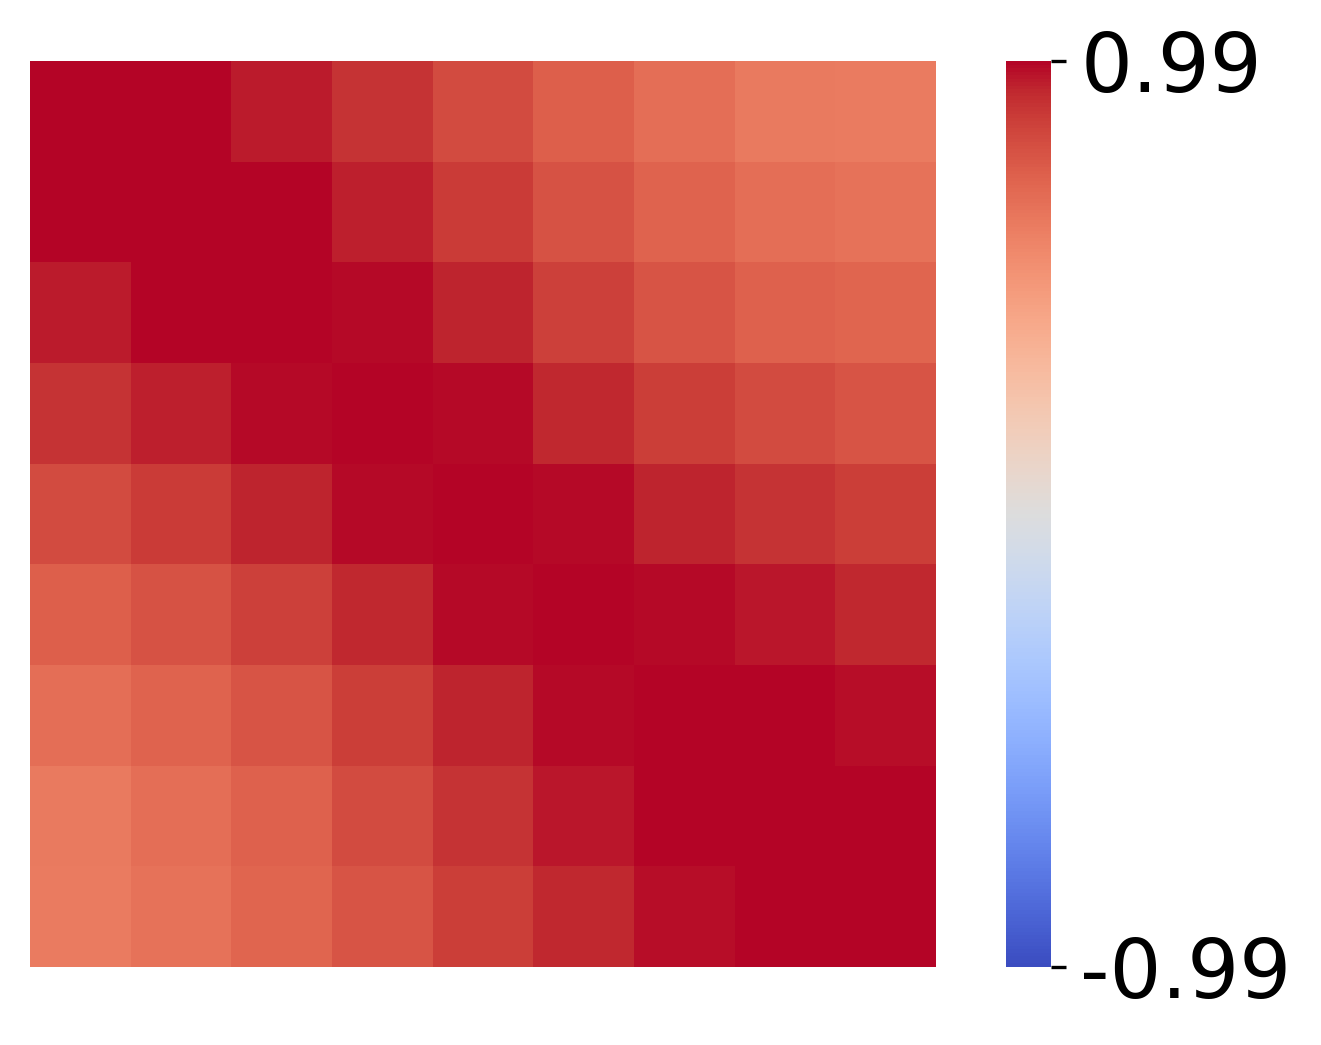

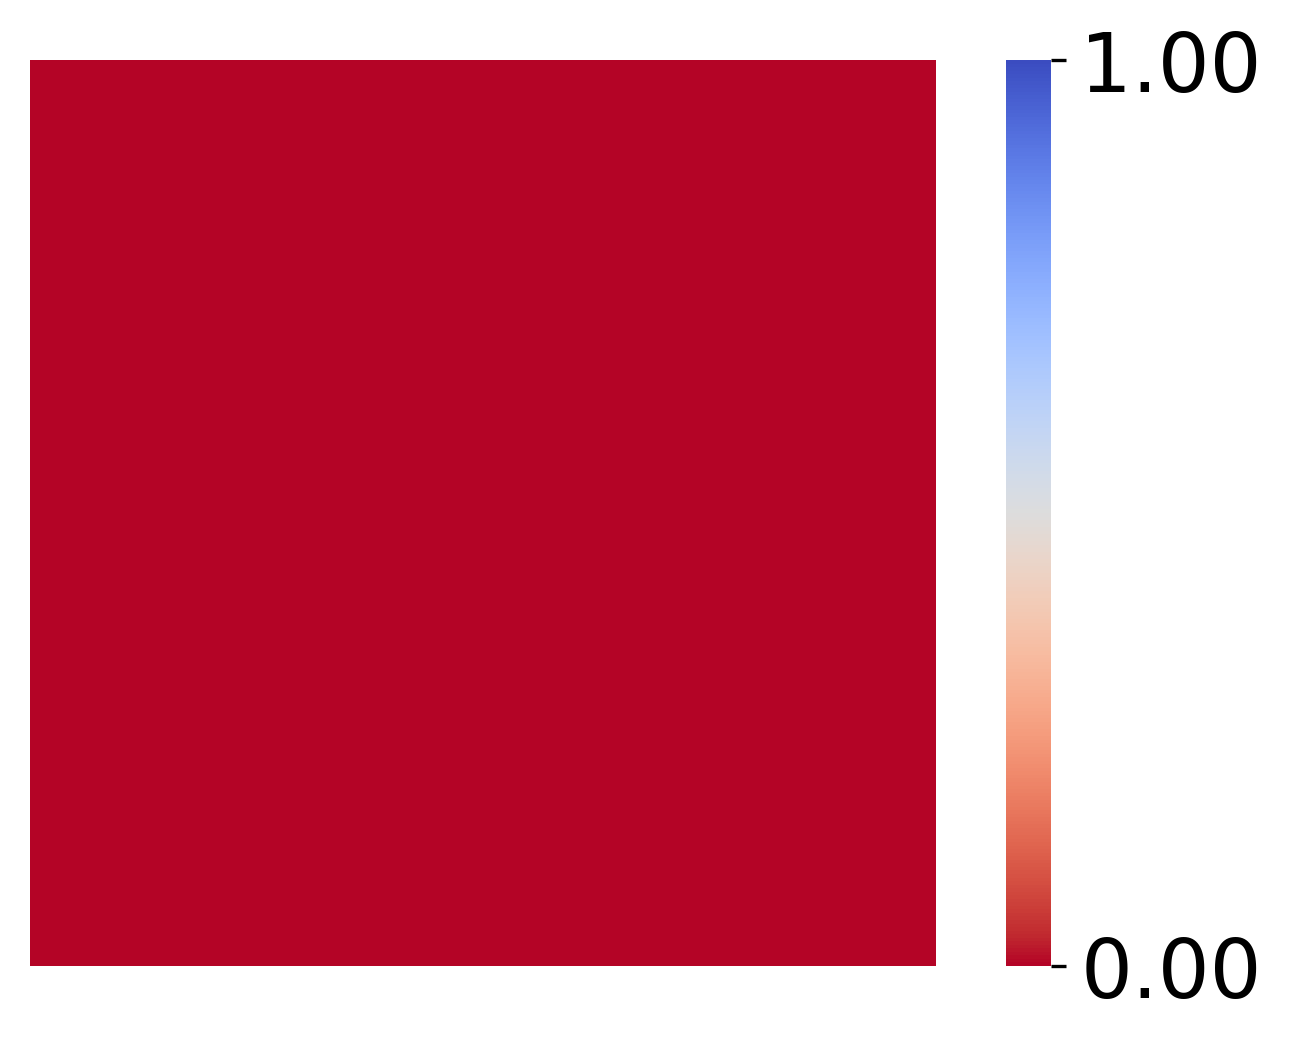

In [21]:
corr_fig, pvs_fig = compute_2D_correlation(sim_obss, sim_obss, effs, effs, "Observations", "Observations", annot=False, resize_colorbar=True, square=square, axes_off=True, font_size_multiplier=1.4)

In [22]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_observes_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_observes_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_observes_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_observes_trait.svg'))

### Random Perturbations

In [23]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t1 as sim_timestamp

random_rewss, random_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

random_rewss = random_rewss.mean(axis=0)
random_obss = random_obss.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss = np.flip(random_rewss.T, axis=1)
random_obss = np.flip(random_obss.T, axis=1)

(150, 9)


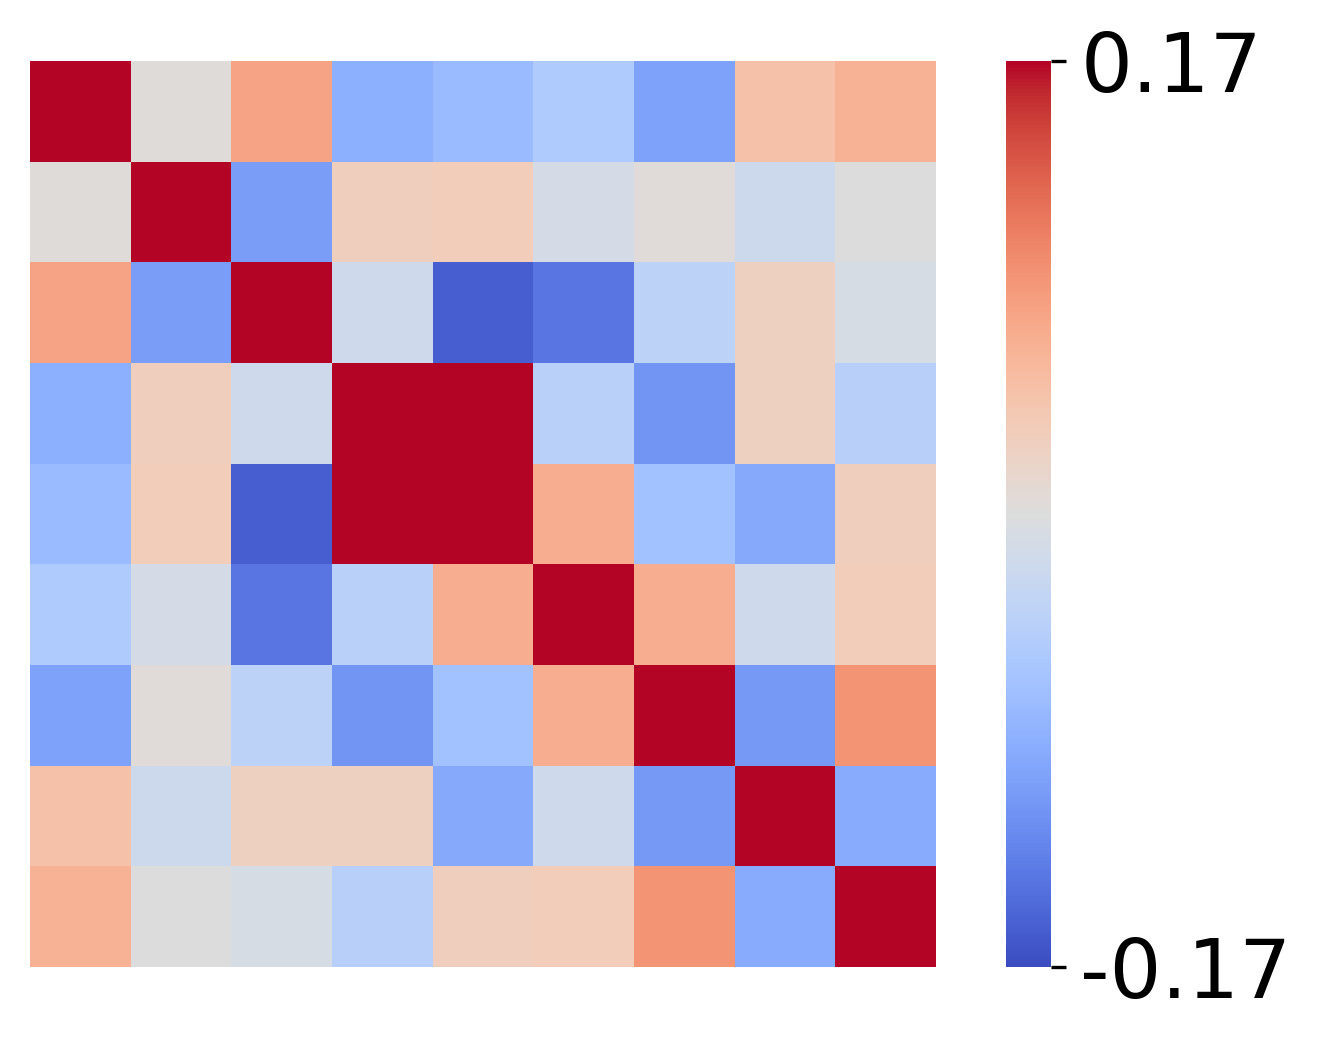

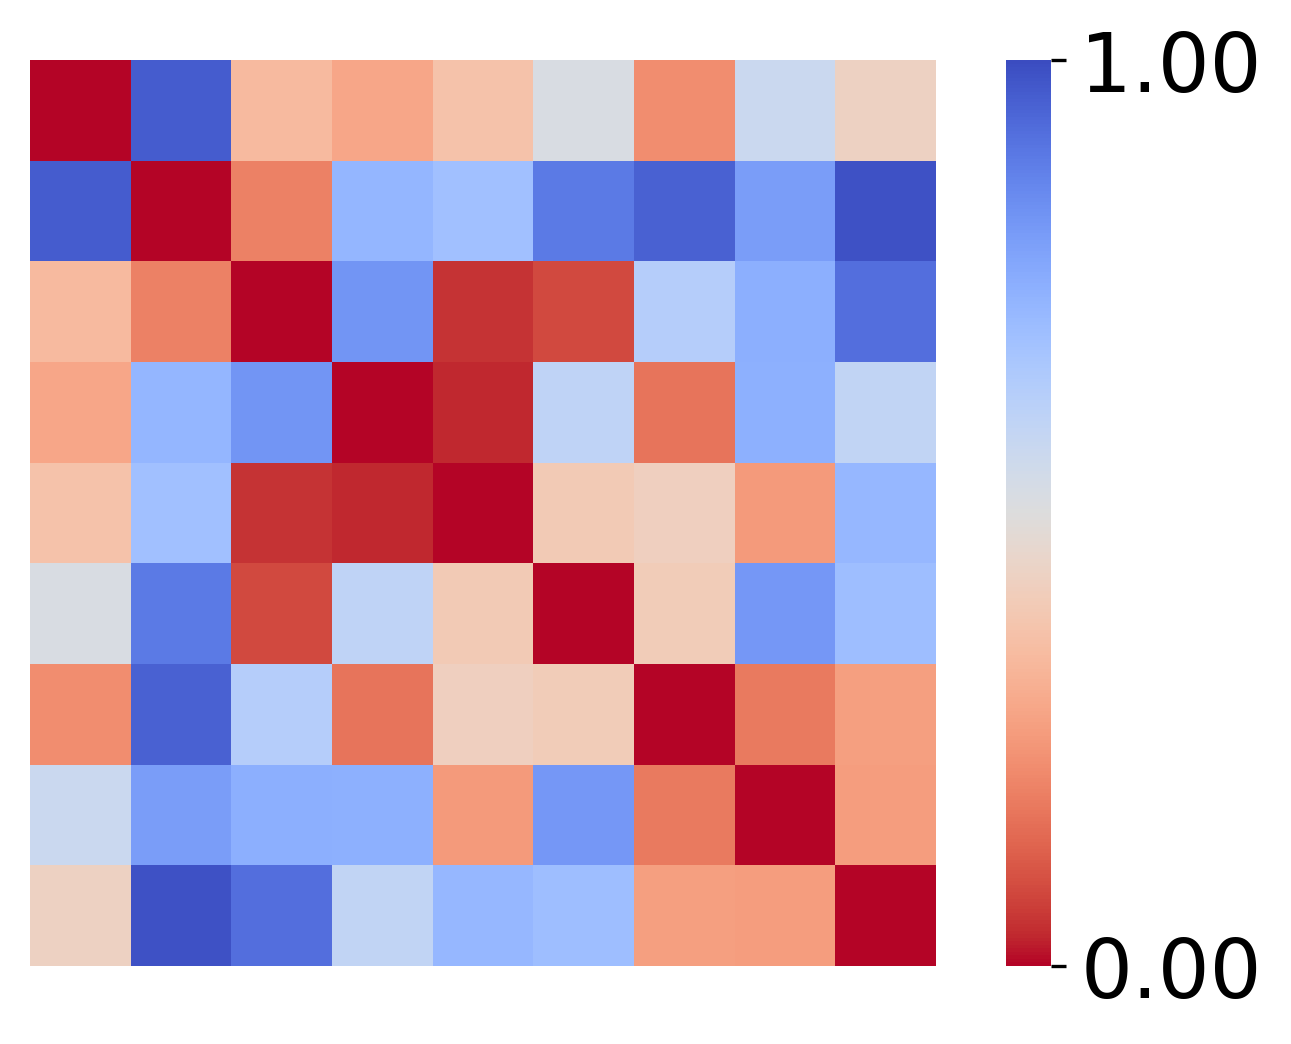

In [24]:
corr_fig, pvs_fig = compute_2D_correlation(random_obss, random_obss, effs, effs, "Observations", "Observations", annot=False, resize_colorbar=True, square=square, axes_off=axes_off , font_size_multiplier=1.4)

In [25]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_observes_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_observes_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_observes_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_observes_random.svg'))

### Zeros Perturbation

In [26]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t1 as sim_timestamp

zeros_rewss, zeros_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

zeros_rewss = zeros_rewss.mean(axis=0)
zeros_obss = zeros_obss.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss = np.flip(zeros_rewss.T, axis=1)
zeros_obss = np.flip(zeros_obss.T, axis=1)

effs = np.arange(0, 1.125, 0.125)

(150, 9)


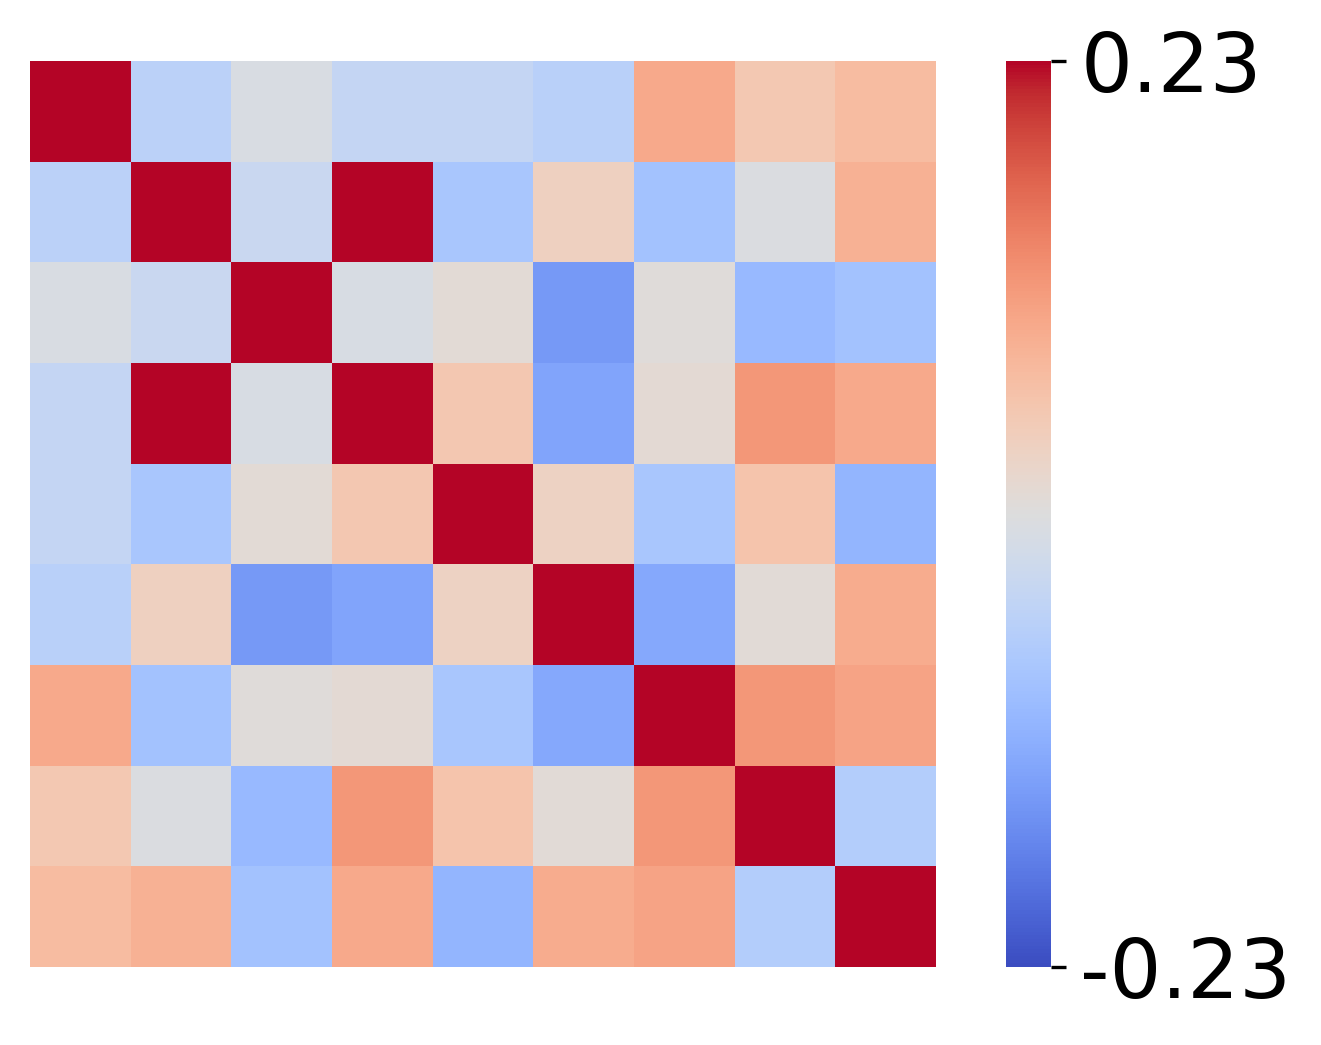

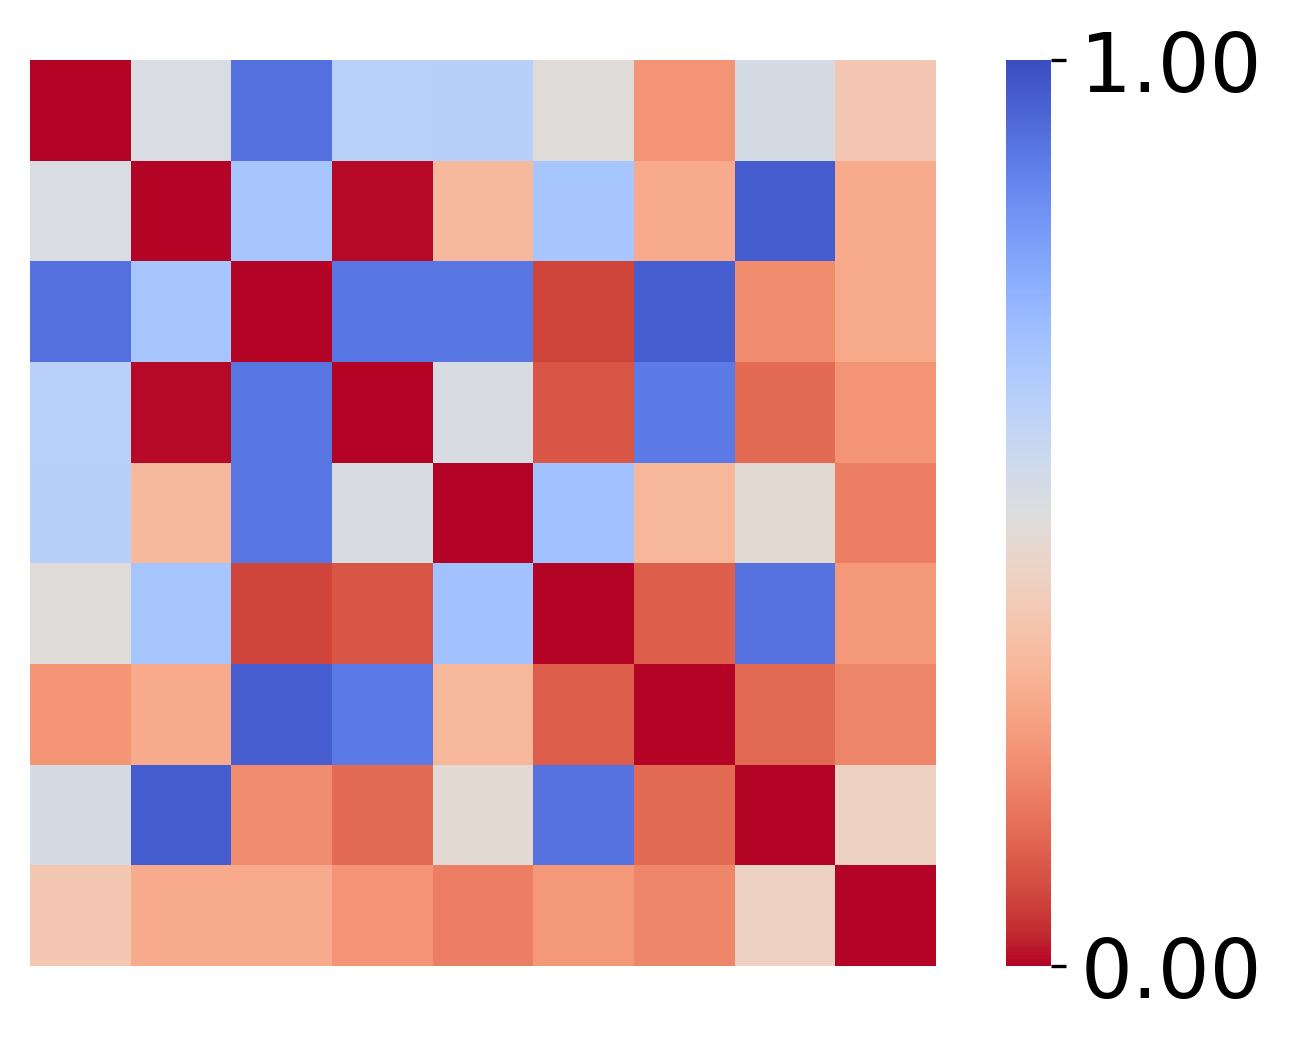

In [27]:
corr_fig, pvs_fig = compute_2D_correlation(zeros_obss, zeros_obss, effs, effs, "Observations", "Observations", annot=False, resize_colorbar=True, square=square, axes_off=axes_off , font_size_multiplier=1.4)

In [28]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_observes_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_observes_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_observes_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_observes_zeros.svg'))

### Stats
#### Competitive Linear Regression

In [29]:
from human_utils_behavioral_analysis import compute_2D_correlation_matrices

data_obs_corr_g1, data_obs_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)
data_obs_corr_g2, data_obs_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group']]['n_observes'].values), np.stack(df[df['group']]['n_observes'].values), np.stack(df[df['group']]['effs'].values), np.stack(df[df['group']]['effs'].values),)

data_rews_corr_g1, data_rews_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)
data_rews_corr_g2, data_rews_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group']]['rewards_tallies'].values), np.stack(df[df['group']]['rewards_tallies'].values), np.stack(df[df['group']]['effs'].values), np.stack(df[df['group']]['effs'].values),)

data_obs_corr = (~df['group']).sum() / len(df) * data_obs_corr_g1 + (df['group']).sum() / len(df) * data_obs_corr_g2
data_obs_pvs = (~df['group']).sum() / len(df) * data_obs_pvs_g1 + (df['group']).sum() / len(df) * data_obs_pvs_g2

data_rews_corr = (~df['group']).sum() / len(df) * data_rews_corr_g1 + (df['group']).sum() / len(df) * data_rews_corr_g2
data_rews_pvs = (~df['group']).sum() / len(df) * data_rews_pvs_g1 + (df['group']).sum() / len(df) * data_rews_pvs_g2
sim_obs_corr, sim_obs_pvs = compute_2D_correlation_matrices(sim_obss, sim_obss, effs, effs,)
sim_rews_corr, sim_rews_pvs = compute_2D_correlation_matrices(sim_rewss, sim_rewss, effs, effs,)
random_obs_corr, random_obs_pvs = compute_2D_correlation_matrices(random_obss, random_obss, effs, effs,)
random_rews_corr, random_rews_pvs = compute_2D_correlation_matrices(random_rewss, random_rewss, effs, effs,)
zeros_obs_corr, zeros_obs_pvs = compute_2D_correlation_matrices(zeros_obss, zeros_obss, effs, effs,)

(46, 9)
(65, 9)
(46, 9)
(65, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)


In [30]:
from human_utils_behavioral_analysis import competitive_corr_regression, upper_tri_masking

competitive_corr_regression(upper_tri_masking(data_obs_corr), [upper_tri_masking(sim_obs_corr), upper_tri_masking(random_obs_corr), upper_tri_masking(zeros_obs_corr)], do_fisher_transform=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     20.79
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.17e-07
Time:                        17:20:13   Log-Likelihood:                 22.012
No. Observations:                  36   AIC:                            -36.02
Df Residuals:                      32   BIC:                            -29.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3041      0.064      4.756      0.0

#### Cosine Similarity

In [31]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(upper_tri_masking(data_obs_corr).reshape((1,-1)), upper_tri_masking(sim_obs_corr).reshape((1,-1)))[0][0])
print(cosine_similarity(upper_tri_masking(data_obs_corr).reshape((1,-1)), upper_tri_masking(random_obs_corr).reshape((1,-1)))[0][0])

0.9933362588074912
-0.20697123787211413


## Panel B: Task 1 Rewards
### Humans

In [32]:
from human_utils_project import get_clean_data

day = 'day2'
exp_date = '24-01-22-29'

group = None
human_data_file_base = '/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis'

df, effs_train, effs_test, test_start = get_clean_data(day = int(day[-1]), exp_date = exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)

effs = np.arange(0, 1.125, 0.125)
n_steps = 50

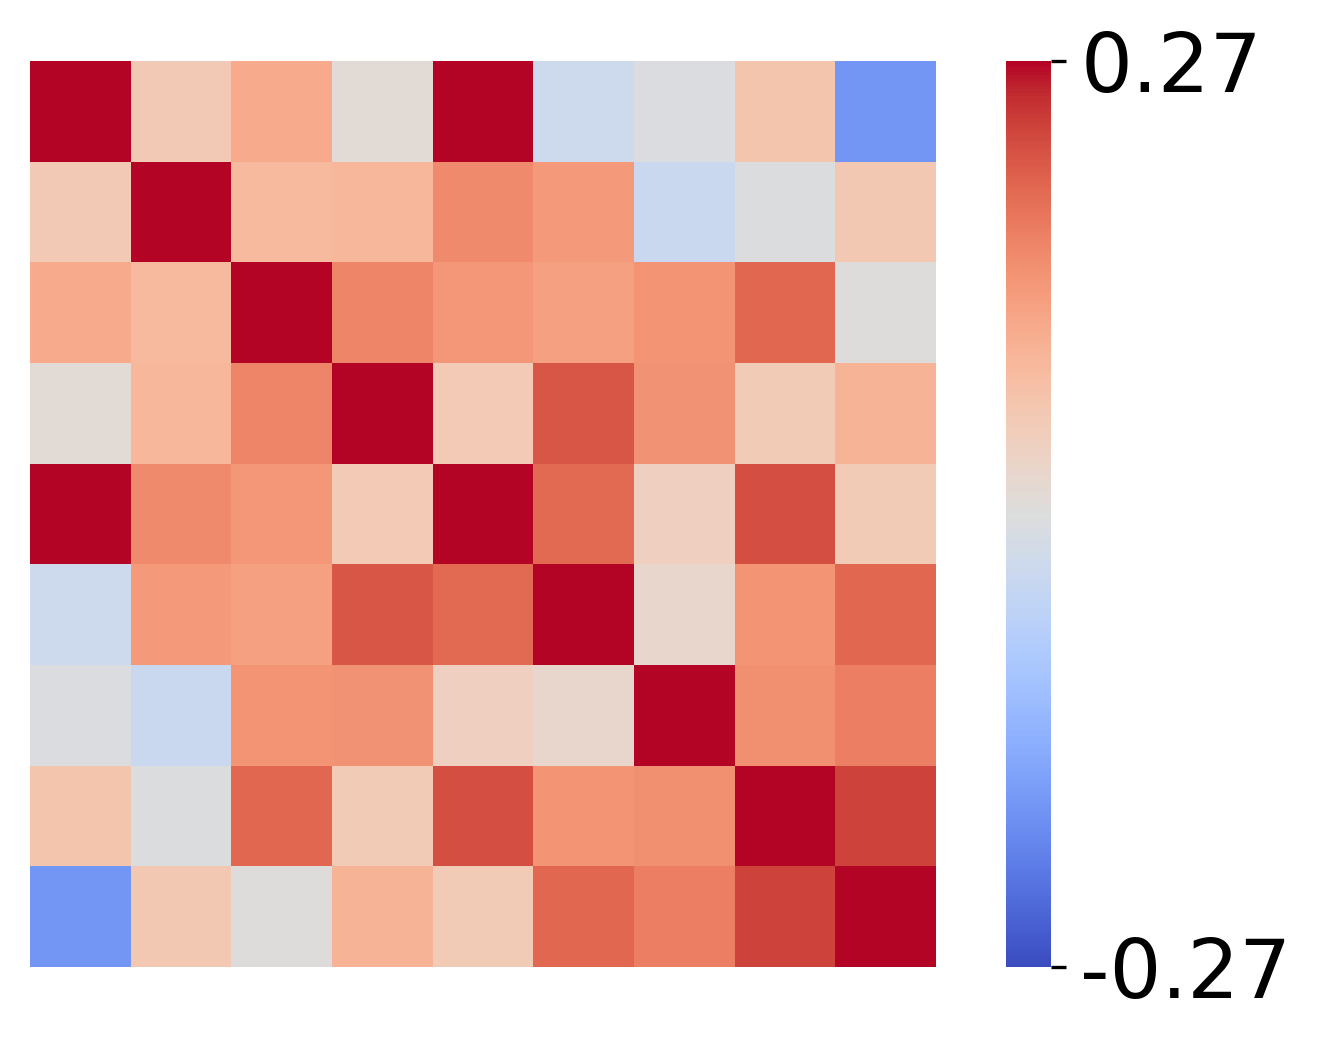

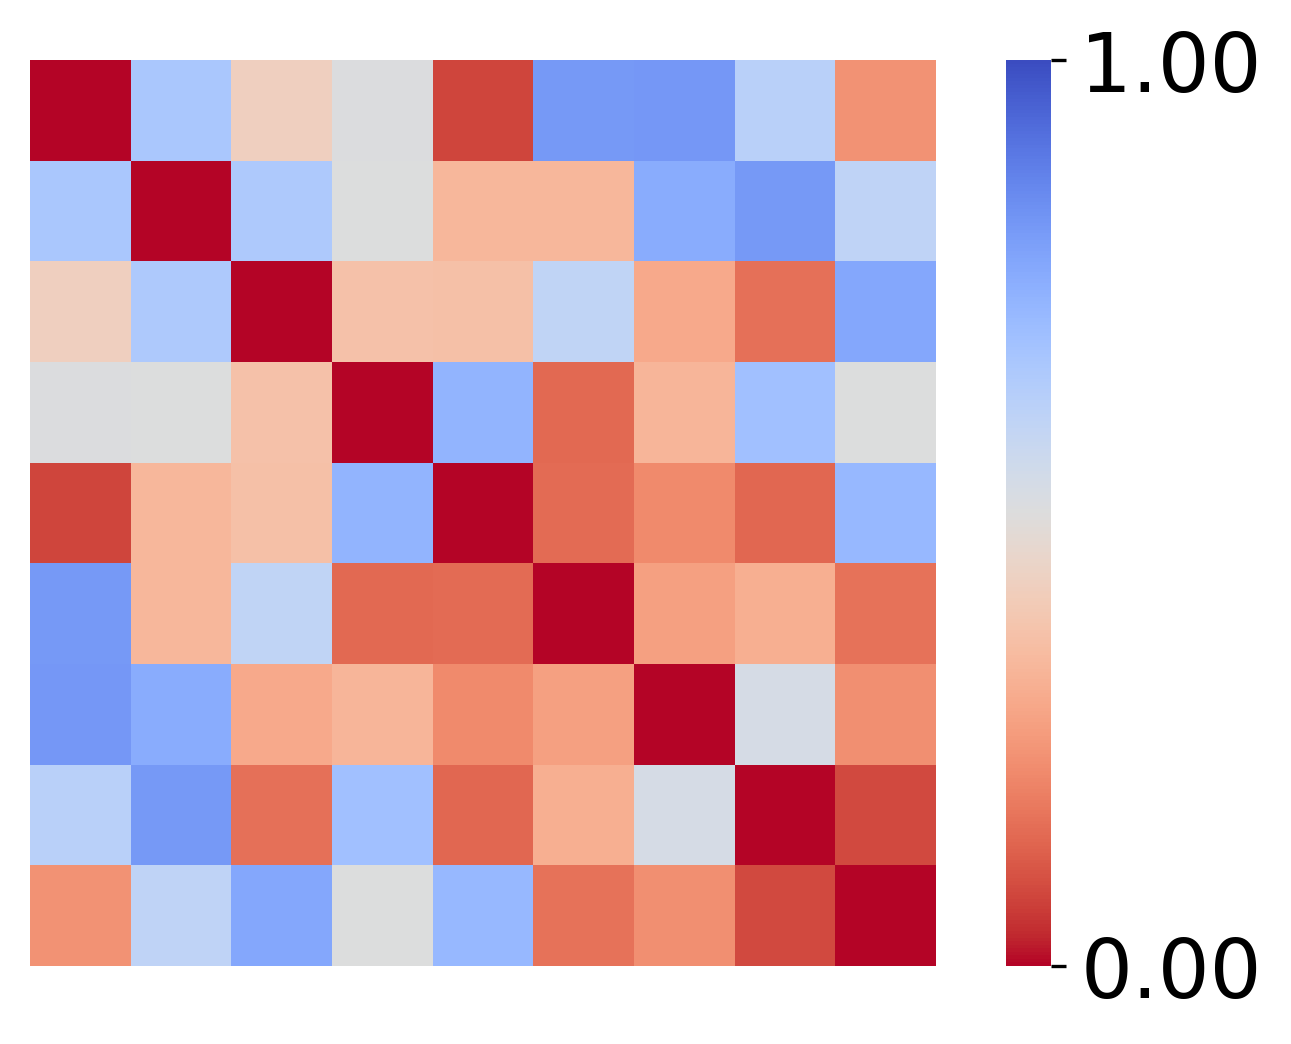

In [33]:
corr_fig, pvs_fig = compute_2D_correlation(df['rewards_tallies'], df['rewards_tallies'], df['effs'], df['effs'], col1name = 'Rewards', col2name='Rewards', annot=False, resize_colorbar = True, square=square, axes_off=True, font_size_multiplier=1.4, groups=df['group'])

In [34]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_rewards_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_rewards_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_rewards_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_rewards_humans.svg'))

### Trait-level Simulations

In [35]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t1 as sim_timestamp

sim_rewss, sim_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)
sim_rewss = sim_rewss.mean(axis=0)
sim_obss = sim_obss.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss = np.flip(sim_rewss.T, axis=1)
sim_obss = np.flip(sim_obss.T, axis=1)

(150, 9)


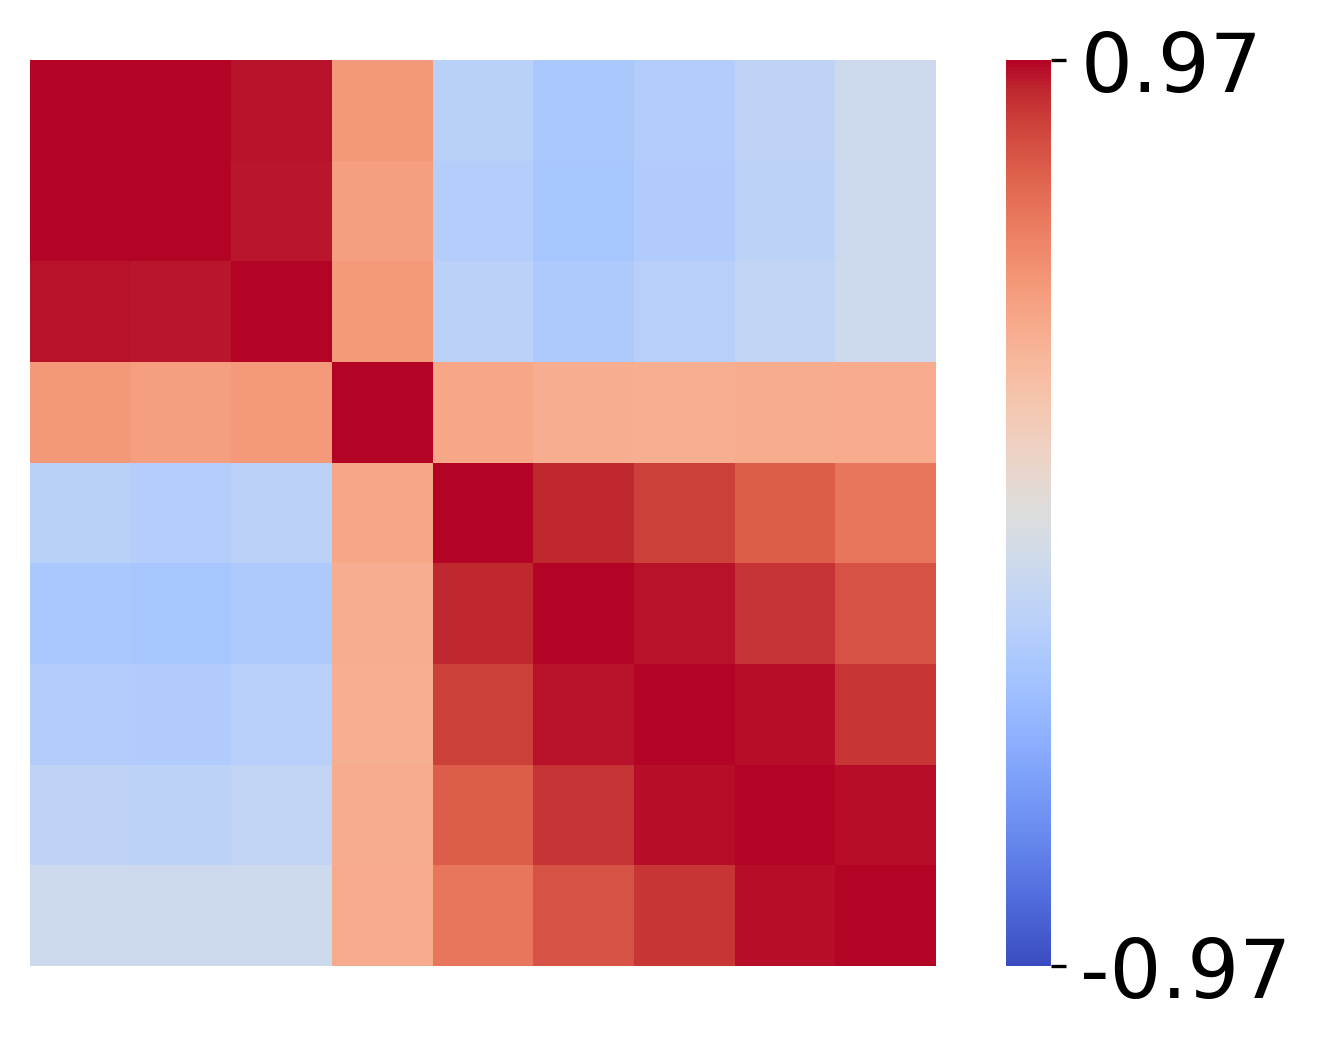

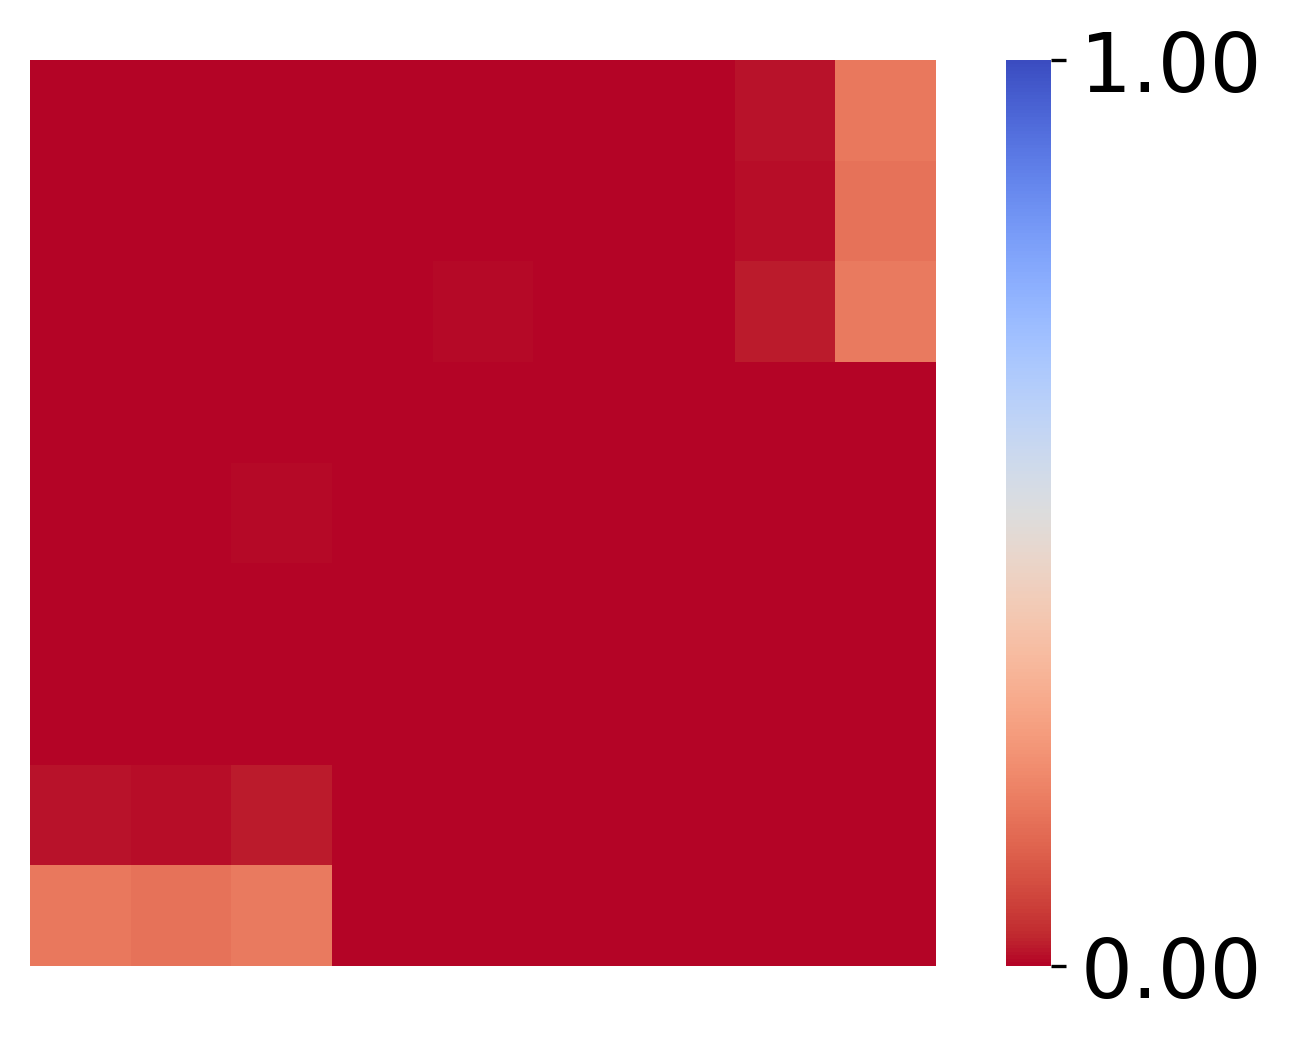

In [36]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(sim_rewss, sim_rewss, effs, effs, "Rewards", "Rewards", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [37]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_rewards_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_rewards_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_rewards_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_rewards_trait.svg'))

### Random Perturbations

In [38]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t1 as sim_timestamp

random_rewss, random_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

random_rewss = random_rewss.mean(axis=0)
random_obss = random_obss.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss = np.flip(random_rewss.T, axis=1)
random_obss = np.flip(random_obss.T, axis=1)

(150, 9)


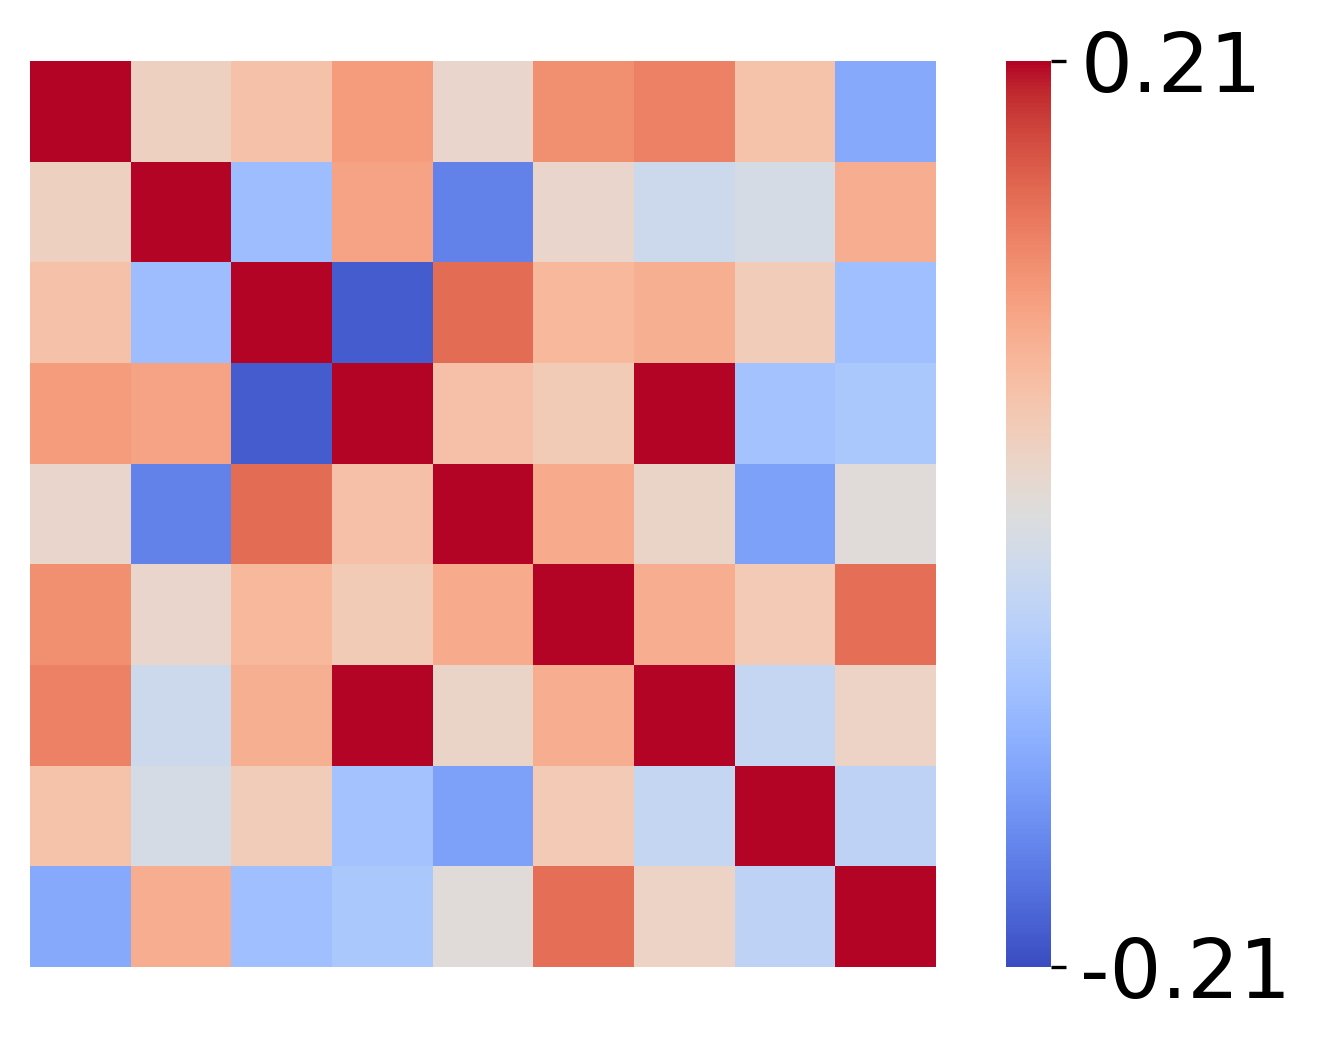

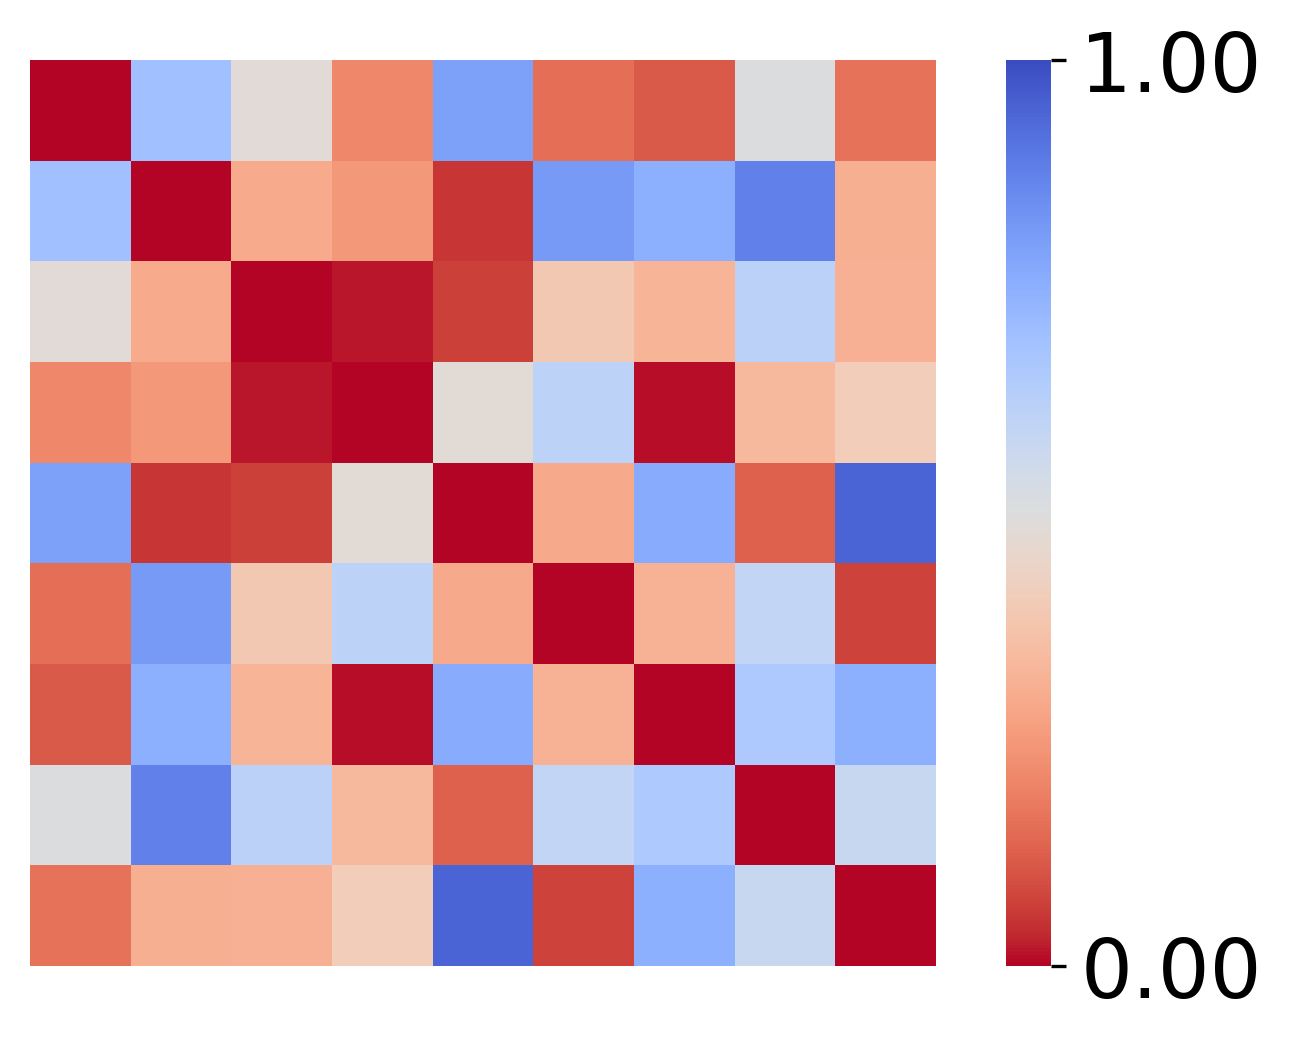

In [39]:
corr_fig, pvs_fig = compute_2D_correlation(random_rewss, random_rewss, effs, effs, "simulated rewards", "simulated rewards", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [40]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_rewards_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_rewards_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_rewards_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_rewards_random.svg'))

### Zeros Perturbation

In [41]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t1 as sim_timestamp

zeros_rewss, zeros_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

zeros_rewss = zeros_rewss.mean(axis=0)
zeros_obss = zeros_obss.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss = np.flip(zeros_rewss.T, axis=1)
zeros_obss = np.flip(zeros_obss.T, axis=1)

effs = np.arange(0, 1.125, 0.125)

(150, 9)


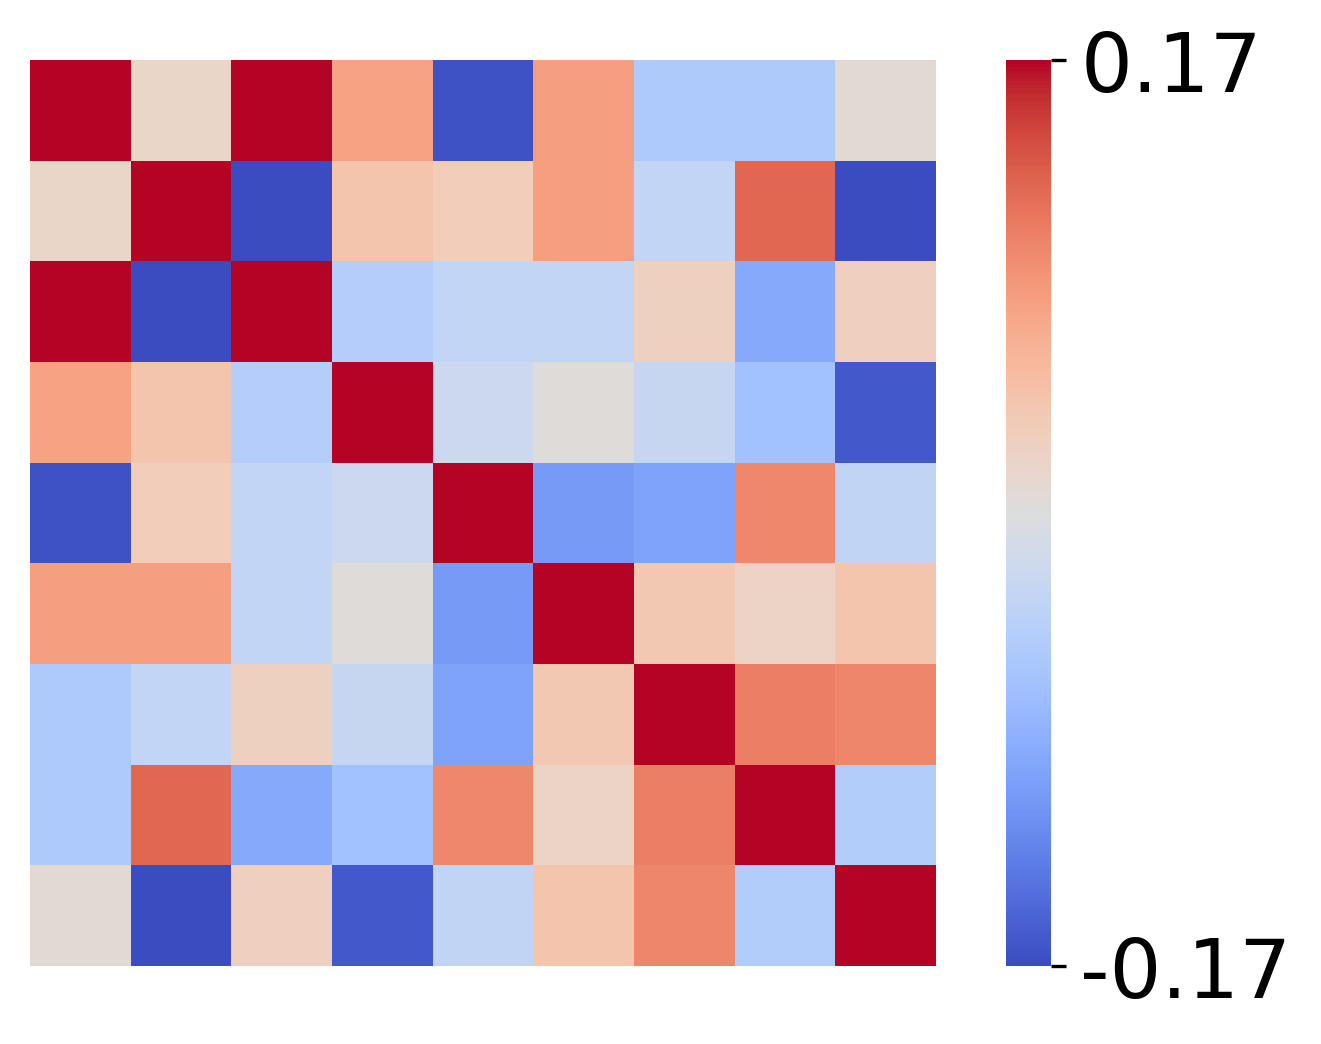

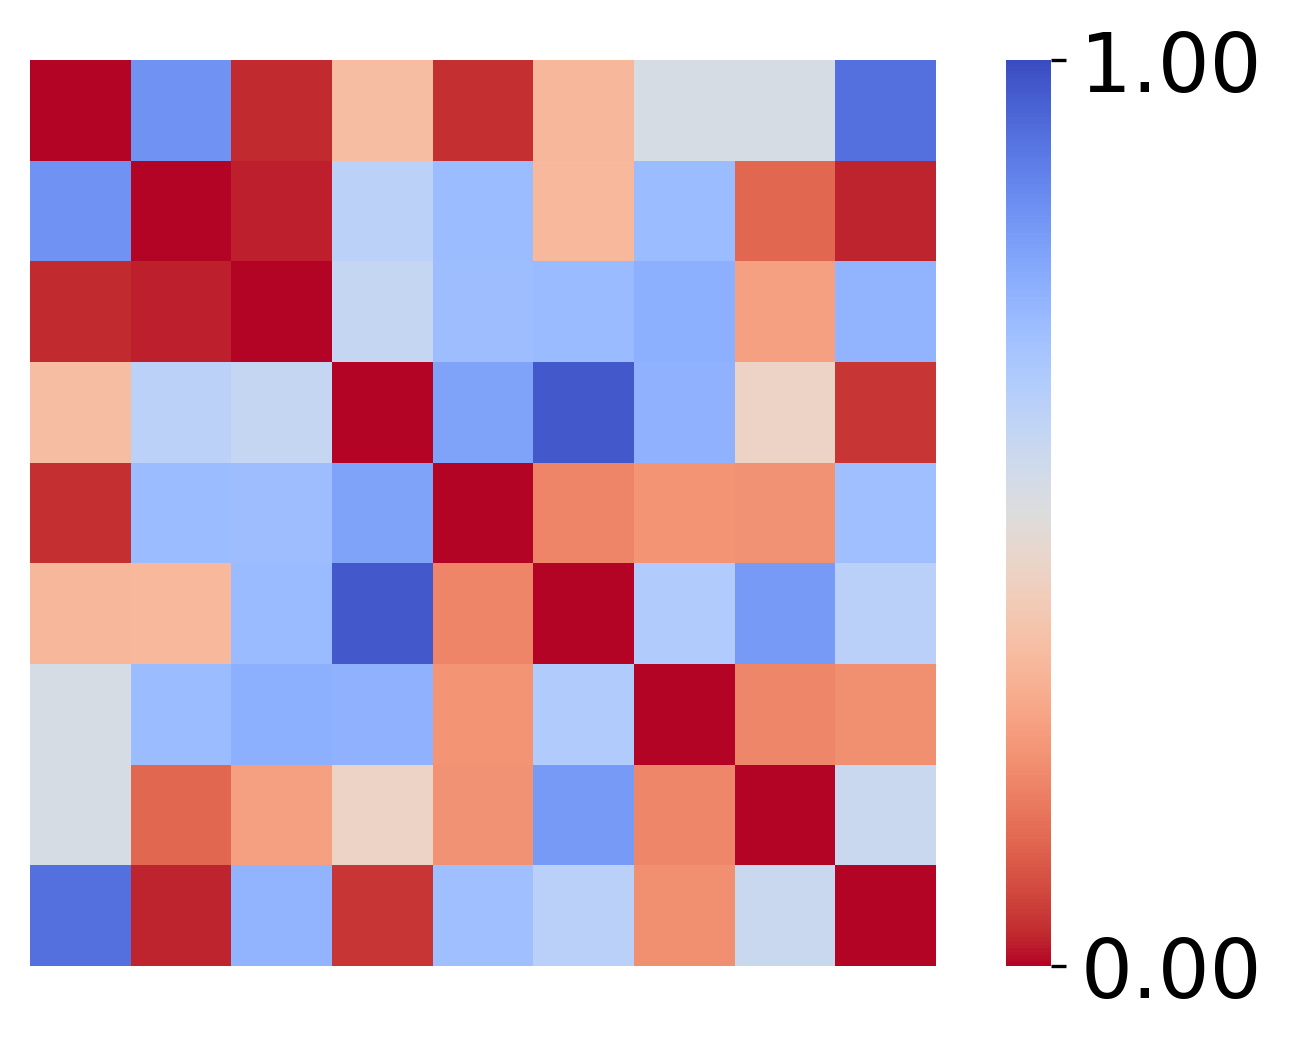

In [42]:
corr_fig, pvs_fig = compute_2D_correlation(zeros_rewss, zeros_rewss, effs, effs, "simulated rewards", "simulated rewards", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [43]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_rewards_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_rewards_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_rewards_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_rewards_zeros.svg'))

### Stats
#### Competitive linear regression

In [44]:
from human_utils_behavioral_analysis import compute_2D_correlation_matrices

data_obs_corr_g1, data_obs_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)
data_obs_corr_g2, data_obs_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group']]['n_observes'].values), np.stack(df[df['group']]['n_observes'].values), np.stack(df[df['group']]['effs'].values), np.stack(df[df['group']]['effs'].values),)

data_rews_corr_g1, data_rews_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)
data_rews_corr_g2, data_rews_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group']]['rewards_tallies'].values), np.stack(df[df['group']]['rewards_tallies'].values), np.stack(df[df['group']]['effs'].values), np.stack(df[df['group']]['effs'].values),)

data_obs_corr = (~df['group']).sum() / len(df) * data_obs_corr_g1 + (df['group']).sum() / len(df) * data_obs_corr_g2
data_obs_pvs = (~df['group']).sum() / len(df) * data_obs_pvs_g1 + (df['group']).sum() / len(df) * data_obs_pvs_g2

data_rews_corr = (~df['group']).sum() / len(df) * data_rews_corr_g1 + (df['group']).sum() / len(df) * data_rews_corr_g2
data_rews_pvs = (~df['group']).sum() / len(df) * data_rews_pvs_g1 + (df['group']).sum() / len(df) * data_rews_pvs_g2
sim_obs_corr, sim_obs_pvs = compute_2D_correlation_matrices(sim_obss, sim_obss, effs, effs,)
sim_rews_corr, sim_rews_pvs = compute_2D_correlation_matrices(sim_rewss, sim_rewss, effs, effs,)
random_obs_corr, random_obs_pvs = compute_2D_correlation_matrices(random_obss, random_obss, effs, effs,)
random_rews_corr, random_rews_pvs = compute_2D_correlation_matrices(random_rewss, random_rewss, effs, effs,)

zeros_obs_corr, zeros_obs_pvs = compute_2D_correlation_matrices(zeros_obss, zeros_obss, effs, effs,)
zeros_rews_corr, zeros_rews_pvs = compute_2D_correlation_matrices(zeros_rewss, zeros_rewss, effs, effs,)

(46, 9)
(65, 9)
(46, 9)
(65, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)


In [45]:
competitive_corr_regression(upper_tri_masking(data_rews_corr), [upper_tri_masking(sim_rews_corr), upper_tri_masking(random_rews_corr), upper_tri_masking(zeros_rews_corr)])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.8992
Date:                Thu, 20 Jun 2024   Prob (F-statistic):              0.452
Time:                        17:20:15   Log-Likelihood:                 36.041
No. Observations:                  36   AIC:                            -64.08
Df Residuals:                      32   BIC:                            -57.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0815      0.020      4.124      0.0

#### Cosine Similarity

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(upper_tri_masking(data_rews_corr).reshape((1,-1)), upper_tri_masking(sim_rews_corr).reshape((1,-1)))[0][0])
print(cosine_similarity(upper_tri_masking(data_rews_corr).reshape((1,-1)), upper_tri_masking(random_rews_corr).reshape((1,-1)))[0][0])

0.5437194110654634
0.19185671658593648


## Panel B.2 : Task 1 Estimates
### Humans

In [47]:
from human_utils_project import get_clean_data

day = 'day2'
exp_date = '24-01-22-29'

group = None
human_data_file_base = '/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis'

df, effs_train, effs_test, test_start = get_clean_data(day = int(day[-1]), exp_date = exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)

n_steps = 50

In [48]:
df.columns

Index(['transitions_ep', 'transitions_ep_rightwrong', 'rewards_tallies', 'ps',
       'effs', 'n_observes', 'intended_correct', 'survey_responses',
       'efficacy_estimates', 'group'],
      dtype='object')

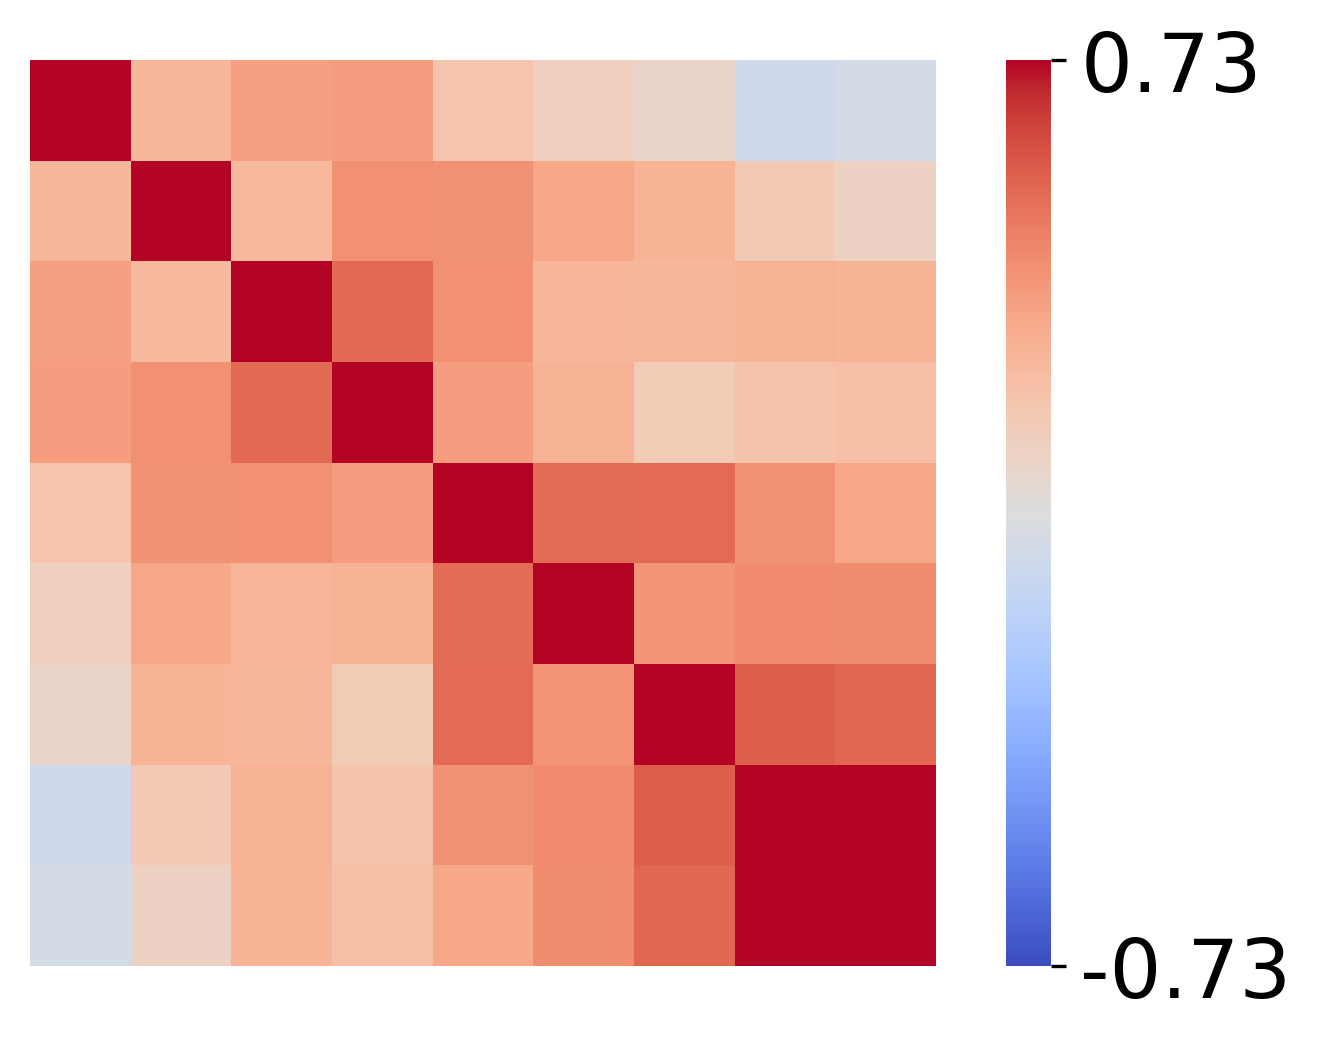

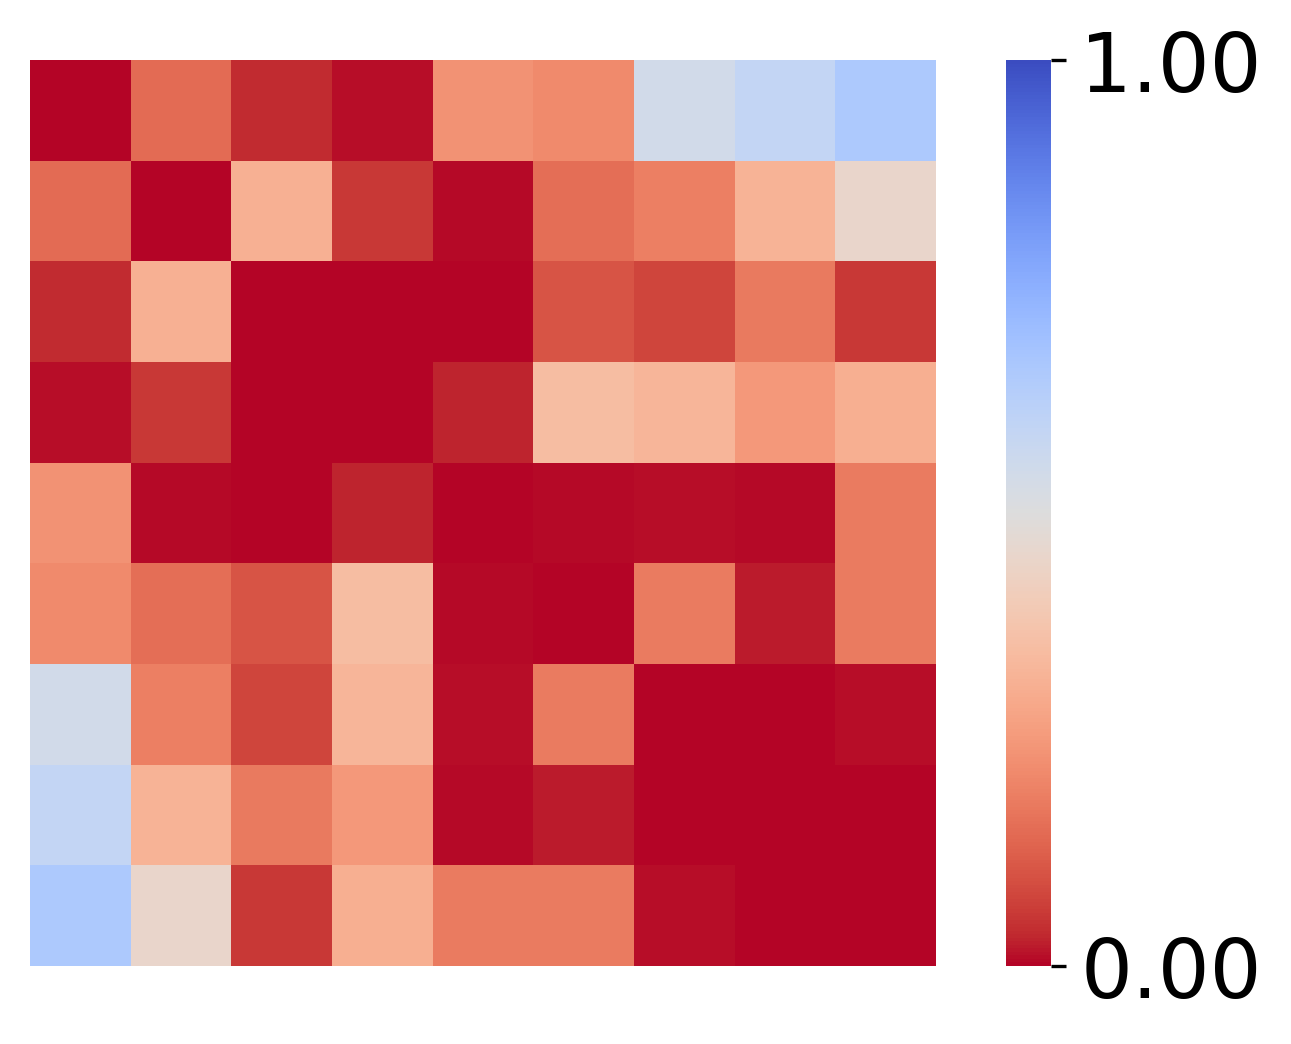

In [49]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(df['efficacy_estimates'], df['efficacy_estimates'], df['effs'], df['effs'], col1name = 'Rewards', col2name='Rewards', annot=False, resize_colorbar = True, square=square, axes_off=True, font_size_multiplier=1.4, groups=df['group'])

In [50]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_estimates_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_estimates_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_estimates_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_estimates_humans.svg'))

### Trait-level simulations

In [51]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t1 as sim_timestamp

sim_rewss, sim_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)
sim_rewss = sim_rewss.mean(axis=0)
sim_obss = sim_obss.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss = np.flip(sim_rewss.T, axis=1)
sim_obss = np.flip(sim_obss.T, axis=1)

original_mag_perturbation = 1
with open(os.path.join('data', 'sim_perturbed_participants', 'pepe', 'sim', 'mag%d'%(original_mag_perturbation*100), '%s_simulated_participant_perturbations_sim_mag.pkl' %sim_timestamp), 'rb') as f:
    sim_participant_perturbations = - pickle.load(f) ## multiply by -1 to convert from tau to efficacy

### CONSTRUCT SIM_ESTS
sim_estss = (np.tile(np.arange(0, 1.01, 0.125), (len(sim_participant_perturbations),1)).T + sim_participant_perturbations).T

effs = np.arange(0, 1.125, 0.125)

(150, 9)


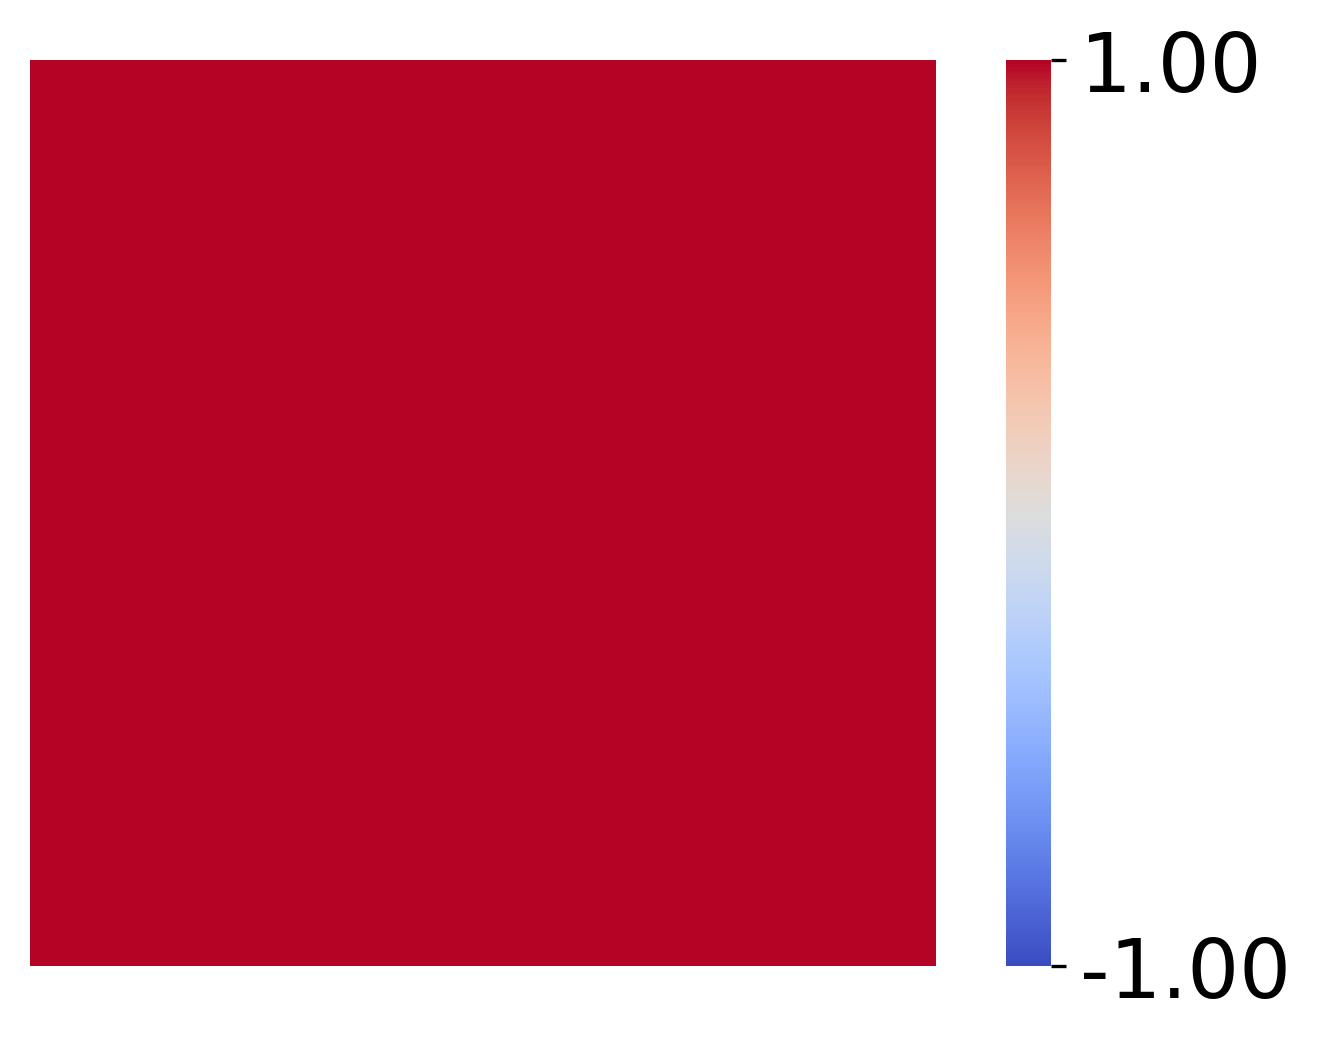

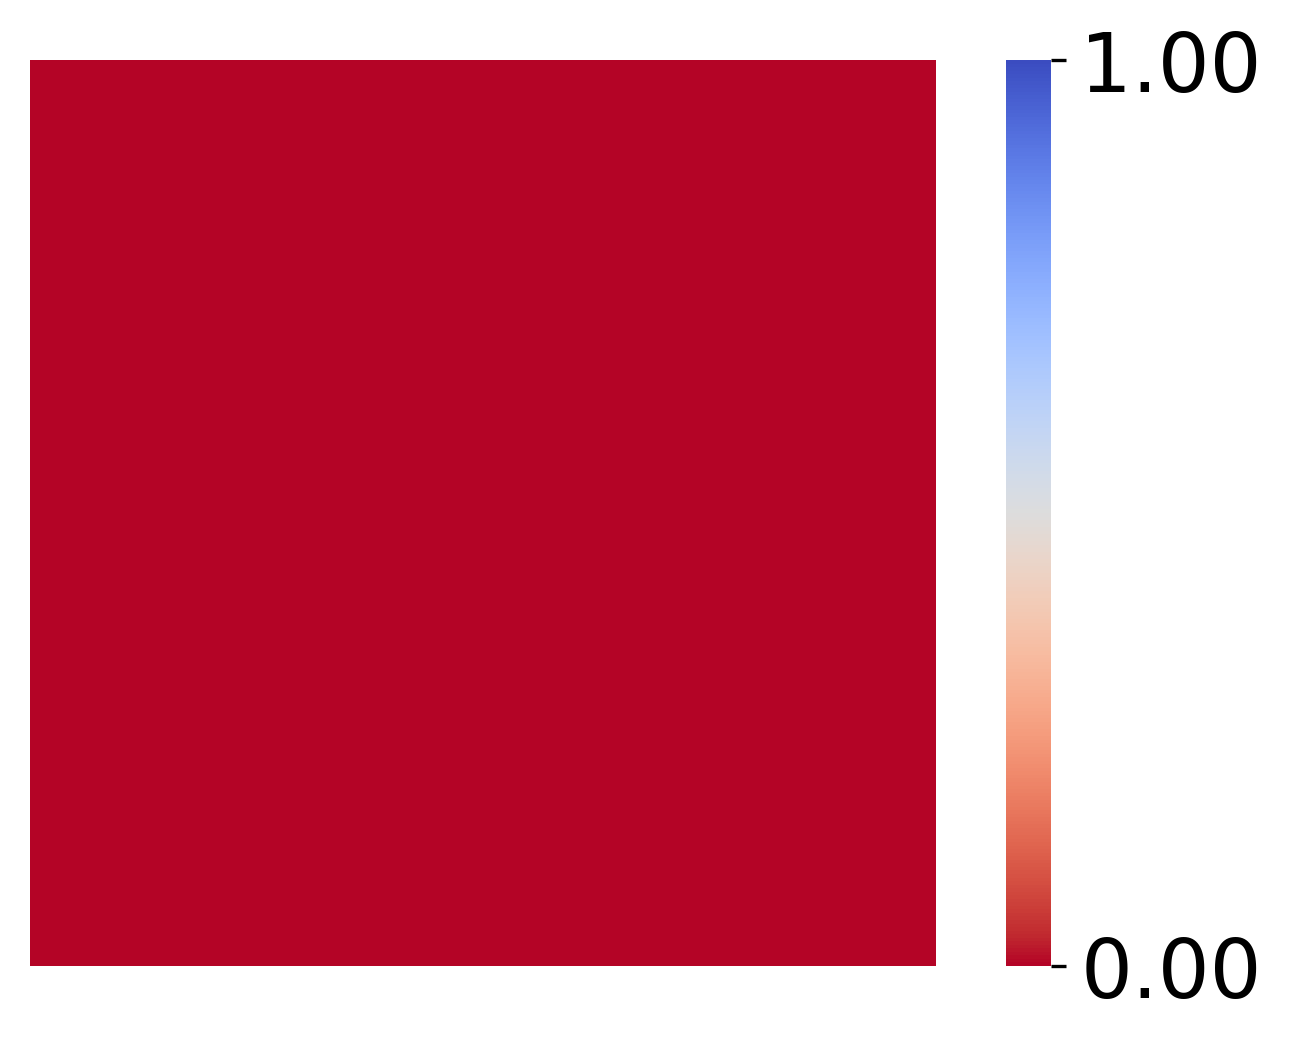

In [52]:
corr_fig, pvs_fig = compute_2D_correlation(sim_estss, sim_estss, effs, effs, "Observations", "Observations", annot=False, resize_colorbar=True, square=square, axes_off=True, font_size_multiplier=1.4)

In [53]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_estimates_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_estimates_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_estimates_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_estimates_trait.svg'))

### Random Perturbations

In [54]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t1 as sim_timestamp

random_rewss, random_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

random_rewss = random_rewss.mean(axis=0)
random_obss = random_obss.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss = np.flip(random_rewss.T, axis=1)
random_obss = np.flip(random_obss.T, axis=1)

original_mag_perturbation = 1
with open(os.path.join('data', 'sim_perturbed_participants', 'pepe', 'random', 'mag%d'%(original_mag_perturbation*100), '%s_simulated_participant_perturbations_random_mag.pkl' %sim_timestamp), 'rb') as f:
    sim_participant_perturbations = - pickle.load(f) ## multiply by -1 to convert from tau to efficacy

### CONSTRUCT SIM_ESTS
random_estss = (np.tile(np.arange(0, 1.01, 0.125), (len(sim_participant_perturbations),1)) + sim_participant_perturbations)

(150, 9)


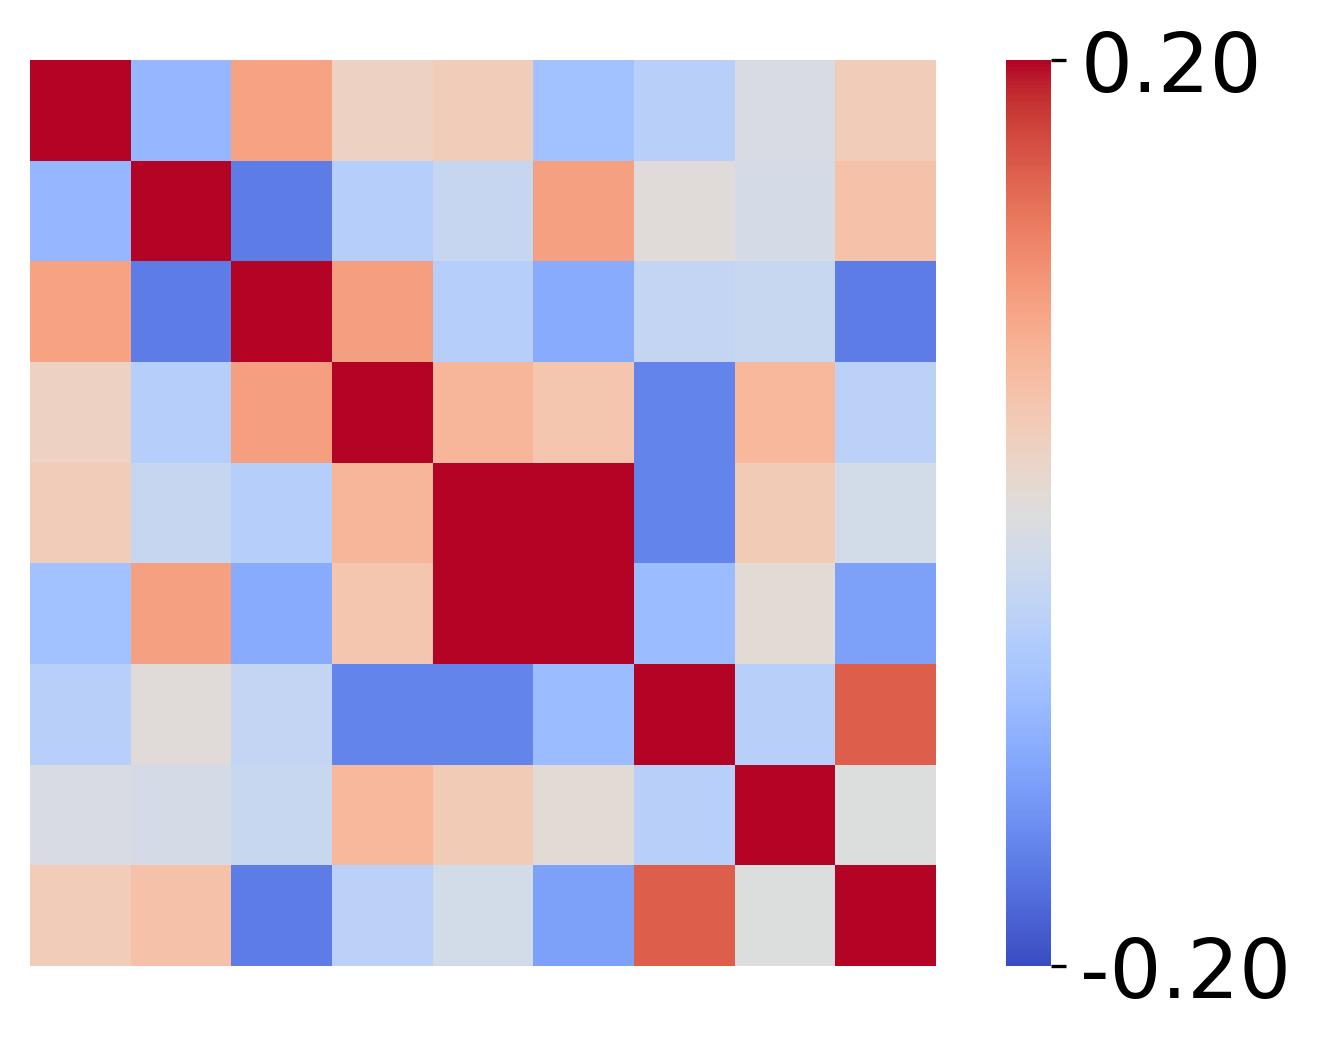

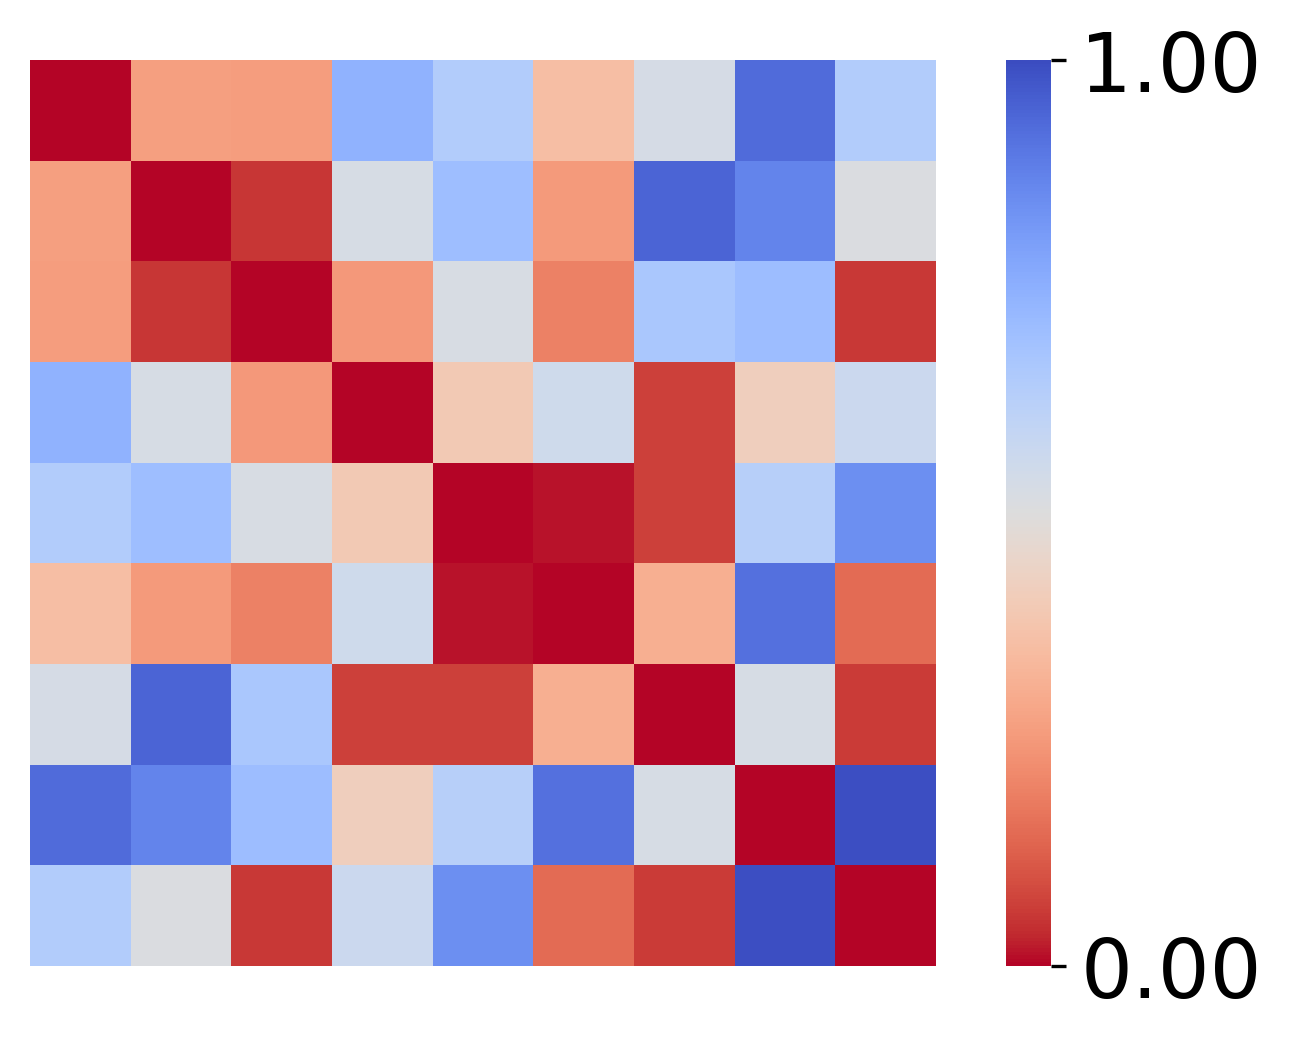

In [55]:
corr_fig, pvs_fig = compute_2D_correlation(random_estss, random_estss, effs, effs, "Observations", "Observations", annot=False, resize_colorbar=True, square=square, axes_off=axes_off , font_size_multiplier=1.4)

In [56]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_estimates_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_estimates_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_estimates_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_estimates_random.svg'))

### Zeros Perturbation

In [57]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t1 as sim_timestamp

zeros_rewss, zeros_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

zeros_rewss = zeros_rewss.mean(axis=0)
zeros_obss = zeros_obss.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss = np.flip(zeros_rewss.T, axis=1)
zeros_obss = np.flip(zeros_obss.T, axis=1)

effs = np.arange(0, 1.125, 0.125)

original_mag_perturbation = 1
with open(os.path.join('data', 'sim_perturbed_participants', 'pepe', 'nostruc', 'mag%d'%(original_mag_perturbation*100), '%s_simulated_participant_perturbations_nostruc_mag.pkl' %sim_timestamp), 'rb') as f:
    sim_participant_perturbations = - pickle.load(f) ## multiply by -1 to convert from tau to efficacy

zeros_estss = (np.tile(np.arange(0, 1.01, 0.125), (len(sim_participant_perturbations),1)).T + sim_participant_perturbations).T

(150, 9)


/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


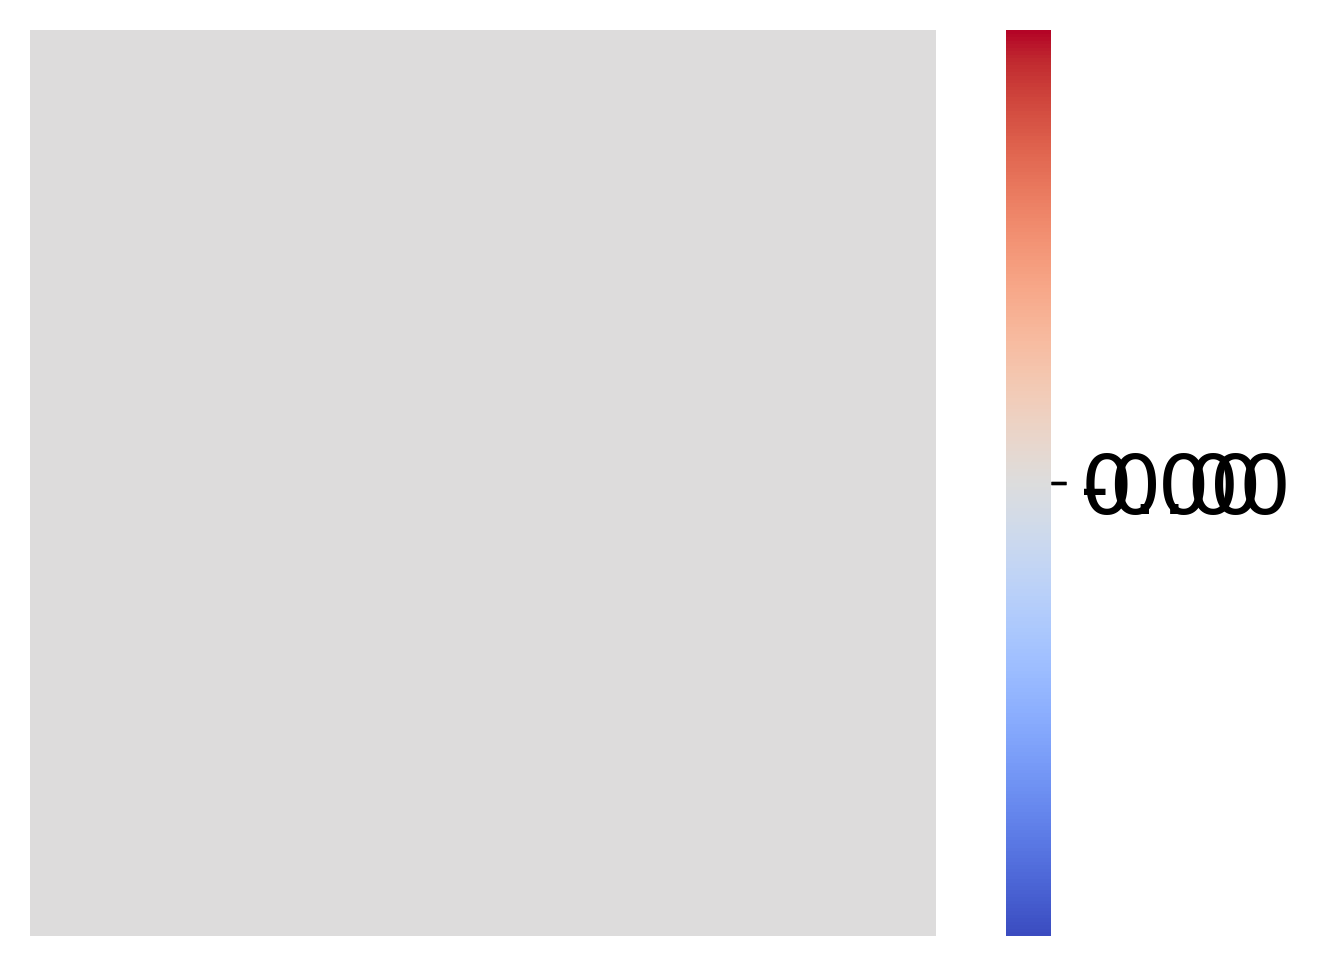

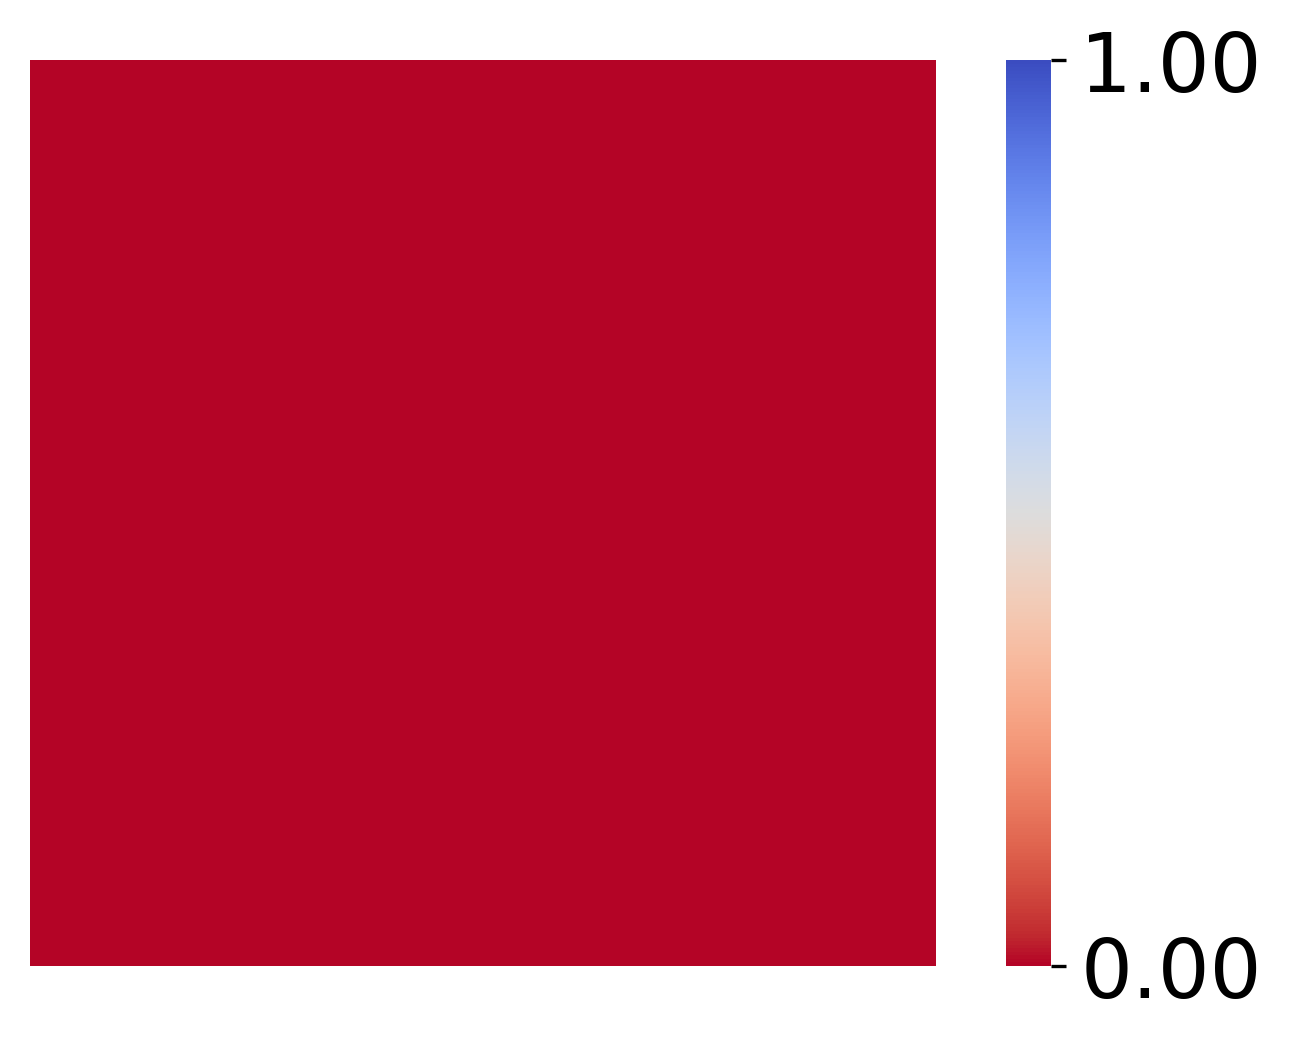

In [58]:
corr_fig, pvs_fig = compute_2D_correlation(zeros_estss, zeros_estss, effs, effs, "Observations", "Observations", annot=False, resize_colorbar=True, square=square, axes_off=axes_off , font_size_multiplier=1.4)

In [59]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_estimates_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_estimates_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_estimates_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_estimates_zeros.svg'))

## Panel B.3: Task 1 Observes vs. Estimates
### Humans

In [60]:
from human_utils_project import get_clean_data

day = 'day2'
exp_date = '24-01-22-29'

group = None
human_data_file_base = '/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis'

df, effs_train, effs_test, test_start = get_clean_data(day = int(day[-1]), exp_date = exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)

n_steps = 50

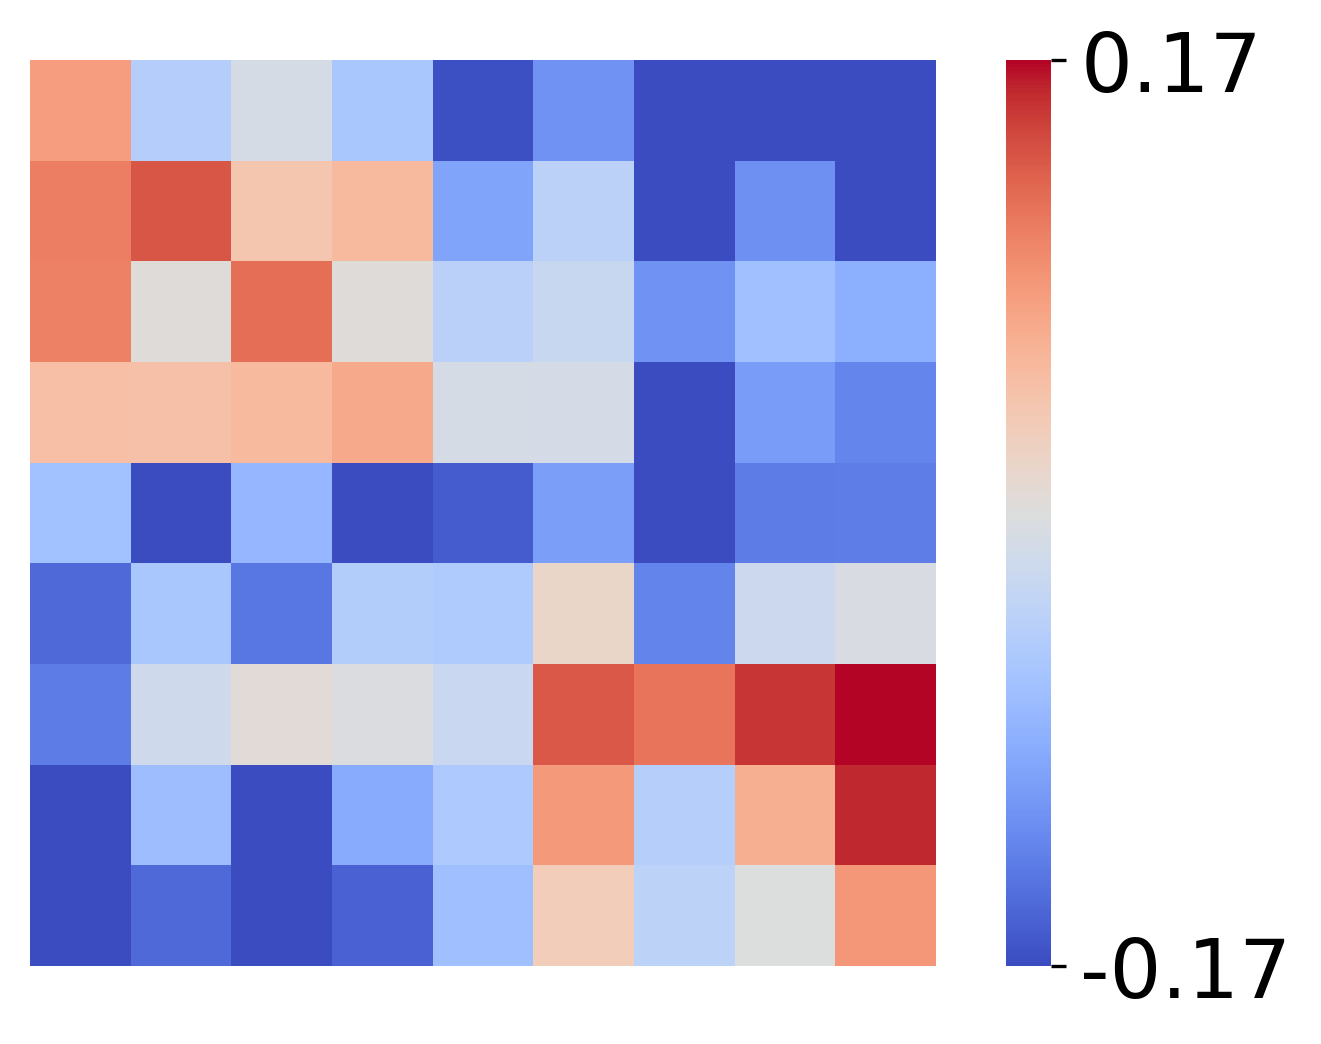

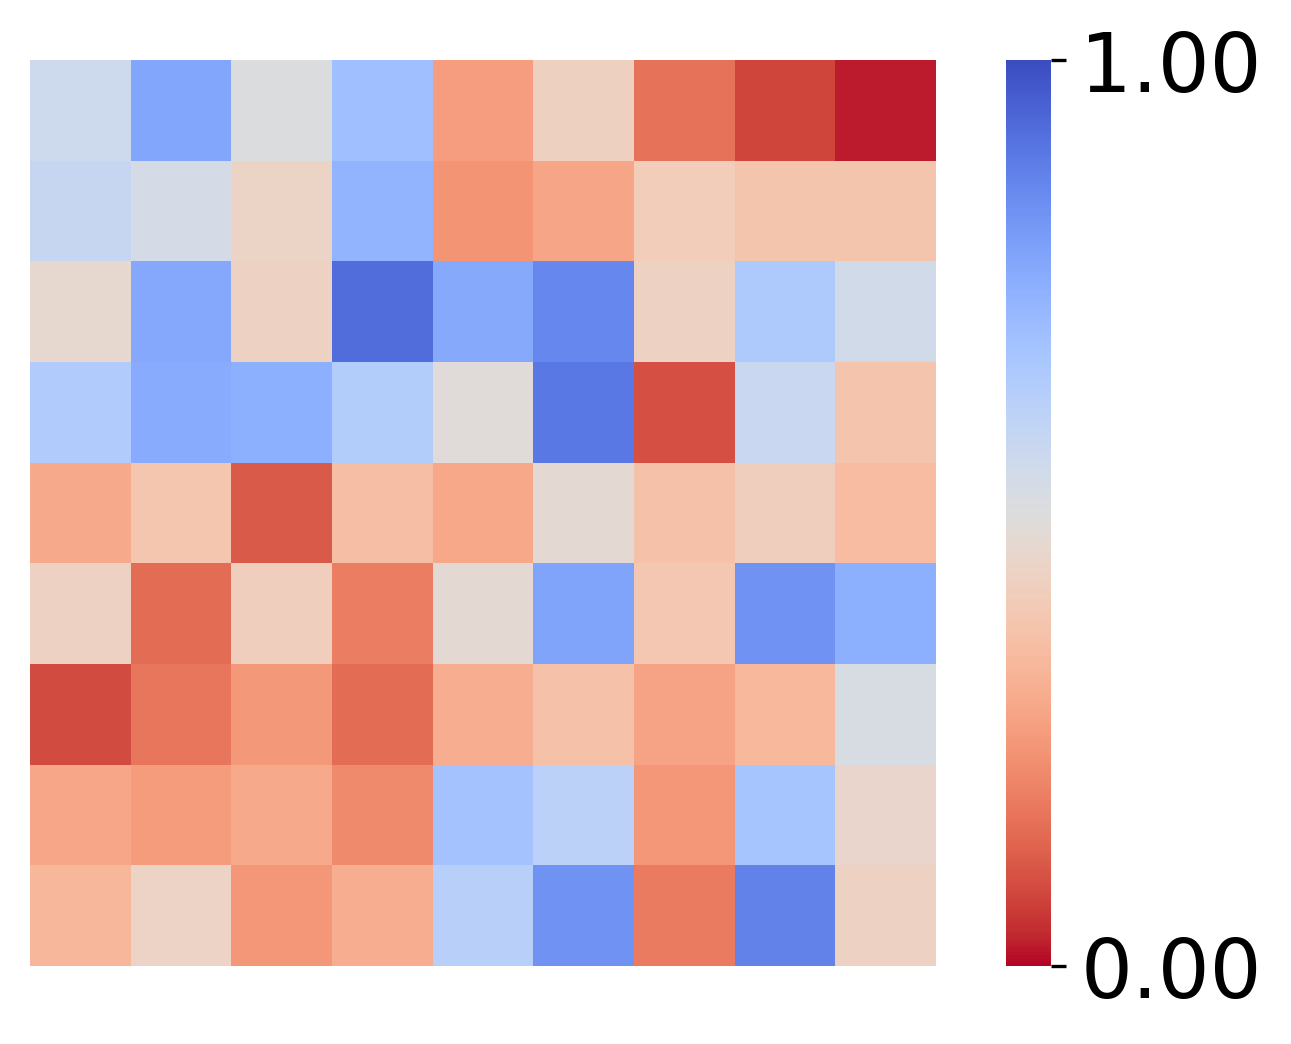

In [61]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(df['n_observes'],df['efficacy_estimates'], df['effs'], df['effs'], col1name = 'Observes', col2name='Estimates', annot=False, resize_colorbar = True, square=square,  font_size_multiplier=1.4, groups=df['group'], axes_off=True,)

In [62]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_estimates_observes_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_estimates_observes_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_estimates_observes_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_estimates_observes_humans.svg'))

### Trait

In [63]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t1 as sim_timestamp

sim_rewss, sim_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)
sim_rewss = sim_rewss.mean(axis=0)
sim_obss = sim_obss.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss = np.flip(sim_rewss.T, axis=1)
sim_obss = np.flip(sim_obss.T, axis=1)

original_mag_perturbation = 1
with open(os.path.join('data', 'sim_perturbed_participants', 'pepe', 'sim', 'mag%d'%(original_mag_perturbation*100), '%s_simulated_participant_perturbations_sim_mag.pkl' %sim_timestamp), 'rb') as f:
    sim_participant_perturbations = - pickle.load(f) ## multiply by -1 to convert from tau to efficacy

### CONSTRUCT SIM_ESTS
sim_estss = (np.tile(np.arange(0, 1.01, 0.125), (len(sim_participant_perturbations),1)).T + sim_participant_perturbations).T

effs = np.arange(0, 1.125, 0.125)

(150, 9)


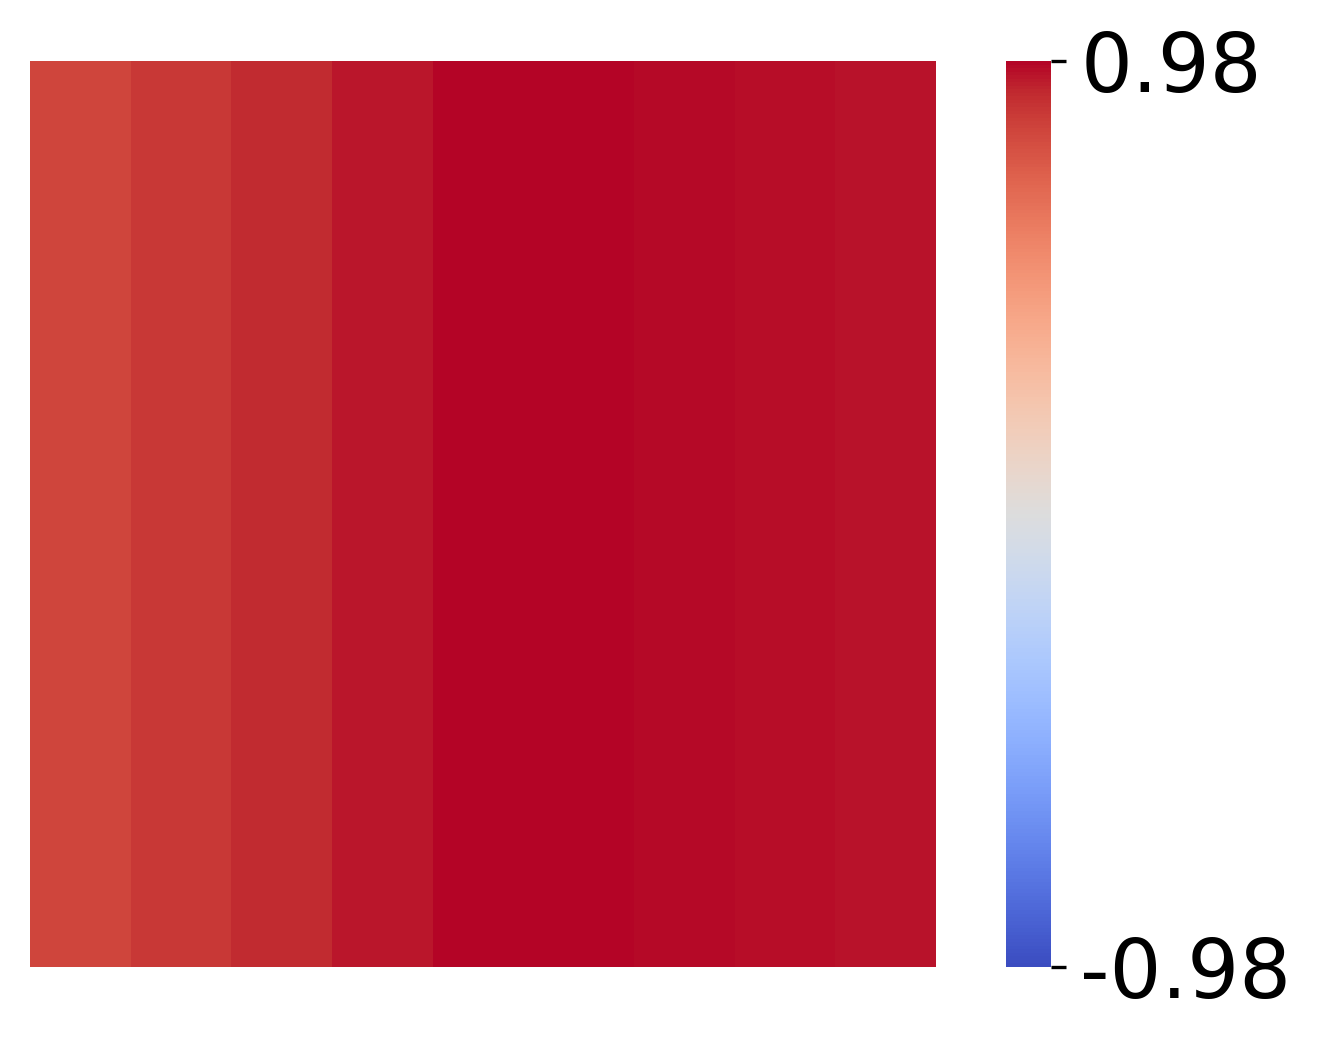

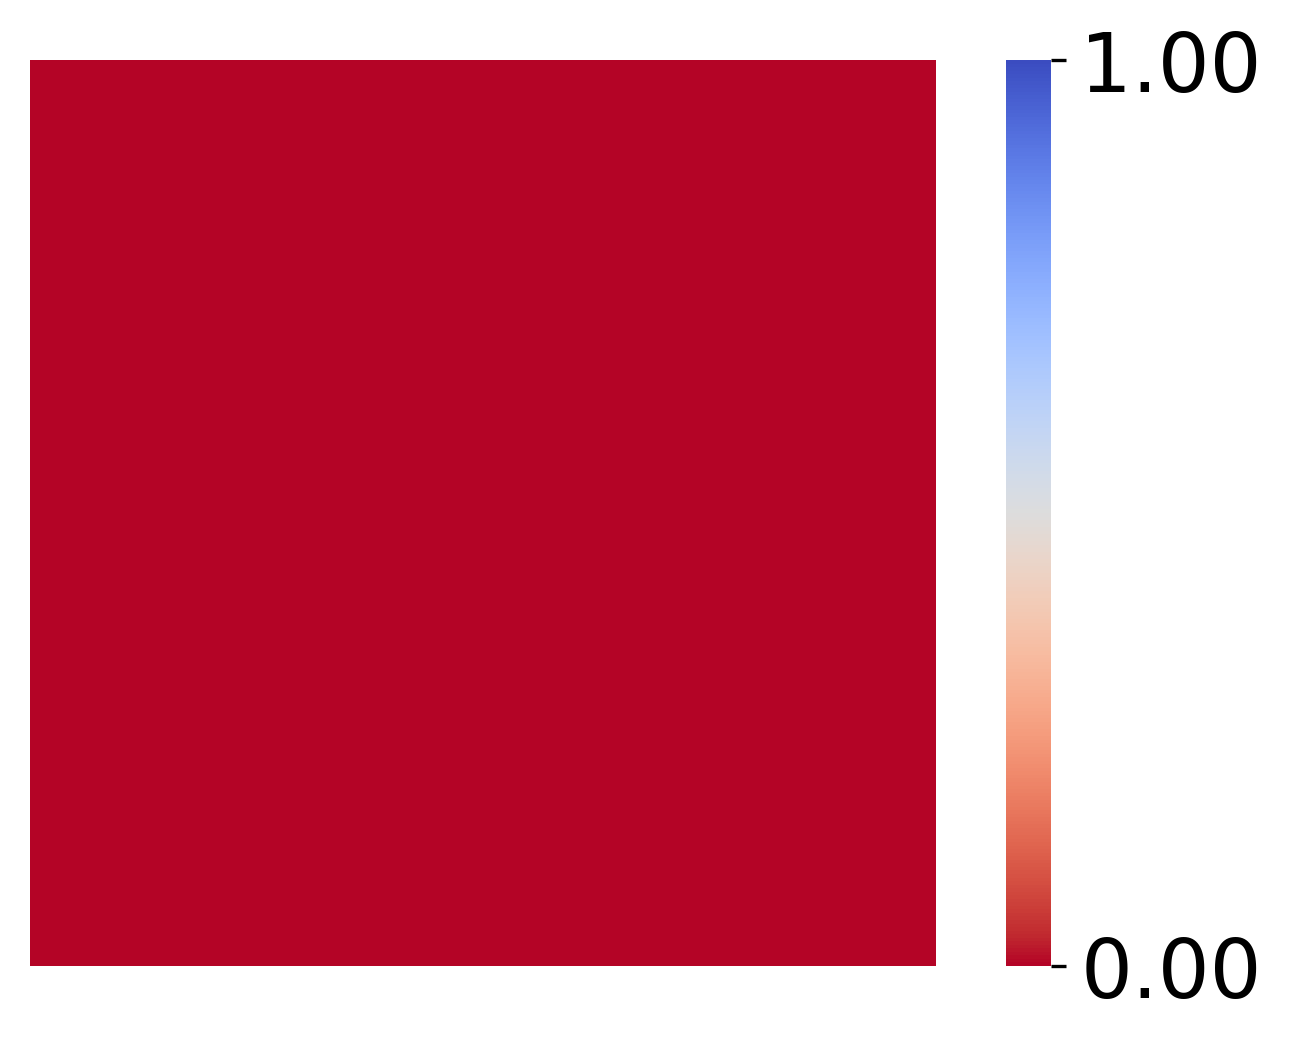

In [64]:
corr_fig, pvs_fig = compute_2D_correlation(sim_obss, sim_estss, effs, effs, "Observations", "Observations", annot=False, resize_colorbar=True, square=square, axes_off=True, font_size_multiplier=1.4)

In [65]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_estimates_observes_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_estimates_observes_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_estimates_observes_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_estimates_observes_trait.svg'))

### Random

In [66]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t1 as sim_timestamp

random_rewss, random_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

random_rewss = random_rewss.mean(axis=0)
random_obss = random_obss.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss = np.flip(random_rewss.T, axis=1)
random_obss = np.flip(random_obss.T, axis=1)

original_mag_perturbation = 1
with open(os.path.join('data', 'sim_perturbed_participants', 'pepe', 'random', 'mag%d'%(original_mag_perturbation*100), '%s_simulated_participant_perturbations_random_mag.pkl' %sim_timestamp), 'rb') as f:
    sim_participant_perturbations = - pickle.load(f) ## multiply by -1 to convert from tau to efficacy

### CONSTRUCT SIM_ESTS
random_estss = (np.tile(np.arange(0, 1.01, 0.125), (len(sim_participant_perturbations),1)) + sim_participant_perturbations).T

(9, 9)


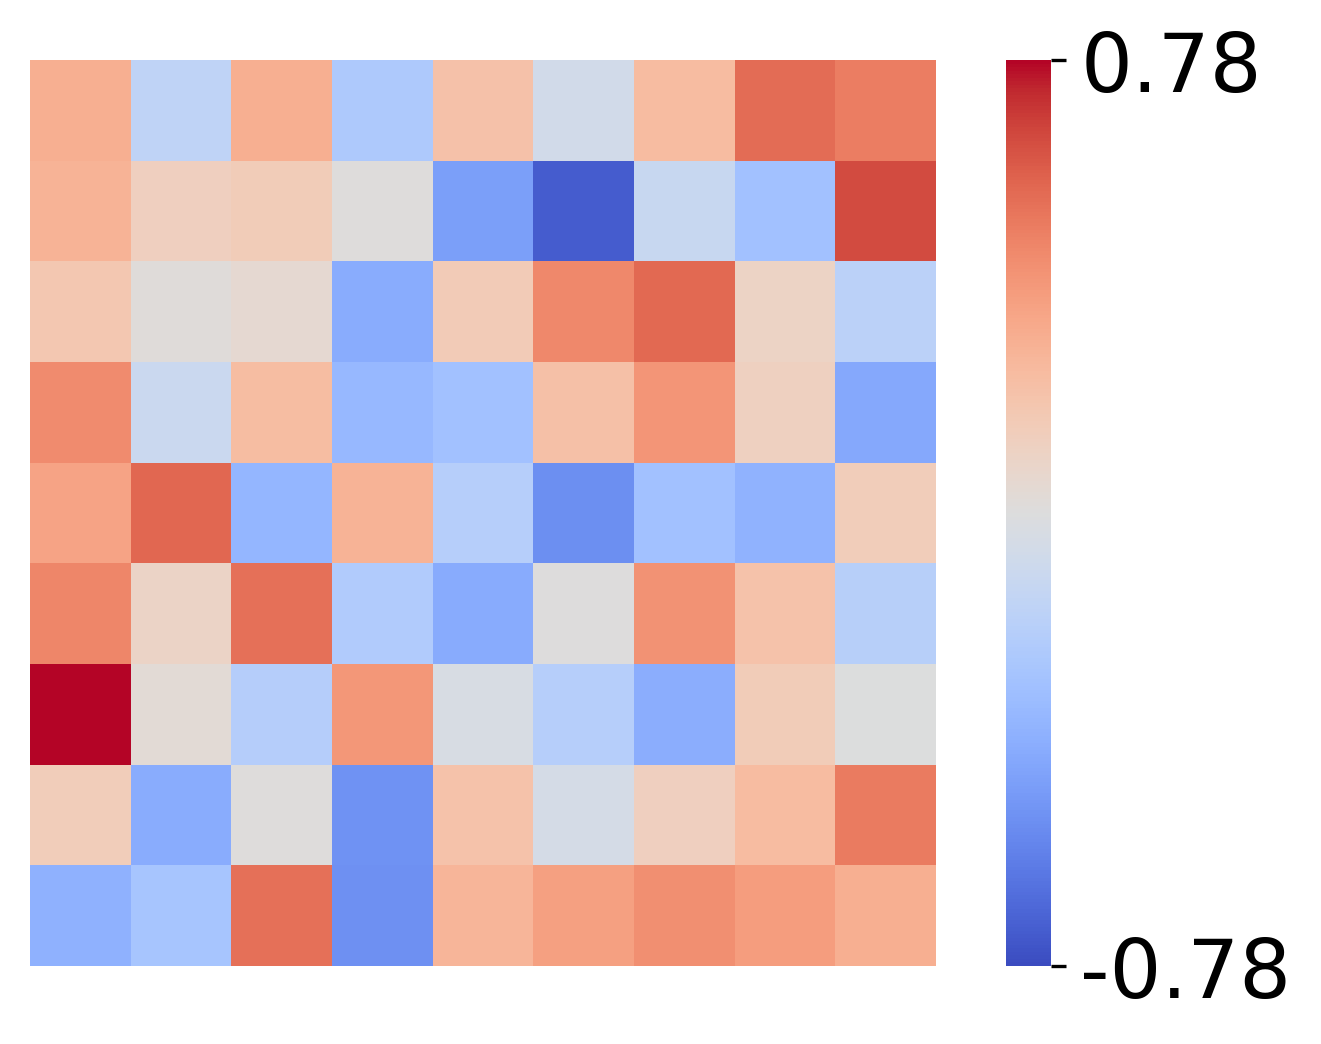

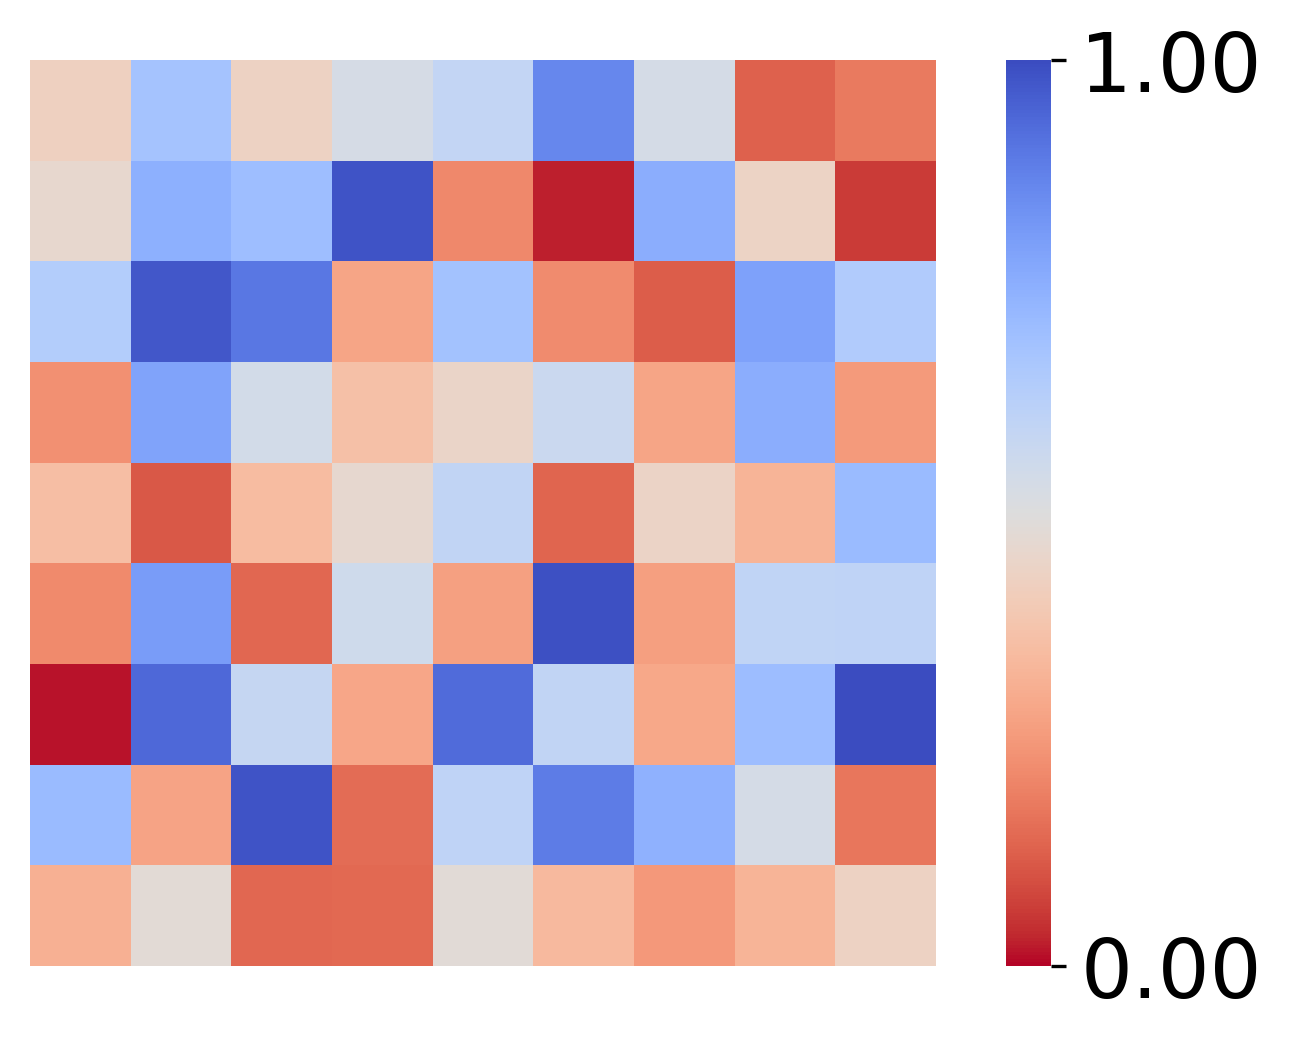

In [67]:
corr_fig, pvs_fig = compute_2D_correlation(random_obss, random_estss, effs, effs, "Observations", "Observations", annot=False, resize_colorbar=True, square=square, axes_off=axes_off , font_size_multiplier=1.4)

In [68]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_estimates_observes_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_estimates_observes_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_estimates_observes_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_estimates_observes_random.svg'))

### Zeros

In [69]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t1 as sim_timestamp

zeros_rewss, zeros_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

zeros_rewss = zeros_rewss.mean(axis=0)
zeros_obss = zeros_obss.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss = np.flip(zeros_rewss.T, axis=1)
zeros_obss = np.flip(zeros_obss.T, axis=1)

effs = np.arange(0, 1.125, 0.125)

original_mag_perturbation = 1
with open(os.path.join('data', 'sim_perturbed_participants', 'pepe', 'nostruc', 'mag%d'%(original_mag_perturbation*100), '%s_simulated_participant_perturbations_nostruc_mag.pkl' %sim_timestamp), 'rb') as f:
    sim_participant_perturbations = - pickle.load(f) ## multiply by -1 to convert from tau to efficacy

zeros_estss = (np.tile(np.arange(0, 1.01, 0.125), (len(sim_participant_perturbations),1)).T + sim_participant_perturbations).T

(150, 9)


/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


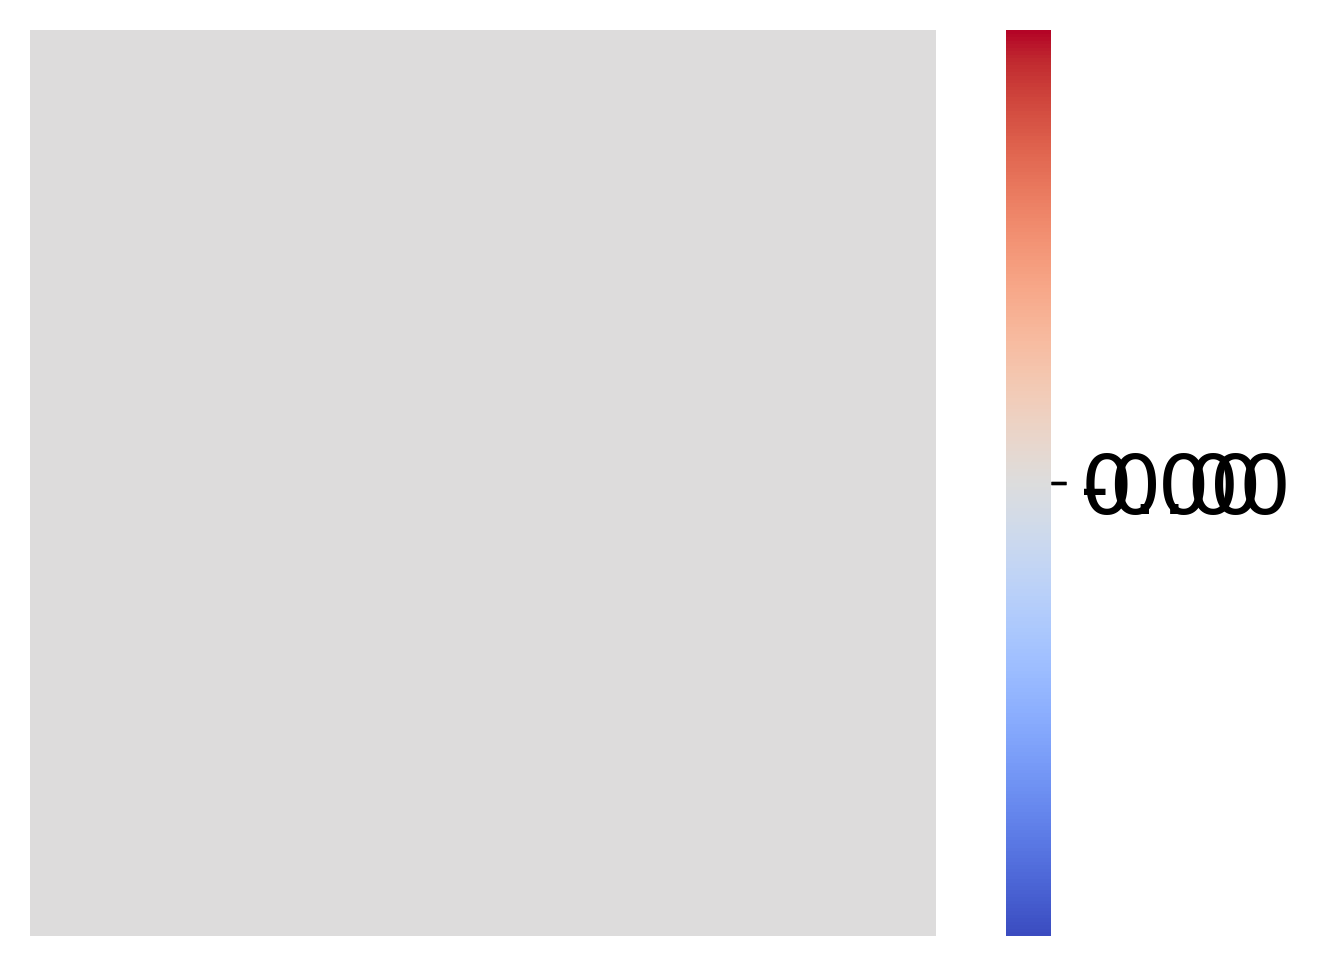

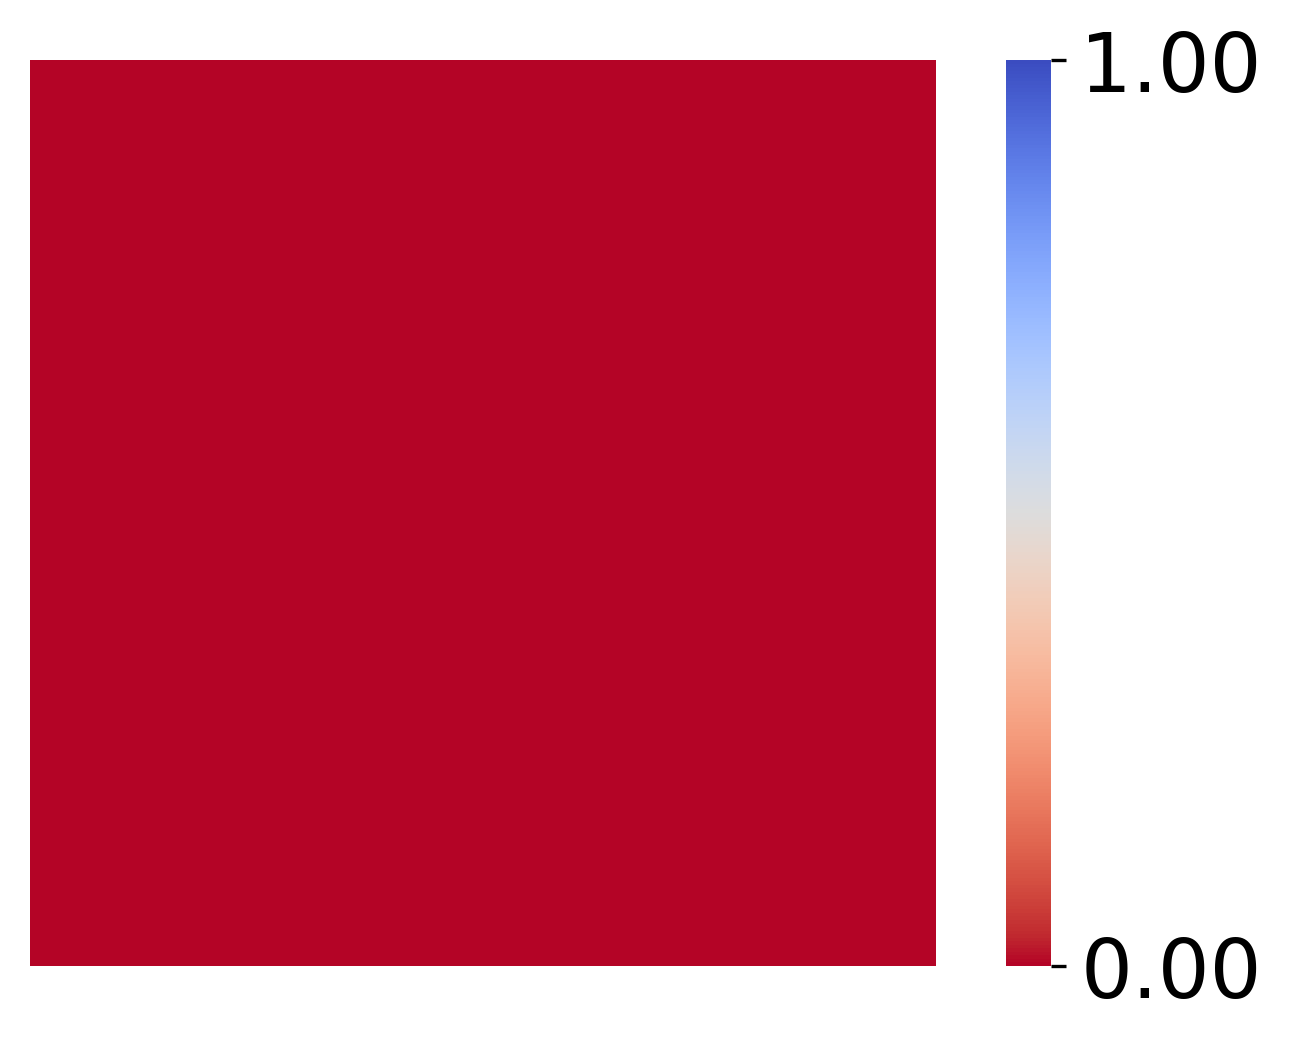

In [70]:
corr_fig, pvs_fig = compute_2D_correlation(zeros_obss, zeros_estss, effs, effs, "Observations", "Observations", annot=False, resize_colorbar=True, square=square, axes_off=axes_off , font_size_multiplier=1.4)

In [71]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_estimates_observes_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_estimates_observes_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_estimates_observes_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_estimates_observes_zeros.svg'))

## Panel B.4: Task 1 Rewards vs. Estimates

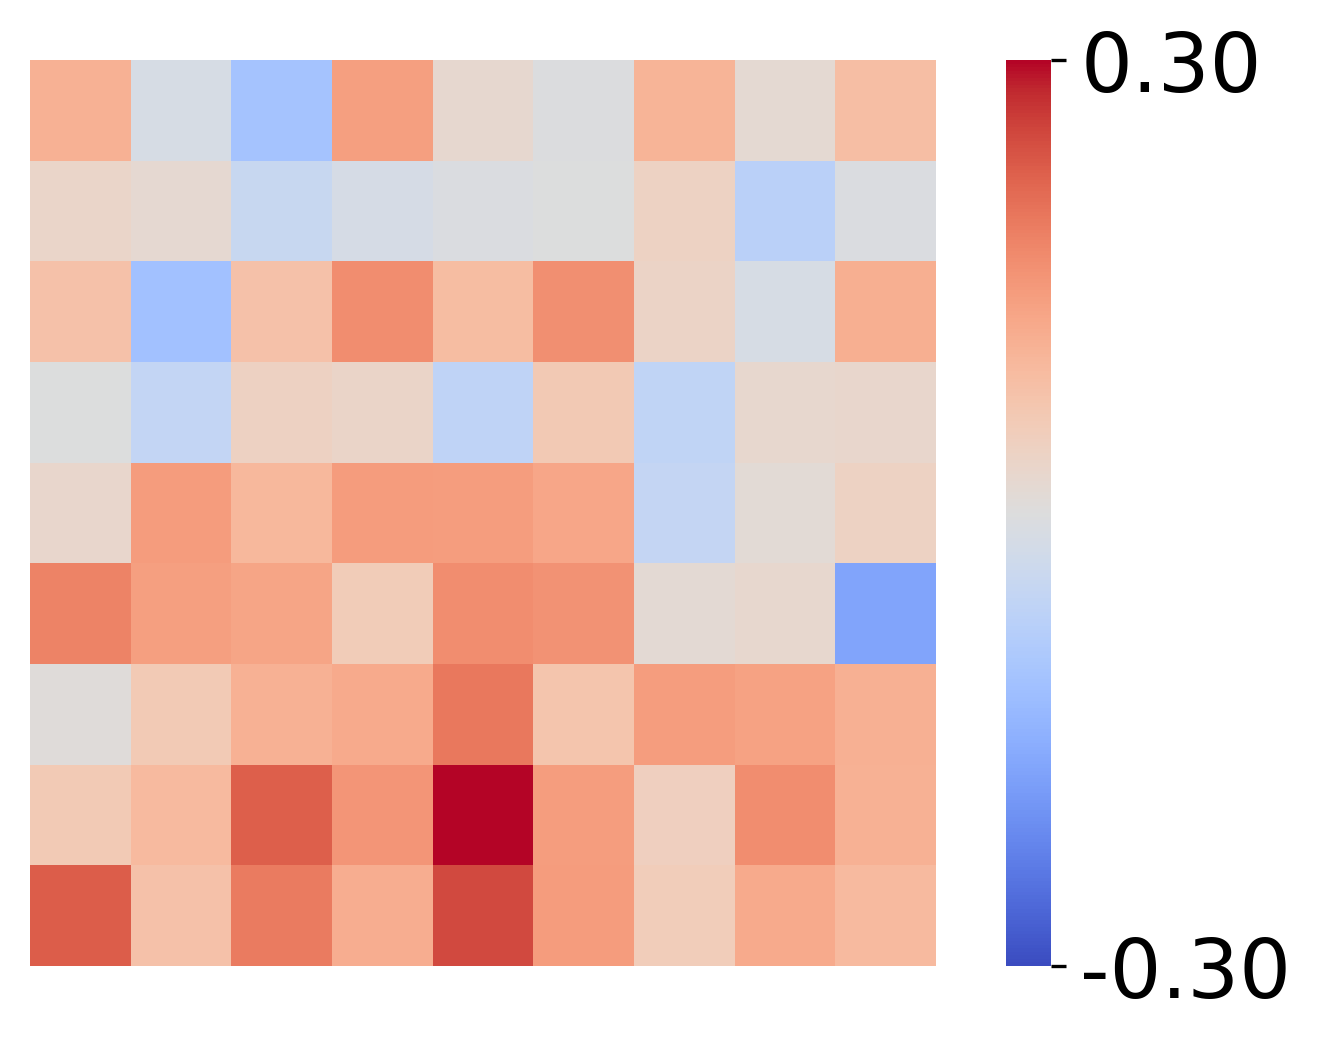

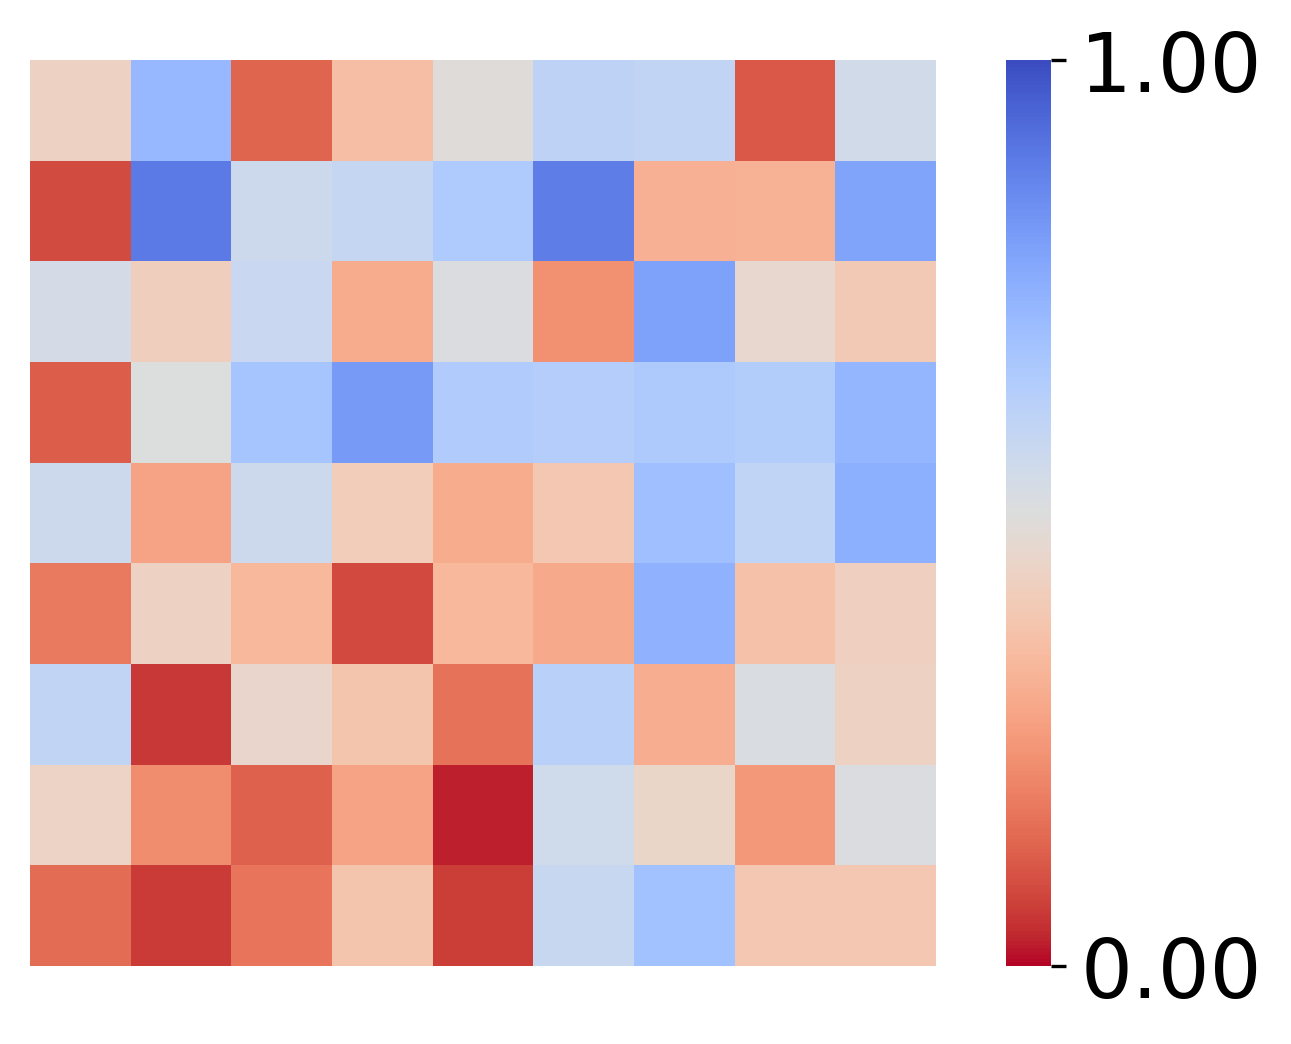

In [72]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(df['rewards_tallies'],df['efficacy_estimates'],  df['effs'], df['effs'], col1name = 'Estimates', col2name='Rewards', annot=False, resize_colorbar = True, square=square,  font_size_multiplier=1.4, groups=df['group'], axes_off=True,)

In [73]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_estimates_rewards_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_estimates_rewards_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_estimates_rewards_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_estimates_rewards_humans.svg'))

## Panel B.4: Task 1 Observes vs. Rewards
### Humans

In [74]:
from human_utils_project import get_clean_data

day = 'day2'
exp_date = '24-01-22-29'

group = None
human_data_file_base = '/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis'

df, effs_train, effs_test, test_start = get_clean_data(day = int(day[-1]), exp_date = exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)

n_steps = 50

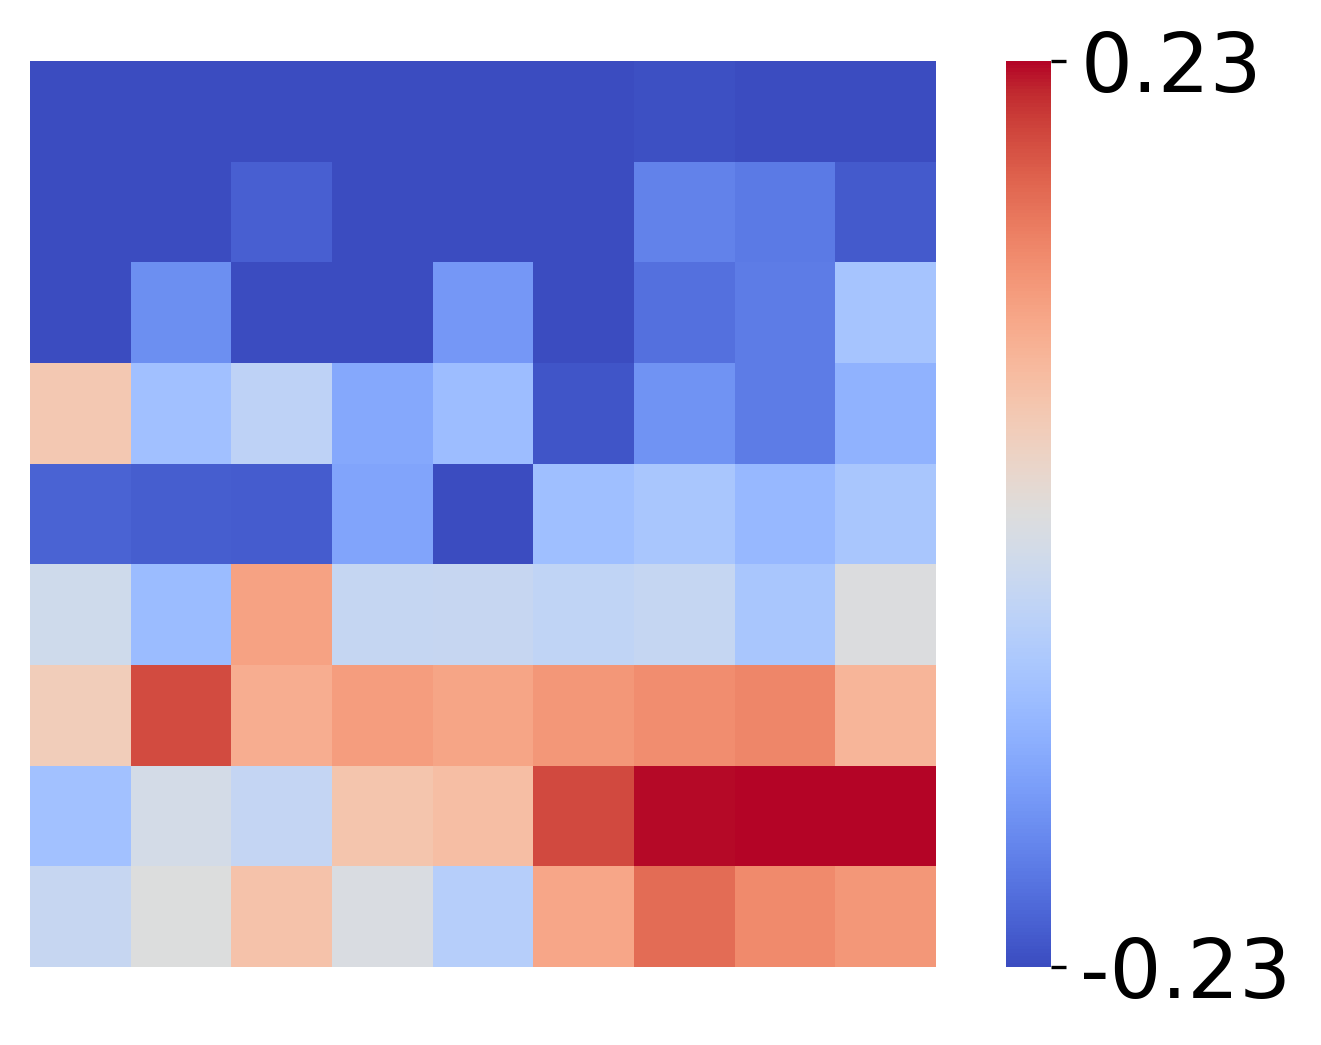

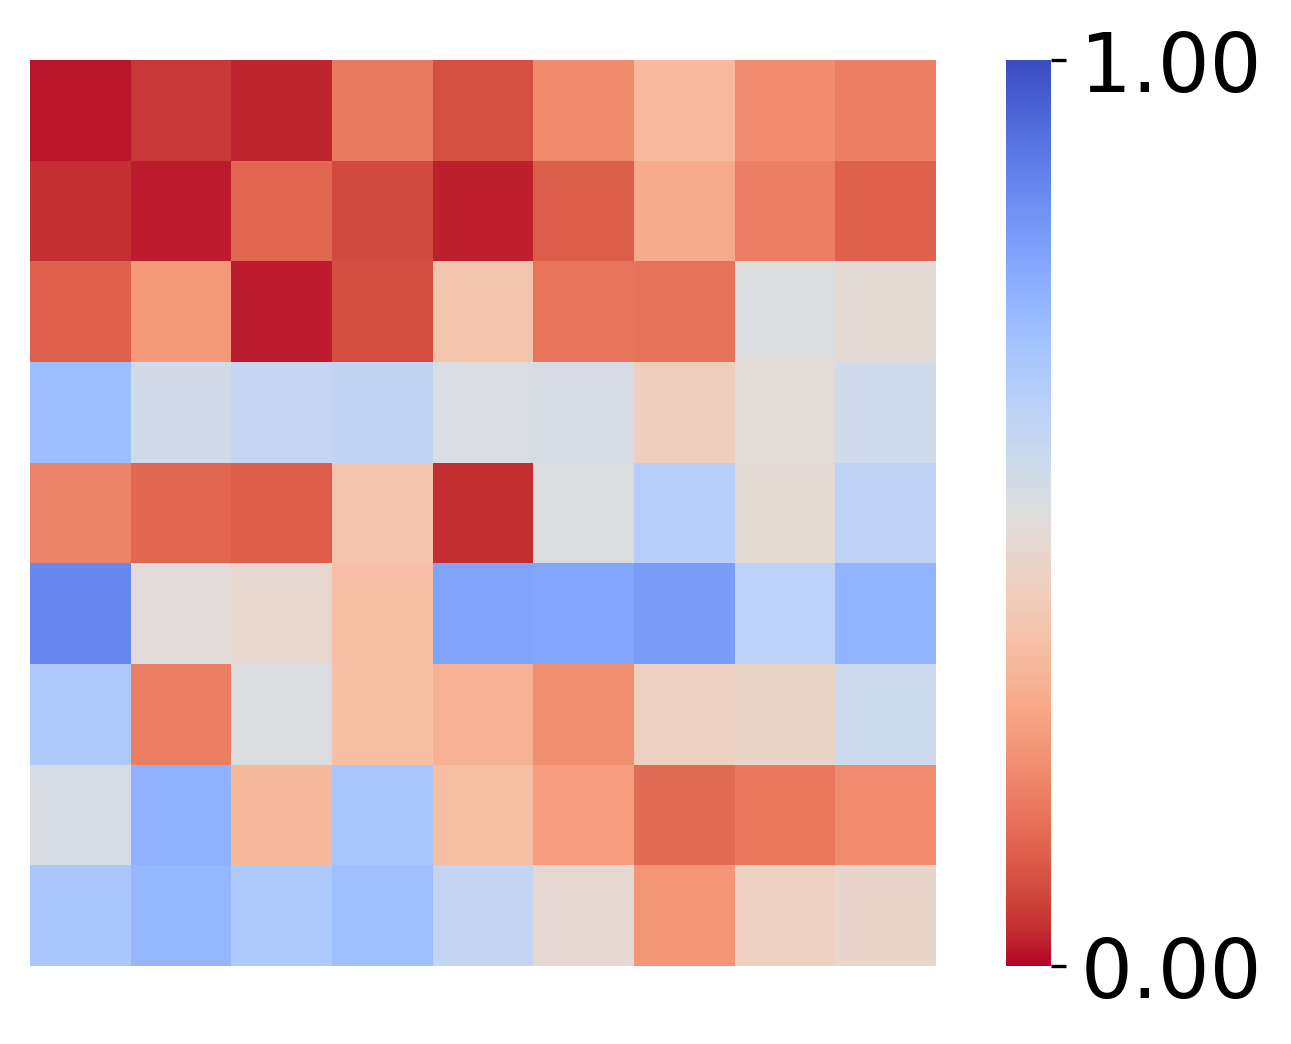

In [75]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(df['n_observes'], df['rewards_tallies'], df['effs'], df['effs'], col1name = 'Observes', col2name='Observes', annot=False, resize_colorbar = True, square=square, axes_off=True, font_size_multiplier=1.4, groups=df['group'])

In [76]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_observes_rewards_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_observes_rewards_humans.svg'))

pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_observes_rewards_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_observes_rewards_humans.svg'))

## Panel C: Task 2 Sleeps
### Humans

In [77]:
from human_utils_project import get_clean_data
day = 'day3'
exp_date = '24-01-22-29'

group = None

human_data_file_base = '/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis'

df, effs_train, effs_test, test_start = get_clean_data(day = int(day[-1]), exp_date = exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)

effs = np.arange(0, 1.01, 0.125)
n_steps = 50

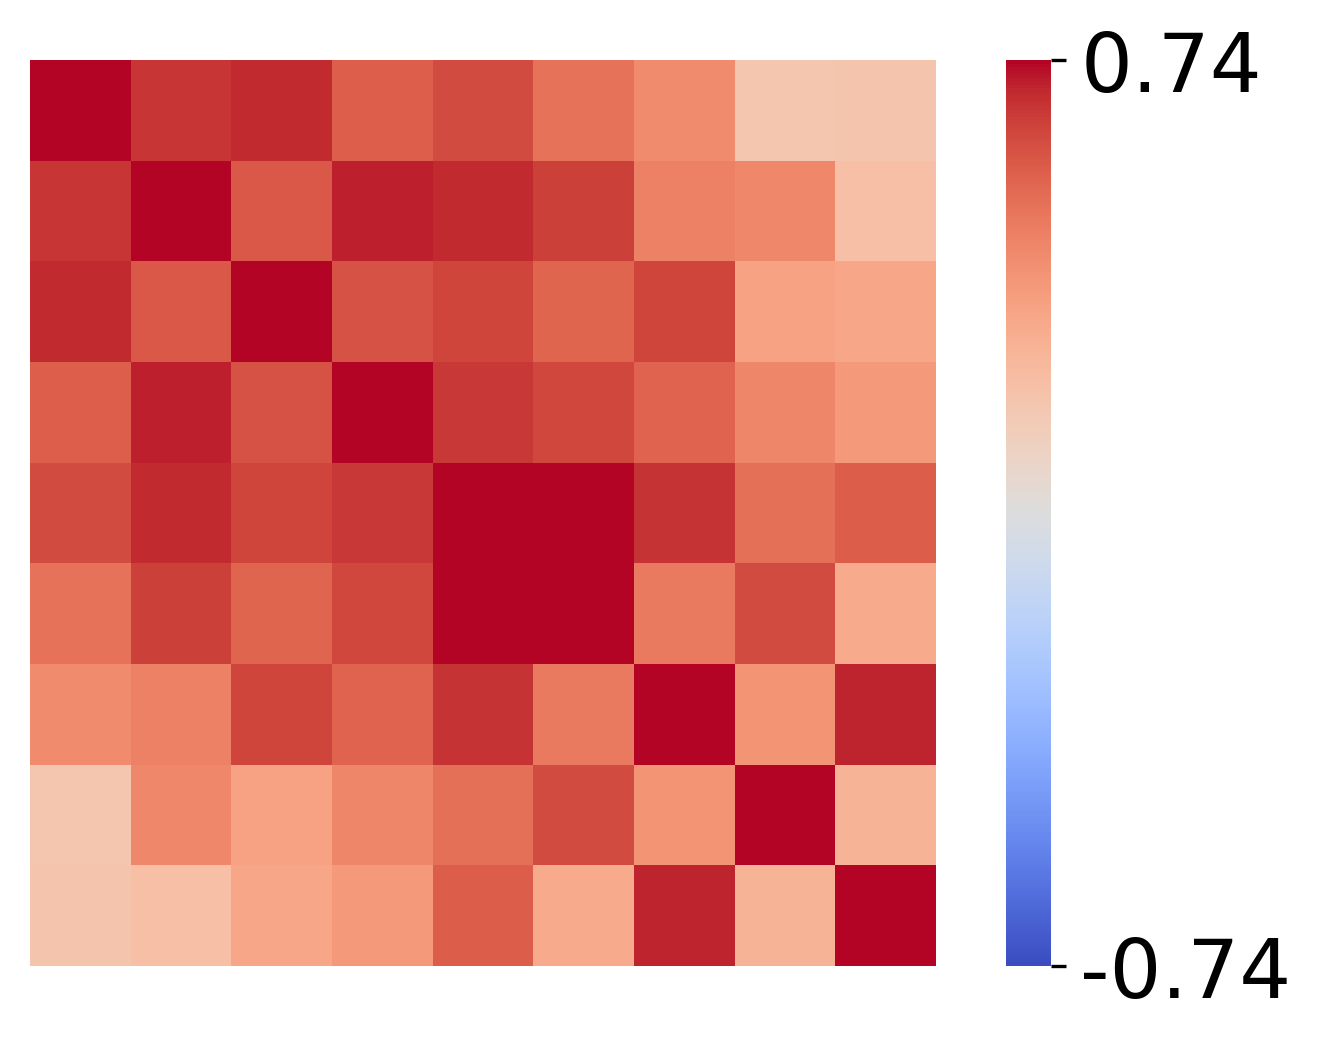

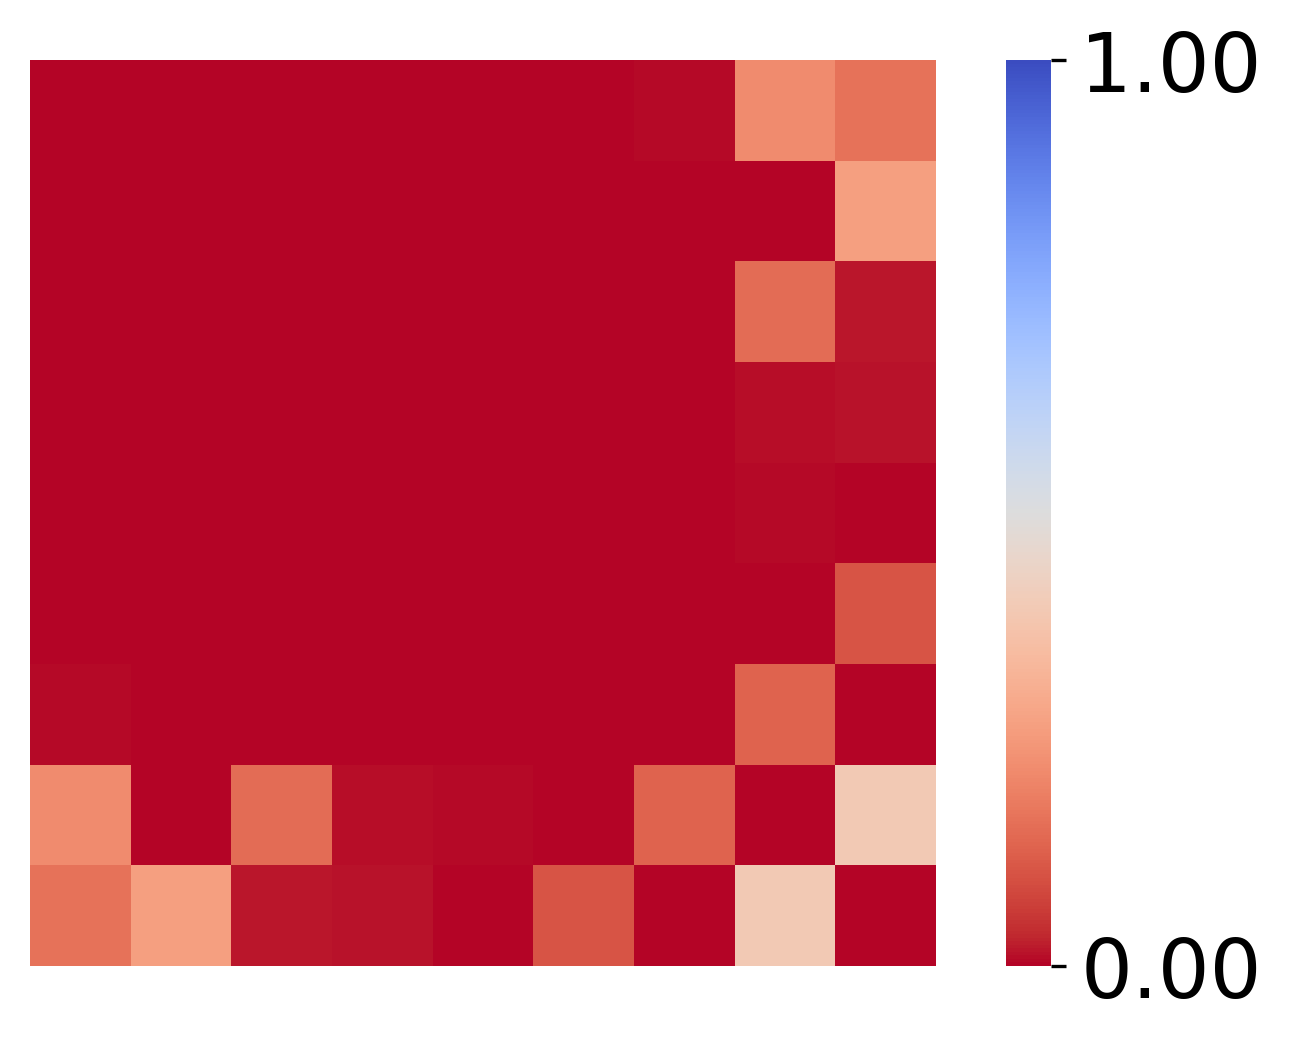

In [78]:
from human_utils_behavioral_analysis import compute_2D_correlation
corr_fig, pvs_fig = compute_2D_correlation(df['n_sleeps'], df['n_sleeps'], df['effs'], df['effs'], col1name = 'Sleeps', col2name='Sleeps', annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4, groups=df['group'])

In [79]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_humans.svg'))

### Trait-level Perturbations

In [80]:
from settings_anal import levc_human_ape_models as ape_models
from human_utils_behavioral_analysis import load_simulated_participants_across_models, compute_2D_correlation
from settings_anal import trait_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

sim_rewss, sim_obss, sim_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)
sim_rewss = sim_rewss.mean(axis=0)
sim_obss = sim_obss.mean(axis=0)
sim_sleepss = sim_sleepss.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss = np.flip(sim_rewss.T, axis=1)
sim_obss = np.flip(sim_obss.T, axis=1)
sim_sleepss = np.flip(sim_sleepss, axis=1)

(9, 9)


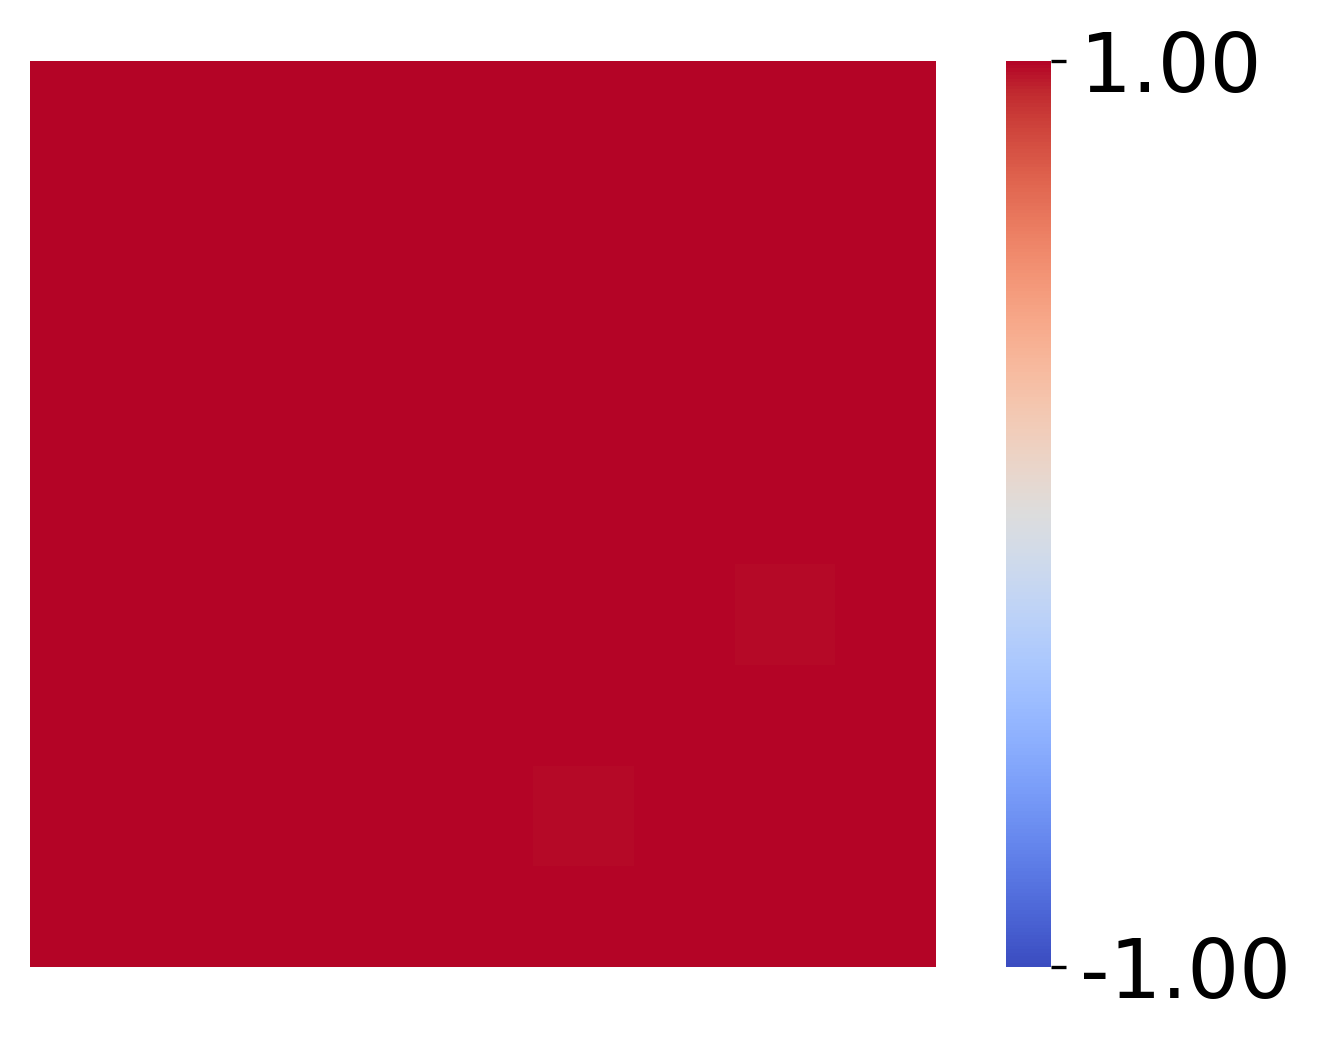

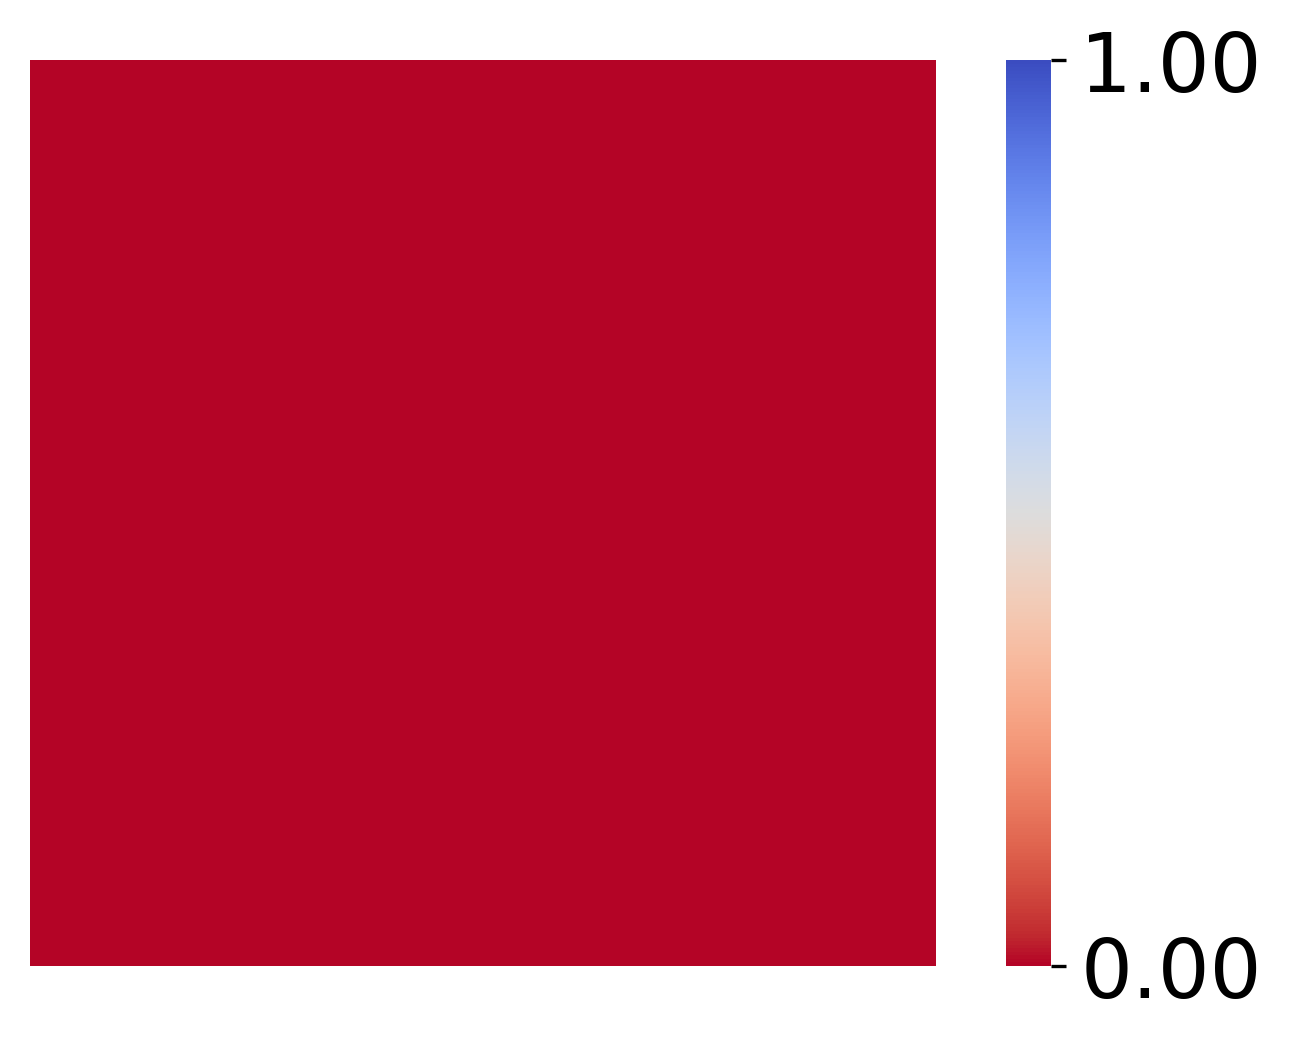

In [81]:
corr_fig, pvs_fig = compute_2D_correlation(sim_sleepss, sim_sleepss, effs, effs, "Sleeps", "Sleeps", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4,)

In [82]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_trait.svg'))

### Random Perturbations

In [83]:
from settings_anal import levc_human_ape_models as ape_models
from human_utils_behavioral_analysis import load_simulated_participants_across_models
from settings_anal import random_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

random_rewss, random_obss, random_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

random_rewss = random_rewss.mean(axis=0)
random_obss = random_obss.mean(axis=0)
random_sleepss = random_sleepss.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss = np.flip(random_rewss.T, axis=1)
random_obss = np.flip(random_obss.T, axis=1)
random_sleepss = np.flip(random_sleepss.T, axis=1)

(150, 9)


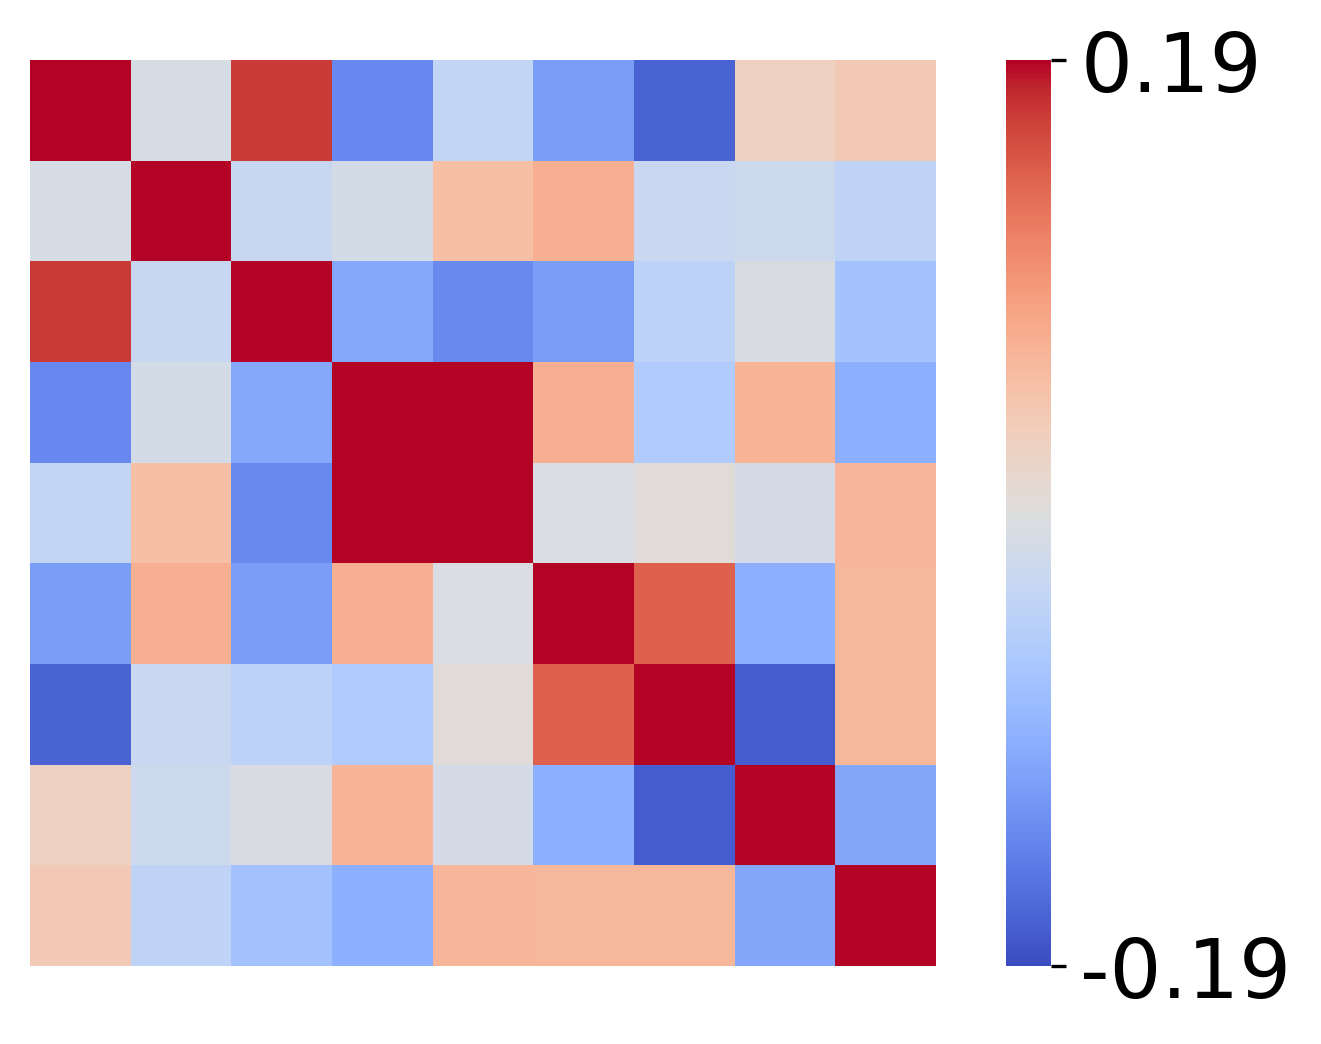

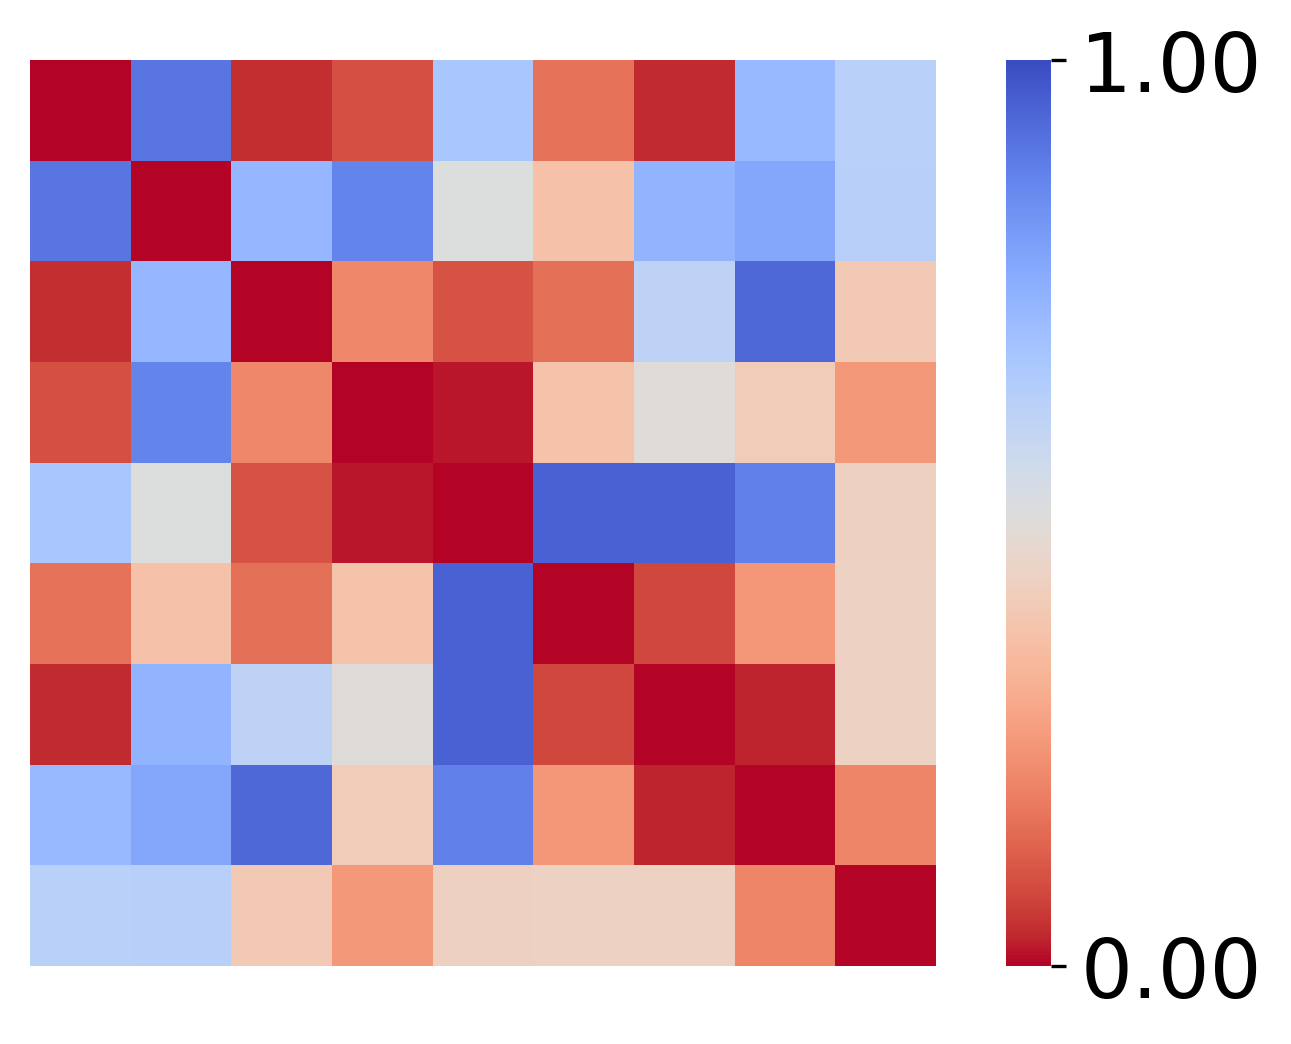

In [84]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(random_sleepss, random_sleepss, effs, effs, "Sleeps", "Sleeps", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [85]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_random.svg'))

### Zeros Perturbation

In [86]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import levc_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t2 as sim_timestamp

zeros_rewss, zeros_obss, zeros_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

zeros_rewss = zeros_rewss.mean(axis=0)
zeros_obss = zeros_obss.mean(axis=0)
zeros_sleepss = zeros_sleepss.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss = np.flip(zeros_rewss.T, axis=1)
zeros_obss = np.flip(zeros_obss.T, axis=1)
zeros_sleepss = np.flip(zeros_sleepss.T, axis=1)

effs = np.arange(0, 1.125, 0.125)

(150, 9)


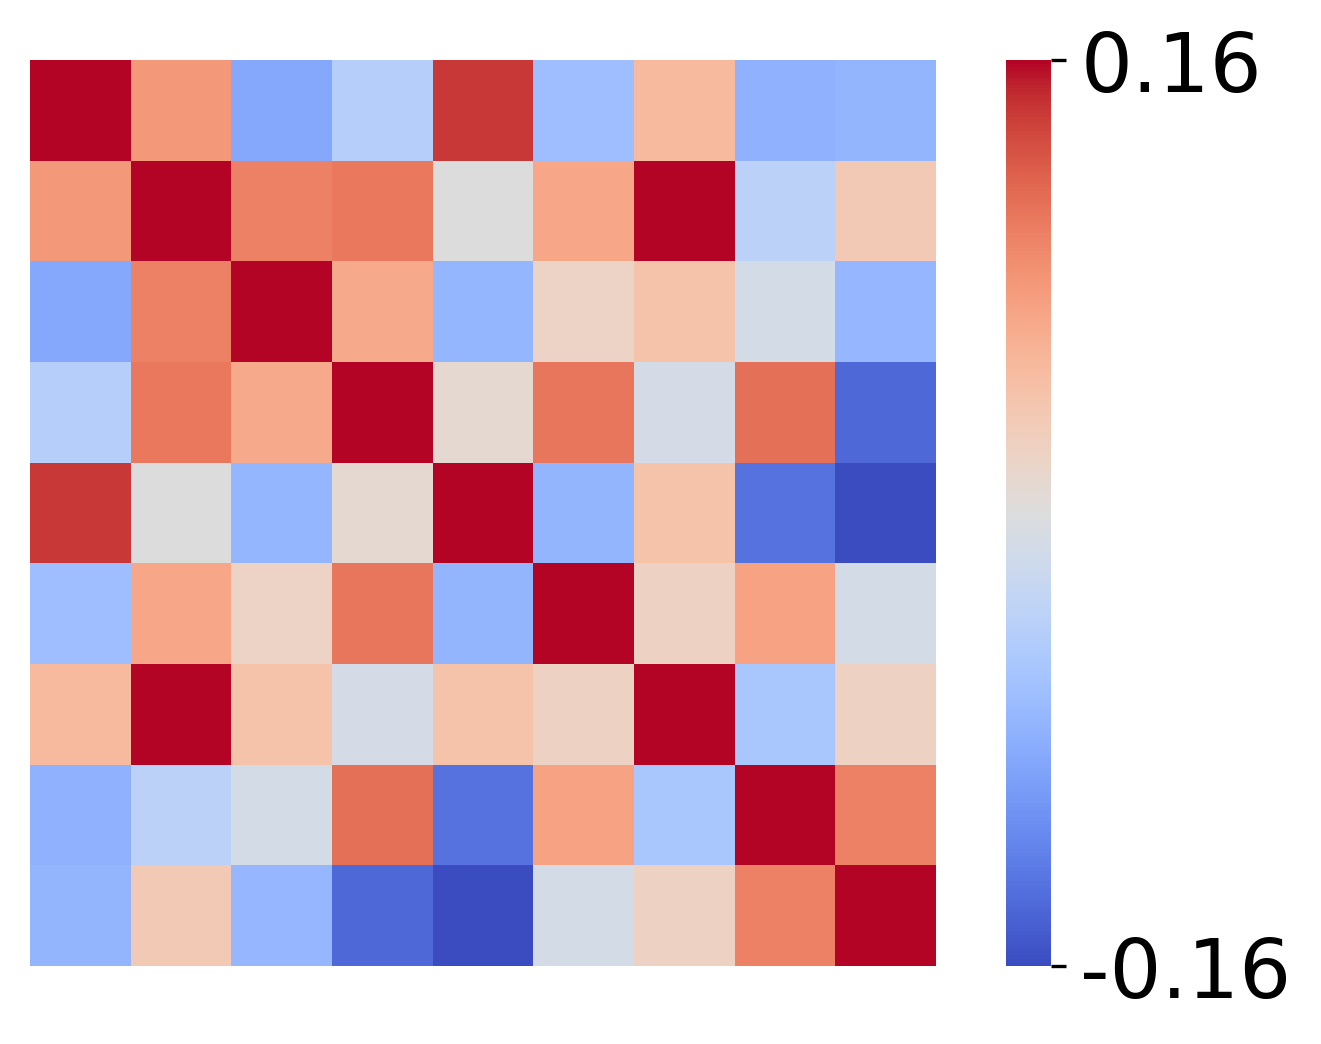

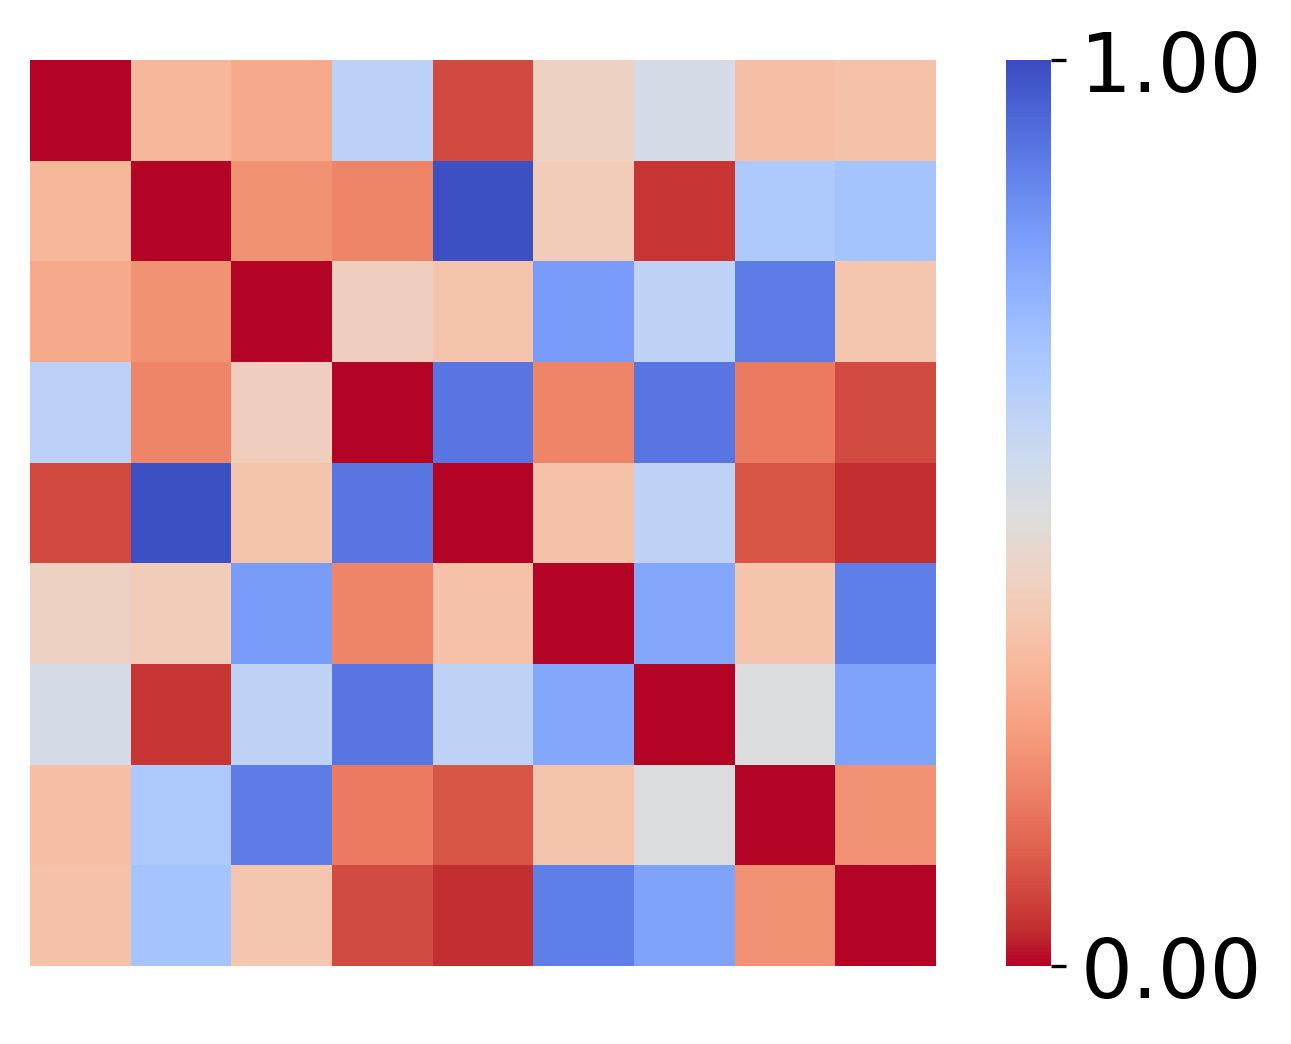

In [87]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(zeros_sleepss, zeros_sleepss, effs, effs, "Sleeps", "Sleeps", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [88]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_zeros.svg'))

### Stats

In [89]:
from human_utils_behavioral_analysis import compute_2D_correlation_matrices

data_obs_corr_g1, data_obs_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)
data_obs_corr_g2, data_obs_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group']]['n_observes'].values), np.stack(df[df['group']]['n_observes'].values), np.stack(df[df['group']]['effs'].values), np.stack(df[df['group']]['effs'].values),)

data_rews_corr_g1, data_rews_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)
data_rews_corr_g2, data_rews_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group']]['rewards_tallies'].values), np.stack(df[df['group']]['rewards_tallies'].values), np.stack(df[df['group']]['effs'].values), np.stack(df[df['group']]['effs'].values),)

data_sleeps_corr_g1, data_sleeps_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['n_sleeps'].values), np.stack(df[~df['group']]['n_sleeps'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)
data_sleeps_corr_g2, data_sleeps_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group']]['n_sleeps'].values), np.stack(df[df['group']]['n_sleeps'].values), np.stack(df[df['group']]['effs'].values), np.stack(df[df['group']]['effs'].values),)

data_obs_corr = (~df['group']).sum() / len(df) * data_obs_corr_g1 + (df['group']).sum() / len(df) * data_obs_corr_g2
data_obs_pvs = (~df['group']).sum() / len(df) * data_obs_pvs_g1 + (df['group']).sum() / len(df) * data_obs_pvs_g2

data_rews_corr = (~df['group']).sum() / len(df) * data_rews_corr_g1 + (df['group']).sum() / len(df) * data_rews_corr_g2
data_rews_pvs = (~df['group']).sum() / len(df) * data_rews_pvs_g1 + (df['group']).sum() / len(df) * data_rews_pvs_g2

data_sleeps_corr = (~df['group']).sum() / len(df) * data_sleeps_corr_g1 + (df['group']).sum() / len(df) * data_sleeps_corr_g2
data_sleeps_pvs = (~df['group']).sum() / len(df) * data_sleeps_pvs_g1 + (df['group']).sum() / len(df) * data_sleeps_pvs_g2


sim_obs_corr, sim_obs_pvs = compute_2D_correlation_matrices(sim_obss, sim_obss, effs, effs,)
sim_rews_corr, sim_rews_pvs = compute_2D_correlation_matrices(sim_rewss, sim_rewss, effs, effs,)
sim_sleeps_corr, sim_sleeps_pvs = compute_2D_correlation_matrices(sim_sleepss, sim_sleepss, effs, effs,)
random_obs_corr, random_obs_pvs = compute_2D_correlation_matrices(random_obss, random_obss, effs, effs,)
random_rews_corr, random_rews_pvs = compute_2D_correlation_matrices(random_rewss, random_rewss, effs, effs,)
random_sleeps_corr, random_sleeps_pvs = compute_2D_correlation_matrices(random_sleepss, random_sleepss, effs, effs,)

zeros_obs_corr, zeros_obs_pvs = compute_2D_correlation_matrices(zeros_obss, zeros_obss, effs, effs,)
zeros_rews_corr, zeros_rews_pvs = compute_2D_correlation_matrices(zeros_rewss, zeros_rewss, effs, effs,)
zeros_sleeps_corr, zeros_sleeps_pvs = compute_2D_correlation_matrices(zeros_sleepss, zeros_sleepss, effs, effs,)


(46, 9)
(65, 9)
(46, 9)
(65, 9)
(46, 9)
(65, 9)
(150, 9)
(150, 9)
(9, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)


In [90]:
from human_utils_behavioral_analysis import competitive_corr_regression, upper_tri_masking

competitive_corr_regression(upper_tri_masking(data_sleeps_corr), [upper_tri_masking(sim_sleeps_corr), upper_tri_masking(random_sleeps_corr), upper_tri_masking(zeros_sleeps_corr)])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.558
Date:                Thu, 20 Jun 2024   Prob (F-statistic):              0.219
Time:                        17:20:24   Log-Likelihood:                 7.6701
No. Observations:                  36   AIC:                            -7.340
Df Residuals:                      32   BIC:                            -1.006
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2791      0.268      1.040      0.3

#### Cosine Similarity

In [91]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(upper_tri_masking(data_sleeps_corr).reshape((1,-1)), upper_tri_masking(sim_sleeps_corr).reshape((1,-1)))[0][0])
print(cosine_similarity(upper_tri_masking(data_sleeps_corr).reshape((1,-1)), upper_tri_masking(random_sleeps_corr).reshape((1,-1)))[0][0])

0.9563639141465041
-0.11100447723089227


## Panel C2: Task 2 Sleeps/Observes

### Humans

In [92]:
from human_utils_project import get_clean_data

day = 'day3'
exp_date = '24-01-22-29'

group = None

human_data_file_base = '/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis'

df, effs_train, effs_test, test_start = get_clean_data(day = int(day[-1]), exp_date = exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)

df = df[df['n_observes'].apply(sum) > 10]
df = df[df['n_sleeps'].apply(sum) > 5]

effs = np.arange(0, 1.01, 0.125)
n_steps = 50

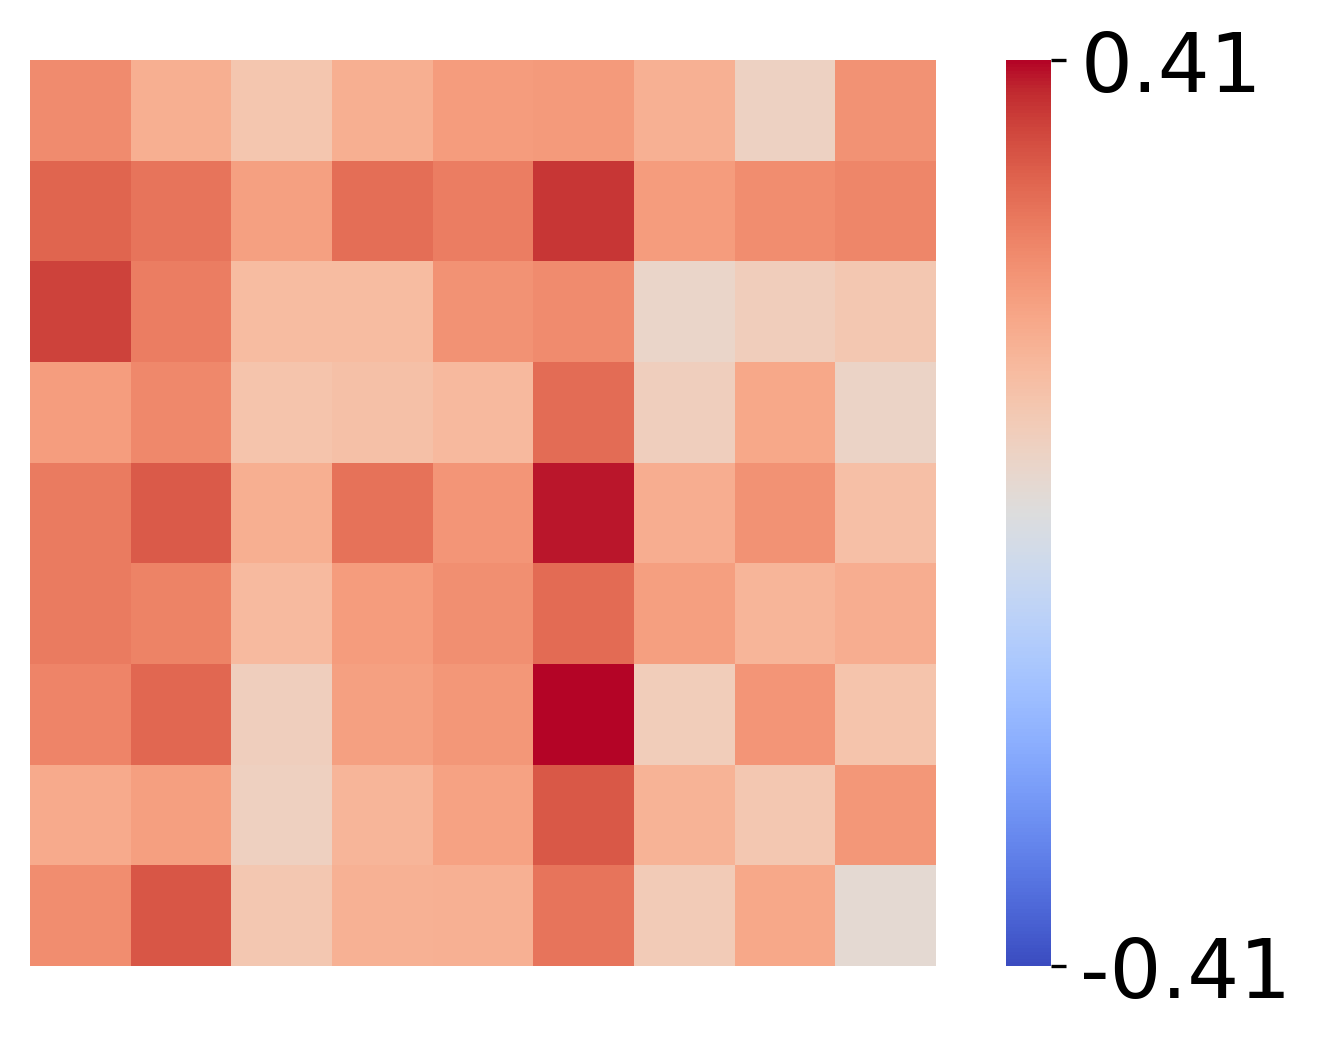

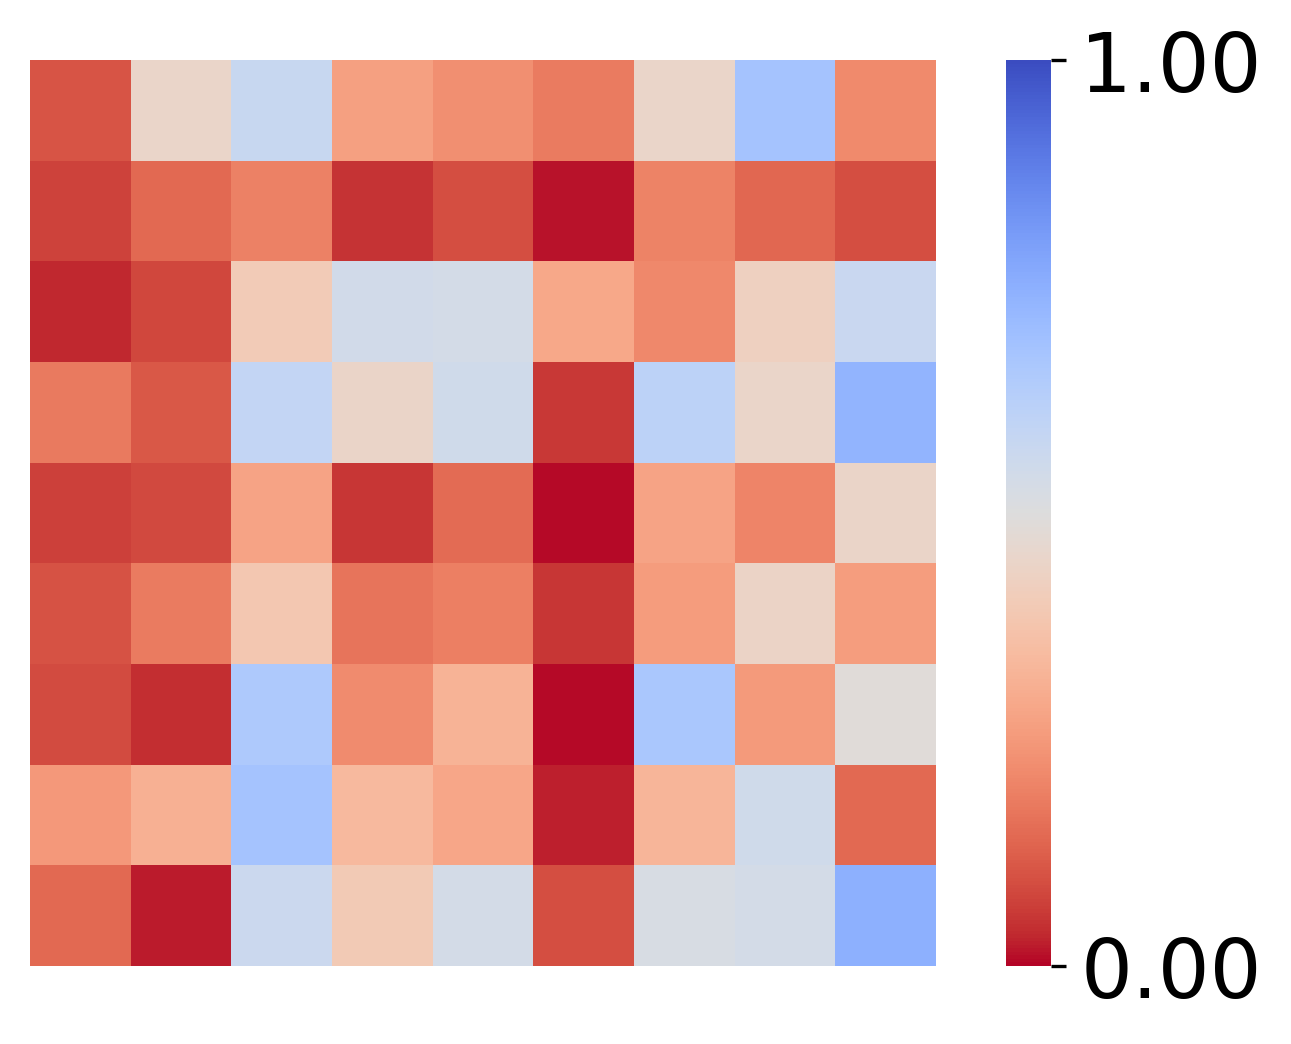

In [93]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(df['n_sleeps'], df['n_observes'], df['effs'], df['effs'], col1name = 'Sleeps', col2name='Observes', annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4, groups=df['group'])

In [94]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_observes_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_observes_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_observes_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_observes_humans.svg'))

### Trait-level Perturbations

In [95]:
from settings_anal import levc_human_ape_models as ape_models
from human_utils_behavioral_analysis import load_simulated_participants_across_models
from settings_anal import trait_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

sim_rewss, sim_obss, sim_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)
sim_rewss = sim_rewss.mean(axis=0)
sim_obss = sim_obss.mean(axis=0)
sim_sleepss = sim_sleepss.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss = np.flip(sim_rewss.T, axis=1)
sim_obss = np.flip(sim_obss.T, axis=1)
sim_sleepss = np.flip(sim_sleepss.T, axis=1)

(150, 9)


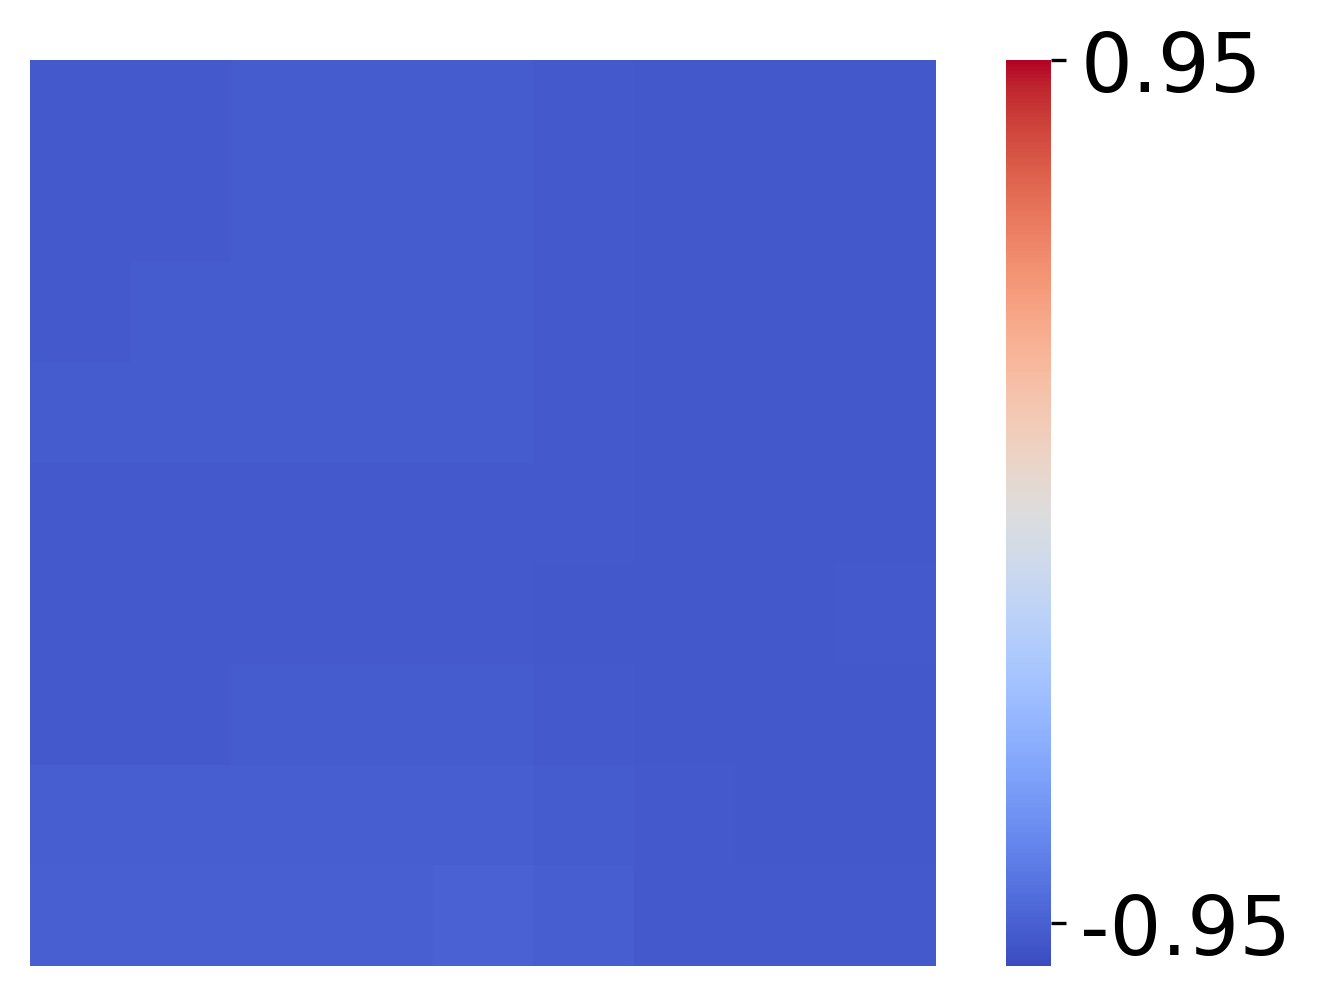

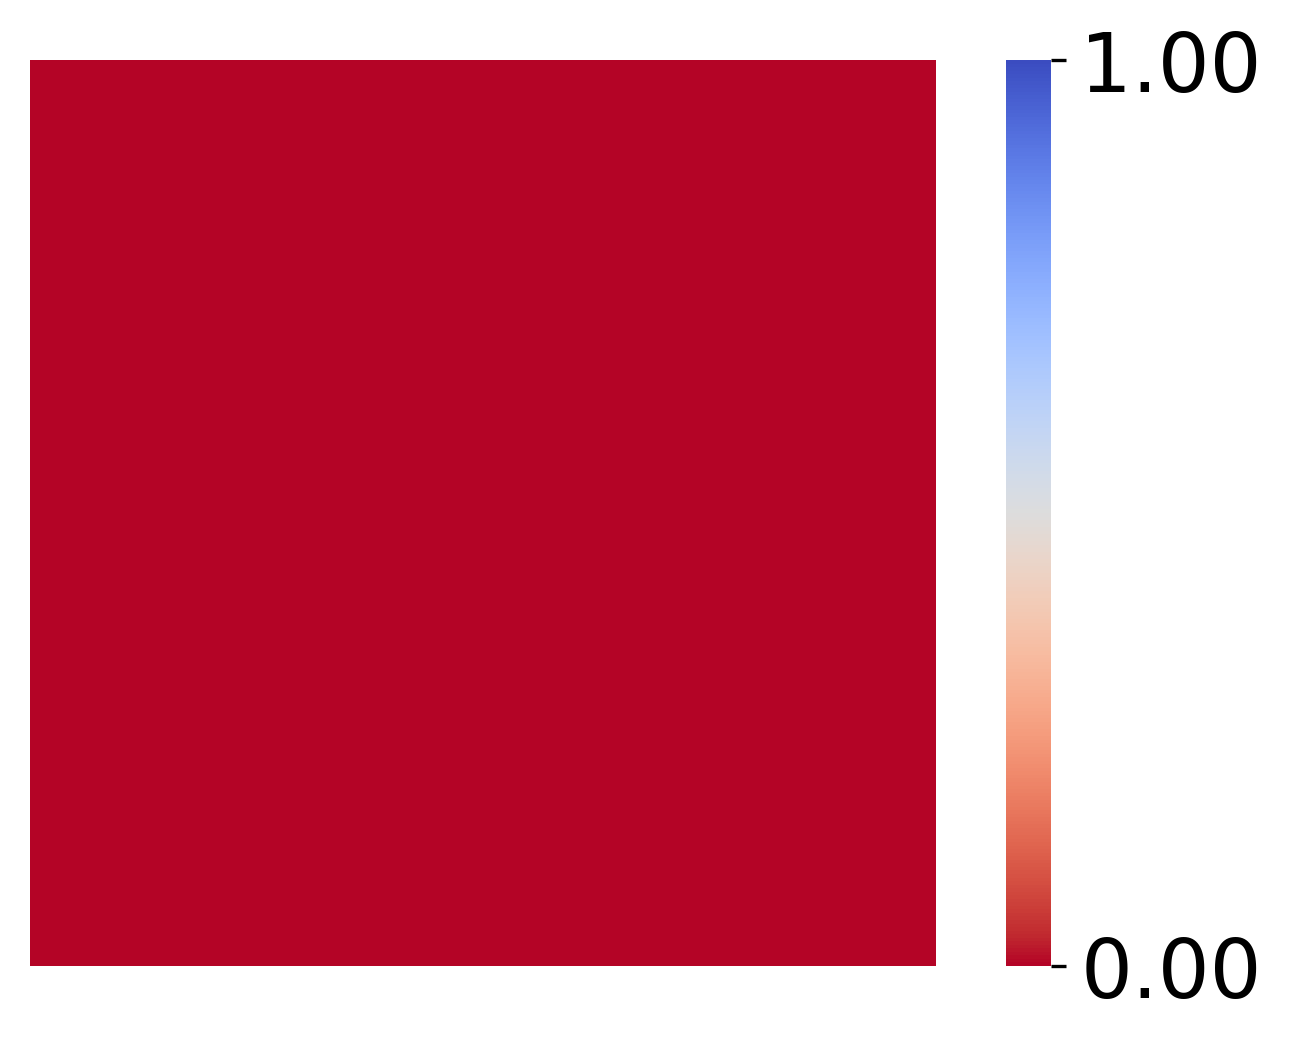

In [96]:
corr_fig, pvs_fig = compute_2D_correlation(sim_sleepss, sim_obss, effs, effs, "Sleeps", "Observes", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [97]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_observes_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_observes_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_observes_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_observes_trait.svg'))

### Random Perturbation

In [98]:
from settings_anal import levc_human_ape_models as ape_models
from human_utils_behavioral_analysis import load_simulated_participants_across_models
from settings_anal import random_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

random_rewss, random_obss, random_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

random_rewss = random_rewss.mean(axis=0)
random_obss = random_obss.mean(axis=0)
random_sleepss = random_sleepss.mean(axis=0)


## correcting for switching from tau to efficacy
random_rewss = np.flip(random_rewss.T, axis=1)
random_obss = np.flip(random_obss.T, axis=1)
random_sleepss = np.flip(random_sleepss.T, axis=1)

(150, 9)


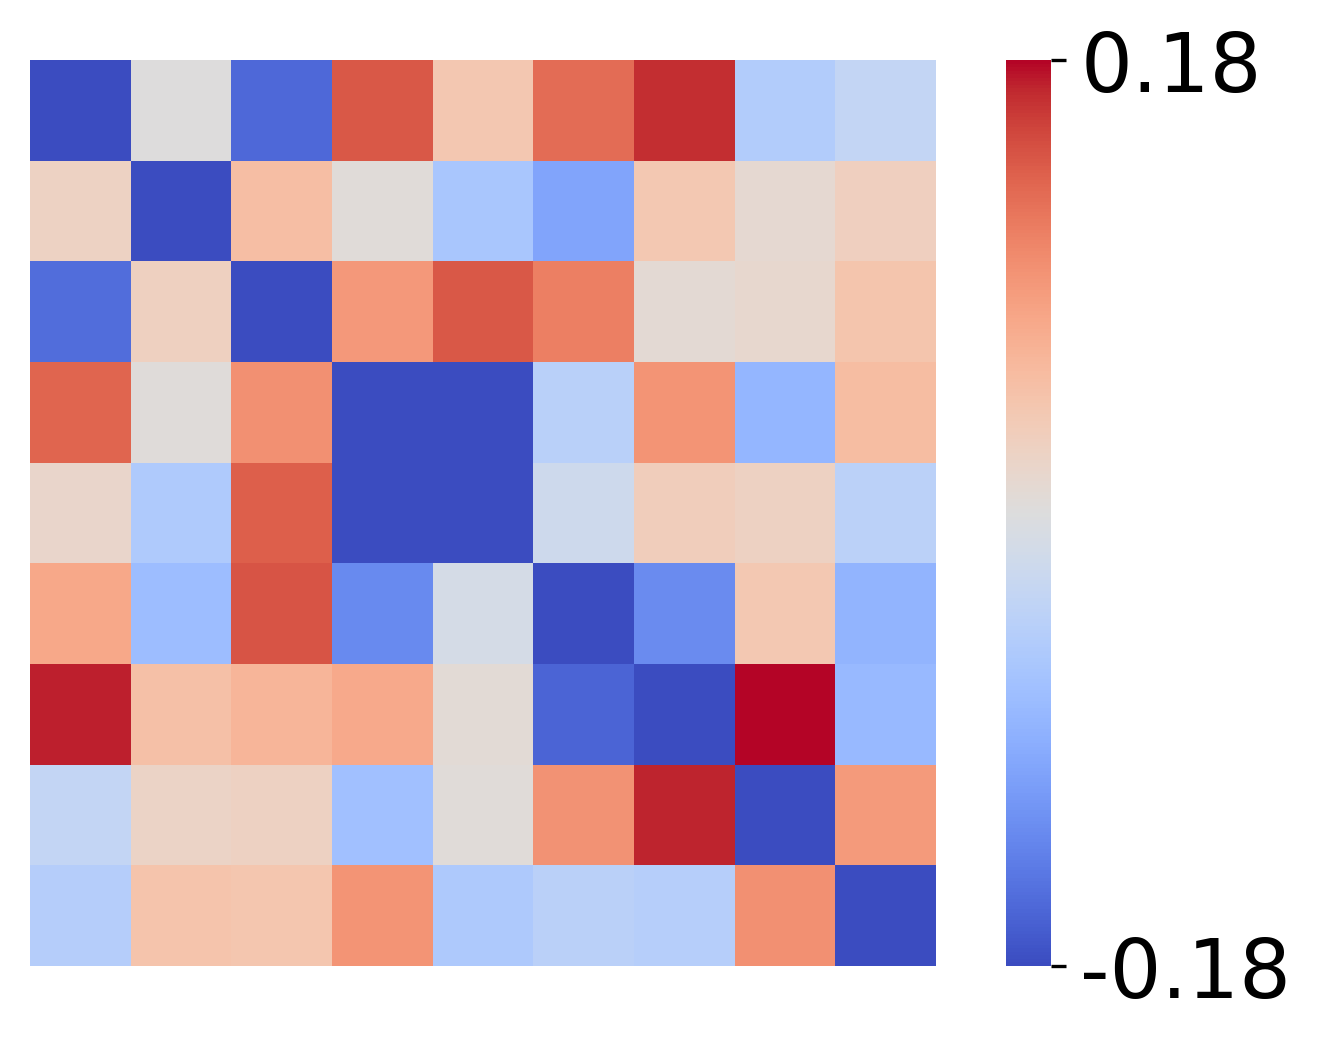

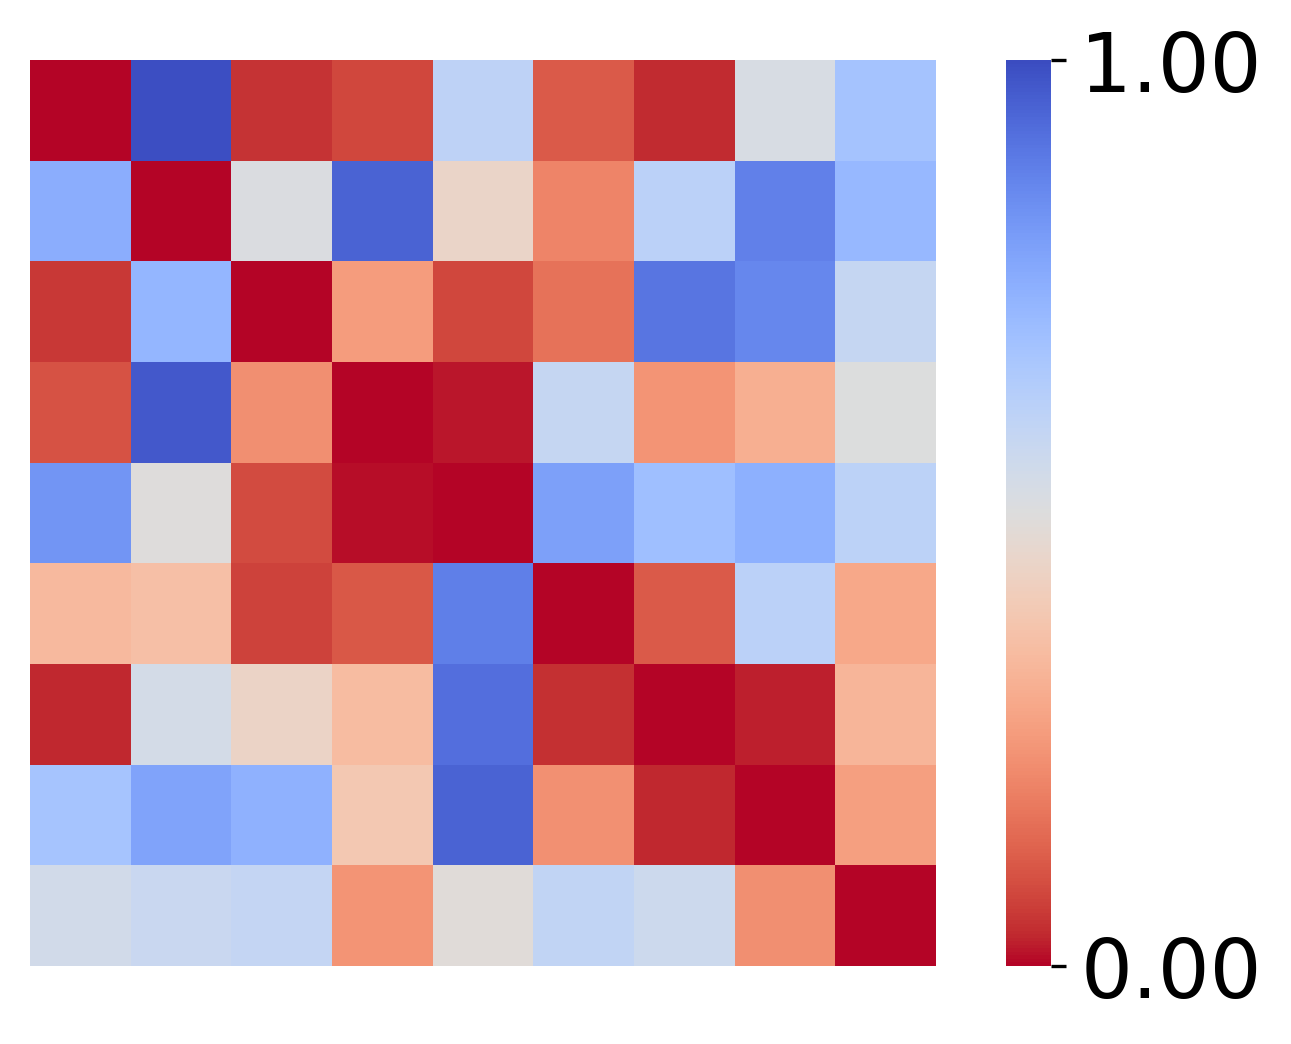

In [99]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(random_sleepss, random_obss, effs, effs, "Sleeps", "Sleeps", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [100]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_observes_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_observes_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_observes_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_observes_random.svg'))

### Zeros Perturbation

In [101]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import levc_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t2 as sim_timestamp

zeros_rewss, zeros_obss, zeros_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

zeros_rewss = zeros_rewss.mean(axis=0)
zeros_obss = zeros_obss.mean(axis=0)
zeros_sleepss = zeros_sleepss.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss = np.flip(zeros_rewss.T, axis=1)
zeros_obss = np.flip(zeros_obss.T, axis=1)
zeros_sleepss = np.flip(zeros_sleepss.T, axis=1)

effs = np.arange(0, 1.125, 0.125)

(150, 9)


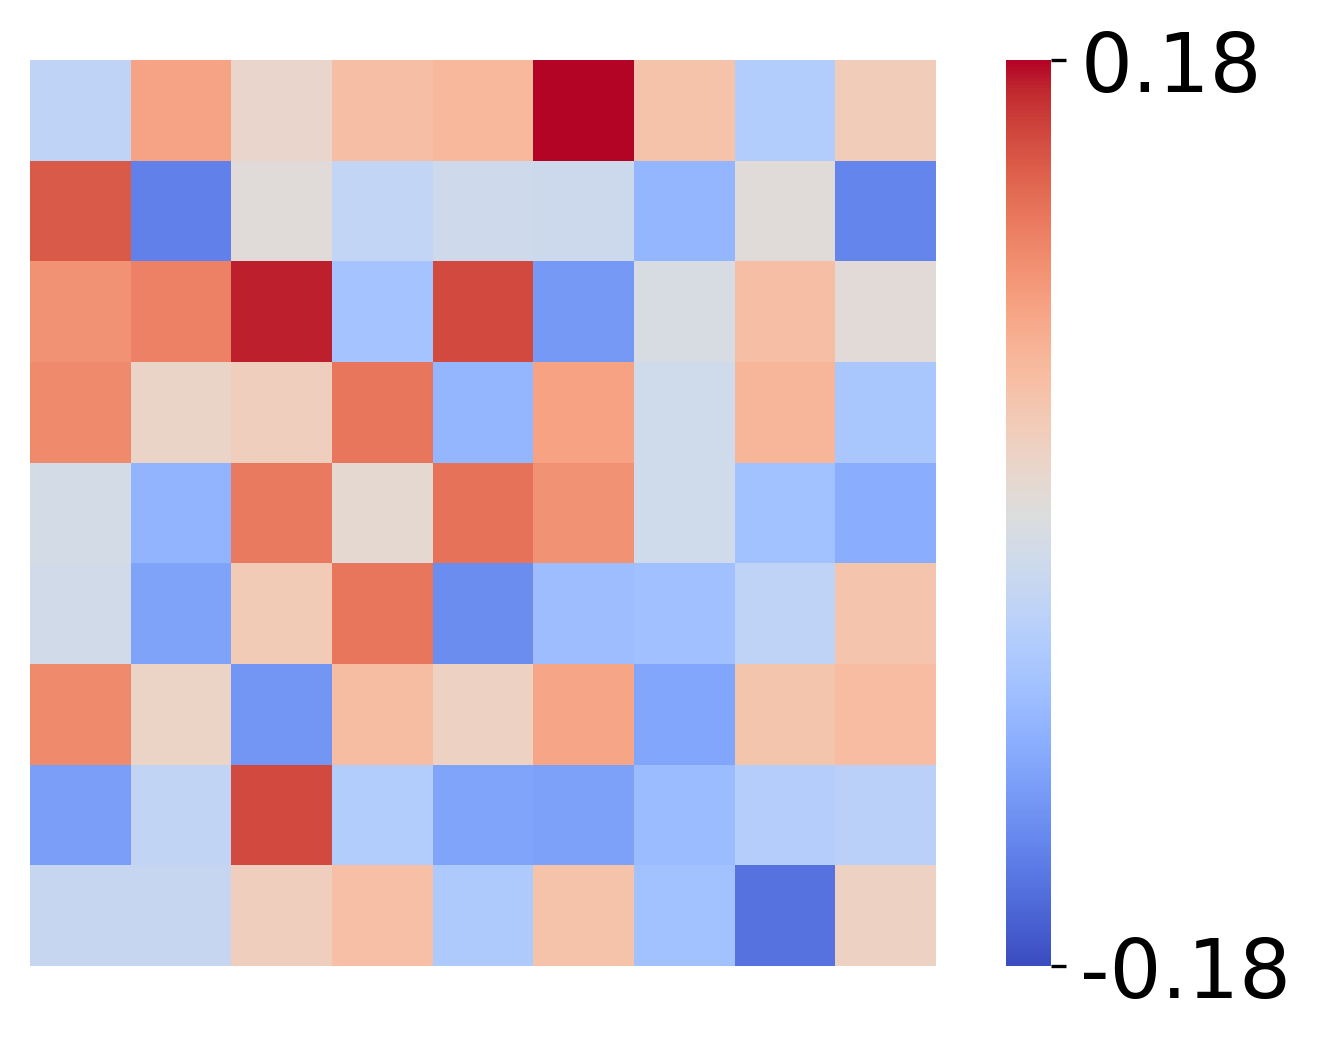

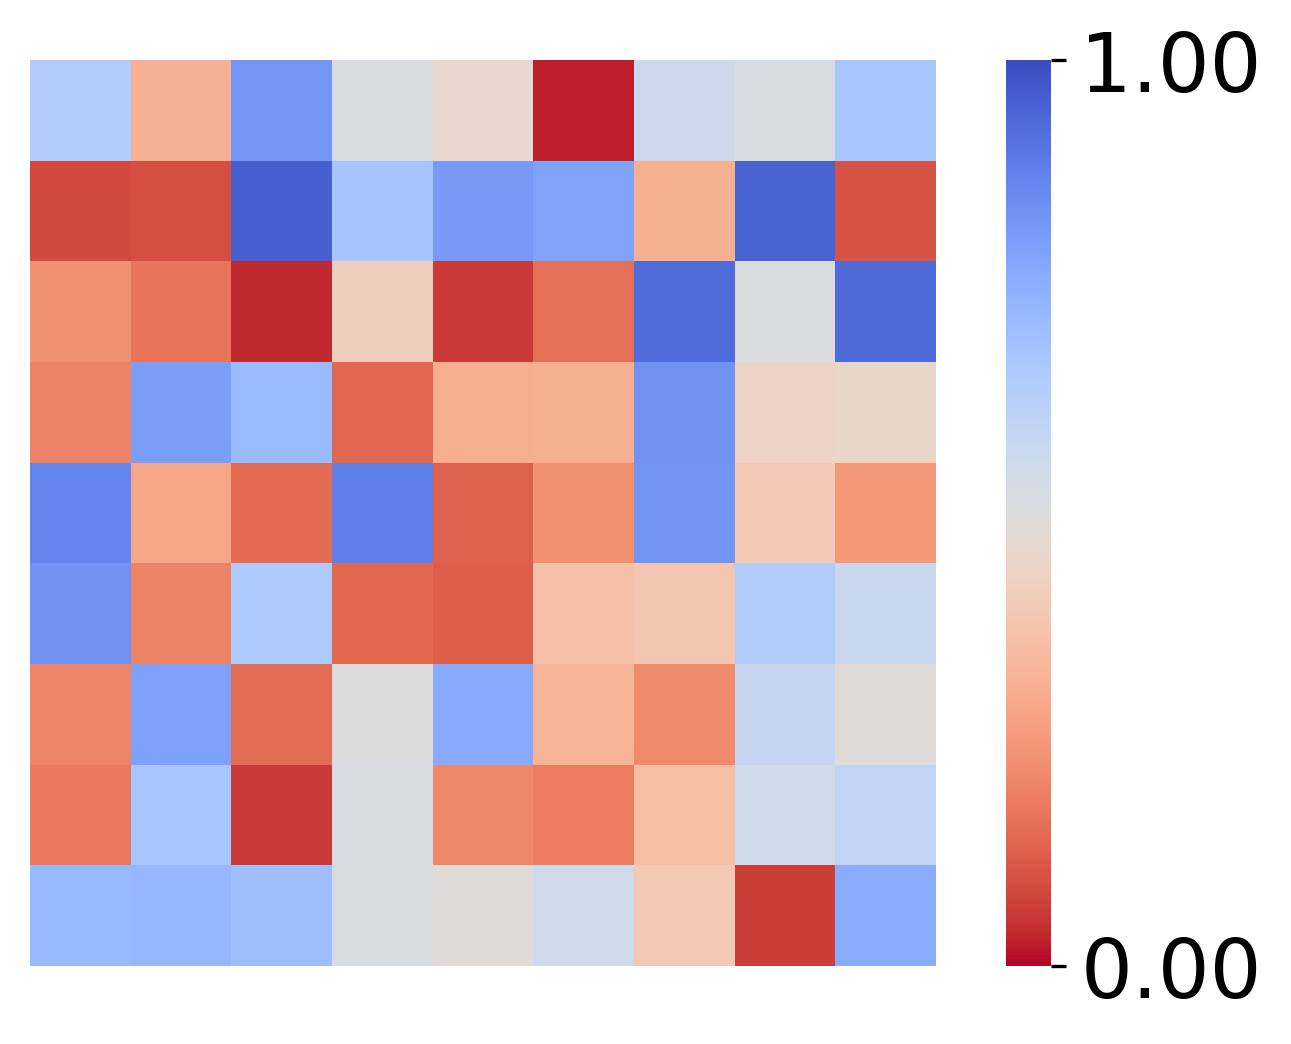

In [102]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(zeros_sleepss, zeros_obss, effs, effs, "Sleeps", "Sleeps", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [103]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_observes_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_observes_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_observes_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_observes_zeros.svg'))

## Panel D: Task 2 Number of Observations
### Humans

In [104]:
from human_utils_project import get_clean_data

day = 'day3'
exp_date = '24-01-22-29'

group = None

human_data_file_base = '/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis'

df, effs_train, effs_test, test_start = get_clean_data(day = int(day[-1]), exp_date = exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)

effs = np.arange(0, 1.01, 0.125)
n_steps = 50

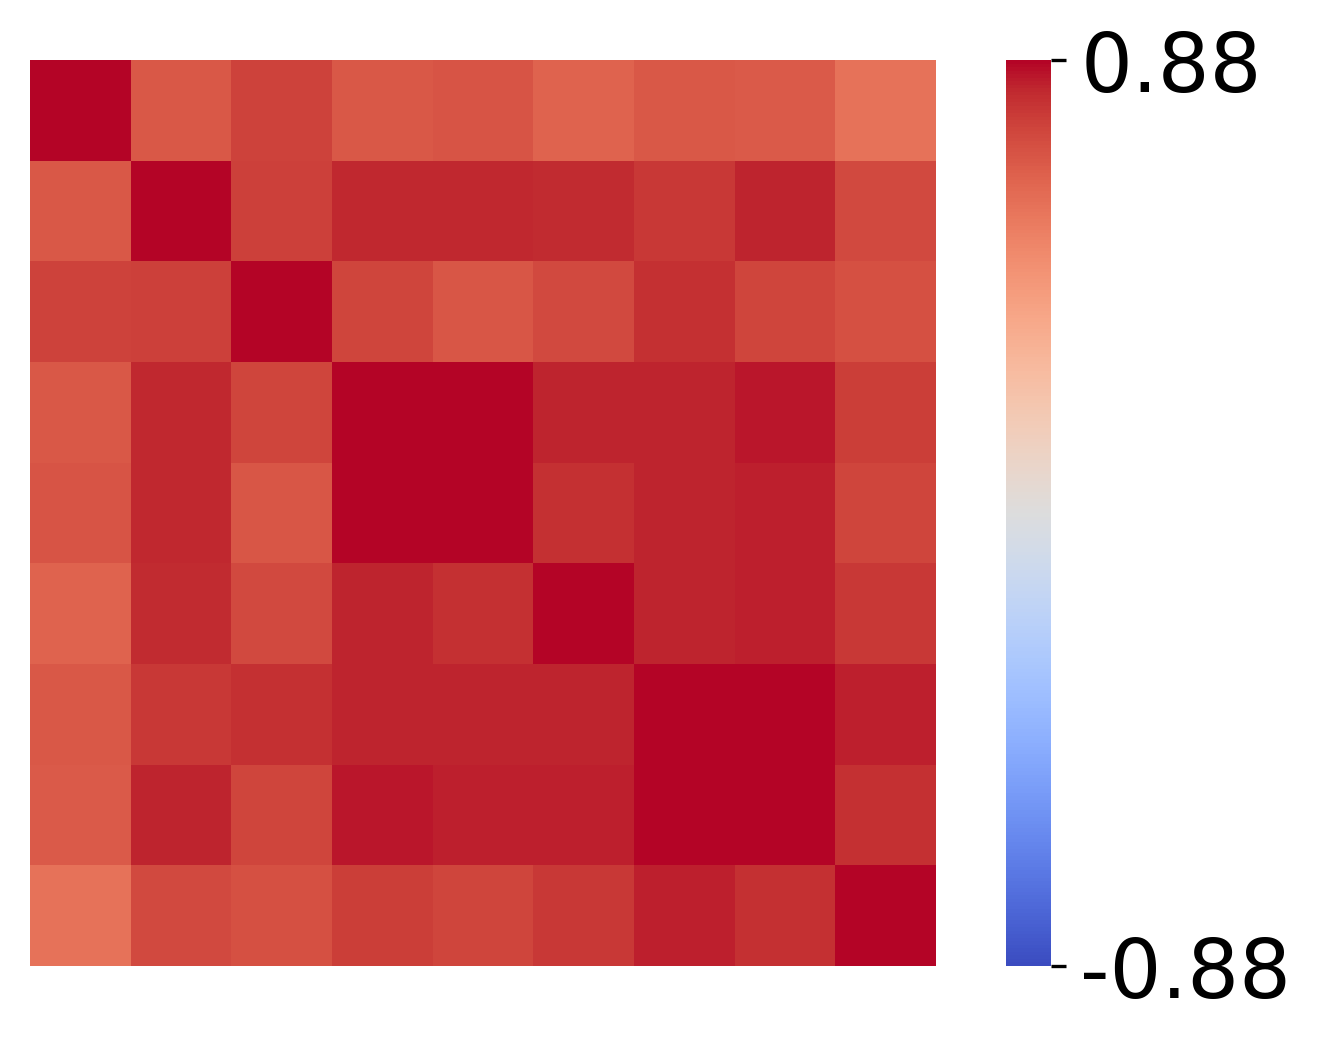

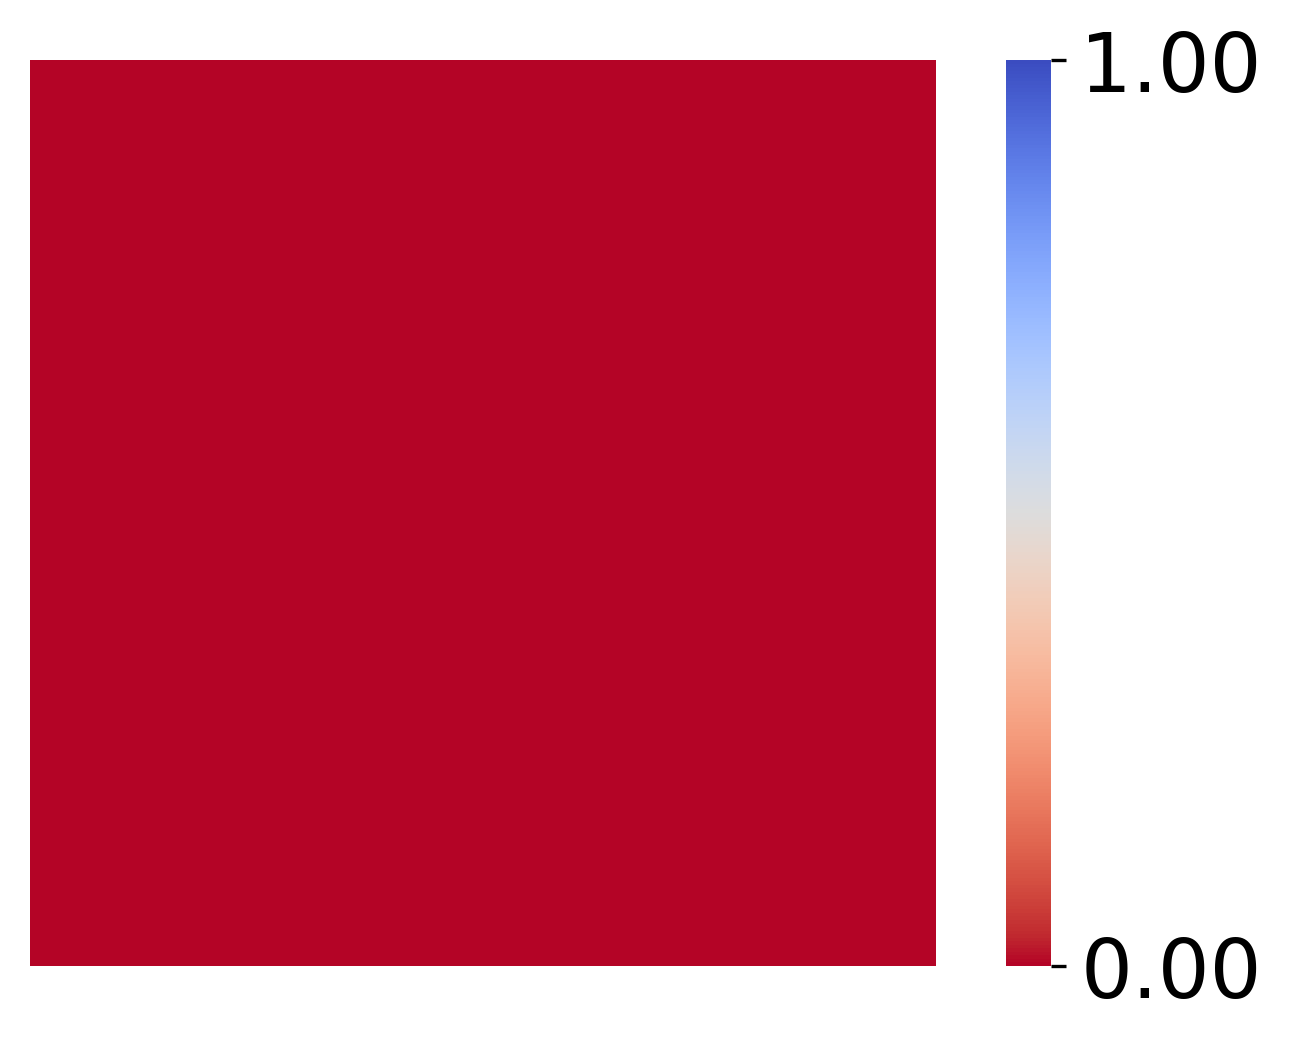

In [105]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(df['n_observes'], df['n_observes'], df['effs'], df['effs'], col1name = 'Observes', col2name='Observes', annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4, groups=df['group'])

In [106]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_observes_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_observes_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_observes_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_observes_humans.svg'))

### Trait-level Simulations

In [107]:
from settings_anal import levc_human_ape_models as ape_models
from human_utils_behavioral_analysis import load_simulated_participants_across_models
from settings_anal import trait_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

sim_rewss, sim_obss, sim_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)
sim_rewss = sim_rewss.mean(axis=0)
sim_obss = sim_obss.mean(axis=0)
sim_sleepss = sim_sleepss.mean(axis=0)


## correcting for switching from tau to efficacy
sim_rewss = np.flip(sim_rewss.T, axis=1)
sim_obss = np.flip(sim_obss.T, axis=1)
sim_sleepss = np.flip(sim_sleepss.T, axis=1)

(150, 9)


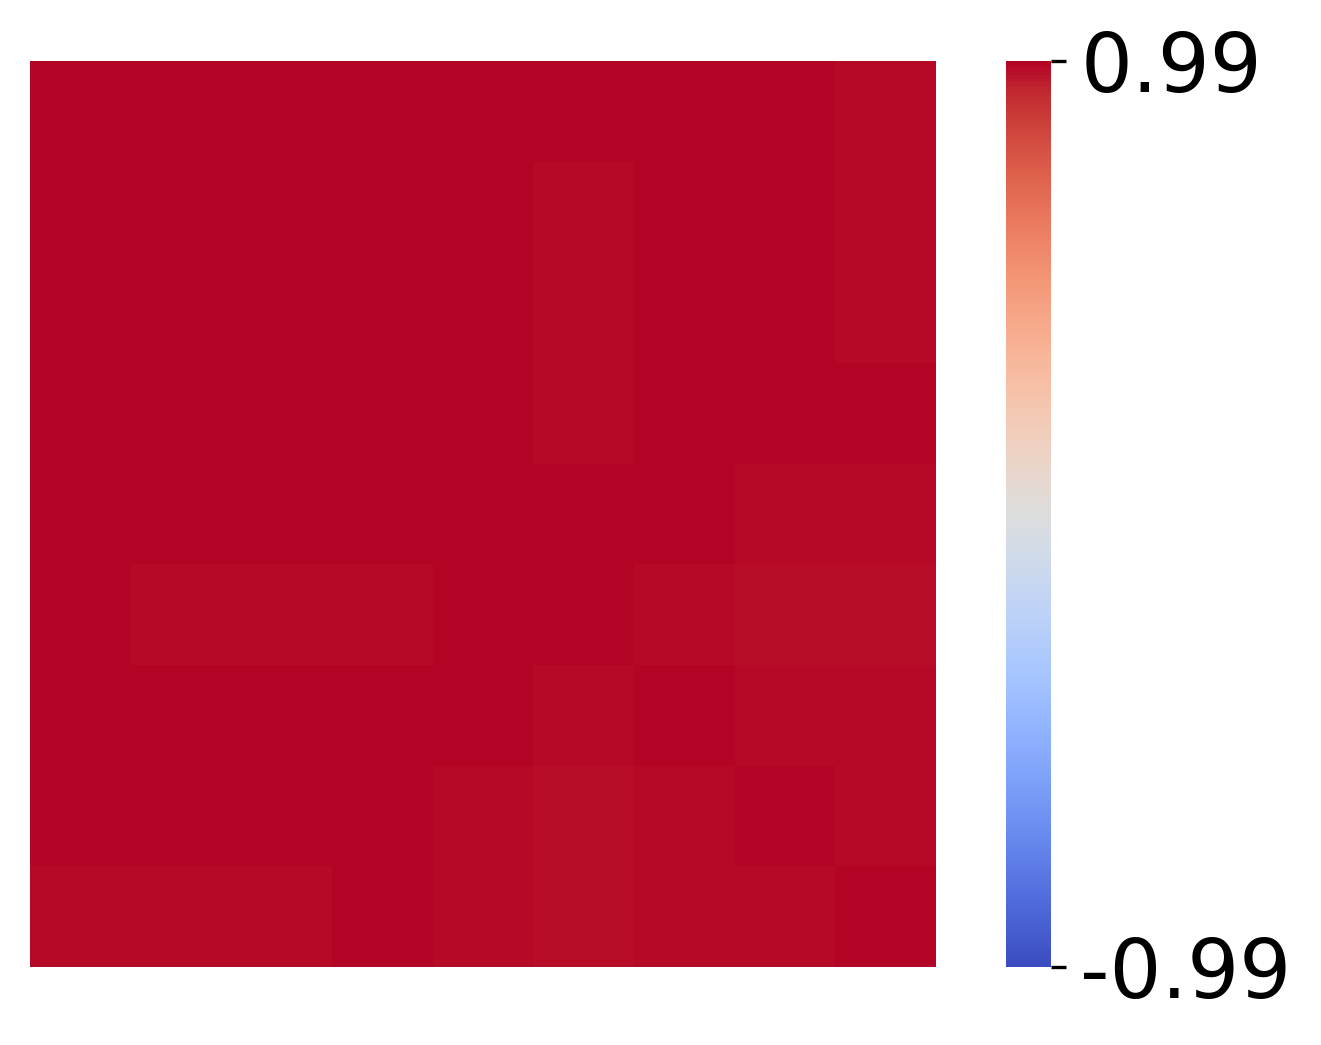

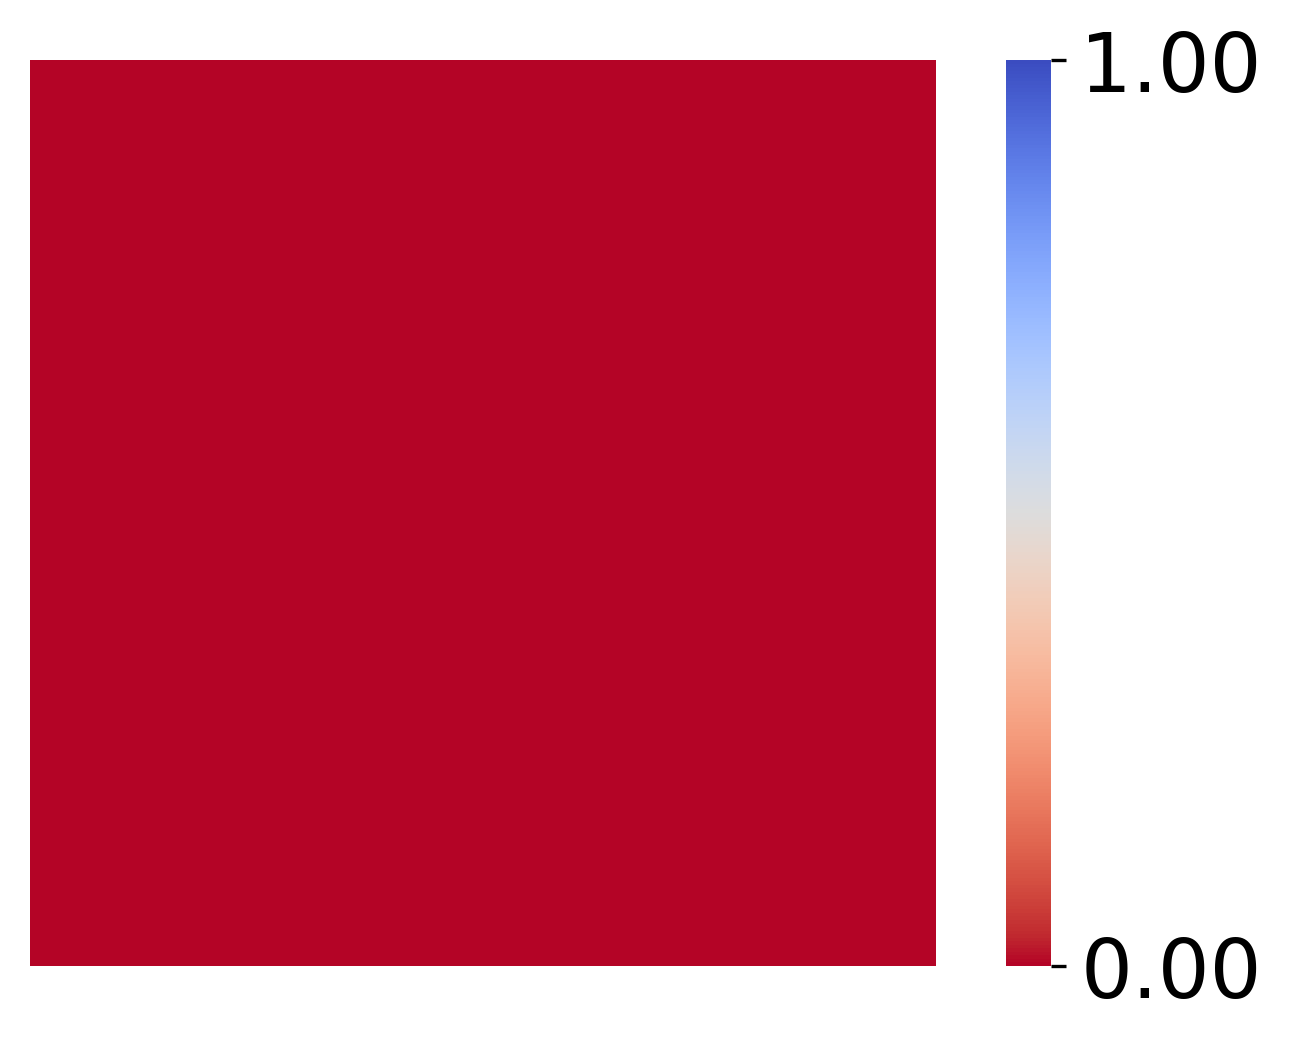

In [108]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(sim_obss, sim_obss, effs, effs, "Observations", "Observations", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [109]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_observes_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_observes_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_observes_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_observes_trait.svg'))

### Random Perturbations

In [110]:
from settings_anal import levc_human_ape_models as ape_models
from human_utils_behavioral_analysis import load_simulated_participants_across_models
from settings_anal import random_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

random_rewss, random_obss, random_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

random_rewss = random_rewss.mean(axis=0)
random_obss = random_obss.mean(axis=0)
random_sleepss = random_sleepss.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss = np.flip(random_rewss.T, axis=1)
random_obss = np.flip(random_obss.T, axis=1)
random_sleepss = np.flip(random_sleepss.T, axis=1)

(150, 9)


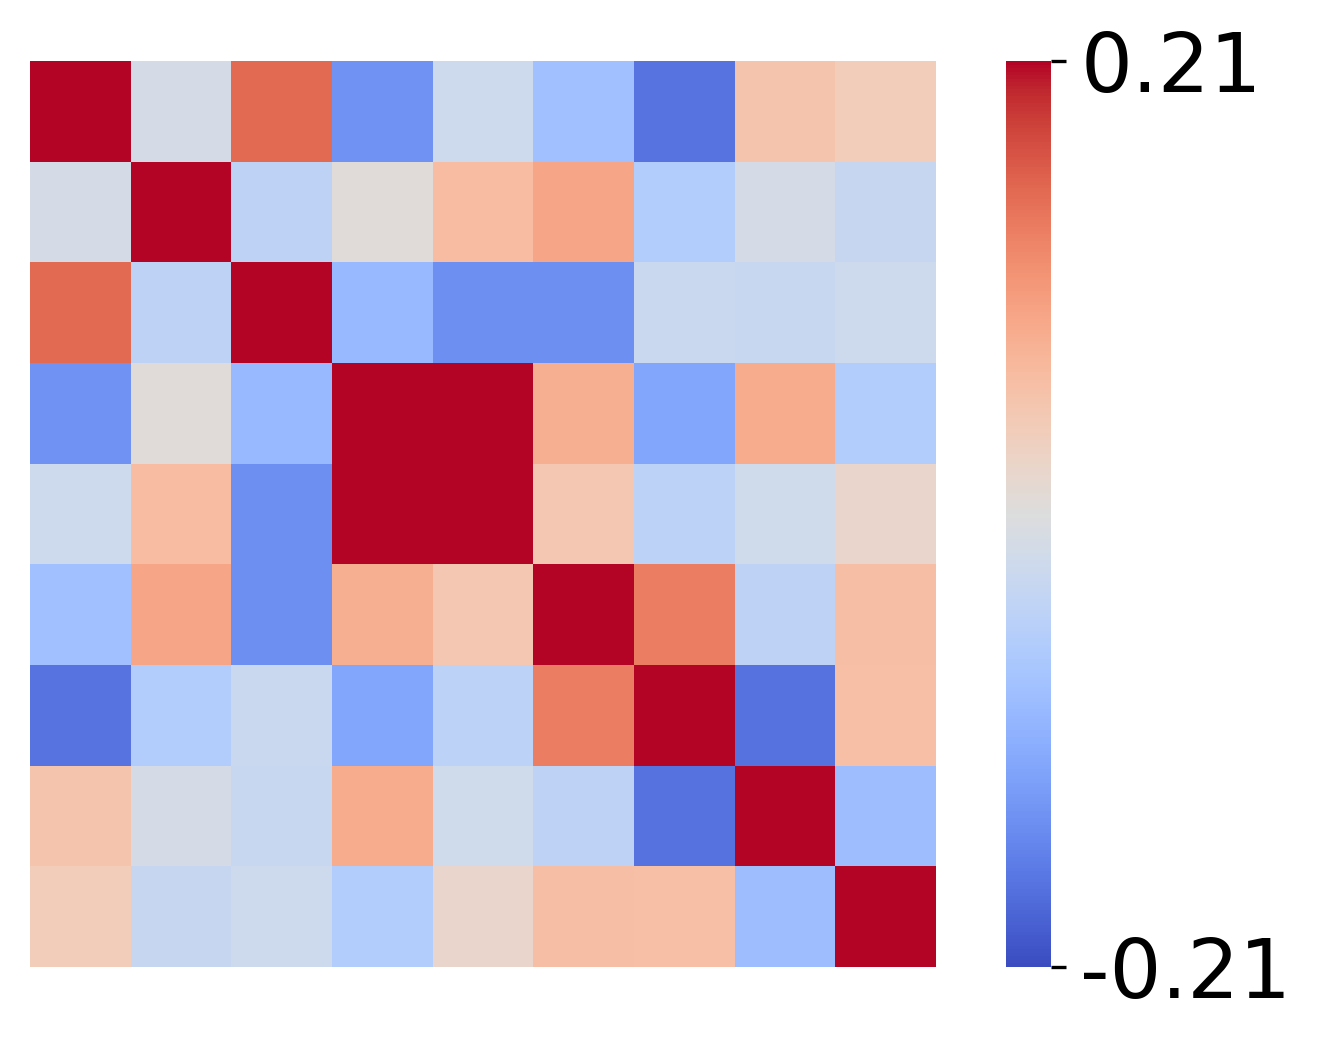

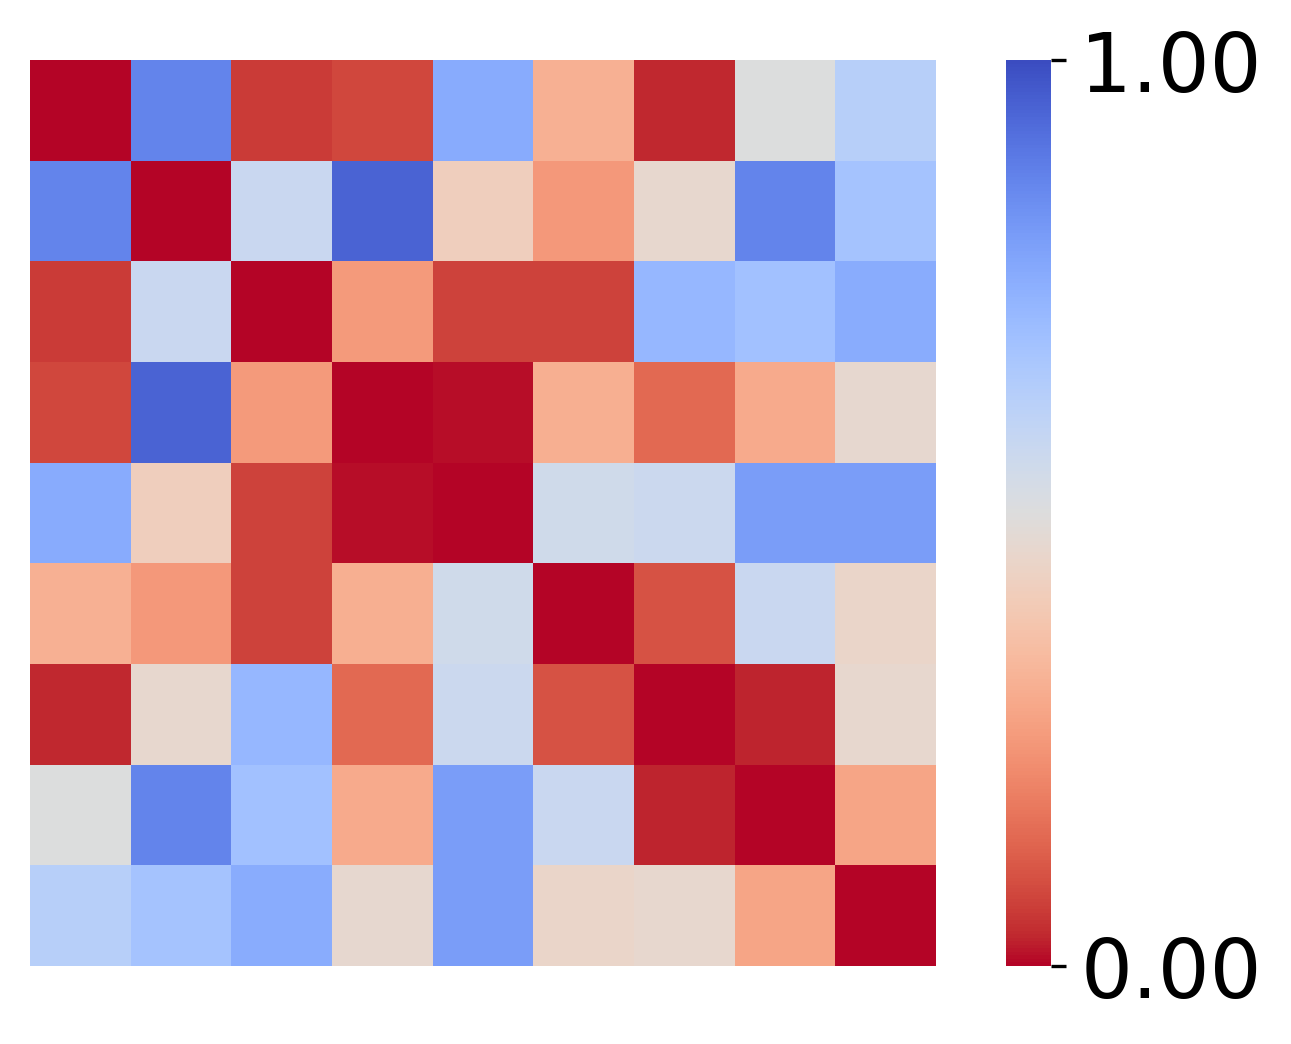

In [111]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(random_obss, random_obss, effs, effs, "Observations", "Observations", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [112]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_observes_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_observes_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_observes_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_observes_random.svg'))

### Zeros Perturbations

In [113]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import levc_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t2 as sim_timestamp

zeros_rewss, zeros_obss, zeros_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

zeros_rewss = zeros_rewss.mean(axis=0)
zeros_obss = zeros_obss.mean(axis=0)
zeros_sleepss = zeros_sleepss.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss = np.flip(zeros_rewss.T, axis=1)
zeros_obss = np.flip(zeros_obss.T, axis=1)
zeros_sleepss = np.flip(zeros_sleepss.T, axis=1)

effs = np.arange(0, 1.125, 0.125)

(150, 9)


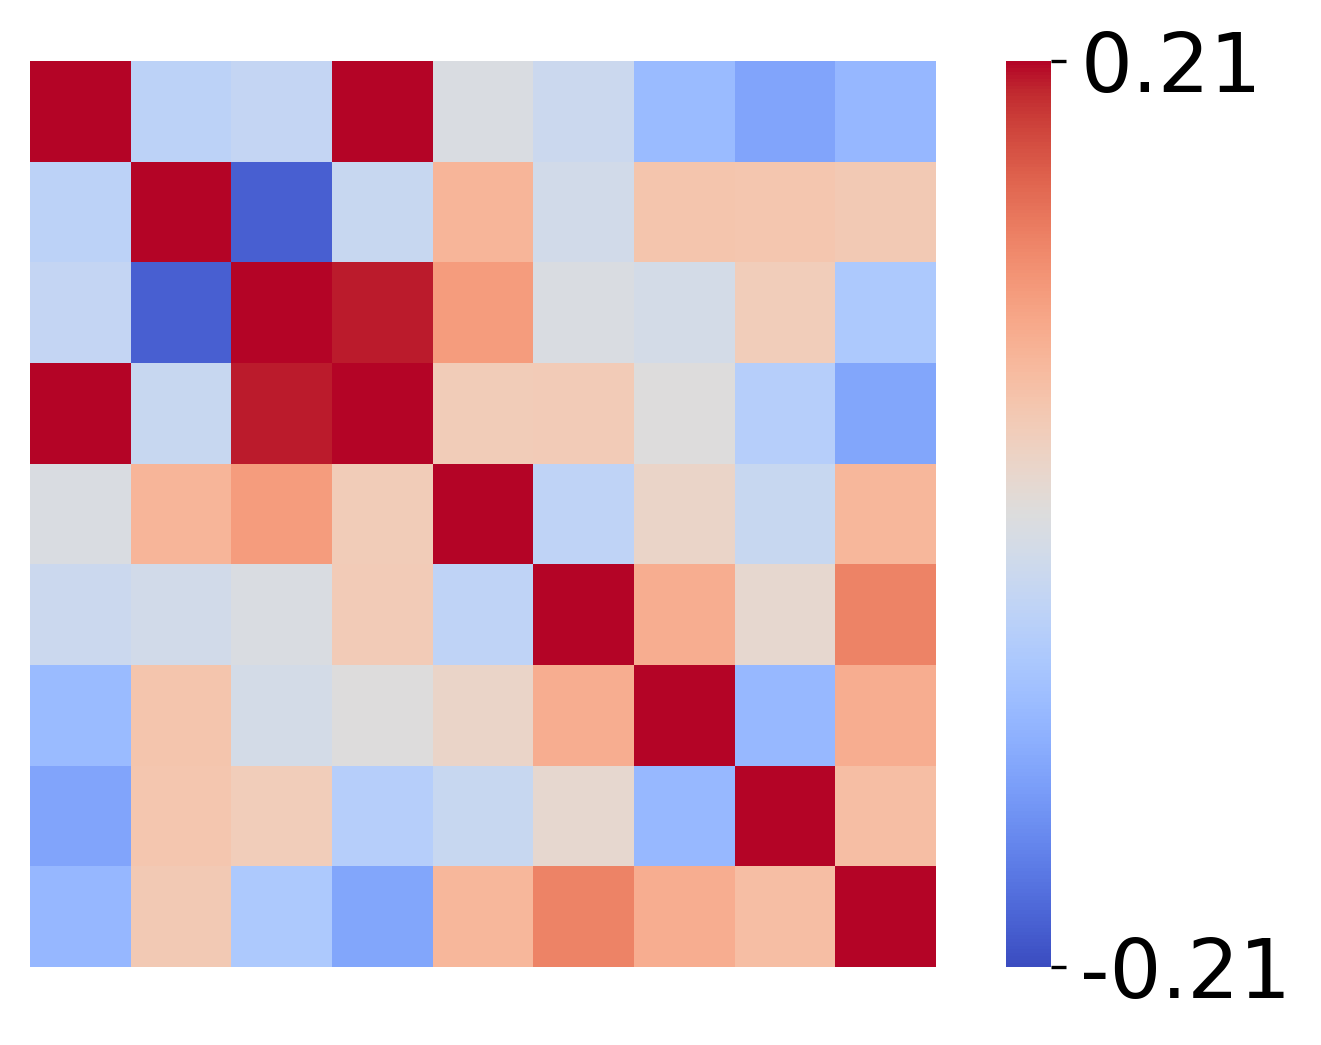

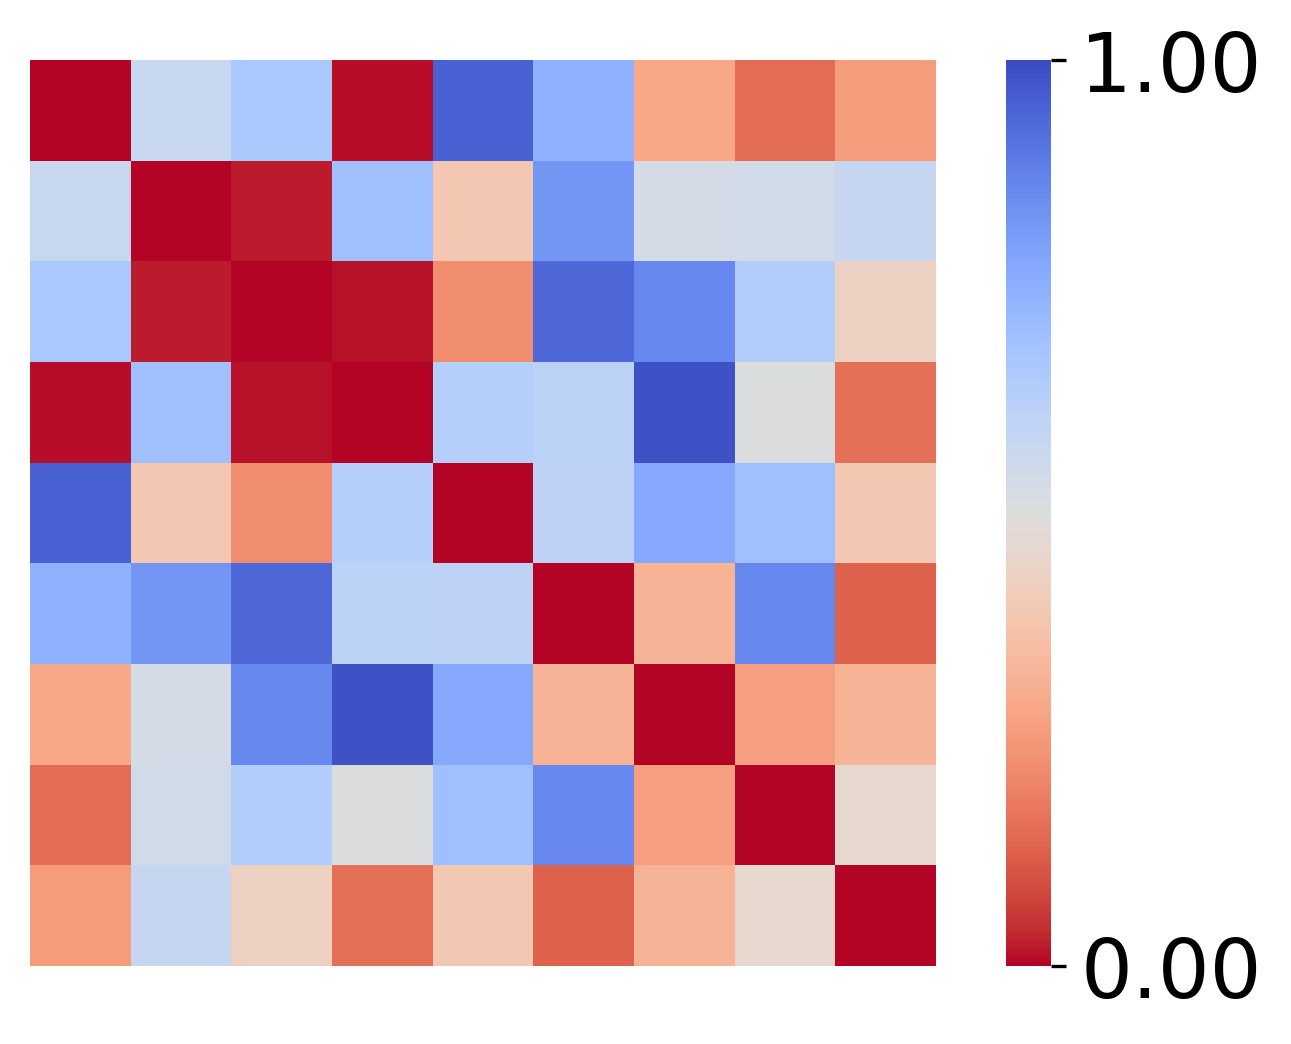

In [114]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(zeros_obss, zeros_obss, effs, effs, "Observations", "Observations", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [115]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_observes_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_observes_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_observes_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_observes_zeros.svg'))

### Stats

In [116]:
from human_utils_behavioral_analysis import compute_2D_correlation_matrices

data_obs_corr_g1, data_obs_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)
data_obs_corr_g2, data_obs_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group']]['n_observes'].values), np.stack(df[df['group']]['n_observes'].values), np.stack(df[df['group']]['effs'].values), np.stack(df[df['group']]['effs'].values),)

data_rews_corr_g1, data_rews_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)
data_rews_corr_g2, data_rews_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group']]['rewards_tallies'].values), np.stack(df[df['group']]['rewards_tallies'].values), np.stack(df[df['group']]['effs'].values), np.stack(df[df['group']]['effs'].values),)

data_sleeps_corr_g1, data_sleeps_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['n_sleeps'].values), np.stack(df[~df['group']]['n_sleeps'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)
data_sleeps_corr_g2, data_sleeps_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group']]['n_sleeps'].values), np.stack(df[df['group']]['n_sleeps'].values), np.stack(df[df['group']]['effs'].values), np.stack(df[df['group']]['effs'].values),)

data_obs_corr = (~df['group']).sum() / len(df) * data_obs_corr_g1 + (df['group']).sum() / len(df) * data_obs_corr_g2
data_obs_pvs = (~df['group']).sum() / len(df) * data_obs_pvs_g1 + (df['group']).sum() / len(df) * data_obs_pvs_g2

data_rews_corr = (~df['group']).sum() / len(df) * data_rews_corr_g1 + (df['group']).sum() / len(df) * data_rews_corr_g2
data_rews_pvs = (~df['group']).sum() / len(df) * data_rews_pvs_g1 + (df['group']).sum() / len(df) * data_rews_pvs_g2

data_sleeps_corr = (~df['group']).sum() / len(df) * data_sleeps_corr_g1 + (df['group']).sum() / len(df) * data_sleeps_corr_g2
data_sleeps_pvs = (~df['group']).sum() / len(df) * data_sleeps_pvs_g1 + (df['group']).sum() / len(df) * data_sleeps_pvs_g2


sim_obs_corr, sim_obs_pvs = compute_2D_correlation_matrices(sim_obss, sim_obss, effs, effs,)
sim_rews_corr, sim_rews_pvs = compute_2D_correlation_matrices(sim_rewss, sim_rewss, effs, effs,)
sim_sleeps_corr, sim_sleeps_pvs = compute_2D_correlation_matrices(sim_sleepss, sim_sleepss, effs, effs,)
random_obs_corr, random_obs_pvs = compute_2D_correlation_matrices(random_obss, random_obss, effs, effs,)
random_rews_corr, random_rews_pvs = compute_2D_correlation_matrices(random_rewss, random_rewss, effs, effs,)
random_sleeps_corr, random_sleeps_pvs = compute_2D_correlation_matrices(random_sleepss, random_sleepss, effs, effs,)

zeros_obs_corr, zeros_obs_pvs = compute_2D_correlation_matrices(zeros_obss, zeros_obss, effs, effs,)
zeros_rews_corr, zeros_rews_pvs = compute_2D_correlation_matrices(zeros_rewss, zeros_rewss, effs, effs,)
zeros_sleeps_corr, zeros_sleeps_pvs = compute_2D_correlation_matrices(zeros_sleepss, zeros_sleepss, effs, effs,)

(46, 9)
(65, 9)
(46, 9)
(65, 9)
(46, 9)
(65, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)


In [117]:
from human_utils_behavioral_analysis import competitive_corr_regression, upper_tri_masking

competitive_corr_regression(upper_tri_masking(data_obs_corr), [upper_tri_masking(sim_obs_corr), upper_tri_masking(random_obs_corr), upper_tri_masking(zeros_obs_corr)], do_fisher_transform=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.582
Date:                Thu, 20 Jun 2024   Prob (F-statistic):              0.213
Time:                        17:20:29   Log-Likelihood:                 15.409
No. Observations:                  36   AIC:                            -22.82
Df Residuals:                      32   BIC:                            -16.48
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5621      0.565      2.763      0.0

#### Cosine Similarity

In [118]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(upper_tri_masking(data_obs_corr).reshape((1,-1)), upper_tri_masking(sim_obs_corr).reshape((1,-1)))[0][0])
print(cosine_similarity(upper_tri_masking(data_obs_corr).reshape((1,-1)), upper_tri_masking(random_obs_corr).reshape((1,-1)))[0][0])

0.9960169137687079
-0.12234407813340319


## Panel E: Task 2 Rewards
### Humans

In [119]:
from human_utils_project import get_clean_data

day = 'day3'
exp_date = '24-01-22-29'

group = None

human_data_file_base = '/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis'

df, effs_train, effs_test, test_start = get_clean_data(day = int(day[-1]), exp_date = exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)

effs = np.arange(0, 1.01, 0.125)
n_steps = 50

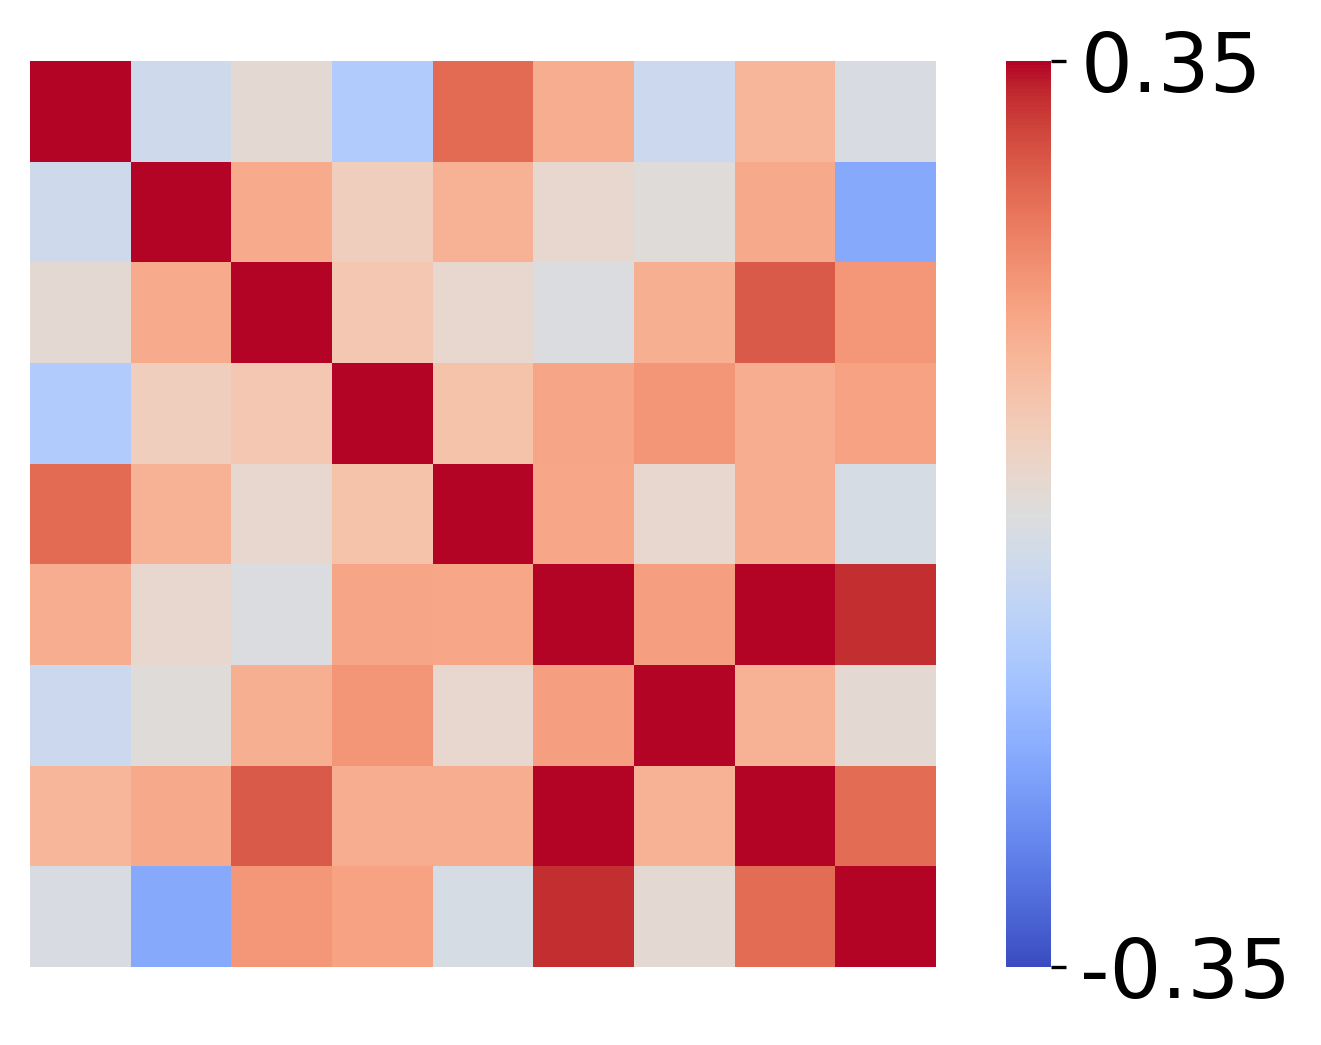

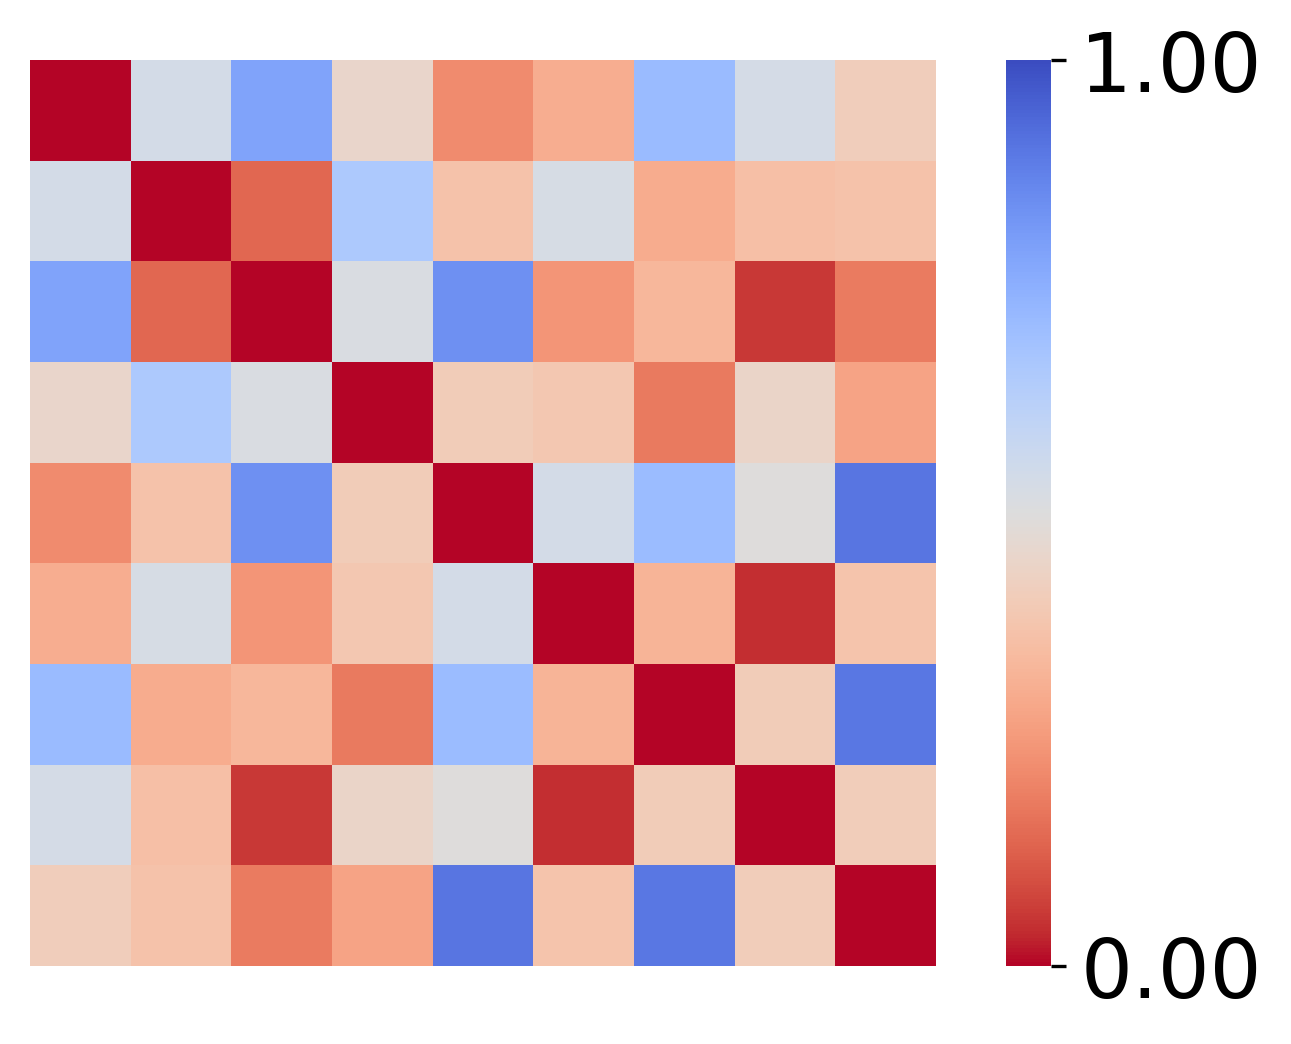

In [120]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(df['rewards_tallies'], df['rewards_tallies'], df['effs'], df['effs'], col1name = 'Rewards', col2name='Rewards', annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4, groups=df['group'])

In [121]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_rewards_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_rewards_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_rewards_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_rewards_humans.svg'))

### Trait-Level Perturbations

In [122]:
from settings_anal import levc_human_ape_models as ape_models
from human_utils_behavioral_analysis import load_simulated_participants_across_models
from settings_anal import trait_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

sim_rewss, sim_obss, sim_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)
sim_rewss = sim_rewss.mean(axis=0)
sim_obss = sim_obss.mean(axis=0)
sim_sleepss = sim_sleepss.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss = np.flip(sim_rewss.T, axis=1)
sim_obss = np.flip(sim_obss.T, axis=1)
sim_sleepss = np.flip(sim_sleepss.T, axis=1)

(150, 9)


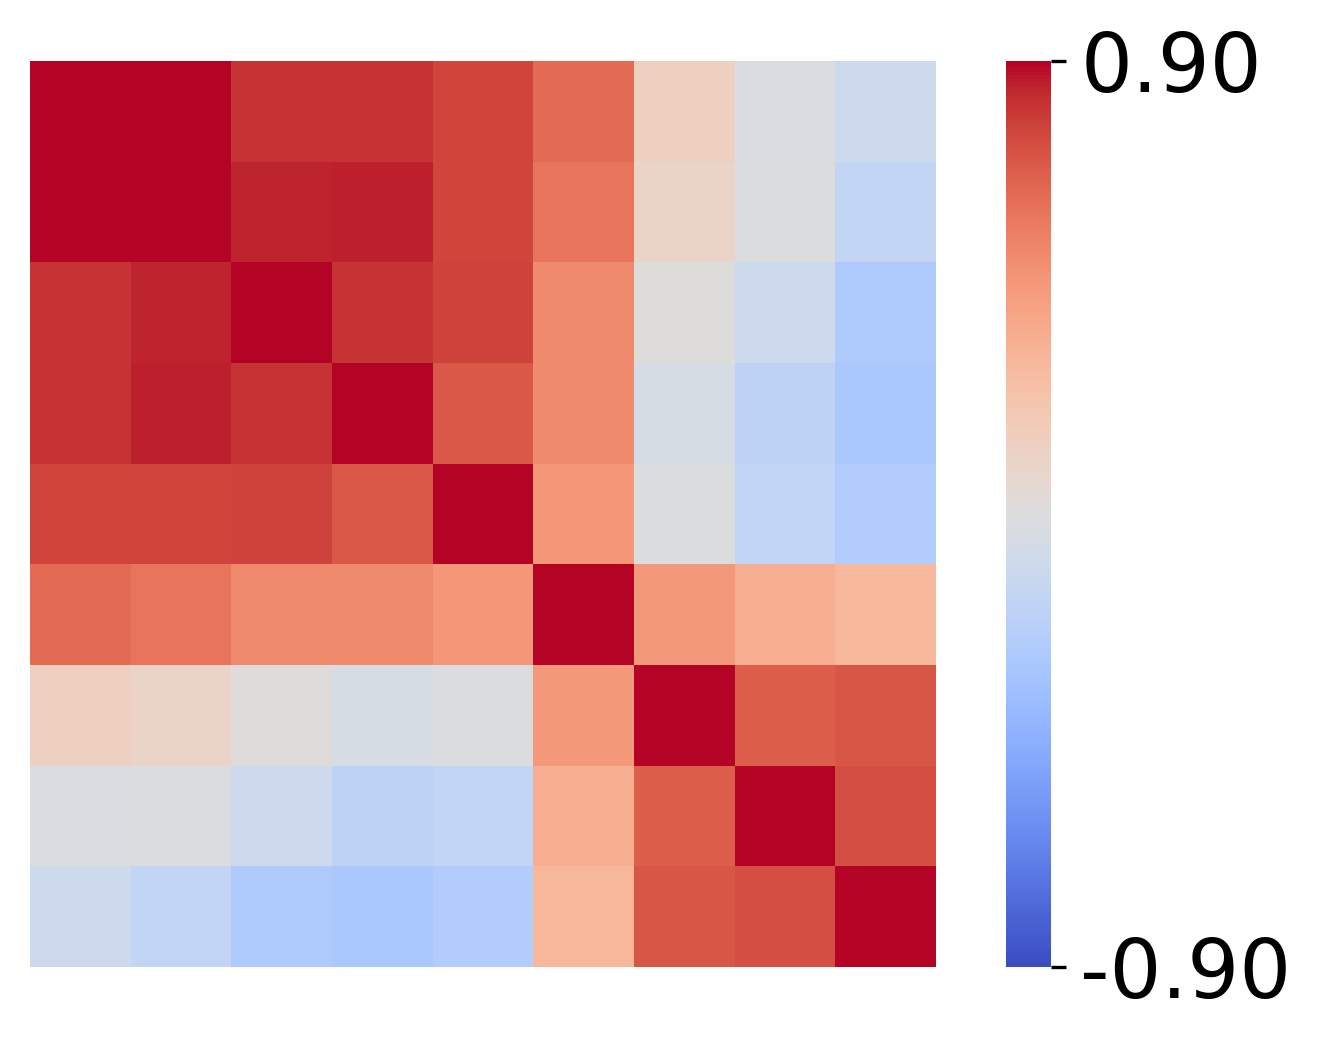

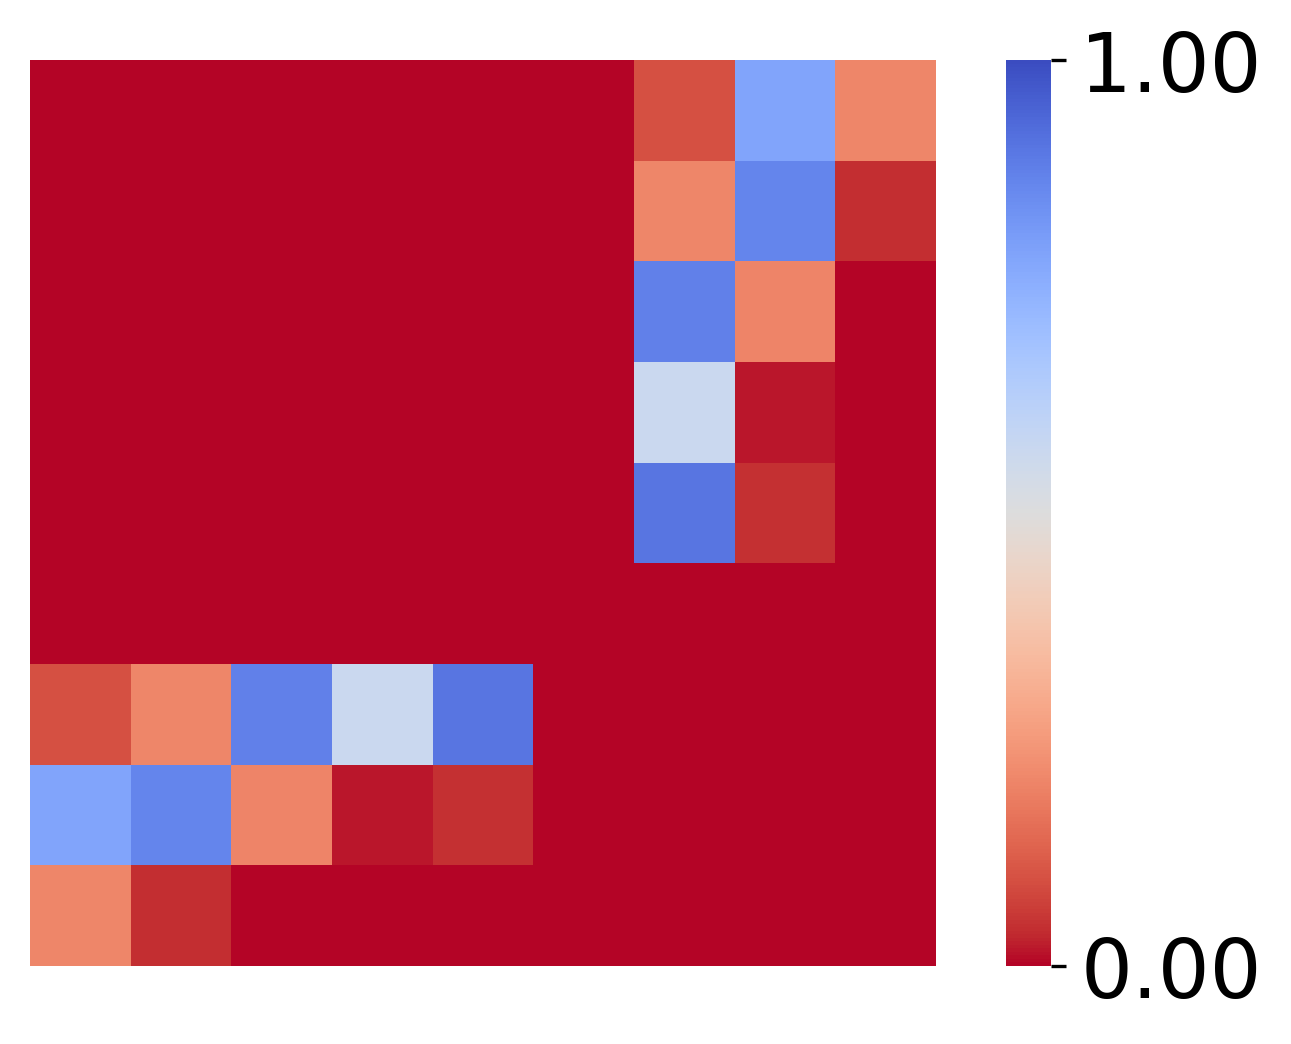

In [123]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(sim_rewss, sim_rewss, effs, effs, "Rewards", "Rewards", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [124]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_rewards_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_rewards_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_rewards_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_rewards_trait.svg'))

### Random Perturbations

In [125]:
from settings_anal import levc_human_ape_models as ape_models
from human_utils_behavioral_analysis import load_simulated_participants_across_models
from settings_anal import random_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

random_rewss, random_obss, random_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

random_rewss = random_rewss.mean(axis=0)
random_obss = random_obss.mean(axis=0)
random_sleepss = random_sleepss.mean(axis=0)


## correcting for switching from tau to efficacy
random_rewss = np.flip(random_rewss.T, axis=1)
random_obss = np.flip(random_obss.T, axis=1)
random_sleepss = np.flip(random_sleepss.T, axis=1)

(150, 9)


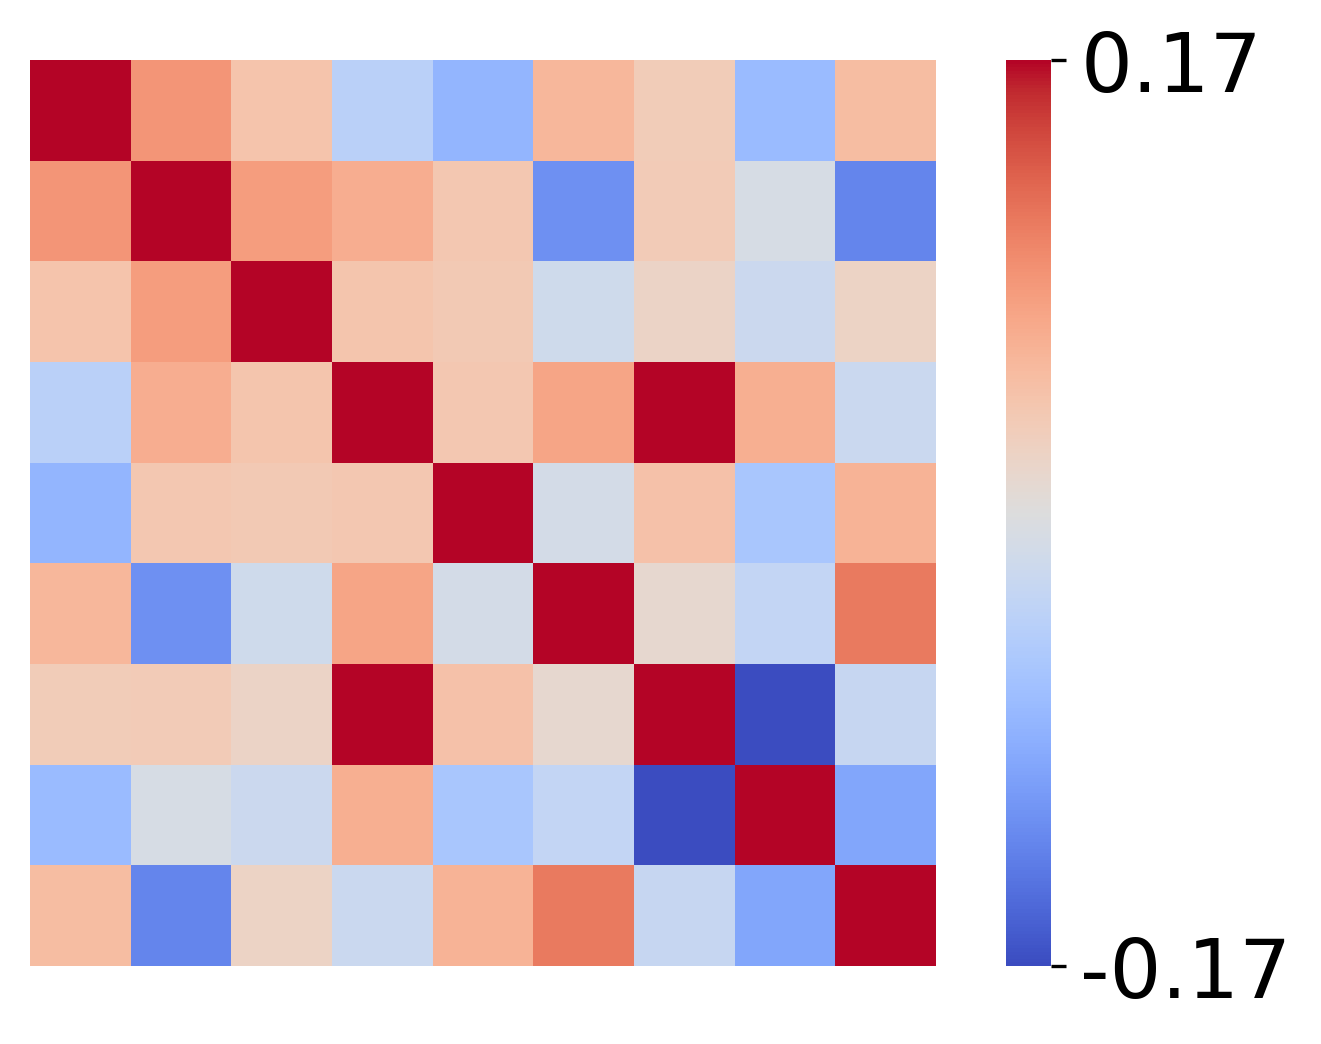

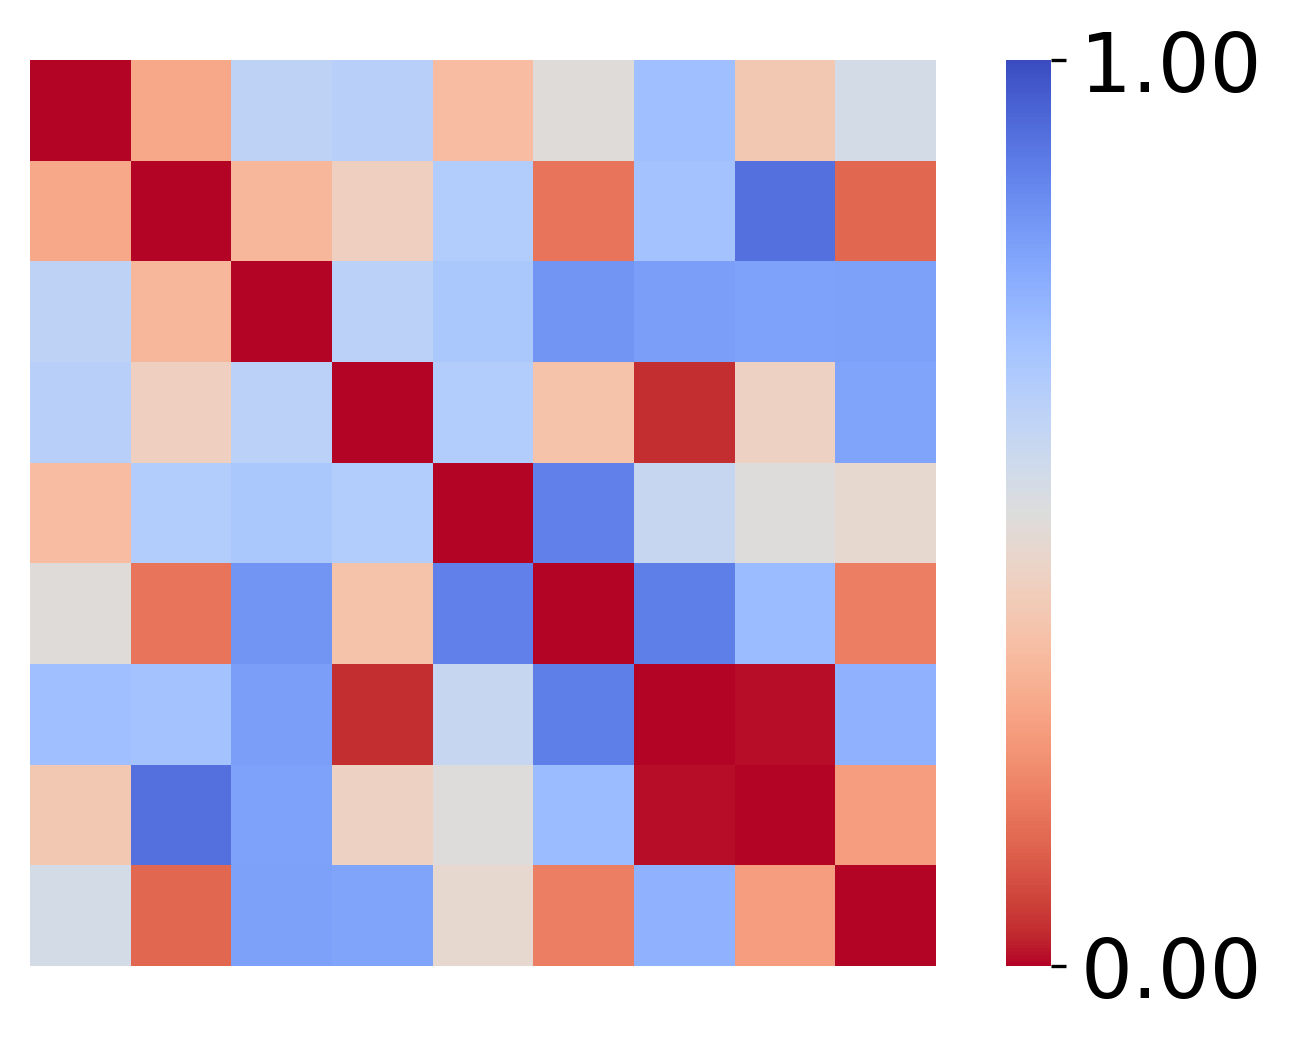

In [126]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(random_rewss, random_rewss, effs, effs, "Rewards", "Rewards", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)


In [127]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_rewards_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_rewards_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_rewards_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_rewards_random.svg'))

### Zeros Perturbations

In [128]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import levc_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t2 as sim_timestamp

zeros_rewss, zeros_obss, zeros_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

zeros_rewss = zeros_rewss.mean(axis=0)
zeros_obss = zeros_obss.mean(axis=0)
zeros_sleepss = zeros_sleepss.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss = np.flip(zeros_rewss.T, axis=1)
zeros_obss = np.flip(zeros_obss.T, axis=1)
zeros_sleepss = np.flip(zeros_sleepss.T, axis=1)

effs = np.arange(0, 1.125, 0.125)

(150, 9)


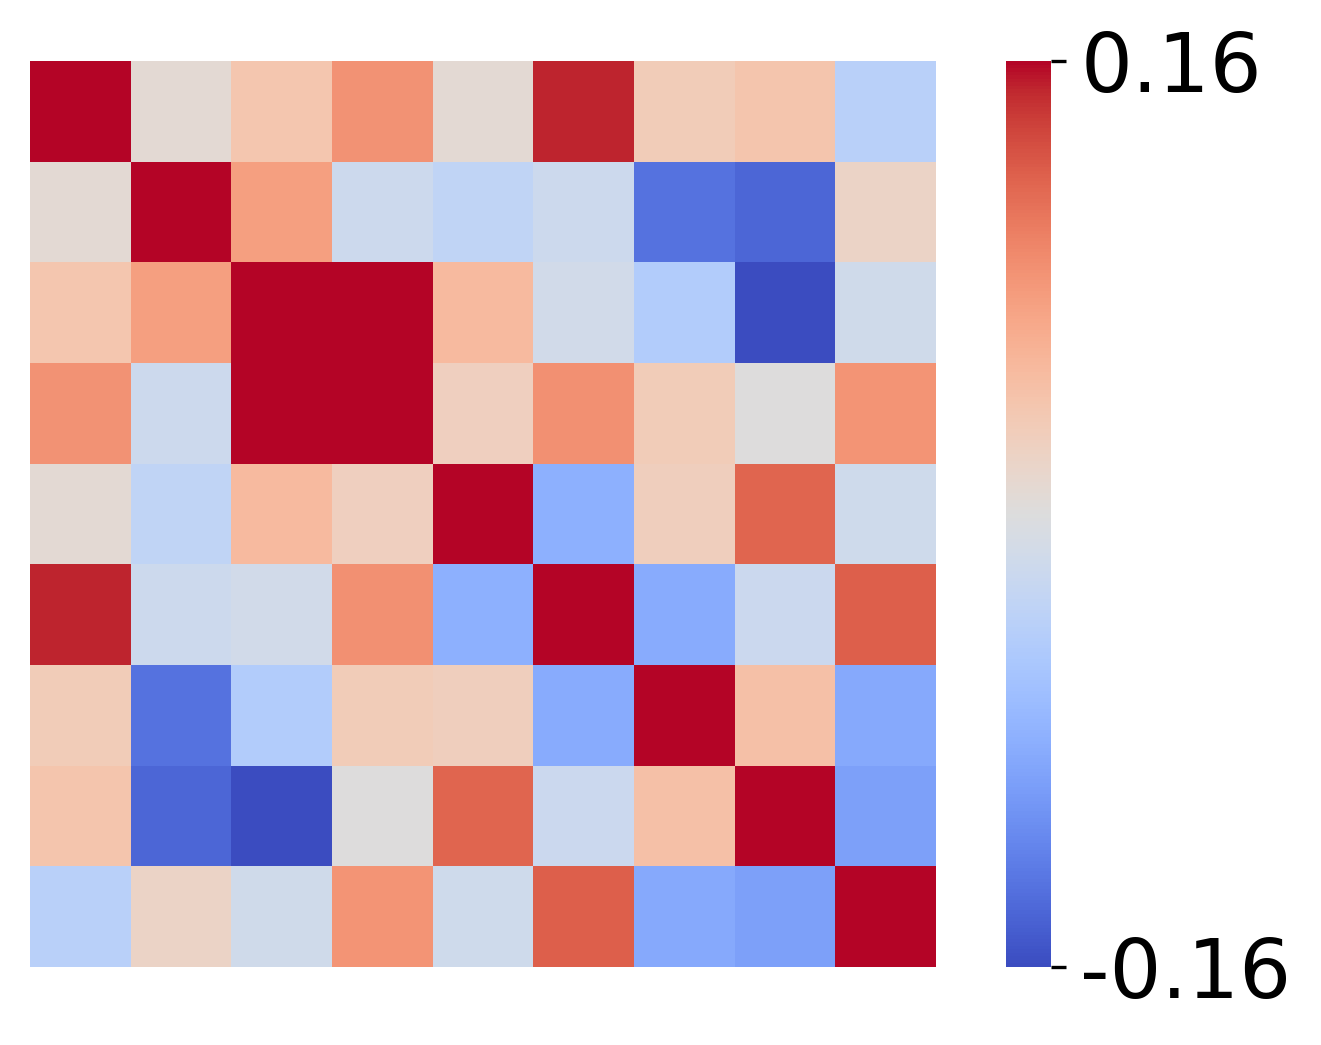

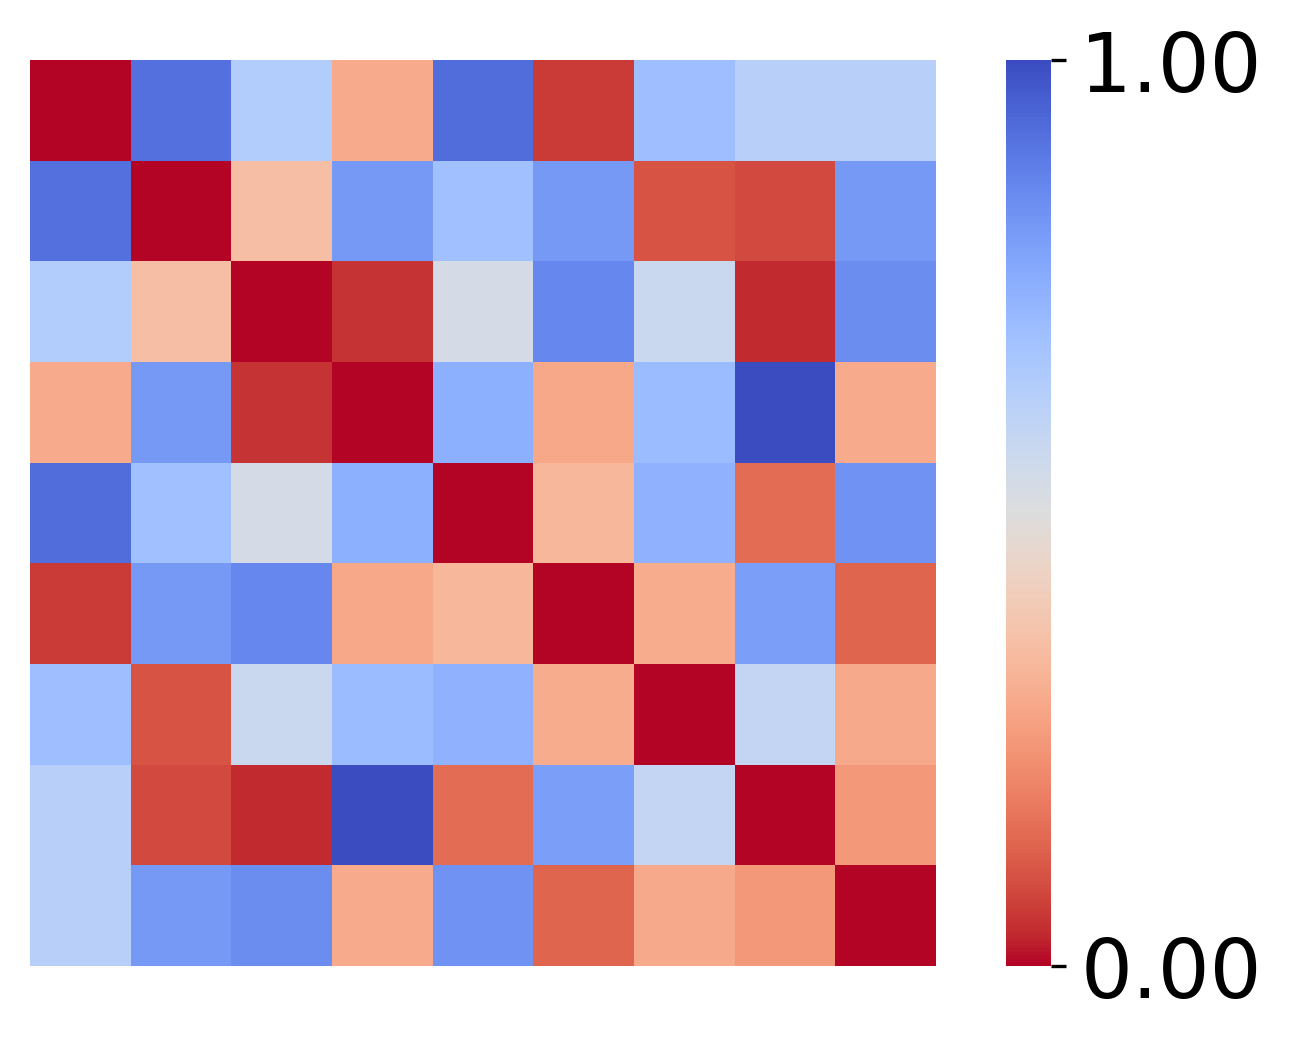

In [129]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(zeros_rewss, zeros_rewss, effs, effs, "Rewards", "Rewards", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)


In [130]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_rewards_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_rewards_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_rewards_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_rewards_zeros.svg'))

### Stats

In [131]:
from human_utils_behavioral_analysis import compute_2D_correlation_matrices

data_obs_corr_g1, data_obs_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)
data_obs_corr_g2, data_obs_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group']]['n_observes'].values), np.stack(df[df['group']]['n_observes'].values), np.stack(df[df['group']]['effs'].values), np.stack(df[df['group']]['effs'].values),)

data_rews_corr_g1, data_rews_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)
data_rews_corr_g2, data_rews_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group']]['rewards_tallies'].values), np.stack(df[df['group']]['rewards_tallies'].values), np.stack(df[df['group']]['effs'].values), np.stack(df[df['group']]['effs'].values),)

data_sleeps_corr_g1, data_sleeps_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['n_sleeps'].values), np.stack(df[~df['group']]['n_sleeps'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)
data_sleeps_corr_g2, data_sleeps_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group']]['n_sleeps'].values), np.stack(df[df['group']]['n_sleeps'].values), np.stack(df[df['group']]['effs'].values), np.stack(df[df['group']]['effs'].values),)

data_obs_corr = (~df['group']).sum() / len(df) * data_obs_corr_g1 + (df['group']).sum() / len(df) * data_obs_corr_g2
data_obs_pvs = (~df['group']).sum() / len(df) * data_obs_pvs_g1 + (df['group']).sum() / len(df) * data_obs_pvs_g2

data_rews_corr = (~df['group']).sum() / len(df) * data_rews_corr_g1 + (df['group']).sum() / len(df) * data_rews_corr_g2
data_rews_pvs = (~df['group']).sum() / len(df) * data_rews_pvs_g1 + (df['group']).sum() / len(df) * data_rews_pvs_g2

data_sleeps_corr = (~df['group']).sum() / len(df) * data_sleeps_corr_g1 + (df['group']).sum() / len(df) * data_sleeps_corr_g2
data_sleeps_pvs = (~df['group']).sum() / len(df) * data_sleeps_pvs_g1 + (df['group']).sum() / len(df) * data_sleeps_pvs_g2


sim_obs_corr, sim_obs_pvs = compute_2D_correlation_matrices(sim_obss, sim_obss, effs, effs,)
sim_rews_corr, sim_rews_pvs = compute_2D_correlation_matrices(sim_rewss, sim_rewss, effs, effs,)
sim_sleeps_corr, sim_sleeps_pvs = compute_2D_correlation_matrices(sim_sleepss, sim_sleepss, effs, effs,)
random_obs_corr, random_obs_pvs = compute_2D_correlation_matrices(random_obss, random_obss, effs, effs,)
random_rews_corr, random_rews_pvs = compute_2D_correlation_matrices(random_rewss, random_rewss, effs, effs,)
random_sleeps_corr, random_sleeps_pvs = compute_2D_correlation_matrices(random_sleepss, random_sleepss, effs, effs,)

zeros_obs_corr, zeros_obs_pvs = compute_2D_correlation_matrices(zeros_obss, zeros_obss, effs, effs,)
zeros_rews_corr, zeros_rews_pvs = compute_2D_correlation_matrices(zeros_rewss, zeros_rewss, effs, effs,)
zeros_sleeps_corr, zeros_sleeps_pvs = compute_2D_correlation_matrices(zeros_sleepss, zeros_sleepss, effs, effs,)

(46, 9)
(65, 9)
(46, 9)
(65, 9)
(46, 9)
(65, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)


In [132]:
from human_utils_behavioral_analysis import competitive_corr_regression, upper_tri_masking

competitive_corr_regression(upper_tri_masking(data_rews_corr), [upper_tri_masking(sim_rews_corr), upper_tri_masking(random_rews_corr), upper_tri_masking(zeros_rews_corr)])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.077
Method:                 Least Squares   F-statistic:                    0.1667
Date:                Thu, 20 Jun 2024   Prob (F-statistic):              0.918
Time:                        17:20:33   Log-Likelihood:                 26.559
No. Observations:                  36   AIC:                            -45.12
Df Residuals:                      32   BIC:                            -38.78
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1105      0.027      4.047      0.0

#### Cosine Similarity

In [133]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(upper_tri_masking(data_rews_corr).reshape((1,-1)), upper_tri_masking(sim_rews_corr).reshape((1,-1)))[0][0])
print(cosine_similarity(upper_tri_masking(data_rews_corr).reshape((1,-1)), upper_tri_masking(random_rews_corr).reshape((1,-1)))[0][0])

0.40830150735446563
0.10255412104940602


## Panel F: Across-Tasks Behavior Sleep / Observes
### Humans

In [134]:
from human_utils_project import get_clean_data

day = 'day3'
exp_date = '24-01-22-29'

group = None

human_data_file_base = '/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis'

df_day1, effs_train_day1, effs_test_day1, test_start_day1 = get_clean_data(day=1, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group= group, file_base=human_data_file_base)
df_day2, effs_train_day2, effs_test_day2, test_start_day2 = get_clean_data(day=2, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)
df_day3, effs_train_day3, effs_test_day3, test_start_day3 = get_clean_data(day=3, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)
effs = np.arange(0, 1.01, 0.125)
n_steps = 50

## SECONDARY MASK TO MAKE SURE I AM ONLY TAKING PEOPLE WITH OBSERVE / SLEEP BEHHAVIOR
# df_day2 = df_day2[df_day2['n_observes'].apply(sum) > 10]
# df_day2 = df_day2[df_day2['n_observes'].apply(sum) > 10]
# df_day3 = df_day3[df_day3['n_sleeps'].apply(sum) > 5]


## WITH INNER JOIN SO THAT ONLY ROWS FROM ALL THREE DAYS ARE KEPT
df = df_day1.join(df_day2, how='inner', lsuffix='_day1', rsuffix='_day2')
df = df.join(df_day3.rename(columns=lambda x: f"{x}_day3"), how='inner')


          n        r          CI95%    p-val
pearson  46  0.16779  [-0.13, 0.44]  0.27058
          n         r          CI95%     p-val
pearson  46  0.218663  [-0.08, 0.48]  0.148995
          n         r          CI95%     p-val
pearson  46  0.168621  [-0.13, 0.44]  0.268179
          n         r          CI95%     p-val
pearson  46  0.262189  [-0.03, 0.52]  0.081875
          n         r          CI95%     p-val
pearson  46  0.132778  [-0.17, 0.41]  0.384575
          n         r          CI95%    p-val
pearson  46  0.075988  [-0.22, 0.36]  0.61981
          n         r         CI95%     p-val
pearson  46  0.329154  [0.04, 0.57]  0.027256
          n         r          CI95%     p-val
pearson  46  0.248897  [-0.05, 0.51]  0.099203
          n         r         CI95%     p-val
pearson  46  0.339197  [0.05, 0.58]  0.022642
          n        r         CI95%     p-val
pearson  46  0.11899  [-0.18, 0.4]  0.436261


          n         r          CI95%     p-val
pearson  46 -0.077177  [-0.36, 0.22]  0.614328
          n         r          CI95%     p-val
pearson  46  0.080474  [-0.22, 0.37]  0.599236
          n         r          CI95%     p-val
pearson  46  0.062714  [-0.24, 0.35]  0.682345
          n         r          CI95%     p-val
pearson  46 -0.055067  [-0.34, 0.24]  0.719389
          n         r          CI95%     p-val
pearson  46  0.066106  [-0.23, 0.35]  0.666143
          n        r          CI95%     p-val
pearson  46  0.23104  [-0.07, 0.49]  0.126763
          n         r         CI95%     p-val
pearson  46  0.095355  [-0.2, 0.38]  0.533229
          n        r         CI95%     p-val
pearson  46  0.24663  [-0.05, 0.5]  0.102422
          n         r          CI95%     p-val
pearson  46  0.078949  [-0.22, 0.36]  0.606199
          n         r          CI95%     p-val
pearson  46  0.077879  [-0.22, 0.36]  0.611104
          n         r          CI95%     p-val
pearson  46 -0.042733

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

          n        r         CI95%     p-val
pearson  46  0.32745  [0.04, 0.57]  0.028112
          n         r        CI95%     p-val
pearson  46  0.297482  [0.0, 0.54]  0.047189
          n         r          CI95%     p-val
pearson  46  0.214061  [-0.08, 0.48]  0.157955
          n         r          CI95%     p-val
pearson  46  0.270071  [-0.03, 0.52]  0.072779
          n         r         CI95%     p-val
pearson  46  0.095375  [-0.2, 0.38]  0.533143
          n         r         CI95%    p-val
pearson  46  0.356962  [0.07, 0.59]  0.01608
          n         r          CI95%     p-val
pearson  46  0.276113  [-0.02, 0.53]  0.066361
          n         r         CI95%     p-val
pearson  46  0.473642  [0.21, 0.67]  0.001015
          n         r          CI95%     p-val
pearson  46  0.264627  [-0.03, 0.52]  0.078972
          n         r          CI95%     p-val
pearson  46  0.268427  [-0.03, 0.52]  0.074607
          n         r         CI95%     p-val
pearson  46  0.338951  [0.05, 

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

          n         r          CI95%     p-val
pearson  65 -0.087717  [-0.33, 0.16]  0.490673
          n         r         CI95%     p-val
pearson  65 -0.045746  [-0.29, 0.2]  0.719636
          n        r          CI95%     p-val
pearson  65 -0.10329  [-0.34, 0.15]  0.416672
          n         r          CI95%     p-val
pearson  65 -0.023382  [-0.27, 0.22]  0.854489
          n         r          CI95%     p-val
pearson  65 -0.086614  [-0.33, 0.16]  0.496168
          n         r         CI95%     p-val
pearson  65 -0.056363  [-0.3, 0.19]  0.658225
          n        r         CI95%     p-val
pearson  65  0.05385  [-0.19, 0.3]  0.672575
          n        r          CI95%     p-val
pearson  65  0.08722  [-0.16, 0.33]  0.493145
          n         r          CI95%     p-val
pearson  65  0.101621  [-0.15, 0.34]  0.424282
          n         r          CI95%     p-val
pearson  65  0.097058  [-0.15, 0.33]  0.445486
          n         r          CI95%     p-val
pearson  65  0.004713  [-

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

          n         r          CI95%     p-val
pearson  65  0.140631  [-0.11, 0.37]  0.267693
          n         r          CI95%     p-val
pearson  65  0.133551  [-0.12, 0.37]  0.292766
          n         r          CI95%     p-val
pearson  65 -0.011066  [-0.26, 0.24]  0.930841
          n        r          CI95%     p-val
pearson  65  0.00296  [-0.24, 0.25]  0.981481
          n         r         CI95%     p-val
pearson  65 -0.174383  [-0.4, 0.07]  0.168155
          n         r          CI95%     p-val
pearson  65 -0.179054  [-0.41, 0.07]  0.156871
          n        r          CI95%     p-val
pearson  65 -0.08616  [-0.33, 0.16]  0.498437
          n        r          CI95%     p-val
pearson  65 -0.11305  [-0.35, 0.14]  0.373773
          n         r         CI95%    p-val
pearson  65  0.243683  [-0.0, 0.46]  0.05233
          n         r         CI95%     p-val
pearson  65  0.062111  [-0.19, 0.3]  0.625859
          n         r         CI95%     p-val
pearson  65  0.056846  [-0.1

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

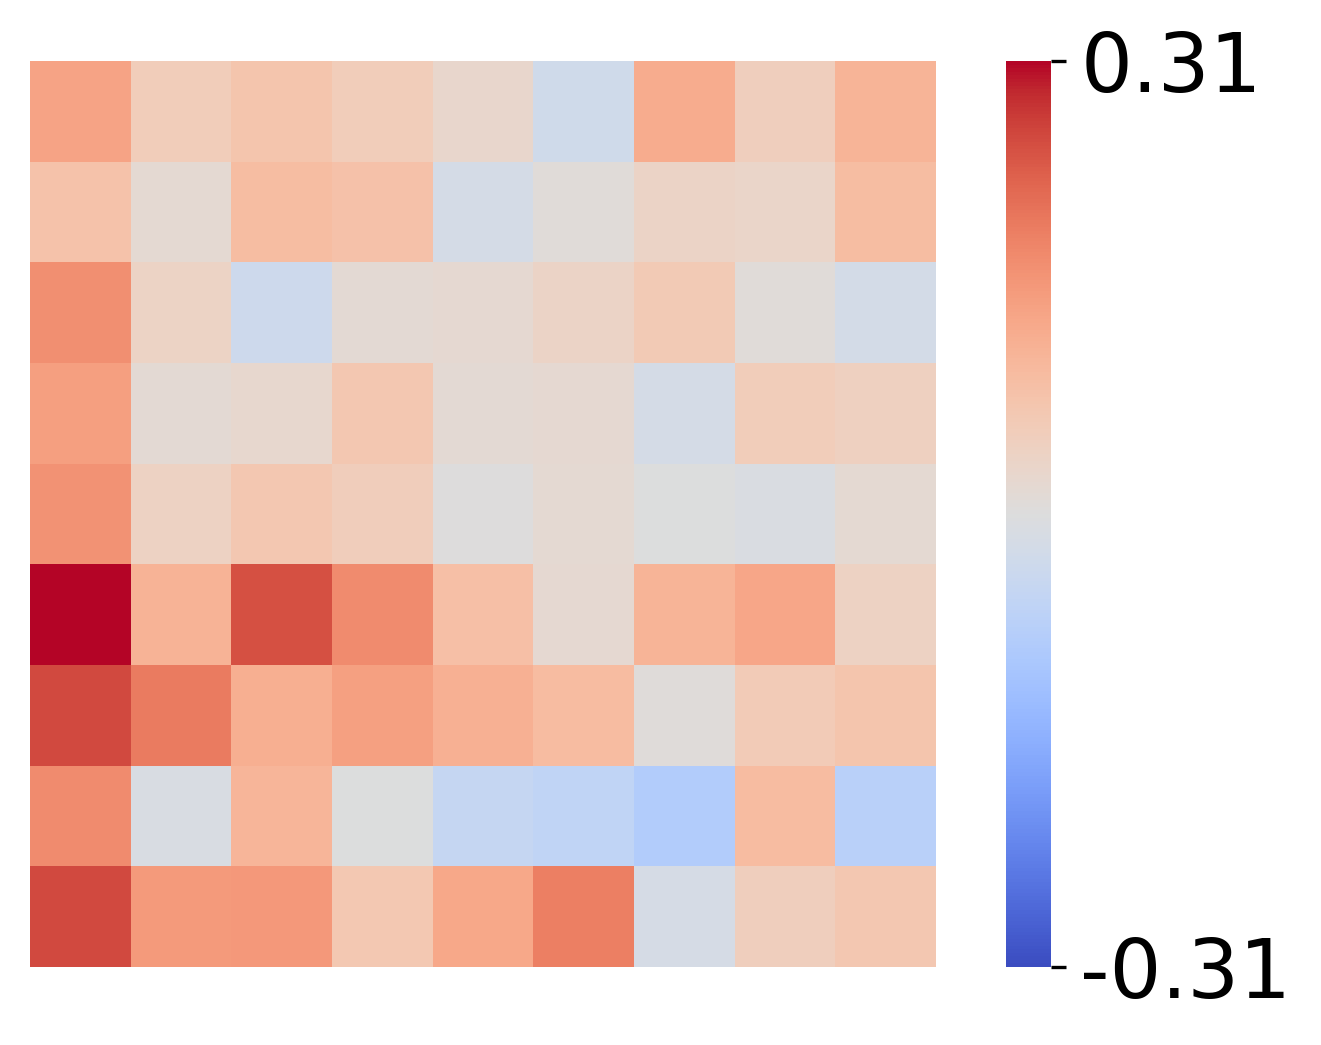

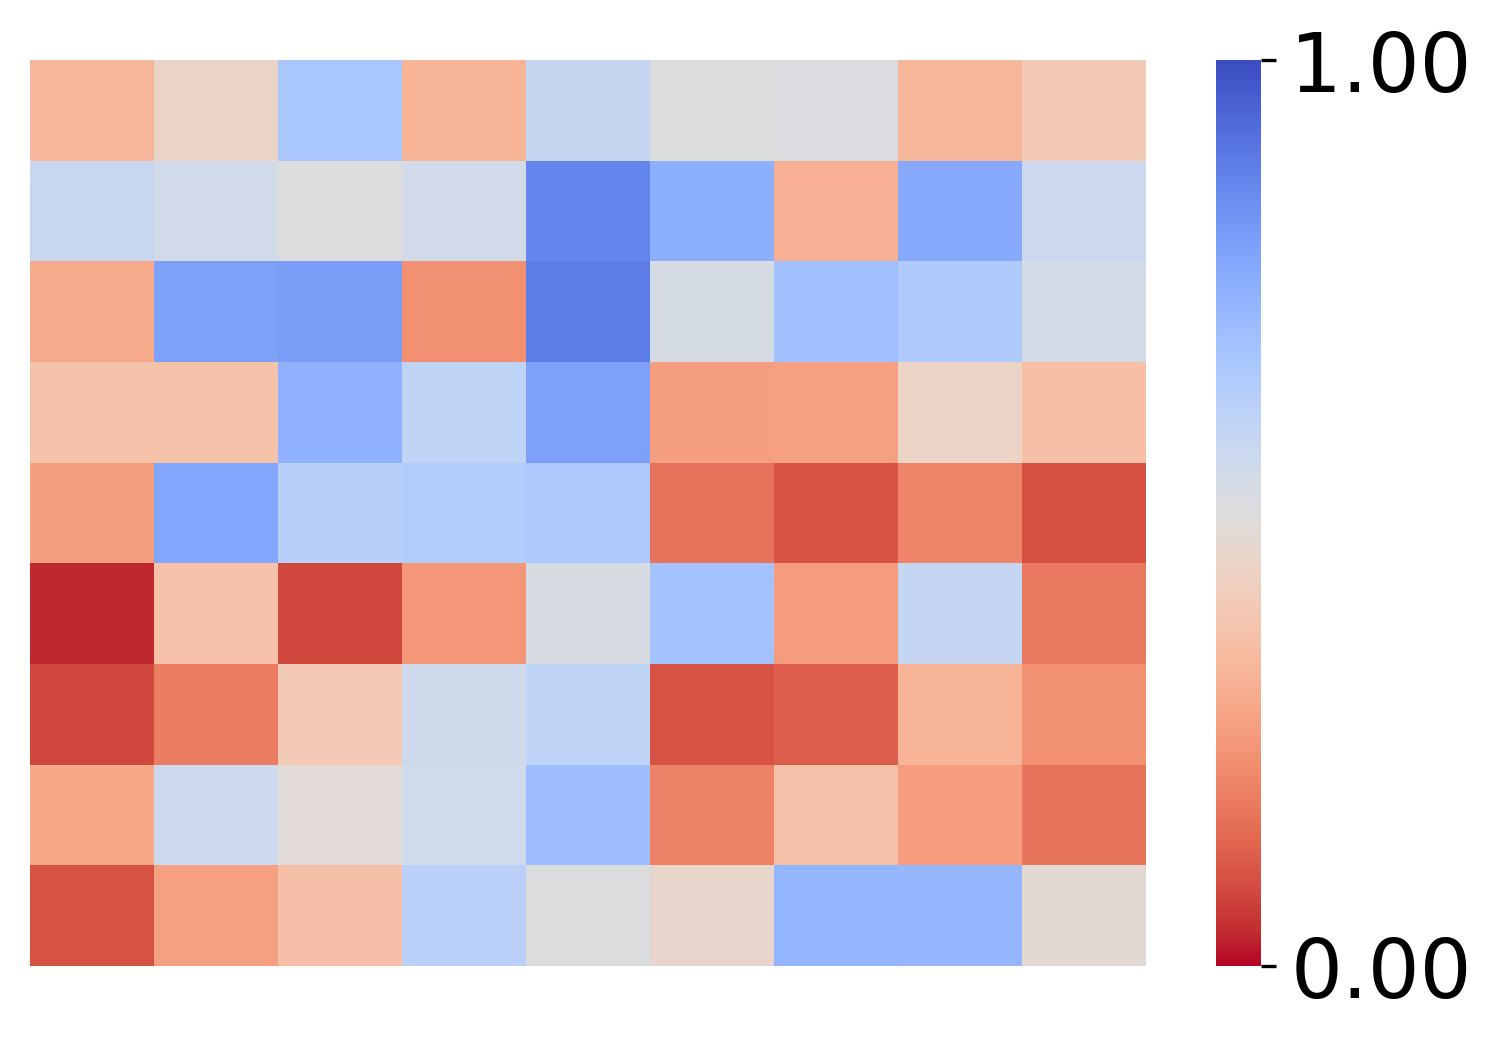

In [135]:
from human_utils_behavioral_analysis import compute_partial_2D_correlation, compute_2D_correlation

corr_fig, pvs_fig = compute_partial_2D_correlation(df['n_observes_day2'], df['n_sleeps_day3'], df['n_observes_day3'], df['effs_day2'], df['effs_day3'], df['effs_day3'], semi=False, col1name = 'Observes Task 1', col2name = 'Sleeps Task 2', annot=False, resize_colorbar=True, groups=df['group_day1'], square=square, axes_off=axes_off, font_size_multiplier=1.4)

#corr_fig, pvs_fig = compute_2D_correlation(df['n_observes_day2'], df['n_sleeps_day3'], df['effs_day2'], df['effs_day3'], col1name = 'Observes Task 1', col2name = 'Sleeps Task 2', annot=False, resize_colorbar=True, groups=df['group_day1'])


In [136]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_humans_partialed.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_humans_partialed.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_humans_partialed.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_humans_partialed.svg'))

# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_humans.png'))
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_humans.svg'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_humans.png'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_humans.svg'))

### Trait-Level Perturbations

In [137]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t1 as sim_timestamp

sim_rewss_t1, sim_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)
sim_rewss_t1 = sim_rewss_t1.mean(axis=0)
sim_obss_t1 = sim_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss_t1 = np.flip(sim_rewss_t1.T, axis=1)
sim_obss_t1 = np.flip(sim_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t2 as sim_timestamp

effs_sorted = effs = np.arange(0, 1.01, 0.125)

sim_rewss_t2, sim_obss_t2, sim_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)
sim_rewss_t2 = sim_rewss_t2.mean(axis=0)
sim_obss_t2 = sim_obss_t2.mean(axis=0)
sim_sleepss_t2 = sim_sleepss_t2.mean(axis=0)


## correcting for switching from tau to efficacy
sim_rewss_t2 = np.flip(sim_rewss_t2.T, axis=1)
sim_obss_t2 = np.flip(sim_obss_t2.T, axis=1)
sim_sleepss_t2 = np.flip(sim_sleepss_t2.T, axis=1)

(150, 9)
           n         r         CI95%         p-val
pearson  150  0.594518  [0.48, 0.69]  1.310298e-15
           n         r       CI95%         p-val
pearson  150  0.609794  [0.5, 0.7]  1.532026e-16
           n         r         CI95%         p-val
pearson  150  0.621243  [0.51, 0.71]  2.838481e-17
           n         r         CI95%         p-val
pearson  150  0.601038  [0.49, 0.69]  5.316430e-16
           n         r         CI95%         p-val
pearson  150  0.450248  [0.31, 0.57]  8.347274e-09
           n         r          CI95%     p-val
pearson  150  0.051702  [-0.11, 0.21]  0.531175
           n       r           CI95%         p-val
pearson  150 -0.4051  [-0.53, -0.26]  2.980774e-07
           n         r           CI95%         p-val
pearson  150 -0.712272  [-0.78, -0.62]  2.316684e-24
           n         r           CI95%         p-val
pearson  150 -0.881342  [-0.91, -0.84]  1.013275e-49
           n         r         CI95%         p-val
pearson  150  0.497916  

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r           CI95%     p-val
pearson  150 -0.201041  [-0.35, -0.04]  0.013952
           n         r           CI95%     p-val
pearson  150 -0.301028  [-0.44, -0.15]  0.000191
           n         r           CI95%         p-val
pearson  150 -0.415791  [-0.54, -0.27]  1.339291e-07
           n         r           CI95%         p-val
pearson  150 -0.540412  [-0.65, -0.42]  1.130874e-12
           n         r         CI95%     p-val
pearson  150  0.217689  [0.06, 0.37]  0.007655
           n         r         CI95%     p-val
pearson  150  0.191498  [0.03, 0.34]  0.019307
           n         r          CI95%    p-val
pearson  150  0.125162  [-0.04, 0.28]  0.12828
           n         r          CI95%     p-val
pearson  150 -0.001271  [-0.16, 0.16]  0.987722
           n         r           CI95%     p-val
pearson  150 -0.192891  [-0.34, -0.03]  0.018429
           n         r           CI95%     p-val
pearson  150 -0.388091  [-0.52, -0.24]  0.000001
           n      

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

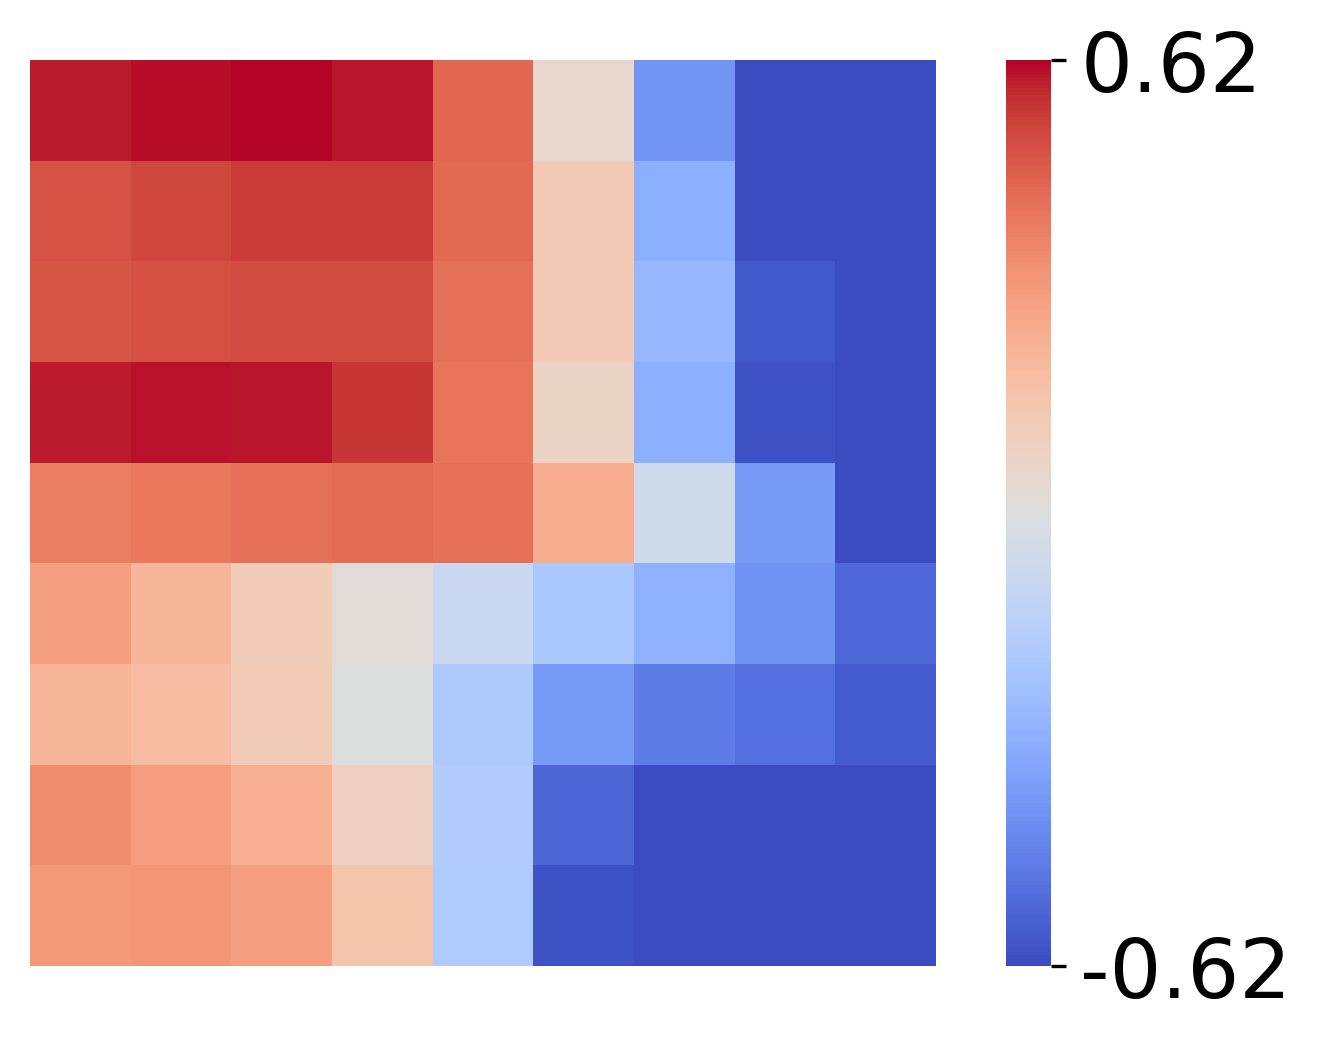

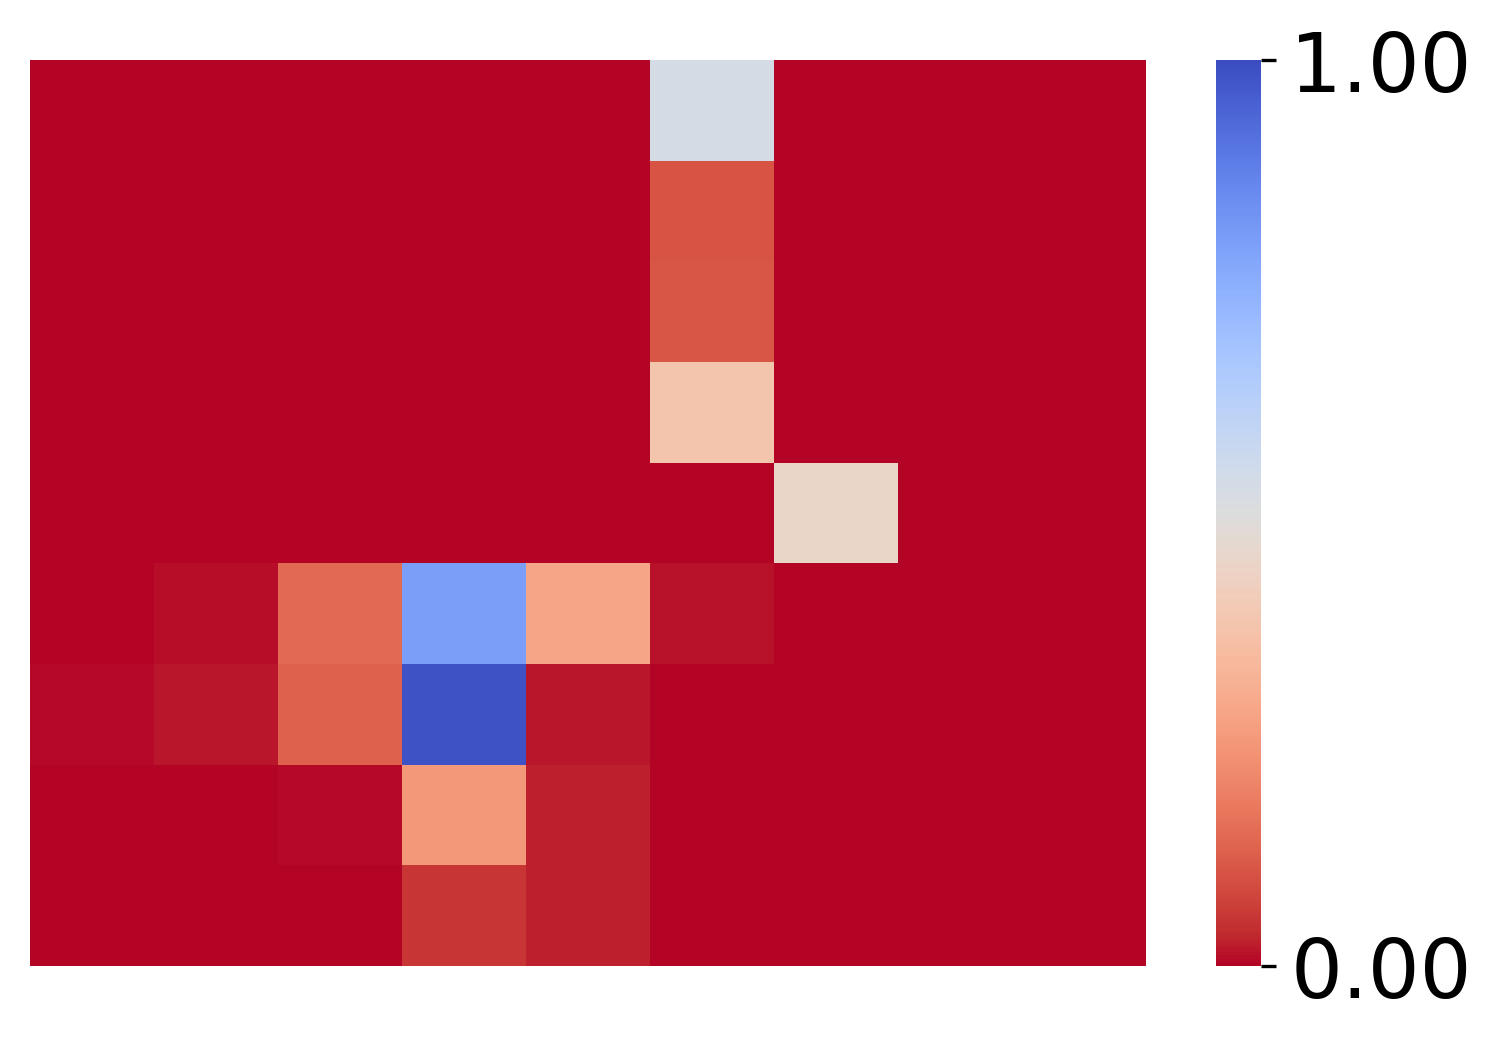

In [138]:
from human_utils_behavioral_analysis import compute_partial_2D_correlation

corr_fig, pvs_fig = compute_partial_2D_correlation(sim_obss_t1, sim_sleepss_t2, sim_obss_t2, effs_sorted, effs_sorted, effs_sorted, semi=False, col1name = 'Observes Task 1', col2name = 'Sleeps Task 2', annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

#corr_fig, pvs_fig = compute_2D_correlation(sim_obss_t1.T, sim_sleepss_t2.T, effs_sorted, effs_sorted, col1name = 'Observes Task 1', col2name = 'Sleeps Task 2', annot=False)

In [139]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_trait_partialed.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_trait_partialed.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_trait_partialed.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_trait_partialed.svg'))

# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_trait.png'))
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_trait.svg'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_trait.png'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_trait.svg'))

### Random Perturbation

In [140]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t1 as sim_timestamp

random_rewss_t1, random_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

random_rewss_t1 = random_rewss_t1.mean(axis=0)
random_obss_t1 = random_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss_t1 = np.flip(random_rewss_t1.T, axis=1)
random_obss_t1 = np.flip(random_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

random_rewss_t2, random_obss_t2, random_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

## post-hoc adjustment to get rid of relationship across tasks - TODO: resample cleanly
rng = np.random.default_rng()
random_rewss_t2 = rng.permuted(random_rewss_t2, axis=-1)
random_obss_t2 = rng.permuted(random_obss_t2, axis=-1)
random_sleepss_t2 = rng.permuted(random_sleepss_t2, axis=-1)

random_rewss_t2 = random_rewss_t2.mean(axis=0)
random_obss_t2 = random_obss_t2.mean(axis=0)
random_sleepss_t2 = random_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss_t2 = np.flip(random_rewss_t2.T, axis=1)
random_obss_t2 = np.flip(random_obss_t2.T, axis=1)
random_sleepss_t2 = np.flip(random_sleepss_t2.T, axis=1)

(150, 9)
           n         r          CI95%    p-val
pearson  150  0.068329  [-0.09, 0.23]  0.40767
           n         r          CI95%     p-val
pearson  150 -0.014249  [-0.17, 0.15]  0.863063
           n         r          CI95%     p-val
pearson  150  0.085036  [-0.08, 0.24]  0.302485
           n        r         CI95%     p-val
pearson  150  0.03551  [-0.13, 0.2]  0.667241
           n        r          CI95%     p-val
pearson  150  0.00214  [-0.16, 0.16]  0.979335
           n        r         CI95%     p-val
pearson  150  0.24759  [0.09, 0.39]  0.002332
           n         r          CI95%     p-val
pearson  150 -0.017506  [-0.18, 0.14]  0.832179
           n        r          CI95%     p-val
pearson  150  0.00377  [-0.16, 0.16]  0.963603
           n         r          CI95%     p-val
pearson  150 -0.094925  [-0.25, 0.07]  0.249507
           n         r          CI95%     p-val
pearson  150 -0.031806  [-0.19, 0.13]  0.700183
           n         r          CI95%     p-v

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r          CI95%     p-val
pearson  150  0.108786  [-0.05, 0.26]  0.186619
           n         r          CI95%    p-val
pearson  150 -0.115001  [-0.27, 0.05]  0.16254
           n        r         CI95%     p-val
pearson  150  0.04165  [-0.12, 0.2]  0.614025
           n         r         CI95%     p-val
pearson  150  0.065712  [-0.1, 0.22]  0.425901
           n         r          CI95%     p-val
pearson  150 -0.052511  [-0.21, 0.11]  0.524766
           n         r          CI95%     p-val
pearson  150 -0.069538  [-0.23, 0.09]  0.399401
           n         r         CI95%    p-val
pearson  150  0.038585  [-0.12, 0.2]  0.64036
           n         r          CI95%     p-val
pearson  150  0.013615  [-0.15, 0.17]  0.869104
           n         r         CI95%     p-val
pearson  150  0.061484  [-0.1, 0.22]  0.456337
           n         r         CI95%     p-val
pearson  150 -0.041591  [-0.2, 0.12]  0.614526
           n         r          CI95%     p-val
pearson 

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

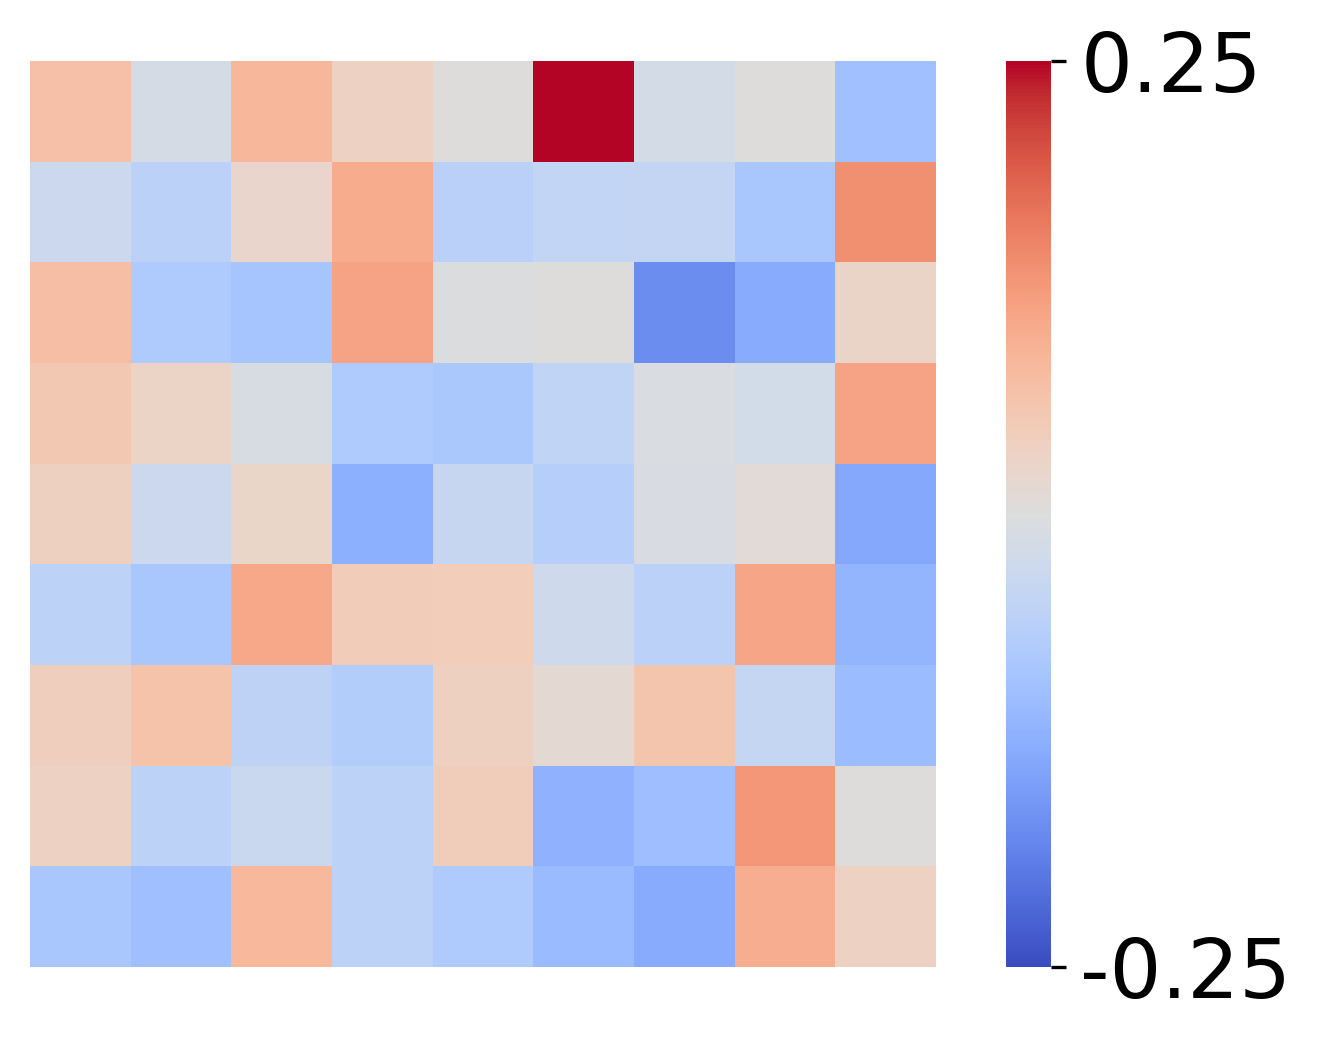

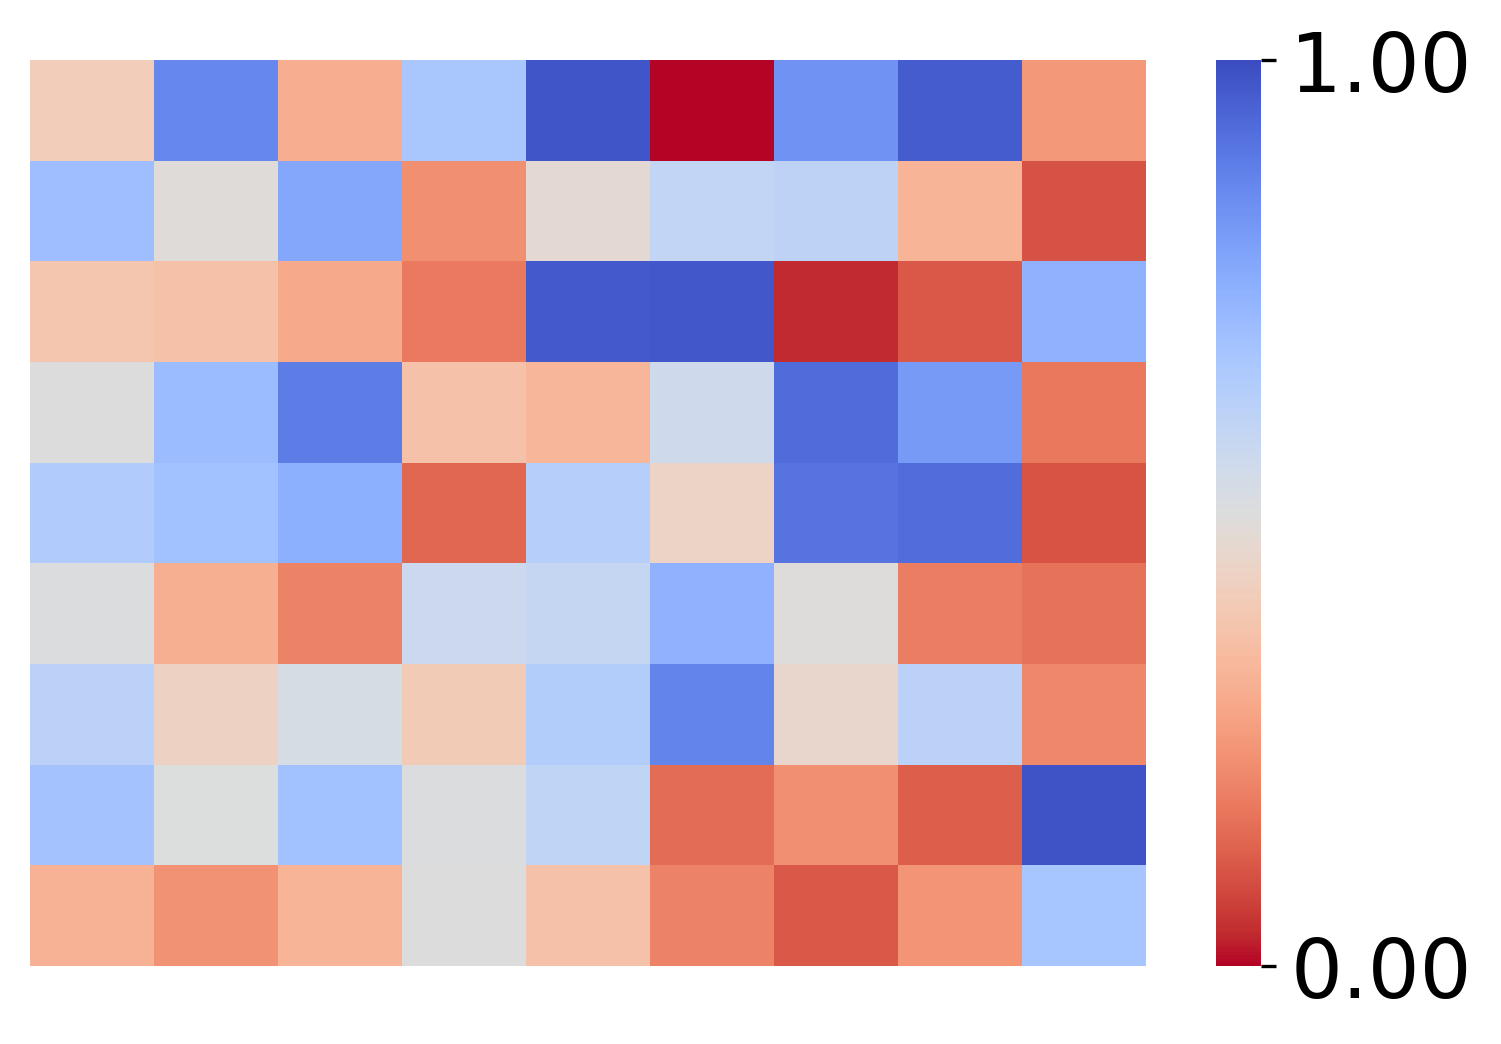

In [141]:
from human_utils_behavioral_analysis import compute_partial_2D_correlation, compute_2D_correlation

corr_fig, pvs_fig = compute_partial_2D_correlation(random_obss_t1, random_sleepss_t2, random_obss_t2, effs_sorted, effs_sorted, effs_sorted, semi=False, col1name = 'Observes Task 1', col2name = 'Sleeps Task 2', annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

#corr_fig, pvs_fig = compute_2D_correlation(random_obss_t1.T, random_sleepss_t2.T, effs_sorted, effs_sorted, col1name = 'Observes Task 1', col2name = 'Sleeps Task 2', annot=False)

In [142]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random_partialed.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random_partialed.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random_partialed.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random_partialed.svg'))

# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random.png'))
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random.svg'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random.png'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random.svg'))

### Zeros Perturbations

In [143]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models

from settings_anal import zeros_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t1 as sim_timestamp

zeros_rewss_t1, zeros_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

zeros_rewss_t1 =zeros_rewss_t1.mean(axis=0)
zeros_obss_t1 = zeros_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss_t1 = np.flip(zeros_rewss_t1.T, axis=1)
zeros_obss_t1 = np.flip(zeros_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)
effs_sorted = np.arange(0, 1.01, 0.125)

zeros_rewss_t2, zeros_obss_t2,zeros_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

## TODO: Check to make sure this is no longer necessary
rng = np.random.default_rng()
zeros_rewss_t2 = rng.permuted(zeros_rewss_t2, axis=-1)
zeros_obss_t2 = rng.permuted(zeros_obss_t2, axis=-1)
zeros_sleepss_t2 = rng.permuted(zeros_sleepss_t2, axis=-1)

zeros_rewss_t2 = zeros_rewss_t2.mean(axis=0)
zeros_obss_t2 = zeros_obss_t2.mean(axis=0)
zeros_sleepss_t2 = zeros_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss_t2 = np.flip(zeros_rewss_t2.T, axis=1)
zeros_obss_t2 = np.flip(zeros_obss_t2.T, axis=1)
zeros_sleepss_t2 = np.flip(zeros_sleepss_t2.T, axis=1)

(150, 9)
           n         r          CI95%     p-val
pearson  150 -0.088421  [-0.25, 0.07]  0.283575
           n         r          CI95%     p-val
pearson  150 -0.099502  [-0.26, 0.06]  0.227299
           n         r          CI95%     p-val
pearson  150  0.094838  [-0.07, 0.25]  0.249941
           n         r          CI95%     p-val
pearson  150  0.019716  [-0.14, 0.18]  0.811369
           n         r          CI95%     p-val
pearson  150 -0.007501  [-0.17, 0.15]  0.927658
           n         r         CI95%     p-val
pearson  150  0.061716  [-0.1, 0.22]  0.454637
           n         r          CI95%     p-val
pearson  150  0.028442  [-0.13, 0.19]  0.730603
           n         r          CI95%     p-val
pearson  150  0.031463  [-0.13, 0.19]  0.703268
           n         r         CI95%     p-val
pearson  150 -0.045658  [-0.2, 0.12]  0.580316
           n         r          CI95%     p-val
pearson  150  0.049534  [-0.11, 0.21]  0.548566
           n         r        CI95%

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r          CI95%    p-val
pearson  150  0.027175  [-0.13, 0.19]  0.74217
           n         r          CI95%     p-val
pearson  150  0.001519  [-0.16, 0.16]  0.985327
           n         r          CI95%     p-val
pearson  150  0.046274  [-0.12, 0.21]  0.575211
           n         r          CI95%     p-val
pearson  150 -0.070133  [-0.23, 0.09]  0.395369
           n         r          CI95%     p-val
pearson  150  0.010663  [-0.15, 0.17]  0.897308
           n         r           CI95%     p-val
pearson  150 -0.208301  [-0.36, -0.05]  0.010796
           n         r          CI95%    p-val
pearson  150  0.116231  [-0.05, 0.27]  0.15806
           n         r         CI95%     p-val
pearson  150  0.064615  [-0.1, 0.22]  0.433683
           n         r          CI95%    p-val
pearson  150  0.029139  [-0.13, 0.19]  0.72426
           n         r          CI95%     p-val
pearson  150 -0.097539  [-0.25, 0.06]  0.236645
           n         r          CI95%     p-va

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

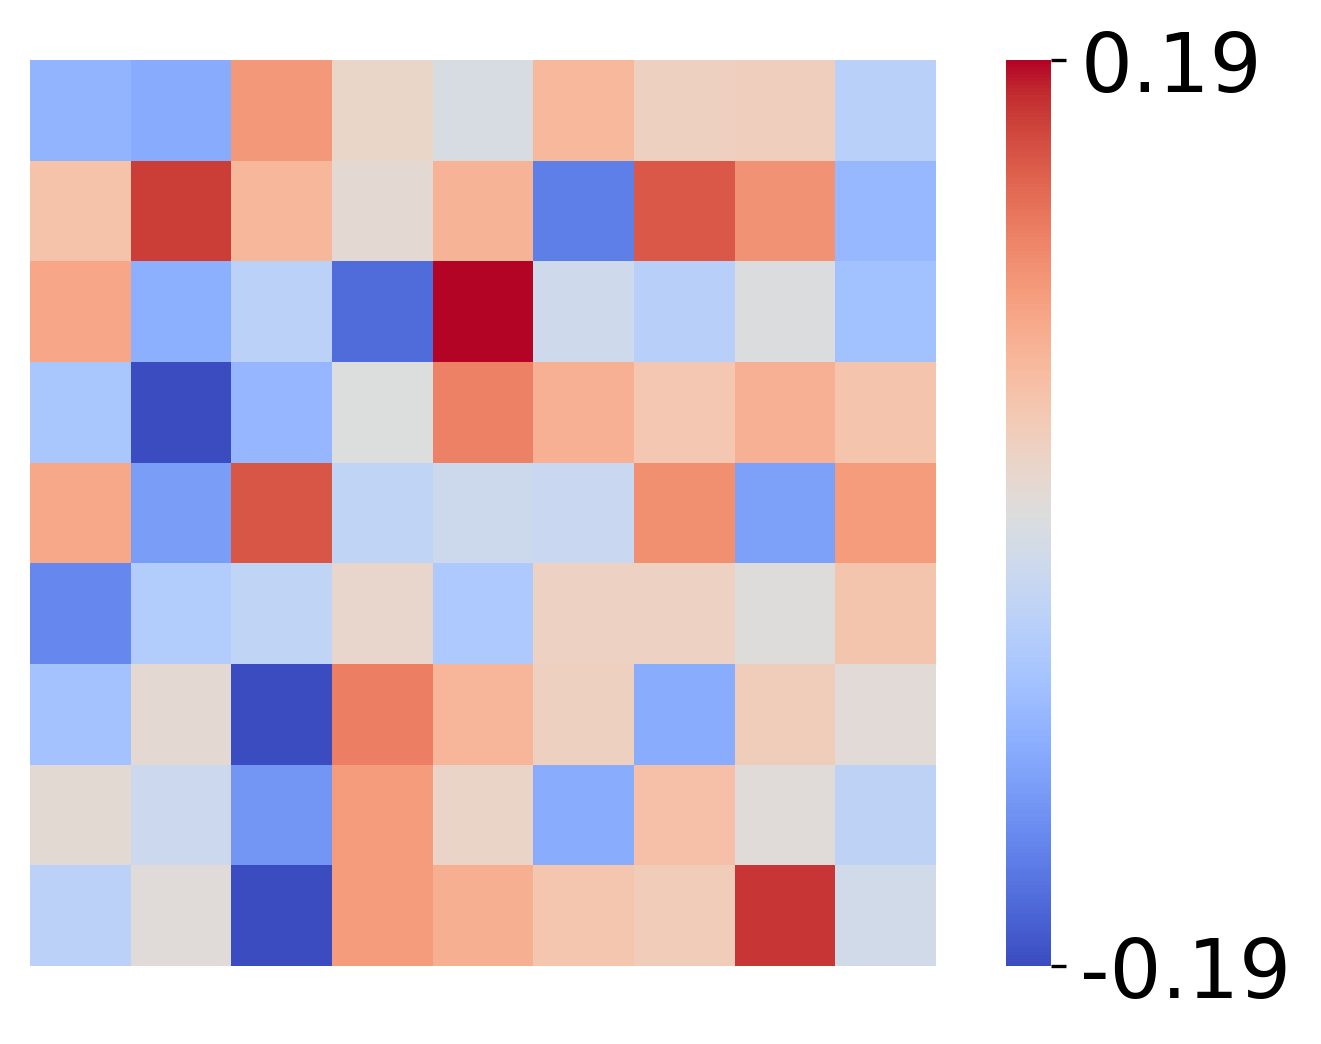

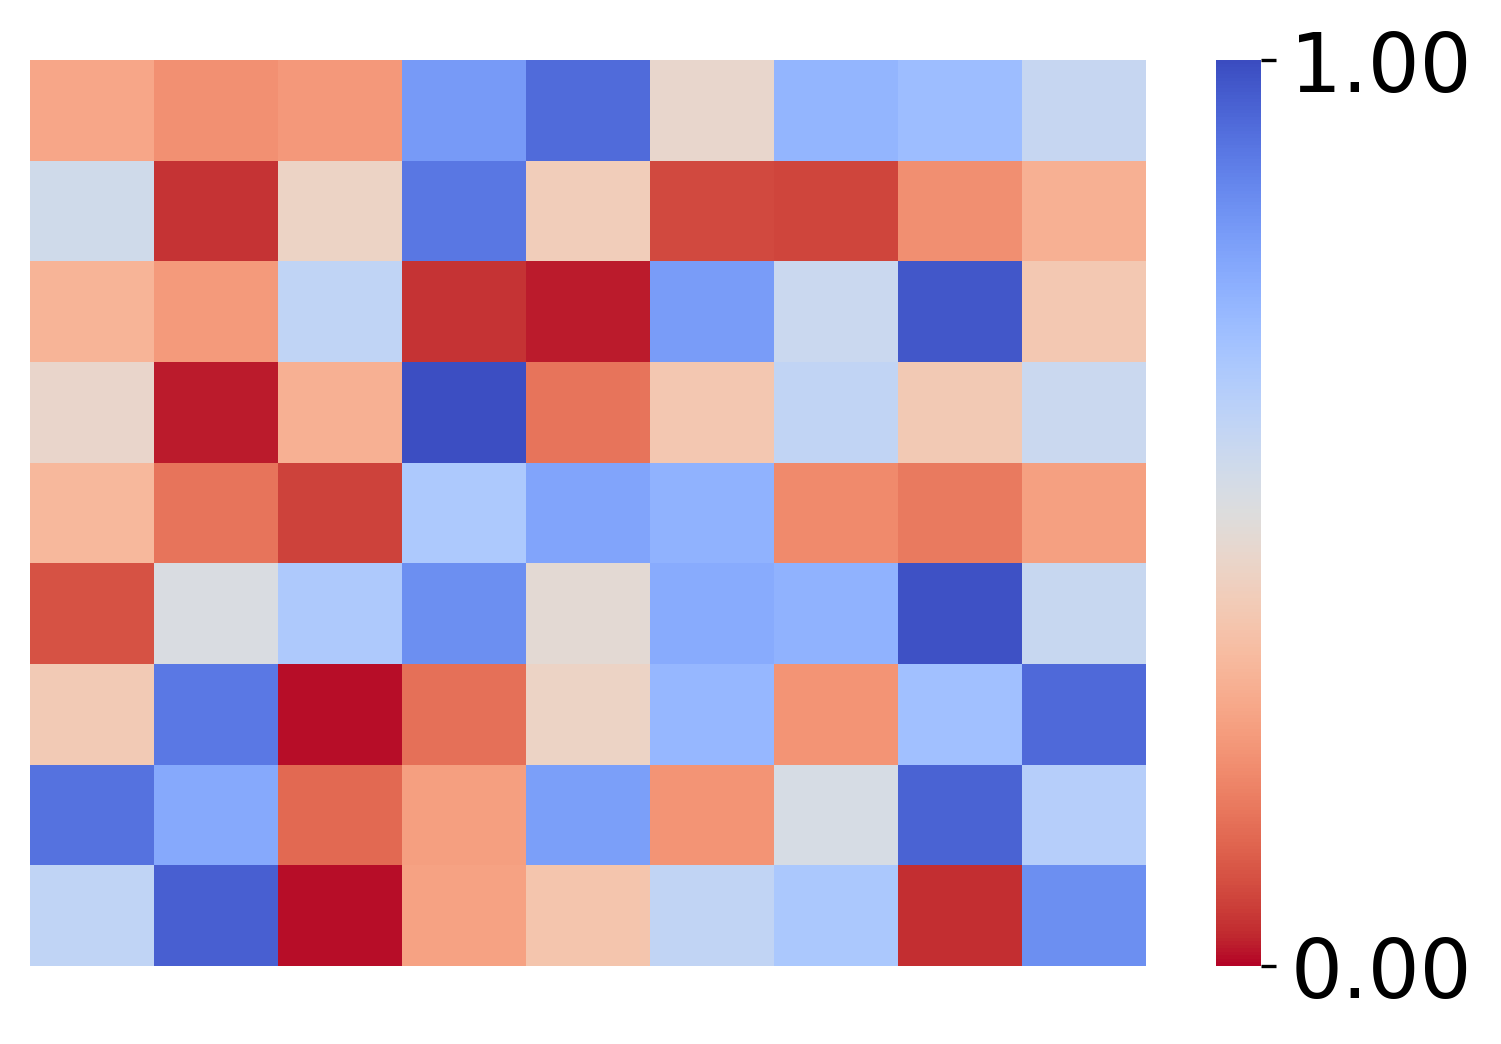

In [144]:
from human_utils_behavioral_analysis import compute_partial_2D_correlation, compute_2D_correlation

corr_fig, pvs_fig = compute_partial_2D_correlation(zeros_obss_t1, zeros_sleepss_t2, zeros_obss_t2, effs_sorted, effs_sorted, effs_sorted, semi=False, col1name = 'Observes Task 1', col2name = 'Sleeps Task 2', annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

#corr_fig, pvs_fig = compute_2D_correlation(random_obss_t1.T, random_sleepss_t2.T, effs_sorted, effs_sorted, col1name = 'Observes Task 1', col2name = 'Sleeps Task 2', annot=False)

In [145]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_zeros_partialed.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_zeros_partialed.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_zeros_partialed.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_zeros_partialed.svg'))

# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random.png'))
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random.svg'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random.png'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random.svg'))

### Stats

In [146]:
df['group_day2']

63bafd5660d1226b353b827f     True
641a81266c698bfc30b4e778     True
58d3c97d42648b0001f21cc4     True
614fba422d976319a6ea9f3a    False
65451c549942fbb343426329    False
                            ...  
63d16b409fc89f6d3a97f281     True
63ed27349738654dde4655ae    False
63d40198e02717adf9ef6b92     True
5dbd96bc80dbee2c71a8c9d6     True
63d190d52bb71e0e81d868f2     True
Name: group_day2, Length: 111, dtype: bool

In [147]:
from human_utils_behavioral_analysis import compute_2D_correlation_matrices, compute_partial_2D_correlation_matrices

## day 2
data_obs_corr_g1, data_obs_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group_day2']]['n_observes_day2'].values), np.stack(df[~df['group_day2']]['n_observes_day3'].values), np.stack(df[~df['group_day2']]['effs_day2'].values), np.stack(df[~df['group_day3']]['effs_day3'].values),)
data_obs_corr_g2, data_obs_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group_day2']]['n_observes_day2'].values), np.stack(df[df['group_day2']]['n_observes_day3'].values), np.stack(df[df['group_day2']]['effs_day2'].values), np.stack(df[df['group_day3']]['effs_day3'].values),)

data_rews_corr_g1, data_rews_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group_day2']]['rewards_tallies_day2'].values), np.stack(df[~df['group_day2']]['rewards_tallies_day3'].values), np.stack(df[~df['group_day2']]['effs_day2'].values), np.stack(df[~df['group_day3']]['effs_day3'].values),)
data_rews_corr_g2, data_rews_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group_day2']]['rewards_tallies_day2'].values), np.stack(df[df['group_day2']]['rewards_tallies_day3'].values), np.stack(df[df['group_day2']]['effs_day2'].values), np.stack(df[df['group_day3']]['effs_day3'].values),)

data_obs_corr = (~df['group_day2']).sum() / len(df) * data_obs_corr_g1 + (df['group_day2']).sum() / len(df) * data_obs_corr_g2
data_obs_pvs = (~df['group_day2']).sum() / len(df) * data_obs_pvs_g1 + (df['group_day2']).sum() / len(df) * data_obs_pvs_g2

data_rews_corr = (~df['group_day2']).sum() / len(df) * data_rews_corr_g1 + (df['group_day2']).sum() / len(df) * data_rews_corr_g2
data_rews_pvs = (~df['group_day2']).sum() / len(df) * data_rews_pvs_g1 + (df['group_day2']).sum() / len(df) * data_rews_pvs_g2

data_sleeps_corr_g1, data_sleeps_pvs_g1 = compute_partial_2D_correlation_matrices(np.stack(df[~df['group_day2']]['n_observes_day2'].values), np.stack(df[~df['group_day2']]['n_sleeps_day3'].values), np.stack(df[~df['group_day2']]['n_observes_day3'].values), np.stack(df[~df['group_day2']]['effs_day2'].values), np.stack(df[~df['group_day2']]['effs_day3'].values), np.stack(df[~df['group_day2']]['effs_day3'].values), semi=False)
data_sleeps_corr_g2, data_sleeps_pvs_g2 = compute_partial_2D_correlation_matrices(np.stack(df[df['group_day2']]['n_observes_day2'].values), np.stack(df[df['group_day2']]['n_sleeps_day3'].values), np.stack(df[df['group_day2']]['n_observes_day3'].values), np.stack(df[df['group_day2']]['effs_day2'].values), np.stack(df[df['group_day2']]['effs_day3'].values),np.stack(df[df['group_day2']]['effs_day3'].values),semi=False )
# data_sleeps_corr_g1, data_sleeps_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group_day2']]['n_observes_day2'].values), np.stack(df[~df['group_day2']]['n_sleeps_day3'].values), np.stack(df[~df['group_day2']]['effs_day2'].values), np.stack(df[~df['group_day2']]['effs_day3'].values), )
# data_sleeps_corr_g2, data_sleeps_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group_day2']]['n_observes_day2'].values), np.stack(df[df['group_day2']]['n_sleeps_day3'].values), np.stack(df[df['group_day2']]['effs_day2'].values), np.stack(df[df['group_day2']]['effs_day3'].values), )

data_sleeps_corr = (~df['group_day2']).sum() / len(df) * data_sleeps_corr_g1 + (df['group_day2']).sum() / len(df) * data_sleeps_corr_g2
data_sleeps_pvs = (~df['group_day2']).sum() / len(df) * data_sleeps_pvs_g1 + (df['group_day2']).sum() / len(df) * data_sleeps_pvs_g2

sim_obs_corr, sim_obs_pvs = compute_2D_correlation_matrices(sim_obss_t1, sim_obss_t2, effs, effs,)
sim_rews_corr, sim_rews_pvs = compute_2D_correlation_matrices(sim_rewss_t1, sim_rewss_t2, effs, effs,)
sim_sleeps_corr, sim_sleeps_pvs = compute_partial_2D_correlation_matrices(sim_obss_t1, sim_sleepss_t2, sim_obss_t2, effs_sorted, effs_sorted, effs_sorted, semi=False,)
#sim_sleeps_corr, sim_sleeps_pvs = compute_2D_correlation_matrices(sim_obss_t1, sim_sleepss_t2, effs_sorted, effs_sorted)
random_obs_corr, random_obs_pvs = compute_2D_correlation_matrices(random_obss_t1, random_obss_t2, effs, effs,)
random_rews_corr, random_rews_pvs = compute_2D_correlation_matrices(random_rewss_t1, random_rewss_t2, effs, effs,)
random_sleeps_corr, random_sleeps_pvs = compute_partial_2D_correlation_matrices(random_obss_t1, random_sleepss_t2, random_obss_t2, effs_sorted, effs_sorted, effs_sorted, semi=False,)
#random_sleeps_corr, random_sleeps_pvs = compute_2D_correlation_matrices(random_obss_t1, random_sleepss_t2, effs_sorted, effs_sorted,)

zeros_obs_corr, zeros_obs_pvs = compute_2D_correlation_matrices(zeros_obss_t1, zeros_obss_t2, effs, effs,)
zeros_rews_corr, zeros_rews_pvs = compute_2D_correlation_matrices(zeros_rewss_t1, zeros_rewss_t2, effs, effs,)
zeros_sleeps_corr, zeros_sleeps_pvs = compute_partial_2D_correlation_matrices(zeros_obss_t1, zeros_sleepss_t2, zeros_obss_t2, effs_sorted, effs_sorted, effs_sorted, semi=False,)


(46, 9)
(65, 9)
(46, 9)
(65, 9)
(46, 9)
          n        r          CI95%    p-val
pearson  46  0.16779  [-0.13, 0.44]  0.27058
          n         r          CI95%     p-val
pearson  46  0.150584  [-0.15, 0.43]  0.323462
          n         r         CI95%    p-val
pearson  46  0.094526  [-0.2, 0.38]  0.53681
          n         r          CI95%     p-val
pearson  46 -0.085092  [-0.37, 0.21]  0.578374
          n         r          CI95%     p-val
pearson  46  0.185669  [-0.11, 0.45]  0.222046
          n         r          CI95%     p-val
pearson  46  0.275501  [-0.02, 0.53]  0.066991
          n         r          CI95%     p-val
pearson  46  0.113613  [-0.19, 0.39]  0.457417
          n         r          CI95%     p-val
pearson  46  0.135381  [-0.16, 0.41]  0.375241
          n         r          CI95%     p-val
pearson  46  0.025859  [-0.27, 0.32]  0.866102
          n         r          CI95%     p-val
pearson  46  0.260511  [-0.04, 0.51]  0.083923
          n         r       

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

          n        r          CI95%     p-val
pearson  46  0.07607  [-0.22, 0.36]  0.619432
          n         r         CI95%     p-val
pearson  46  0.324407  [0.03, 0.56]  0.029695
          n         r         CI95%     p-val
pearson  46  0.244787  [-0.05, 0.5]  0.105096
          n         r          CI95%     p-val
pearson  46  0.064032  [-0.23, 0.35]  0.676035
          n        r          CI95%     p-val
pearson  46  0.25331  [-0.04, 0.51]  0.093163
          n         r          CI95%     p-val
pearson  46 -0.020217  [-0.31, 0.27]  0.895128
          n         r          CI95%     p-val
pearson  46  0.151152  [-0.15, 0.43]  0.321618
          n        r          CI95%     p-val
pearson  46  0.15404  [-0.15, 0.43]  0.312351
          n         r          CI95%     p-val
pearson  46  0.264627  [-0.03, 0.52]  0.078972
          n         r          CI95%     p-val
pearson  46 -0.149723  [-0.42, 0.15]  0.326268
          n         r          CI95%     p-val
pearson  46  0.046635  

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

          n         r          CI95%     p-val
pearson  65  0.100309  [-0.15, 0.34]  0.430318
          n         r          CI95%     p-val
pearson  65  0.197361  [-0.05, 0.42]  0.118009
          n         r         CI95%     p-val
pearson  65  0.379148  [0.15, 0.57]  0.002004
          n         r          CI95%    p-val
pearson  65  0.237564  [-0.01, 0.46]  0.05873
          n         r          CI95%     p-val
pearson  65  0.123773  [-0.13, 0.36]  0.329848
          n         r          CI95%     p-val
pearson  65  0.235556  [-0.01, 0.46]  0.060962
          n        r          CI95%     p-val
pearson  65 -0.00294  [-0.25, 0.24]  0.981607
          n         r          CI95%     p-val
pearson  65  0.118612  [-0.13, 0.35]  0.350566
          n         r          CI95%     p-val
pearson  65 -0.192864  [-0.42, 0.06]  0.126791
          n        r          CI95%     p-val
pearson  65  0.09666  [-0.15, 0.33]  0.447364
          n         r          CI95%     p-val
pearson  65  0.124203

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

          n         r          CI95%     p-val
pearson  65 -0.231615  [-0.45, 0.02]  0.065544
          n         r          CI95%     p-val
pearson  65 -0.034087  [-0.28, 0.21]  0.789164
          n        r          CI95%     p-val
pearson  65 -0.08285  [-0.32, 0.17]  0.515138
          n         r         CI95%     p-val
pearson  65 -0.053806  [-0.3, 0.19]  0.672825
          n         r          CI95%     p-val
pearson  65 -0.089085  [-0.33, 0.16]  0.483911
          n         r          CI95%     p-val
pearson  65 -0.198936  [-0.42, 0.05]  0.115044
          n         r         CI95%     p-val
pearson  65 -0.045299  [-0.29, 0.2]  0.722264
(150, 9)
(150, 9)
(150, 9)
           n         r         CI95%         p-val
pearson  150  0.594518  [0.48, 0.69]  1.310298e-15
           n         r         CI95%         p-val
pearson  150  0.590884  [0.48, 0.69]  2.147276e-15
           n         r         CI95%         p-val
pearson  150  0.541338  [0.42, 0.65]  1.017421e-12
           n   

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r          CI95%     p-val
pearson  150  0.023379  [-0.14, 0.18]  0.777168
           n         r          CI95%     p-val
pearson  150 -0.016416  [-0.18, 0.14]  0.842488
           n         r         CI95%         p-val
pearson  150  0.554467  [0.43, 0.66]  2.194103e-13
           n         r         CI95%         p-val
pearson  150  0.573901  [0.46, 0.67]  1.994453e-14
           n         r         CI95%         p-val
pearson  150  0.512683  [0.38, 0.62]  2.319890e-11
           n         r         CI95%         p-val
pearson  150  0.462976  [0.33, 0.58]  2.762930e-09
           n         r         CI95%         p-val
pearson  150  0.407187  [0.26, 0.53]  2.555319e-07
           n         r         CI95%     p-val
pearson  150  0.318615  [0.17, 0.46]  0.000075
           n       r         CI95%     p-val
pearson  150  0.1438  [-0.02, 0.3]  0.080184
           n         r         CI95%     p-val
pearson  150  0.061875  [-0.1, 0.22]  0.453474
           n        

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n        r           CI95%         p-val
pearson  150 -0.75271  [-0.81, -0.67]  1.786863e-28
           n         r           CI95%         p-val
pearson  150 -0.793811  [-0.85, -0.73]  1.469877e-33
           n        r           CI95%         p-val
pearson  150 -0.94242  [-0.96, -0.92]  8.243406e-72
           n         r          CI95%         p-val
pearson  150 -0.928922  [-0.95, -0.9]  2.642764e-65
           n         r           CI95%         p-val
pearson  150 -0.895252  [-0.92, -0.86]  1.795441e-53
           n         r          CI95%         p-val
pearson  150 -0.866948  [-0.9, -0.82]  2.644621e-46
           n        r           CI95%         p-val
pearson  150 -0.81967  [-0.87, -0.76]  2.152264e-37
           n         r           CI95%         p-val
pearson  150 -0.802117  [-0.85, -0.74]  9.950104e-35
           n         r           CI95%         p-val
pearson  150 -0.821228  [-0.87, -0.76]  1.209244e-37
           n         r           CI95%         p-val
pea

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r          CI95%     p-val
pearson  150 -0.056703  [-0.22, 0.11]  0.492161
           n         r         CI95%    p-val
pearson  150 -0.064326  [-0.22, 0.1]  0.43575
           n         r          CI95%     p-val
pearson  150 -0.001002  [-0.16, 0.16]  0.990327
           n         r          CI95%     p-val
pearson  150 -0.022413  [-0.18, 0.14]  0.786148
           n         r          CI95%     p-val
pearson  150 -0.078259  [-0.24, 0.08]  0.342783
           n         r          CI95%     p-val
pearson  150  0.088817  [-0.07, 0.25]  0.281412
           n         r         CI95%     p-val
pearson  150 -0.062427  [-0.22, 0.1]  0.449445
           n         r          CI95%     p-val
pearson  150 -0.094412  [-0.25, 0.07]  0.252087
           n         r          CI95%     p-val
pearson  150  0.081058  [-0.08, 0.24]  0.325745
           n         r          CI95%     p-val
pearson  150  0.000155  [-0.16, 0.16]  0.998508
           n         r          CI95%     p-va

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r          CI95%     p-val
pearson  150  0.007801  [-0.15, 0.17]  0.924774
           n         r          CI95%     p-val
pearson  150 -0.089873  [-0.25, 0.07]  0.275707
           n        r          CI95%     p-val
pearson  150 -0.13997  [-0.29, 0.02]  0.088651
           n         r          CI95%     p-val
pearson  150  0.000094  [-0.16, 0.16]  0.999097
           n         r          CI95%     p-val
pearson  150  0.007084  [-0.15, 0.17]  0.931668
           n       r          CI95%     p-val
pearson  150  0.1038  [-0.06, 0.26]  0.207753
           n       r          CI95%     p-val
pearson  150 -0.0498  [-0.21, 0.11]  0.546419
           n         r          CI95%     p-val
pearson  150  0.127436  [-0.03, 0.28]  0.121435
           n        r          CI95%     p-val
pearson  150  0.09378  [-0.07, 0.25]  0.255287
           n         r          CI95%     p-val
pearson  150 -0.092088  [-0.25, 0.07]  0.263999
           n         r          CI95%     p-val
pear

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n        r          CI95%     p-val
pearson  150  0.00455  [-0.16, 0.17]  0.956082
           n         r         CI95%     p-val
pearson  150 -0.039071  [-0.2, 0.12]  0.636153
           n         r          CI95%     p-val
pearson  150 -0.118218  [-0.27, 0.04]  0.151023
           n         r        CI95%     p-val
pearson  150  0.163002  [0.0, 0.32]  0.047006
           n         r          CI95%     p-val
pearson  150 -0.095148  [-0.25, 0.07]  0.248388
           n         r           CI95%     p-val
pearson  150 -0.181982  [-0.33, -0.02]  0.026335
           n         r          CI95%     p-val
pearson  150 -0.121457  [-0.28, 0.04]  0.140063
           n         r         CI95%     p-val
pearson  150 -0.041071  [-0.2, 0.12]  0.618965
           n         r          CI95%    p-val
pearson  150  0.003647  [-0.16, 0.16]  0.96479
           n         r          CI95%     p-val
pearson  150 -0.014422  [-0.17, 0.15]  0.861413
           n         r          CI95%     p-val
pe

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r          CI95%     p-val
pearson  150  0.032909  [-0.13, 0.19]  0.690317
           n        r         CI95%     p-val
pearson  150  0.03602  [-0.13, 0.2]  0.662749
           n         r          CI95%     p-val
pearson  150  0.033408  [-0.13, 0.19]  0.685866
           n         r          CI95%     p-val
pearson  150  0.100091  [-0.06, 0.26]  0.224544
           n         r          CI95%     p-val
pearson  150 -0.002309  [-0.16, 0.16]  0.977701
           n         r          CI95%     p-val
pearson  150  0.068827  [-0.09, 0.23]  0.404253
           n         r          CI95%     p-val
pearson  150 -0.112659  [-0.27, 0.05]  0.171327
           n         r          CI95%     p-val
pearson  150 -0.000641  [-0.16, 0.16]  0.993807
           n         r          CI95%     p-val
pearson  150  0.030931  [-0.13, 0.19]  0.708052
           n         r          CI95%     p-val
pearson  150  0.005333  [-0.16, 0.17]  0.948536
           n         r         CI95%     p-v

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

In [148]:
from human_utils_behavioral_analysis import competitive_corr_regression

competitive_corr_regression((data_sleeps_corr), [(sim_sleeps_corr), (random_sleeps_corr), (zeros_sleeps_corr)])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     3.460
Date:                Thu, 20 Jun 2024   Prob (F-statistic):             0.0203
Time:                        17:20:39   Log-Likelihood:                 85.091
No. Observations:                  81   AIC:                            -162.2
Df Residuals:                      77   BIC:                            -152.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0466      0.010      4.658      0.0

#### Cosine Similarity

In [149]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(data_sleeps_corr.reshape((1,-1)), sim_sleeps_corr.reshape((1,-1)))[0][0])
print(cosine_similarity(data_sleeps_corr.reshape((1,-1)), random_sleeps_corr.reshape((1,-1)))[0][0])

0.2217564780781869
0.014950485781490198


#### Check if sum of partialed correlation is significantly different from zero

In [150]:
from scipy.stats import ttest_1samp

data_sleeps_corr_flattened = data_sleeps_corr.flatten()

print("Mean", np.mean(data_sleeps_corr_flattened))
print("StdErr", np.mean(data_sleeps_corr_flattened)/np.sqrt(len(data_sleeps_corr_flattened)))

t_stat, p_value = ttest_1samp(data_sleeps_corr_flattened, 0)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The mean of data_sleeps_corr is statistically different from 0.")
else:
    print("There is no statistical difference between the mean of data_sleeps_corr and 0.")

Mean 0.039160874927814046
StdErr 0.004351208325312671
T-statistic: 3.9289582609221063
P-value: 0.000180080668966744
The mean of data_sleeps_corr is statistically different from 0.


## Panel F v2: Across-Tasks Behavior Sleep / Observes Unpartialed
### Humans

In [151]:
from human_utils_project import get_clean_data


day = 'day3'
exp_date = '24-01-22-29'

group = None

human_data_file_base = '/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis'

df_day1, effs_train_day1, effs_test_day1, test_start_day1 = get_clean_data(day=1, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group= group, file_base=human_data_file_base)
df_day2, effs_train_day2, effs_test_day2, test_start_day2 = get_clean_data(day=2, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)
df_day3, effs_train_day3, effs_test_day3, test_start_day3 = get_clean_data(day=3, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)
effs = np.arange(0, 1.01, 0.125)
n_steps = 50

## SECONDARY MASK TO MAKE SURE I AM ONLY TAKING PEOPLE WITH OBSERVE / SLEEP BEHHAVIOR
# df_day2 = df_day2[df_day2['n_observes'].apply(sum) > 10]
# df_day2 = df_day2[df_day2['n_observes'].apply(sum) > 10]
# df_day3 = df_day3[df_day3['n_sleeps'].apply(sum) > 5]


## WITH INNER JOIN SO THAT ONLY ROWS FROM ALL THREE DAYS ARE KEPT
df = df_day1.join(df_day2, how='inner', lsuffix='_day1', rsuffix='_day2')
df = df.join(df_day3.rename(columns=lambda x: f"{x}_day3"), how='inner')


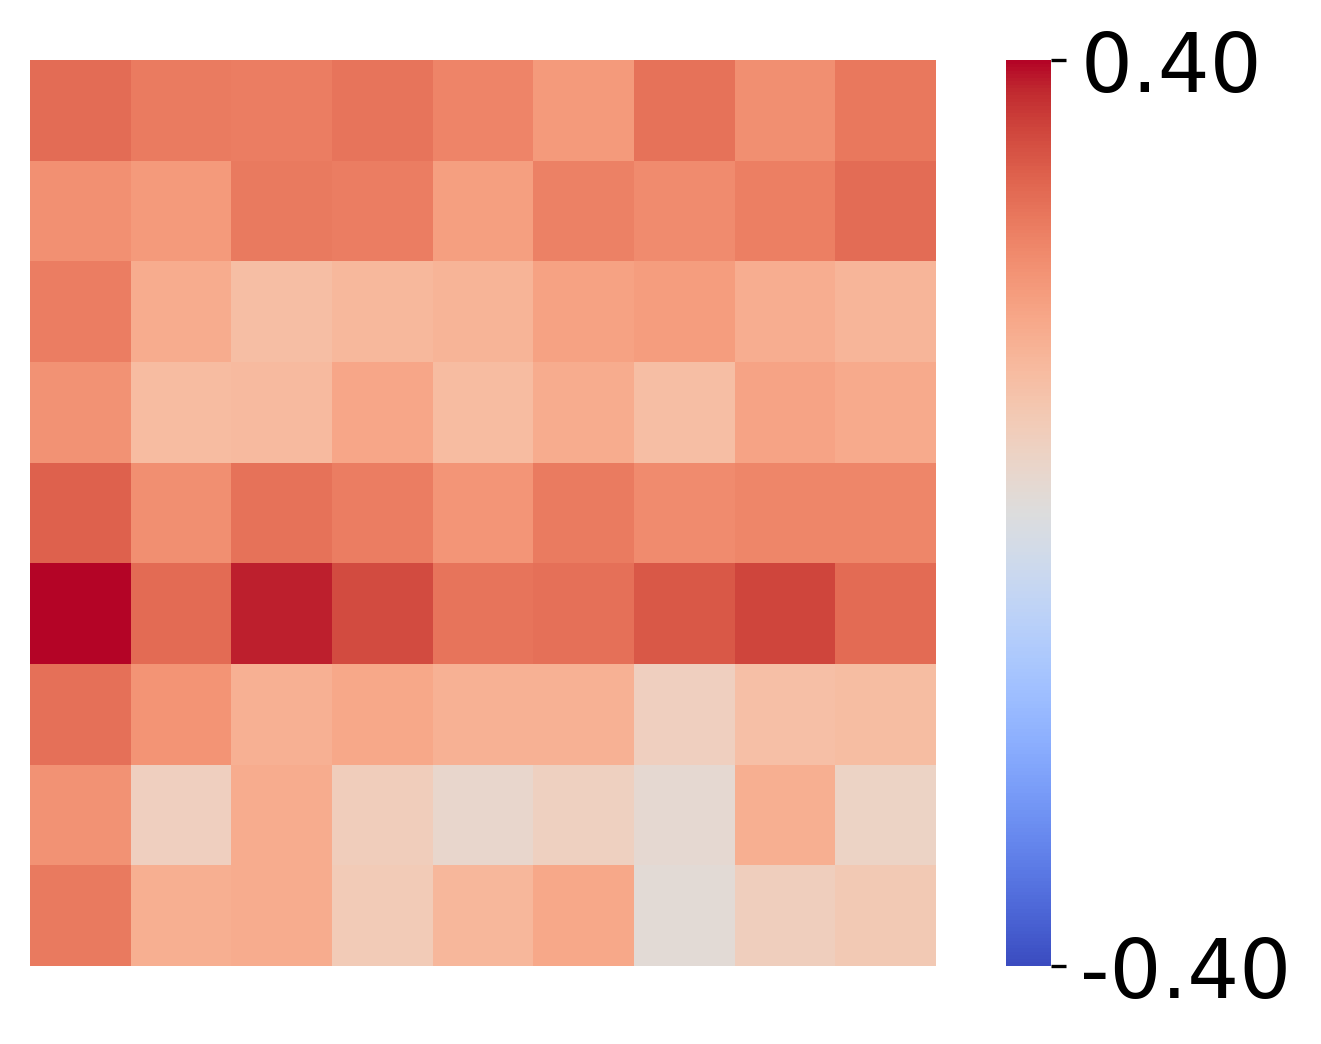

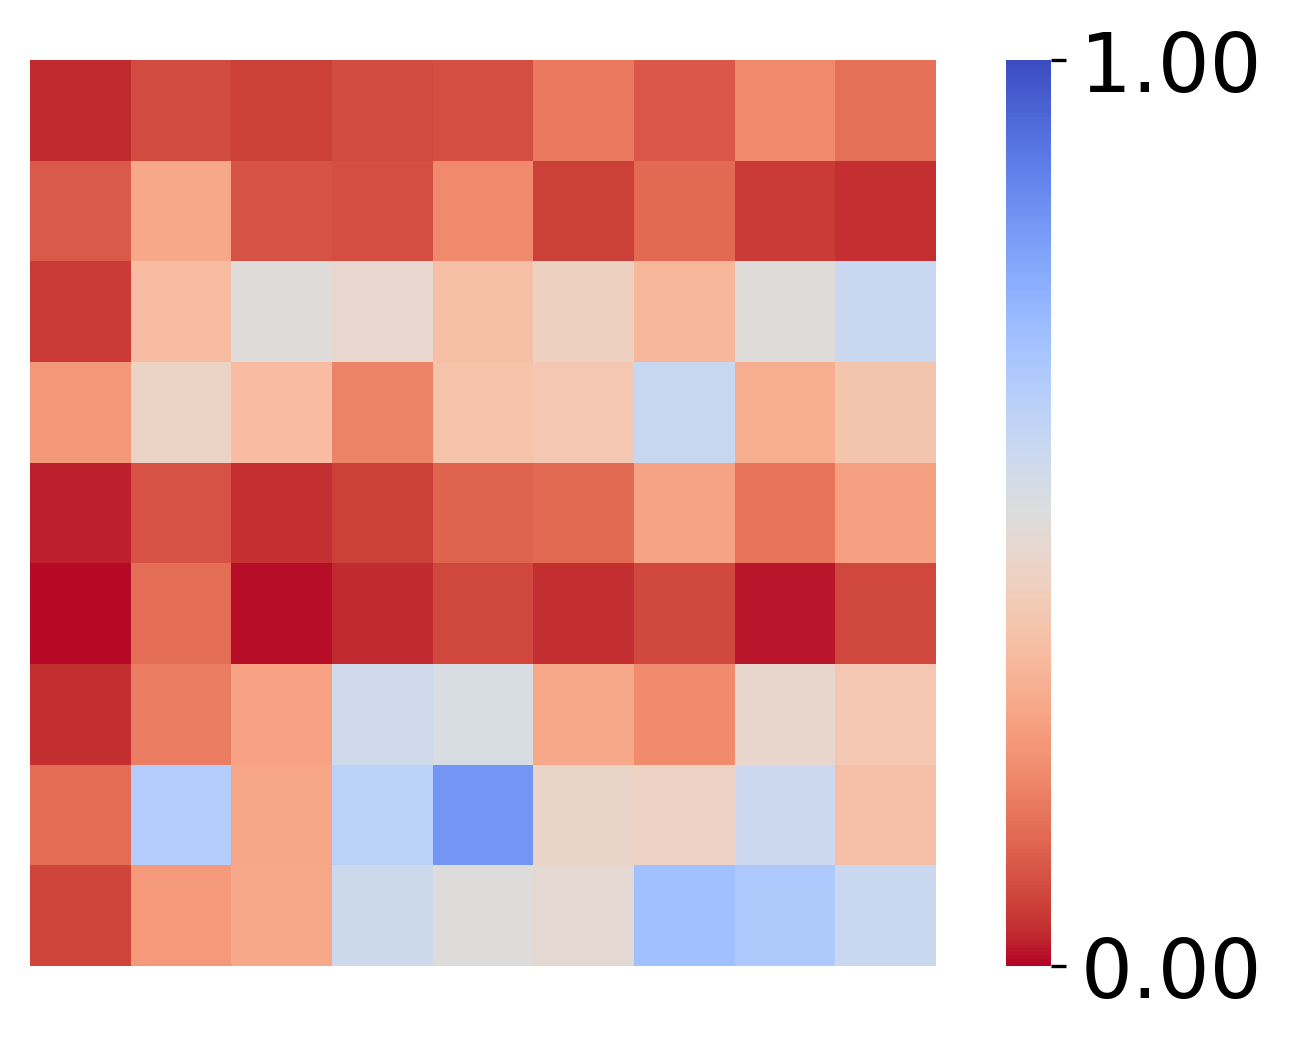

In [152]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(df['n_observes_day2'], df['n_sleeps_day3'], df['effs_day2'], df['effs_day3'], "Rewards Task 1", "Rewards Task 2", annot=False, groups=df['group_day1'], resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [153]:
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_humans_partialed.png'))
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_humans_partialed.svg'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_humans_partialed.png'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_humans_partialed.svg'))

corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_humans.svg'))

### Trait-Level Perturbations

In [154]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t1 as sim_timestamp

sim_rewss_t1, sim_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)
sim_rewss_t1 = sim_rewss_t1.mean(axis=0)
sim_obss_t1 = sim_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss_t1 = np.flip(sim_rewss_t1.T, axis=1)
sim_obss_t1 = np.flip(sim_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t2 as sim_timestamp

effs_sorted = effs = np.arange(0, 1.01, 0.125)

sim_rewss_t2, sim_obss_t2, sim_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)
sim_rewss_t2 = sim_rewss_t2.mean(axis=0)
sim_obss_t2 = sim_obss_t2.mean(axis=0)
sim_sleepss_t2 = sim_sleepss_t2.mean(axis=0)


## correcting for switching from tau to efficacy
sim_rewss_t2 = np.flip(sim_rewss_t2.T, axis=1)
sim_obss_t2 = np.flip(sim_obss_t2.T, axis=1)
sim_sleepss_t2 = np.flip(sim_sleepss_t2.T, axis=1)

(150, 9)


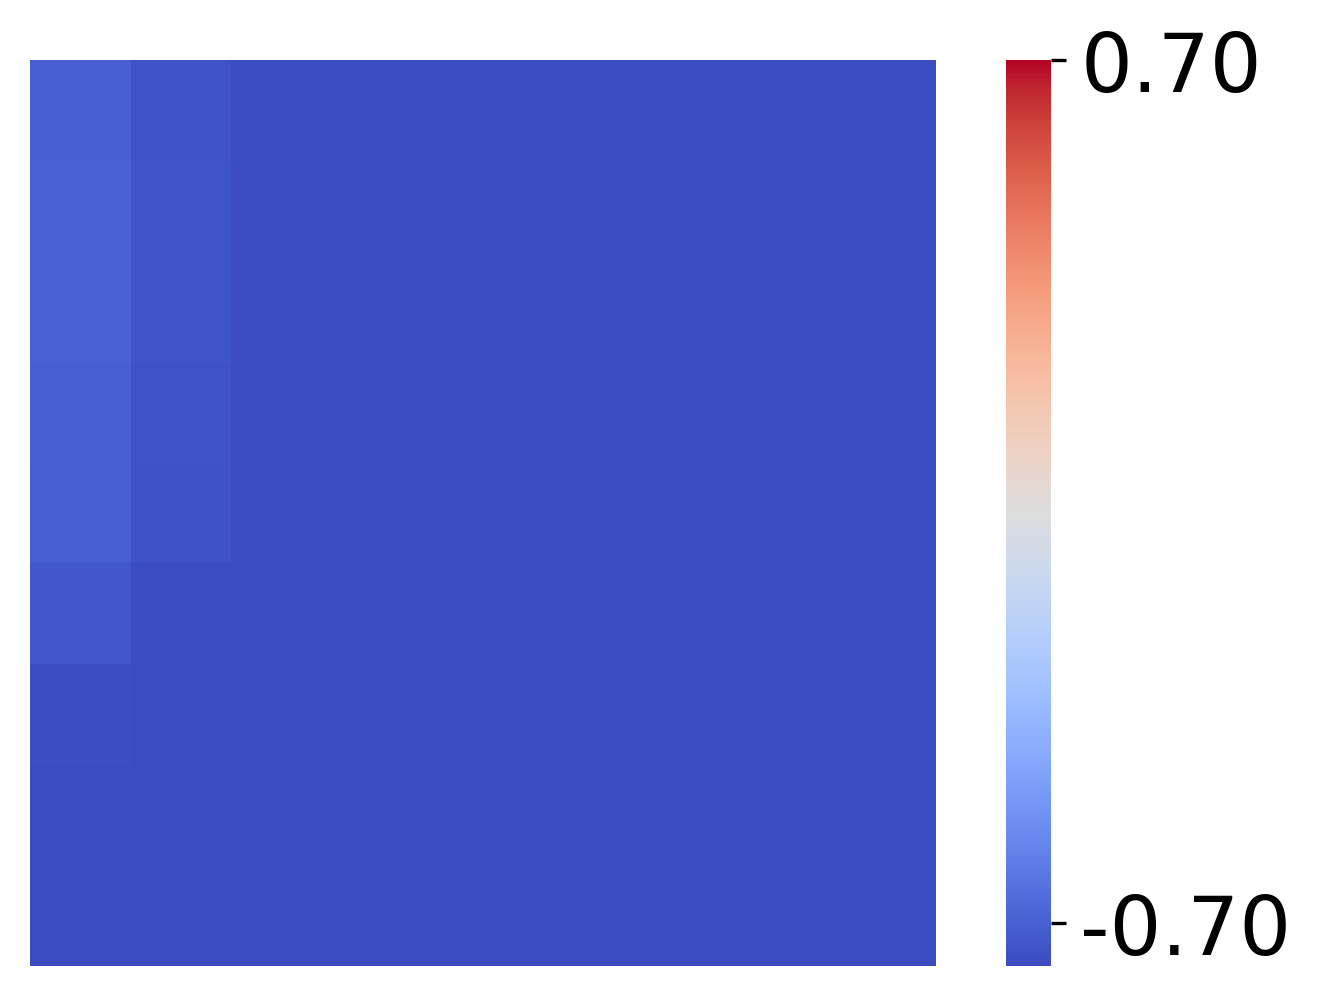

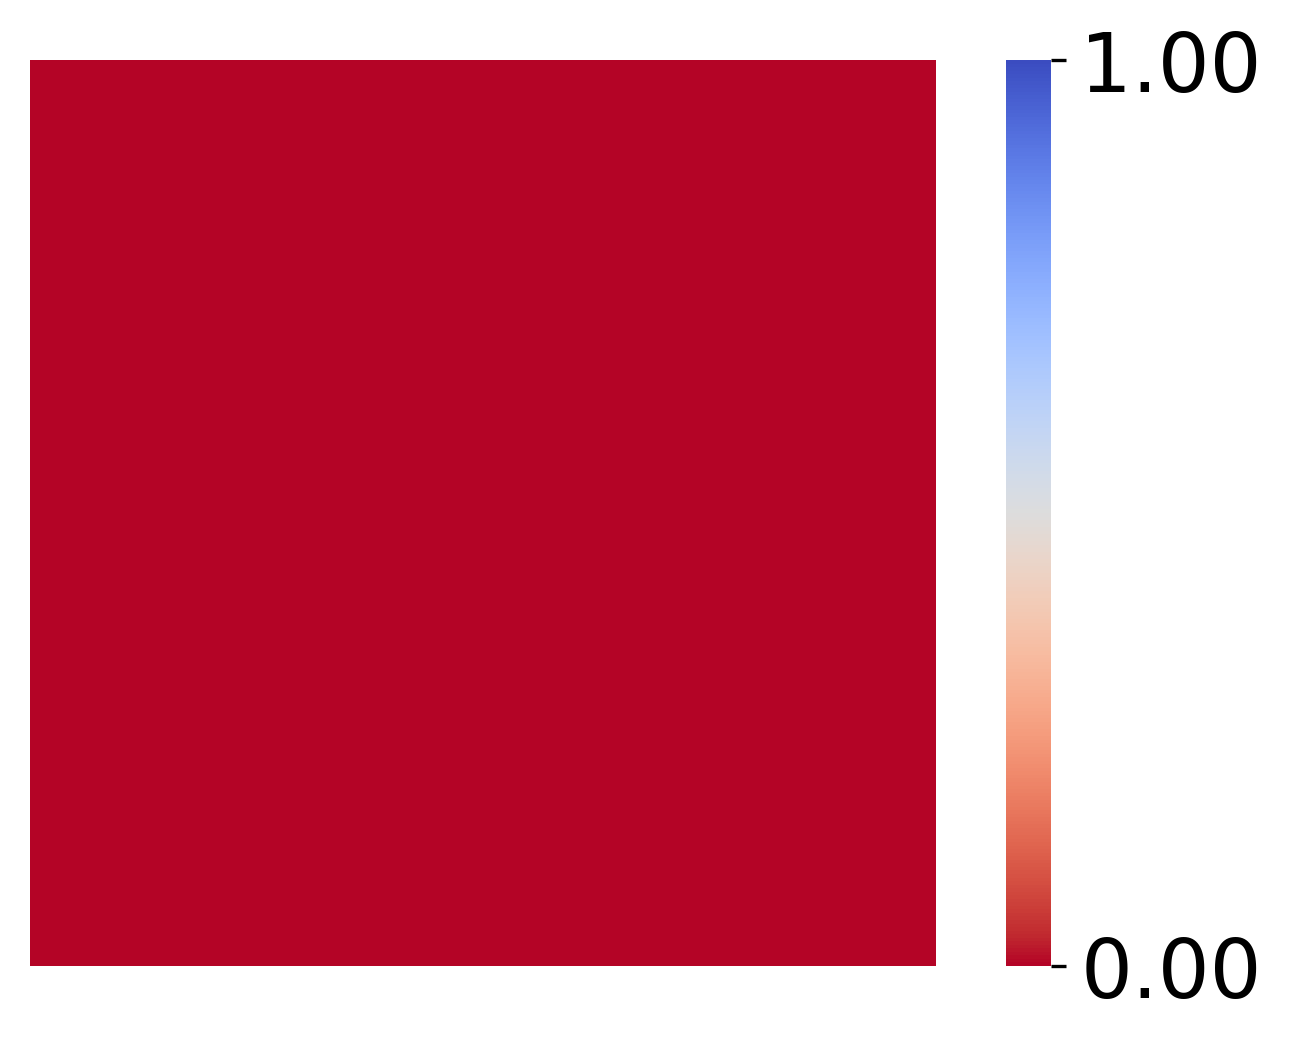

In [155]:
corr_fig, pvs_fig = compute_2D_correlation(sim_obss_t1, sim_sleepss_t2, effs_sorted, effs_sorted, "Rewards Task 1", "Rewards Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [156]:
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_trait_partialed.png'))
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_trait_partialed.svg'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_trait_partialed.png'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_trait_partialed.svg'))

corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_trait.svg'))

### Random Perturbation

In [157]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t1 as sim_timestamp

random_rewss_t1, random_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

random_rewss_t1 = random_rewss_t1.mean(axis=0)
random_obss_t1 = random_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss_t1 = np.flip(random_rewss_t1.T, axis=1)
random_obss_t1 = np.flip(random_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

random_rewss_t2, random_obss_t2, random_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

## post-hoc adjustment to get rid of relationship across tasks - TODO: resample cleanly
rng = np.random.default_rng()
random_rewss_t2 = rng.permuted(random_rewss_t2, axis=-1)
random_obss_t2 = rng.permuted(random_obss_t2, axis=-1)
random_sleepss_t2 = rng.permuted(random_sleepss_t2, axis=-1)

random_rewss_t2 = random_rewss_t2.mean(axis=0)
random_obss_t2 = random_obss_t2.mean(axis=0)
random_sleepss_t2 = random_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss_t2 = np.flip(random_rewss_t2.T, axis=1)
random_obss_t2 = np.flip(random_obss_t2.T, axis=1)
random_sleepss_t2 = np.flip(random_sleepss_t2.T, axis=1)

(150, 9)


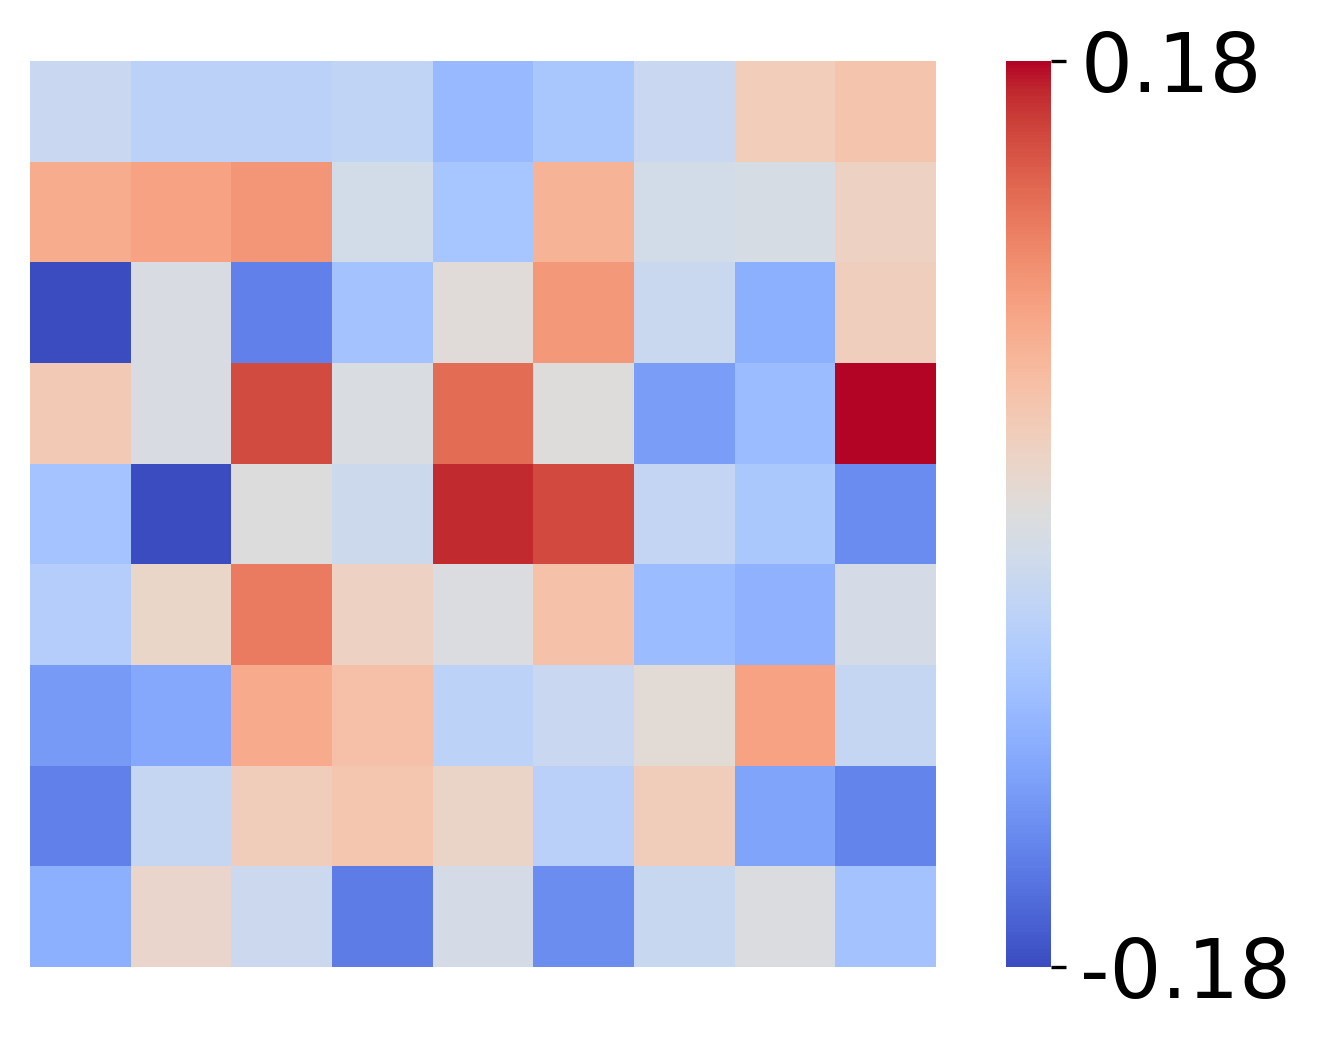

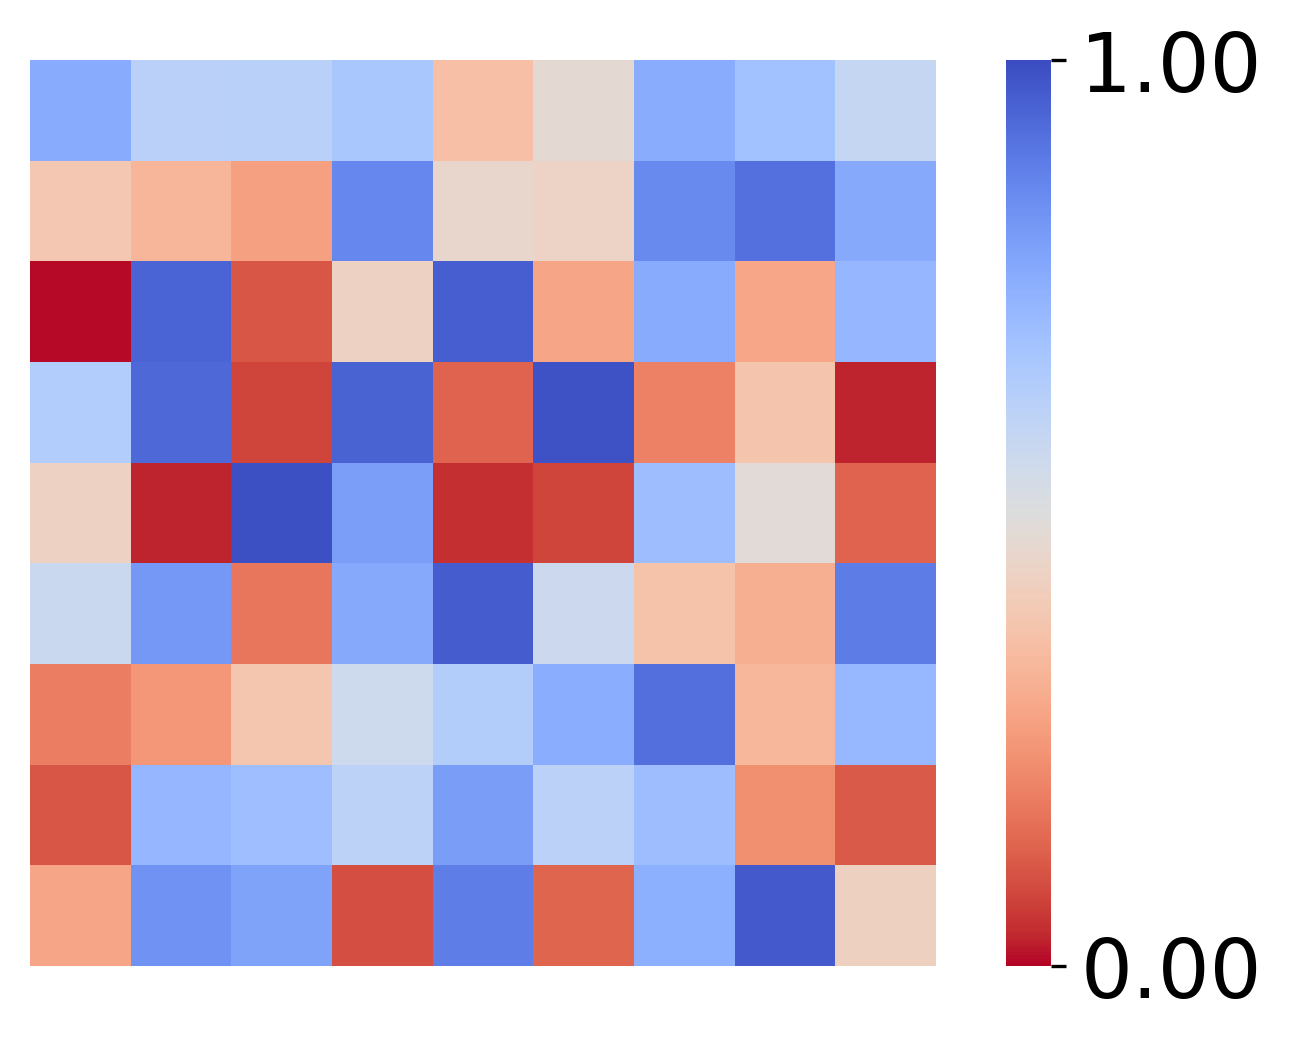

In [158]:
corr_fig, pvs_fig = compute_2D_correlation(random_obss_t1, random_sleepss_t2, effs, effs, "Rewards Task 1", "Rewards Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [159]:
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random_partialed.png'))
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random_partialed.svg'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random_partialed.png'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random_partialed.svg'))

corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random.svg'))

### Zeros Perturbations

In [160]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models

from settings_anal import zeros_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t1 as sim_timestamp

zeros_rewss_t1, zeros_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

zeros_rewss_t1 =zeros_rewss_t1.mean(axis=0)
zeros_obss_t1 = zeros_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss_t1 = np.flip(zeros_rewss_t1.T, axis=1)
zeros_obss_t1 = np.flip(zeros_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)
effs_sorted = np.arange(0, 1.01, 0.125)

zeros_rewss_t2, zeros_obss_t2,zeros_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

## TODO: Check to make sure this is no longer necessary
rng = np.random.default_rng()
zeros_rewss_t2 = rng.permuted(zeros_rewss_t2, axis=-1)
zeros_obss_t2 = rng.permuted(zeros_obss_t2, axis=-1)
zeros_sleepss_t2 = rng.permuted(zeros_sleepss_t2, axis=-1)

zeros_rewss_t2 = zeros_rewss_t2.mean(axis=0)
zeros_obss_t2 = zeros_obss_t2.mean(axis=0)
zeros_sleepss_t2 = zeros_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss_t2 = np.flip(zeros_rewss_t2.T, axis=1)
zeros_obss_t2 = np.flip(zeros_obss_t2.T, axis=1)
zeros_sleepss_t2 = np.flip(zeros_sleepss_t2.T, axis=1)

## QUARANTINED - IS THIS DUPLICATED?
# from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
# from settings_anal import pepe_human_ape_models as ape_models

# from settings_anal import zeros_simulated_participants_folder_t1 as simulated_participants_folder
# from settings_anal import zeros_sim_timestamp_t1 as sim_timestamp

# zeros_rewss_t1, zeros_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

# zeros_rewss_t1 =zeros_rewss_t1.mean(axis=0)
# zeros_obss_t1 = zeros_obss_t1.mean(axis=0)

# ## correcting for switching from tau to efficacy
# zeros_rewss_t1 = np.flip(zeros_rewss_t1.T, axis=1)
# zeros_obss_t1 = np.flip(zeros_obss_t1.T, axis=1)

# from settings_anal import levc_human_ape_models as ape_models
# from settings_anal import zeros_simulated_participants_folder_t2 as simulated_participants_folder
# from settings_anal import zeros_sim_timestamp_t2 as sim_timestamp

# effs = np.arange(0, 1.01, 0.125)
# effs_sorted = np.arange(0, 1.01, 0.125)

# zeros_rewss_t2, zeros_obss_t2,zeros_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

# ## TODO: Check to make sure this is no longer necessary
# rng = np.random.default_rng()
# zeros_rewss_t2 = rng.permuted(zeros_rewss_t2, axis=-1)
# zeros_obss_t2 = rng.permuted(zeros_obss_t2, axis=-1)
# zeros_sleepss_t2 = rng.permuted(zeros_sleepss_t2, axis=-1)

# zeros_rewss_t2 = zeros_rewss_t2.mean(axis=0)
# zeros_obss_t2 = zeros_obss_t2.mean(axis=0)
# zeros_sleepss_t2 = zeros_sleepss_t2.mean(axis=0)

# ## correcting for switching from tau to efficacy
# zeros_rewss_t2 = np.flip(zeros_rewss_t2.T, axis=1)
# zeros_obss_t2 = np.flip(zeros_obss_t2.T, axis=1)
# zeros_sleepss_t2 = np.flip(zeros_sleepss_t2.T, axis=1)

(150, 9)


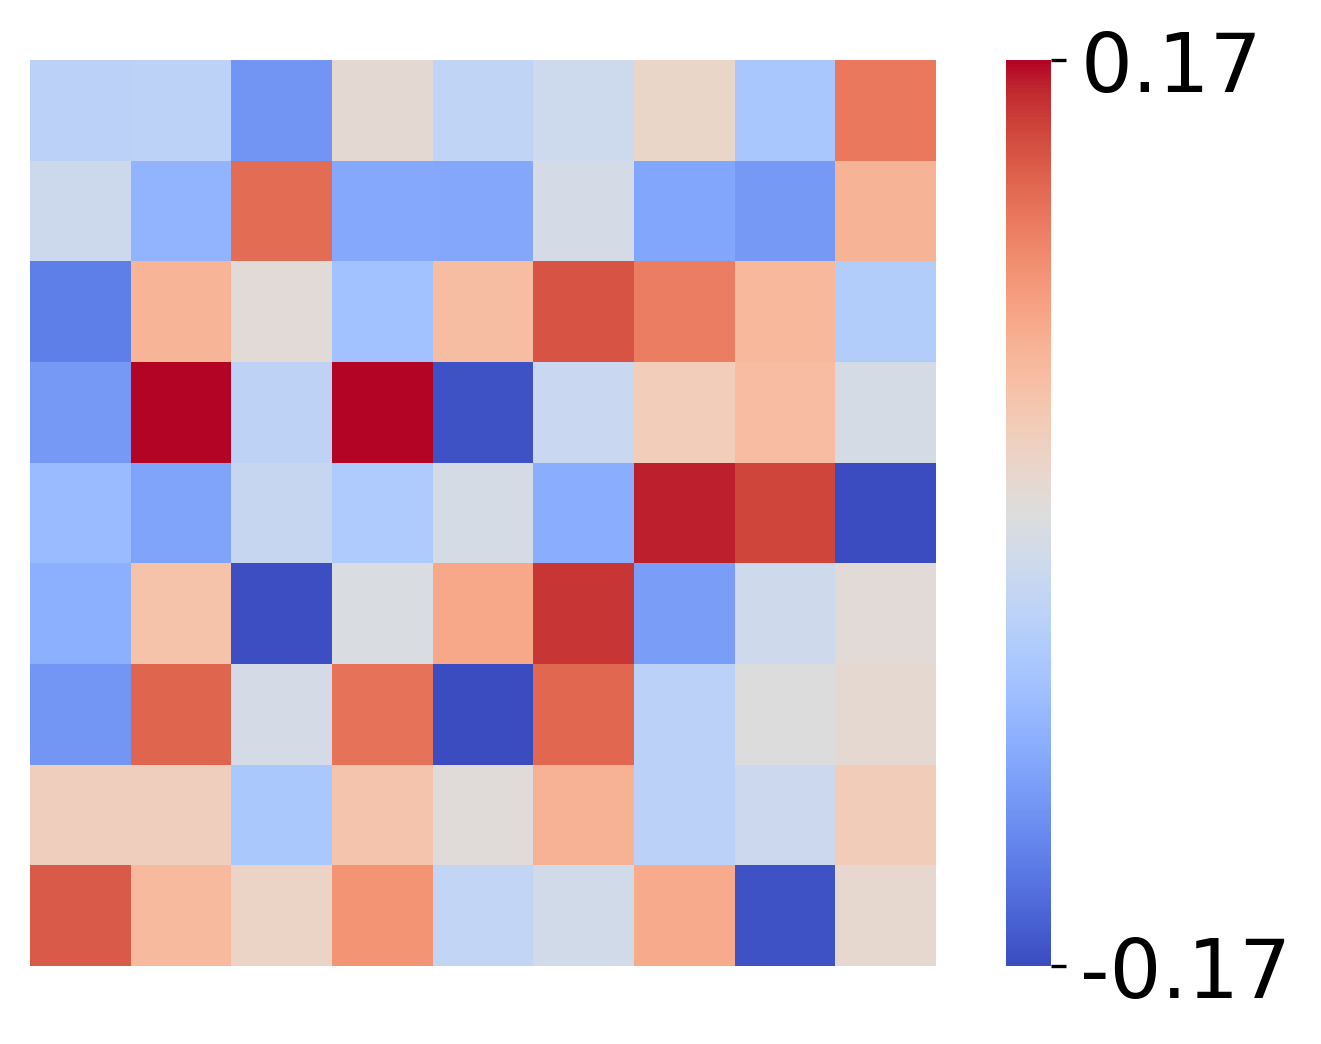

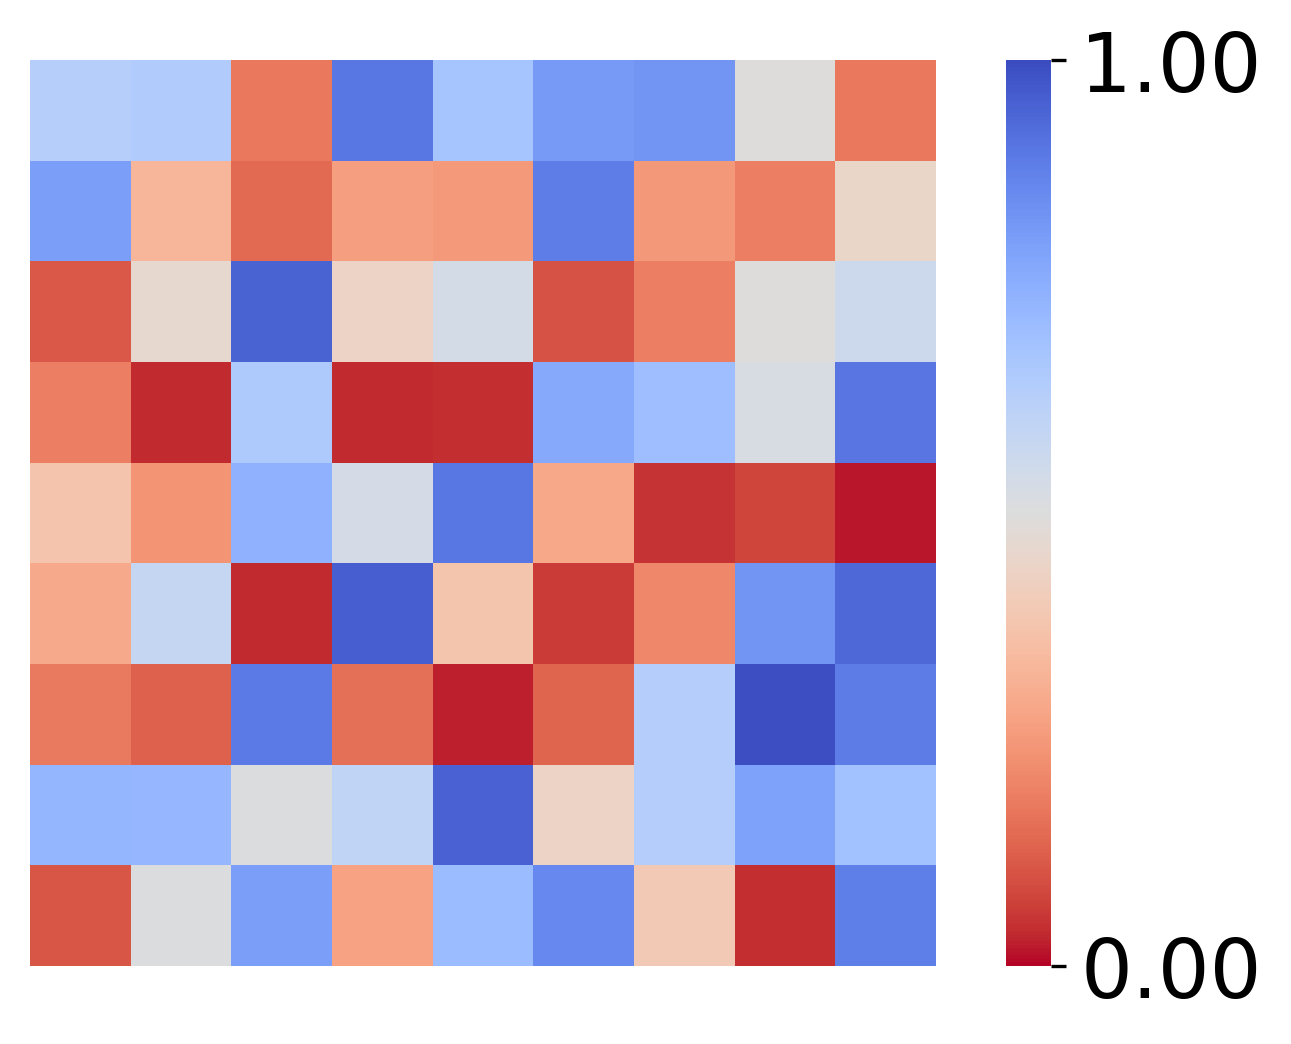

In [161]:
corr_fig, pvs_fig = compute_2D_correlation(zeros_obss_t1, zeros_sleepss_t2, effs, effs, "Rewards Task 1", "Rewards Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [162]:
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_zeros_partialed.png'))
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_zeros_partialed.svg'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_zeros_partialed.png'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_zeros_partialed.svg'))

corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_zeros.svg'))

### Stats

## Panel F: Across Tasks Observations
### Humans

In [163]:
from human_utils_project import get_clean_data

day = 'day3'
exp_date = '24-01-22-29'

group = None

human_data_file_base = '/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis'

df_day1, effs_train_day1, effs_test_day1, test_start_day1 = get_clean_data(day=1, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group= group, file_base=human_data_file_base)
df_day2, effs_train_day2, effs_test_day2, test_start_day2 = get_clean_data(day=2, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)
df_day3, effs_train_day3, effs_test_day3, test_start_day3 = get_clean_data(day=3, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)
effs = np.arange(0, 1.01, 0.125)
n_steps = 50

## WITH INNER JOIN SO THAT ONLY ROWS FROM ALL THREE DAYS ARE KEPT
df = df_day1.join(df_day2, how='outer', lsuffix='_day1', rsuffix='_day2')
df = df.join(df_day3.rename(columns=lambda x: f"{x}_day3"), how='inner')


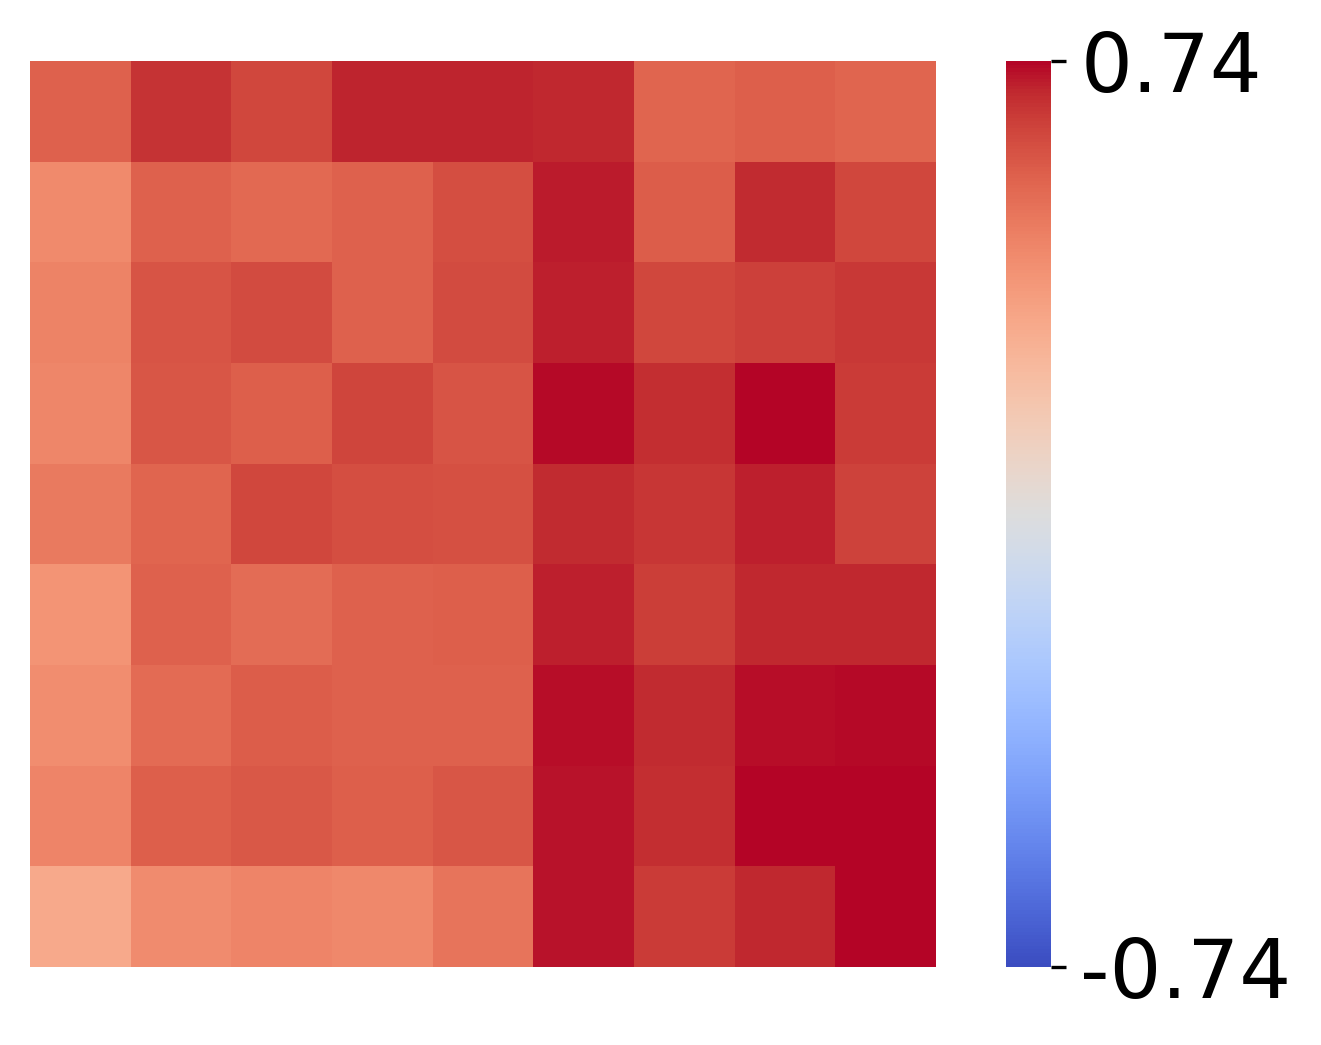

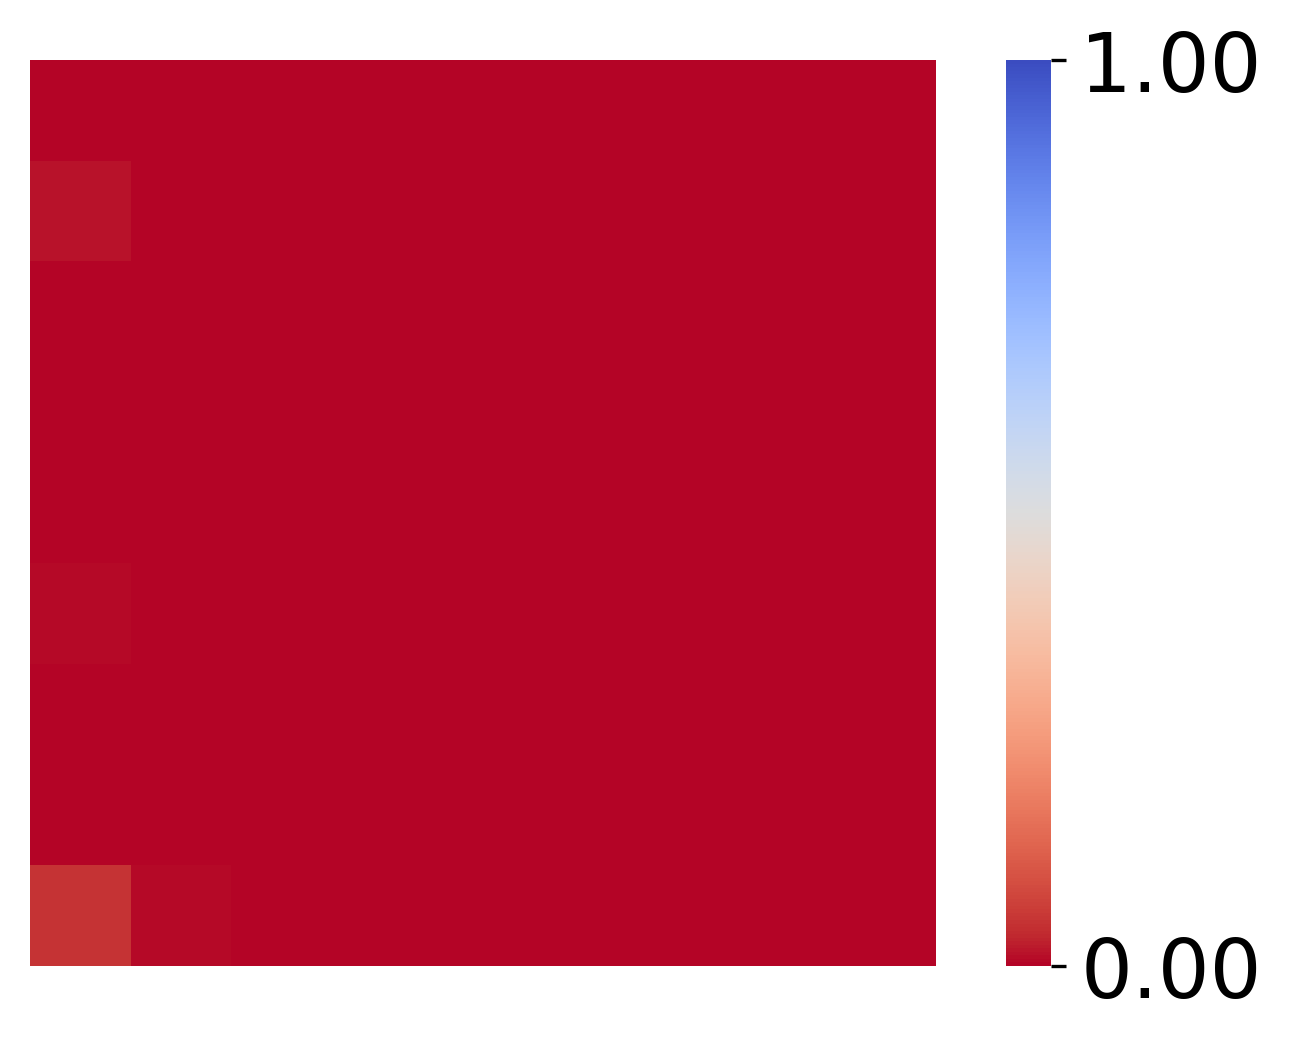

In [164]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(df['n_observes_day2'], df['n_observes_day3'], df['effs_day2'], df['effs_day3'], "Observes Task 1", "Observes Task 2", annot=False, groups=df['group_day1'], resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [165]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_humans.svg'))

### Trait-level Perturbations

In [166]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models

from settings_anal import trait_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t1 as sim_timestamp

sim_rewss_t1, sim_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)
sim_rewss_t1 = sim_rewss_t1.mean(axis=0)
sim_obss_t1 = sim_obss_t1.mean(axis=0)


## correcting for switching from tau to efficacy
sim_rewss_t1 = np.flip(sim_rewss_t1.T, axis=1)
sim_obss_t1 = np.flip(sim_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models

from settings_anal import trait_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t2 as sim_timestamp

sim_rewss_t2, sim_obss_t2, sim_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)
sim_rewss_t2 = sim_rewss_t2.mean(axis=0)
sim_obss_t2 = sim_obss_t2.mean(axis=0)
sim_sleepss_t2 = sim_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss_t2 = np.flip(sim_rewss_t2.T, axis=1)
sim_obss_t2 = np.flip(sim_obss_t2.T, axis=1)
sim_sleepss_t2 = np.flip(sim_sleepss_t2.T, axis=1)

effs_sorted = np.arange(0, 1.01, 0.125)

(150, 9)


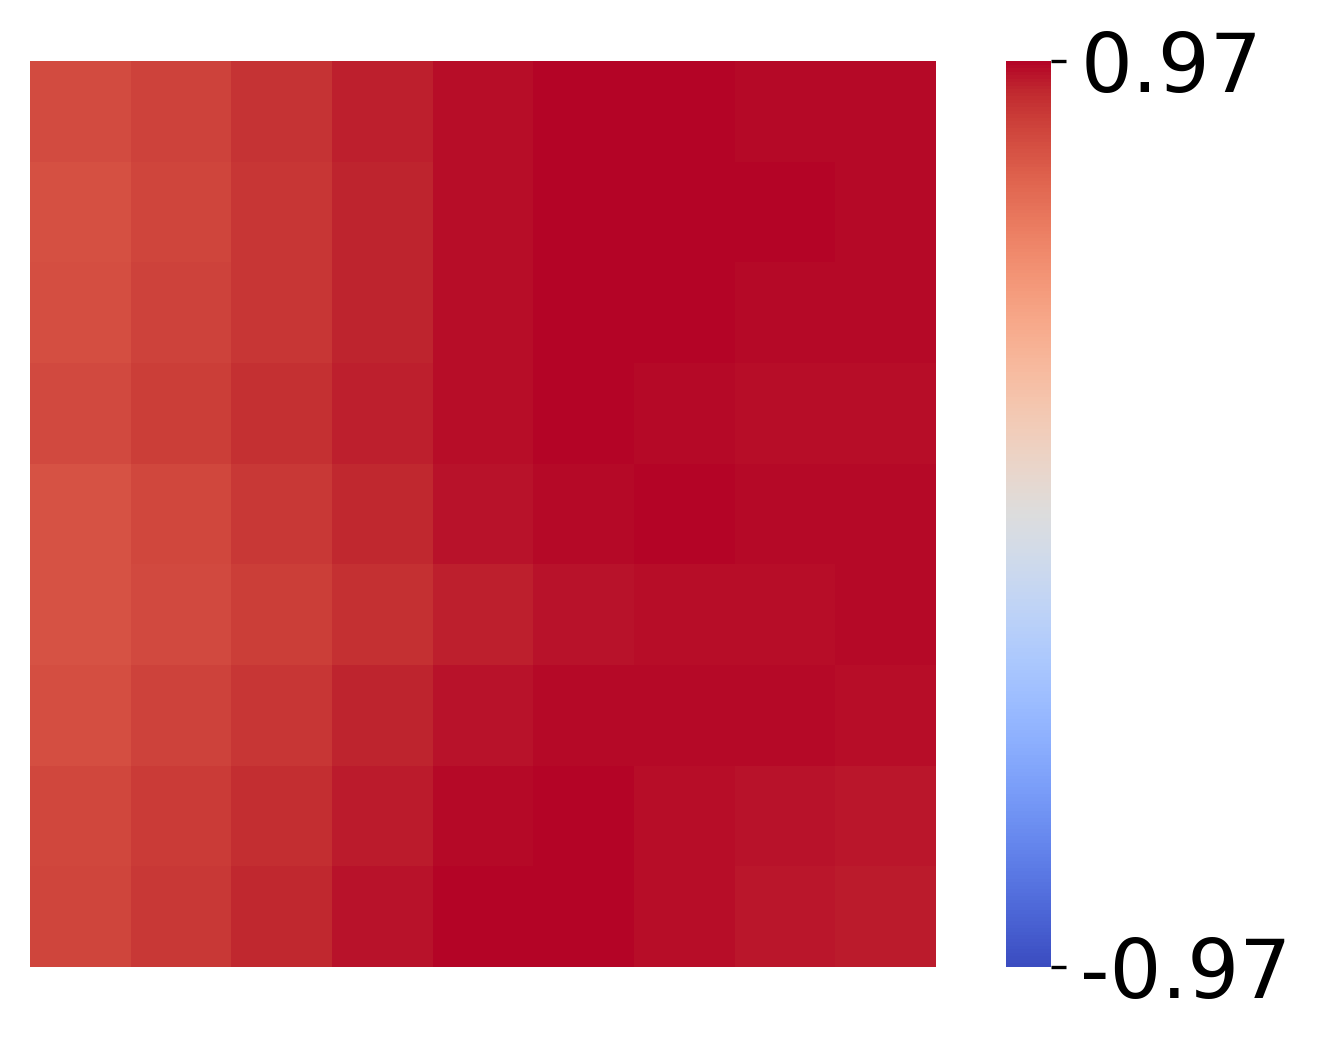

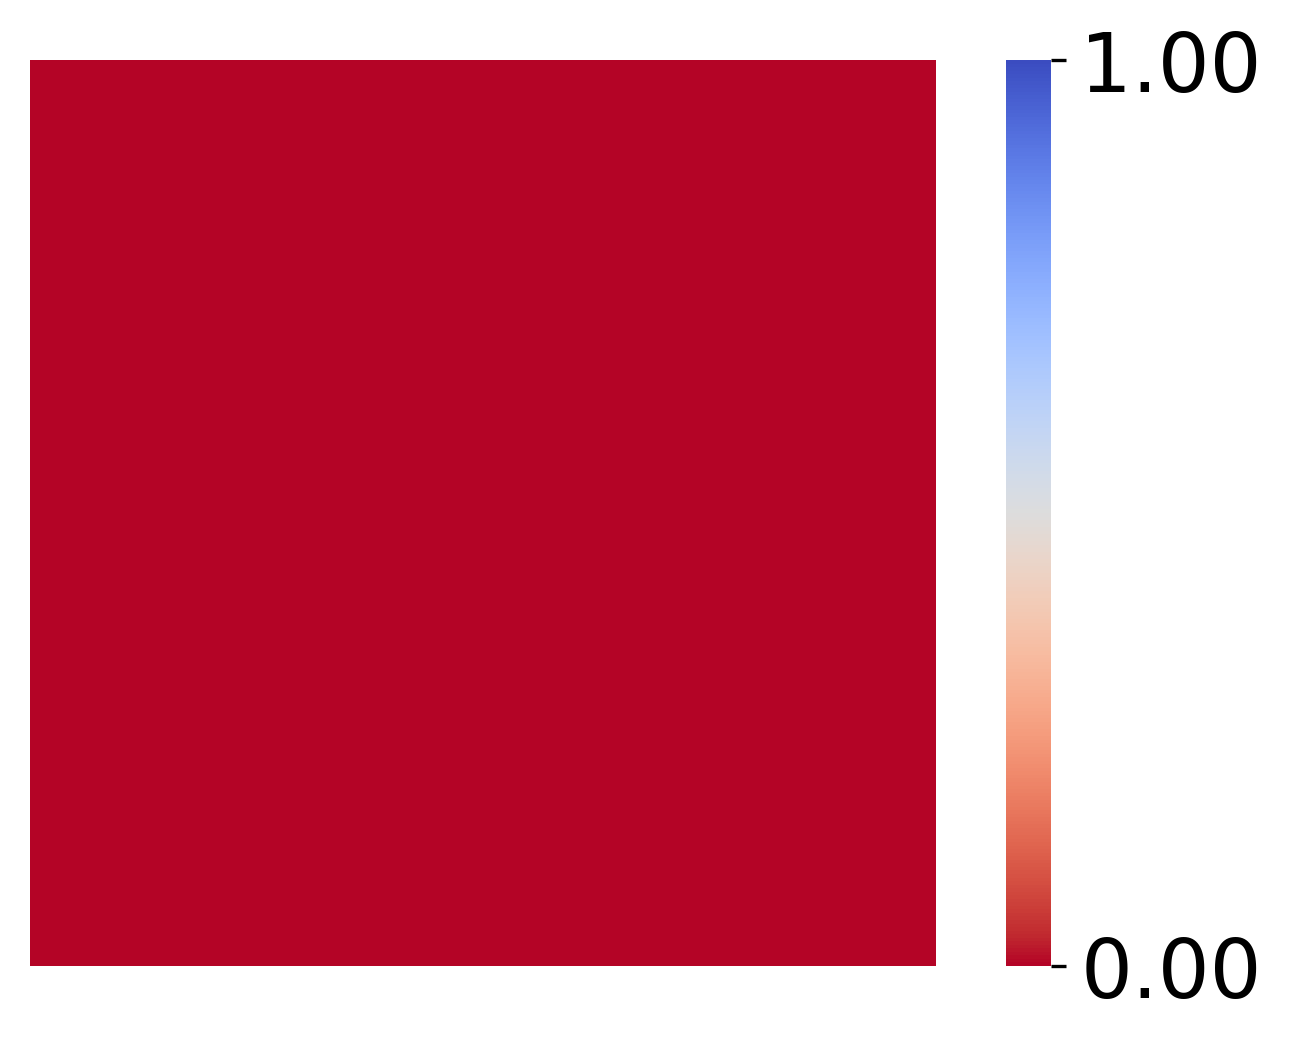

In [167]:
corr_fig, pvs_fig = compute_2D_correlation(sim_obss_t1, sim_obss_t2, effs_sorted, effs_sorted, "Observations Task 1", "Observations Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [168]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_trait.svg'))

### Random Perturbations

In [169]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t1 as sim_timestamp

random_rewss_t1, random_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

random_rewss_t1 = random_rewss_t1.mean(axis=0)
random_obss_t1 = random_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss_t1 = np.flip(random_rewss_t1.T, axis=1)
random_obss_t1 = np.flip(random_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

random_rewss_t2, random_obss_t2, random_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

## post-hoc adjustment to get rid of relationship across tasks - TODO: resample cleanly
rng = np.random.default_rng()
random_rewss_t2 = rng.permuted(random_rewss_t2, axis=-1)
random_obss_t2 = rng.permuted(random_obss_t2, axis=-1)
random_sleepss_t2 = rng.permuted(random_sleepss_t2, axis=-1)

random_rewss_t2 = random_rewss_t2.mean(axis=0)
random_obss_t2 = random_obss_t2.mean(axis=0)
random_sleepss_t2 = random_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss_t2 = np.flip(random_rewss_t2.T, axis=1)
random_obss_t2 = np.flip(random_obss_t2.T, axis=1)
random_sleepss_t2 = np.flip(random_sleepss_t2.T, axis=1)

(150, 9)


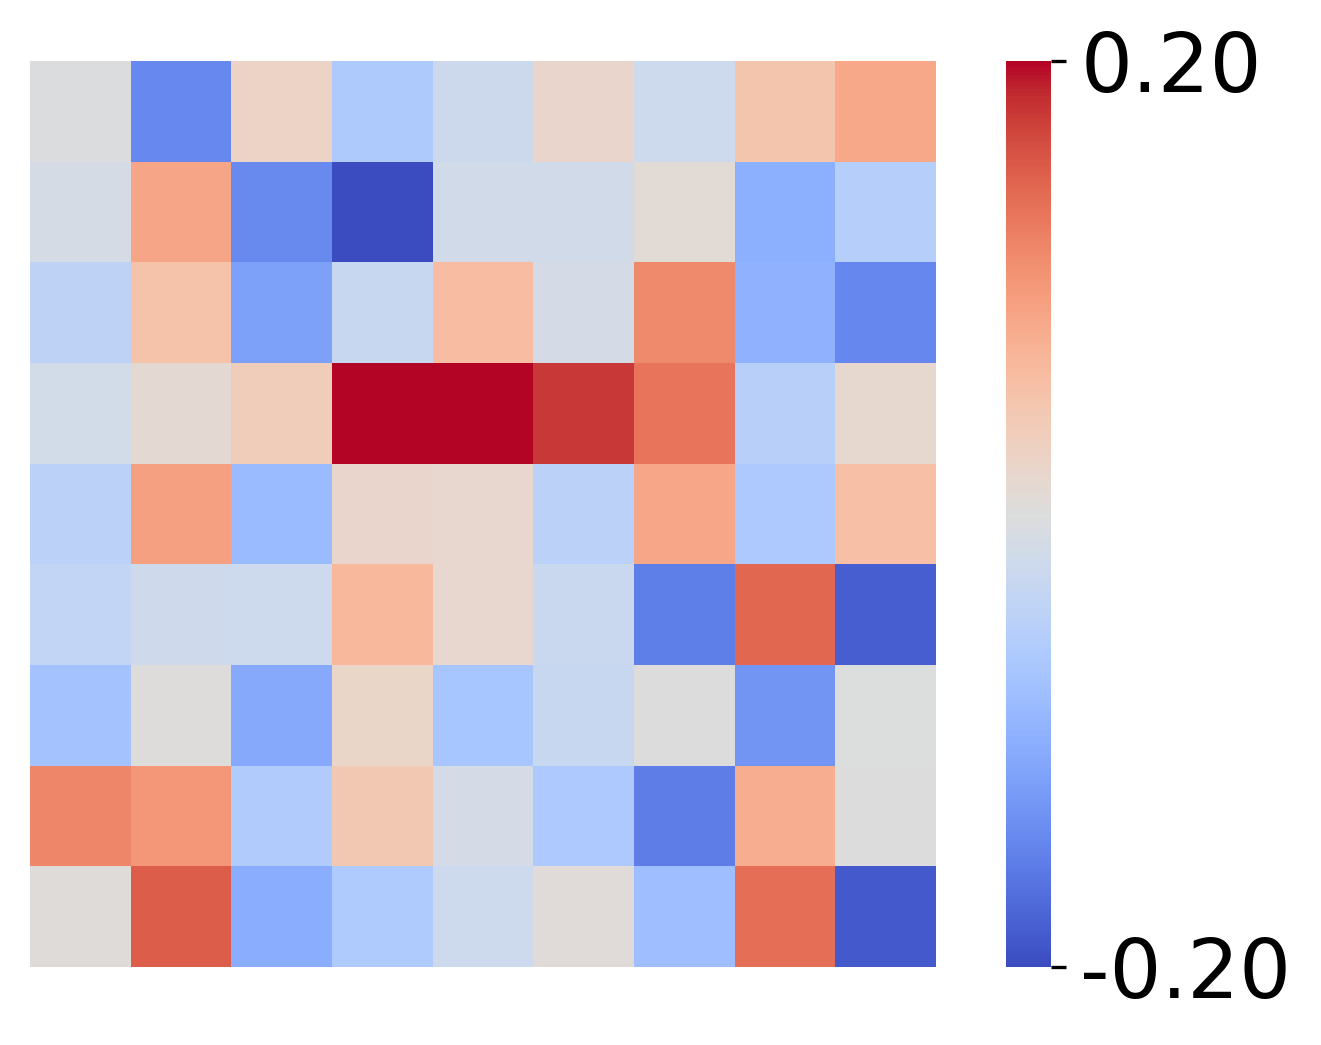

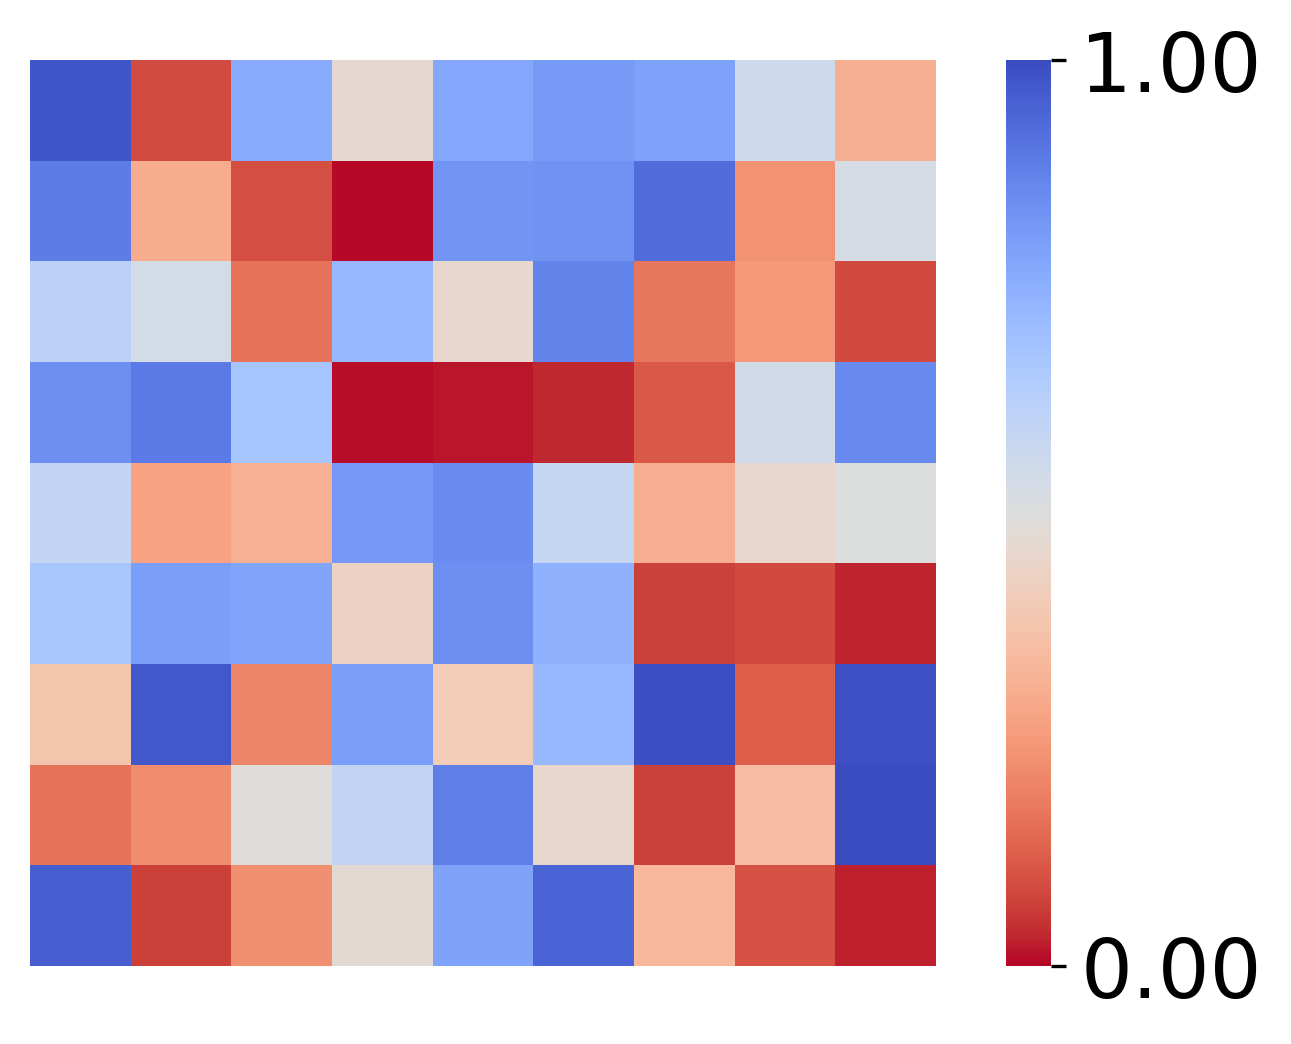

In [170]:
corr_fig, pvs_fig = compute_2D_correlation(random_obss_t1, random_obss_t2, effs_sorted, effs_sorted, "Observations Task 1", "Observations Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [171]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_random.svg'))

### Zeros Perturbations

In [172]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models

from settings_anal import zeros_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t1 as sim_timestamp

zeros_rewss_t1, zeros_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

zeros_rewss_t1 =zeros_rewss_t1.mean(axis=0)
zeros_obss_t1 = zeros_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss_t1 = np.flip(zeros_rewss_t1.T, axis=1)
zeros_obss_t1 = np.flip(zeros_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)
effs_sorted = np.arange(0, 1.01, 0.125)

zeros_rewss_t2, zeros_obss_t2,zeros_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

## TODO: Check to make sure this is no longer necessary
rng = np.random.default_rng()
zeros_rewss_t2 = rng.permuted(zeros_rewss_t2, axis=-1)
zeros_obss_t2 = rng.permuted(zeros_obss_t2, axis=-1)
zeros_sleepss_t2 = rng.permuted(zeros_sleepss_t2, axis=-1)

zeros_rewss_t2 = zeros_rewss_t2.mean(axis=0)
zeros_obss_t2 = zeros_obss_t2.mean(axis=0)
zeros_sleepss_t2 = zeros_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss_t2 = np.flip(zeros_rewss_t2.T, axis=1)
zeros_obss_t2 = np.flip(zeros_obss_t2.T, axis=1)
zeros_sleepss_t2 = np.flip(zeros_sleepss_t2.T, axis=1)

(150, 9)


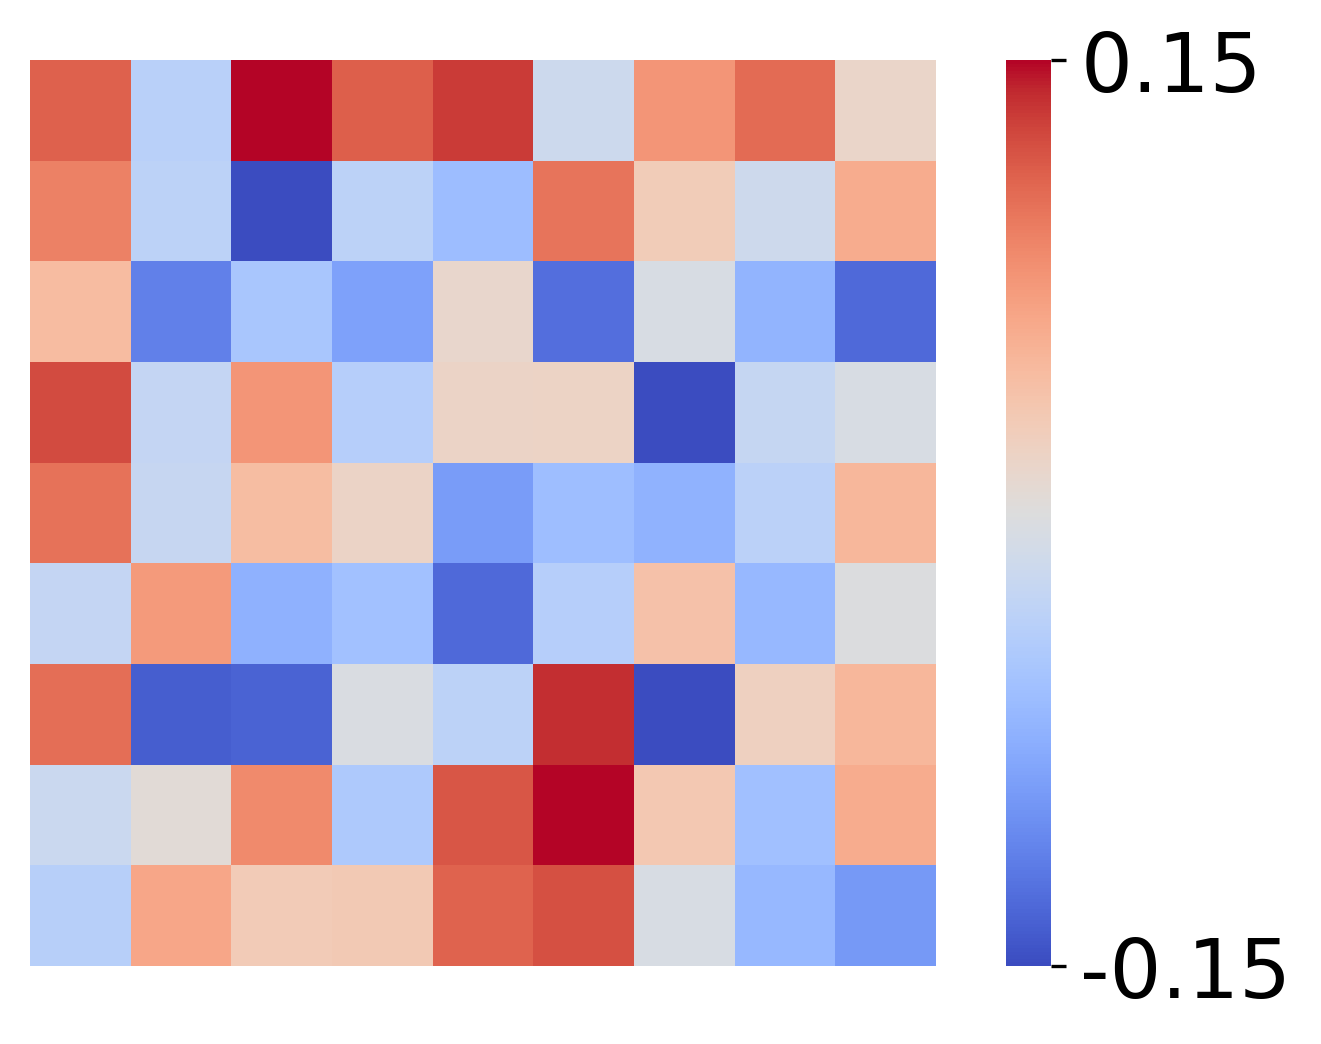

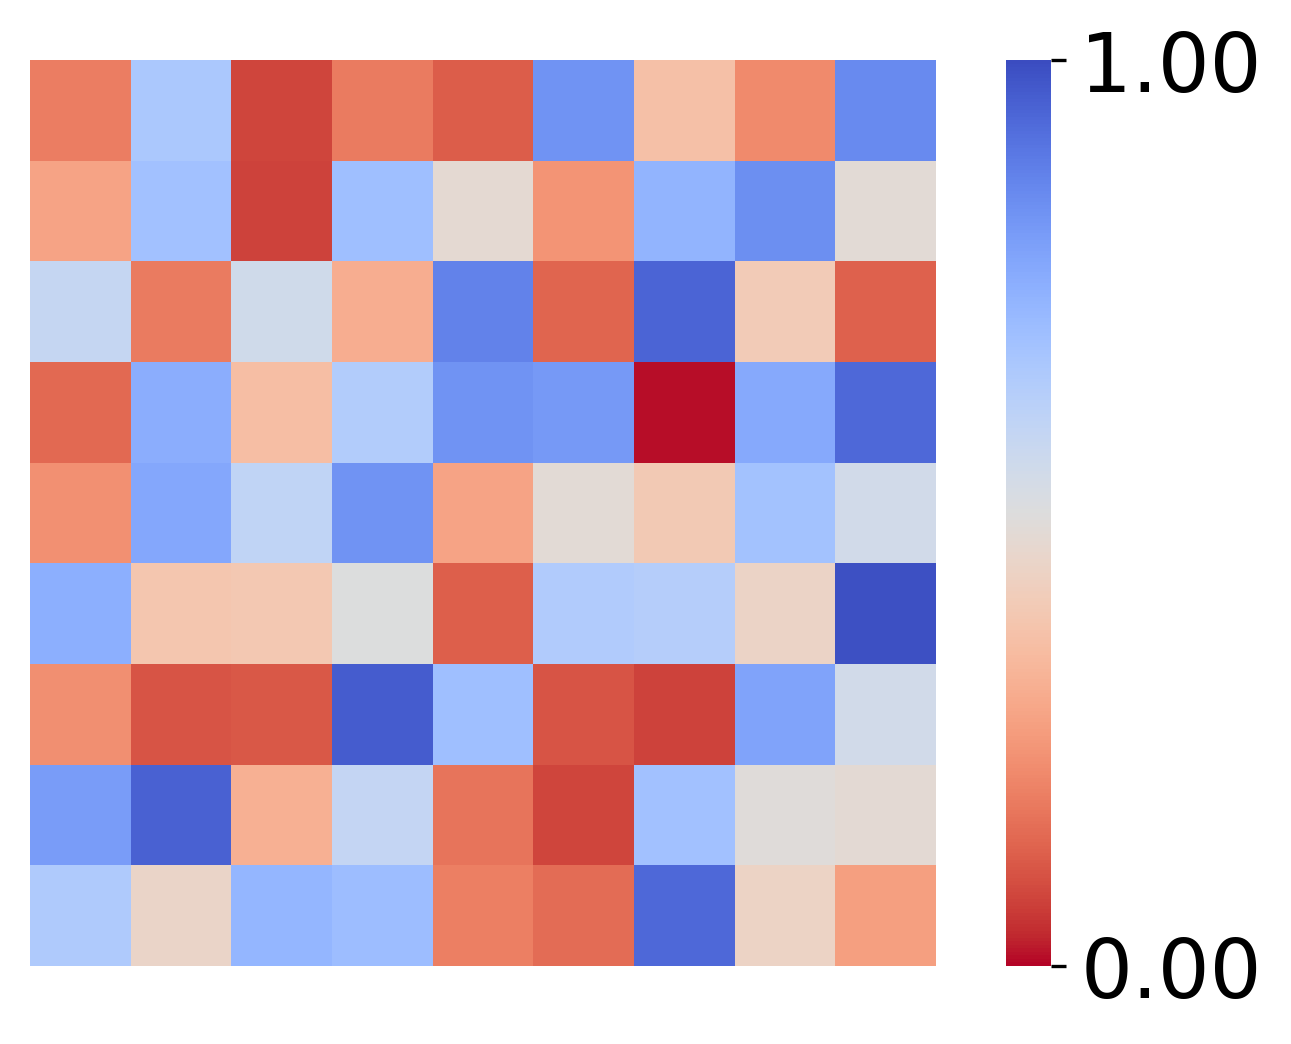

In [173]:
corr_fig, pvs_fig = compute_2D_correlation(zeros_obss_t1, zeros_obss_t2, effs_sorted, effs_sorted, "Observations Task 1", "Observations Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [174]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_zeros.svg'))

### Stats 

In [175]:
from human_utils_behavioral_analysis import compute_2D_correlation_matrices, compute_partial_2D_correlation_matrices

## day 2
data_obs_corr_g1, data_obs_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group_day2']]['n_observes_day2'].values), np.stack(df[~df['group_day2']]['n_observes_day3'].values), np.stack(df[~df['group_day2']]['effs_day2'].values), np.stack(df[~df['group_day3']]['effs_day3'].values),)
data_obs_corr_g2, data_obs_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group_day2']]['n_observes_day2'].values), np.stack(df[df['group_day2']]['n_observes_day3'].values), np.stack(df[df['group_day2']]['effs_day2'].values), np.stack(df[df['group_day3']]['effs_day3'].values),)

data_rews_corr_g1, data_rews_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group_day2']]['rewards_tallies_day2'].values), np.stack(df[~df['group_day2']]['rewards_tallies_day3'].values), np.stack(df[~df['group_day2']]['effs_day2'].values), np.stack(df[~df['group_day3']]['effs_day3'].values),)
data_rews_corr_g2, data_rews_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group_day2']]['rewards_tallies_day2'].values), np.stack(df[df['group_day2']]['rewards_tallies_day3'].values), np.stack(df[df['group_day2']]['effs_day2'].values), np.stack(df[df['group_day3']]['effs_day3'].values),)

data_obs_corr = (~df['group_day2']).sum() / len(df) * data_obs_corr_g1 + (df['group_day2']).sum() / len(df) * data_obs_corr_g2
data_obs_pvs = (~df['group_day2']).sum() / len(df) * data_obs_pvs_g1 + (df['group_day2']).sum() / len(df) * data_obs_pvs_g2

data_rews_corr = (~df['group_day2']).sum() / len(df) * data_rews_corr_g1 + (df['group_day2']).sum() / len(df) * data_rews_corr_g2
data_rews_pvs = (~df['group_day2']).sum() / len(df) * data_rews_pvs_g1 + (df['group_day2']).sum() / len(df) * data_rews_pvs_g2

data_sleeps_corr_g1, data_sleeps_pvs_g1 = compute_partial_2D_correlation_matrices(np.stack(df[~df['group_day2']]['n_observes_day2'].values), np.stack(df[~df['group_day2']]['n_sleeps_day3'].values), np.stack(df[~df['group_day2']]['n_observes_day3'].values), np.stack(df[~df['group_day2']]['effs_day2'].values), np.stack(df[~df['group_day2']]['effs_day3'].values), np.stack(df[~df['group_day2']]['effs_day3'].values),)
data_sleeps_corr_g2, data_sleeps_pvs_g2 = compute_partial_2D_correlation_matrices(np.stack(df[df['group_day2']]['n_observes_day2'].values), np.stack(df[df['group_day2']]['n_sleeps_day3'].values), np.stack(df[df['group_day2']]['n_observes_day3'].values), np.stack(df[df['group_day2']]['effs_day2'].values), np.stack(df[df['group_day2']]['effs_day3'].values),np.stack(df[df['group_day2']]['effs_day3'].values), )

data_sleeps_corr = (~df['group_day2']).sum() / len(df) * data_sleeps_corr_g1 + (df['group_day2']).sum() / len(df) * data_sleeps_corr_g2
data_sleeps_pvs = (~df['group_day2']).sum() / len(df) * data_sleeps_pvs_g1 + (df['group_day2']).sum() / len(df) * data_sleeps_pvs_g2

sim_obs_corr, sim_obs_pvs = compute_2D_correlation_matrices(sim_obss_t1, sim_obss_t2, effs, effs,)
sim_rews_corr, sim_rews_pvs = compute_2D_correlation_matrices(sim_rewss_t1, sim_rewss_t2, effs, effs,)
sim_sleeps_corr, sim_sleeps_pvs = compute_partial_2D_correlation_matrices(sim_obss_t1, sim_sleepss_t2, sim_obss_t2, effs_sorted, effs_sorted, effs_sorted, semi=False,)
random_obs_corr, random_obs_pvs = compute_2D_correlation_matrices(random_obss_t1, random_obss_t2, effs, effs,)
random_rews_corr, random_rews_pvs = compute_2D_correlation_matrices(random_rewss_t1, random_rewss_t2, effs, effs,)
random_sleeps_corr, random_sleeps_pvs = compute_partial_2D_correlation_matrices(random_obss_t1, random_sleepss_t2, random_obss_t2, effs_sorted, effs_sorted, effs_sorted, semi=False,)

(46, 9)
(65, 9)
(46, 9)
(65, 9)
(46, 9)
          n        r          CI95%    p-val
pearson  46  0.16779  [-0.13, 0.44]  0.27058
          n         r          CI95%     p-val
pearson  46  0.150584  [-0.15, 0.43]  0.323462
          n         r         CI95%    p-val
pearson  46  0.094526  [-0.2, 0.38]  0.53681
          n         r          CI95%     p-val
pearson  46 -0.085092  [-0.37, 0.21]  0.578374
          n         r          CI95%     p-val
pearson  46  0.185669  [-0.11, 0.45]  0.222046
          n         r          CI95%     p-val
pearson  46  0.275501  [-0.02, 0.53]  0.066991
          n         r          CI95%     p-val
pearson  46  0.113613  [-0.19, 0.39]  0.457417
          n         r          CI95%     p-val
pearson  46  0.135381  [-0.16, 0.41]  0.375241
          n         r          CI95%     p-val
pearson  46  0.025859  [-0.27, 0.32]  0.866102
          n         r          CI95%     p-val
pearson  46  0.260511  [-0.04, 0.51]  0.083923
          n         r       

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

          n        r        CI95%     p-val
pearson  46  0.37526  [0.09, 0.6]  0.011083
          n        r          CI95%     p-val
pearson  46  0.07607  [-0.22, 0.36]  0.619432
          n         r         CI95%     p-val
pearson  46  0.324407  [0.03, 0.56]  0.029695
          n         r         CI95%     p-val
pearson  46  0.244787  [-0.05, 0.5]  0.105096
          n         r          CI95%     p-val
pearson  46  0.064032  [-0.23, 0.35]  0.676035
          n        r          CI95%     p-val
pearson  46  0.25331  [-0.04, 0.51]  0.093163
          n         r          CI95%     p-val
pearson  46 -0.020217  [-0.31, 0.27]  0.895128
          n         r          CI95%     p-val
pearson  46  0.151152  [-0.15, 0.43]  0.321618
          n        r          CI95%     p-val
pearson  46  0.15404  [-0.15, 0.43]  0.312351
          n         r          CI95%     p-val
pearson  46  0.264627  [-0.03, 0.52]  0.078972
          n         r          CI95%     p-val
pearson  46 -0.149723  [-0.42

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

          n         r          CI95%     p-val
pearson  65  0.197361  [-0.05, 0.42]  0.118009
          n         r         CI95%     p-val
pearson  65  0.379148  [0.15, 0.57]  0.002004
          n         r          CI95%    p-val
pearson  65  0.237564  [-0.01, 0.46]  0.05873
          n         r          CI95%     p-val
pearson  65  0.123773  [-0.13, 0.36]  0.329848
          n         r          CI95%     p-val
pearson  65  0.235556  [-0.01, 0.46]  0.060962
          n        r          CI95%     p-val
pearson  65 -0.00294  [-0.25, 0.24]  0.981607
          n         r          CI95%     p-val
pearson  65  0.118612  [-0.13, 0.35]  0.350566
          n         r          CI95%     p-val
pearson  65 -0.192864  [-0.42, 0.06]  0.126791
          n        r          CI95%     p-val
pearson  65  0.09666  [-0.15, 0.33]  0.447364
          n         r          CI95%     p-val
pearson  65  0.124203  [-0.13, 0.36]  0.328155
          n        r        CI95%     p-val
pearson  65  0.24979  [0

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

          n        r          CI95%     p-val
pearson  65 -0.07985  [-0.32, 0.17]  0.530522
          n         r          CI95%     p-val
pearson  65  0.004158  [-0.24, 0.25]  0.973985
          n         r          CI95%     p-val
pearson  65 -0.231615  [-0.45, 0.02]  0.065544
          n         r          CI95%     p-val
pearson  65 -0.034087  [-0.28, 0.21]  0.789164
          n        r          CI95%     p-val
pearson  65 -0.08285  [-0.32, 0.17]  0.515138
          n         r         CI95%     p-val
pearson  65 -0.053806  [-0.3, 0.19]  0.672825
          n         r          CI95%     p-val
pearson  65 -0.089085  [-0.33, 0.16]  0.483911
          n         r          CI95%     p-val
pearson  65 -0.198936  [-0.42, 0.05]  0.115044
          n         r         CI95%     p-val
pearson  65 -0.045299  [-0.29, 0.2]  0.722264
(150, 9)
(150, 9)
(150, 9)
           n         r         CI95%         p-val
pearson  150  0.594518  [0.48, 0.69]  1.310298e-15
           n         r         CI

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r         CI95%         p-val
pearson  150  0.416077  [0.27, 0.54]  1.310490e-07
           n        r         CI95%     p-val
pearson  150  0.36166  [0.21, 0.49]  0.000006
           n         r         CI95%     p-val
pearson  150  0.278648  [0.12, 0.42]  0.000579
           n         r          CI95%     p-val
pearson  150  0.112528  [-0.05, 0.27]  0.171829
           n         r          CI95%     p-val
pearson  150  0.023379  [-0.14, 0.18]  0.777168
           n         r          CI95%     p-val
pearson  150 -0.016416  [-0.18, 0.14]  0.842488
           n         r         CI95%         p-val
pearson  150  0.554467  [0.43, 0.66]  2.194103e-13
           n         r         CI95%         p-val
pearson  150  0.573901  [0.46, 0.67]  1.994453e-14
           n         r         CI95%         p-val
pearson  150  0.512683  [0.38, 0.62]  2.319890e-11
           n         r         CI95%         p-val
pearson  150  0.462976  [0.33, 0.58]  2.762930e-09
           n    

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r           CI95%         p-val
pearson  150 -0.787348  [-0.84, -0.72]  1.098093e-32
           n       r           CI95%         p-val
pearson  150 -0.7197  [-0.79, -0.63]  4.610786e-25
           n         r           CI95%         p-val
pearson  150 -0.670372  [-0.75, -0.57]  8.694393e-21
           n        r           CI95%         p-val
pearson  150 -0.59404  [-0.69, -0.48]  1.398697e-15
           n        r           CI95%         p-val
pearson  150 -0.58539  [-0.68, -0.47]  4.479035e-15
           n         r           CI95%         p-val
pearson  150 -0.678922  [-0.76, -0.58]  1.811179e-21
           n        r           CI95%         p-val
pearson  150 -0.75271  [-0.81, -0.67]  1.786863e-28
           n         r           CI95%         p-val
pearson  150 -0.793811  [-0.85, -0.73]  1.469877e-33
           n        r           CI95%         p-val
pearson  150 -0.94242  [-0.96, -0.92]  8.243406e-72
           n         r          CI95%         p-val
pearso

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r          CI95%     p-val
pearson  150 -0.046586  [-0.21, 0.12]  0.572634
           n         r          CI95%     p-val
pearson  150  0.011318  [-0.15, 0.17]  0.891035
           n         r          CI95%    p-val
pearson  150 -0.053453  [-0.21, 0.11]  0.51734
           n         r          CI95%     p-val
pearson  150  0.153836  [-0.01, 0.31]  0.061046
           n         r          CI95%     p-val
pearson  150 -0.050255  [-0.21, 0.11]  0.542752
           n         r          CI95%     p-val
pearson  150 -0.023449  [-0.18, 0.14]  0.776516
           n        r          CI95%     p-val
pearson  150 -0.07281  [-0.23, 0.09]  0.377535
           n         r         CI95%     p-val
pearson  150  0.058315  [-0.1, 0.22]  0.479919
           n         r          CI95%     p-val
pearson  150  0.021642  [-0.14, 0.18]  0.793335
           n         r          CI95%     p-val
pearson  150 -0.009932  [-0.17, 0.15]  0.904314
           n         r          CI95%     p-va

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r          CI95%     p-val
pearson  150  0.045963  [-0.12, 0.21]  0.577785
           n         r          CI95%     p-val
pearson  150  0.034968  [-0.13, 0.19]  0.672021
           n         r          CI95%     p-val
pearson  150  0.008136  [-0.15, 0.17]  0.921552
           n        r          CI95%     p-val
pearson  150  0.00951  [-0.15, 0.17]  0.908362
           n         r         CI95%     p-val
pearson  150  0.064367  [-0.1, 0.22]  0.435453
           n         r           CI95%     p-val
pearson  150 -0.215652  [-0.36, -0.06]  0.008258
           n         r          CI95%     p-val
pearson  150  0.094935  [-0.07, 0.25]  0.249455
           n         r          CI95%     p-val
pearson  150 -0.077332  [-0.24, 0.08]  0.348544
           n         r          CI95%     p-val
pearson  150  0.121197  [-0.04, 0.28]  0.140921
           n         r         CI95%     p-val
pearson  150  0.042388  [-0.12, 0.2]  0.607753
           n         r          CI95%     p-

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

In [176]:
competitive_corr_regression((data_obs_corr), [(sim_obs_corr), (random_obs_corr)], do_fisher_transform=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     29.07
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           3.69e-10
Time:                        17:20:45   Log-Likelihood:                 60.167
No. Observations:                  81   AIC:                            -114.3
Df Residuals:                      78   BIC:                            -107.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2243      0.065      3.438      0.0

#### Cosine Similarity

In [177]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(data_obs_corr.reshape((1,-1)), sim_obs_corr.reshape((1,-1)))[0][0])
print(cosine_similarity(data_obs_corr.reshape((1,-1)), random_obs_corr.reshape((1,-1)))[0][0])

0.9920053026955808
-0.10653212802179264


## Panel G: Across-Task Rewards
### Humans

In [178]:
from human_utils_project import get_clean_data

exp_date = '24-01-22-29'

group = None

human_data_file_base = '/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis'

df_day1, effs_train_day1, effs_test_day1, test_start_day1 = get_clean_data(day=1, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group= group, file_base=human_data_file_base)
df_day2, effs_train_day2, effs_test_day2, test_start_day2 = get_clean_data(day=2, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)
df_day3, effs_train_day3, effs_test_day3, test_start_day3 = get_clean_data(day=3, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)
effs = np.arange(0, 1.01, 0.125)
n_steps = 50

## WITH INNER JOIN SO THAT ONLY ROWS FROM ALL THREE DAYS ARE KEPT
df = df_day1.join(df_day2, how='outer', lsuffix='_day1', rsuffix='_day2')
df = df.join(df_day3.rename(columns=lambda x: f"{x}_day3"), how='inner')


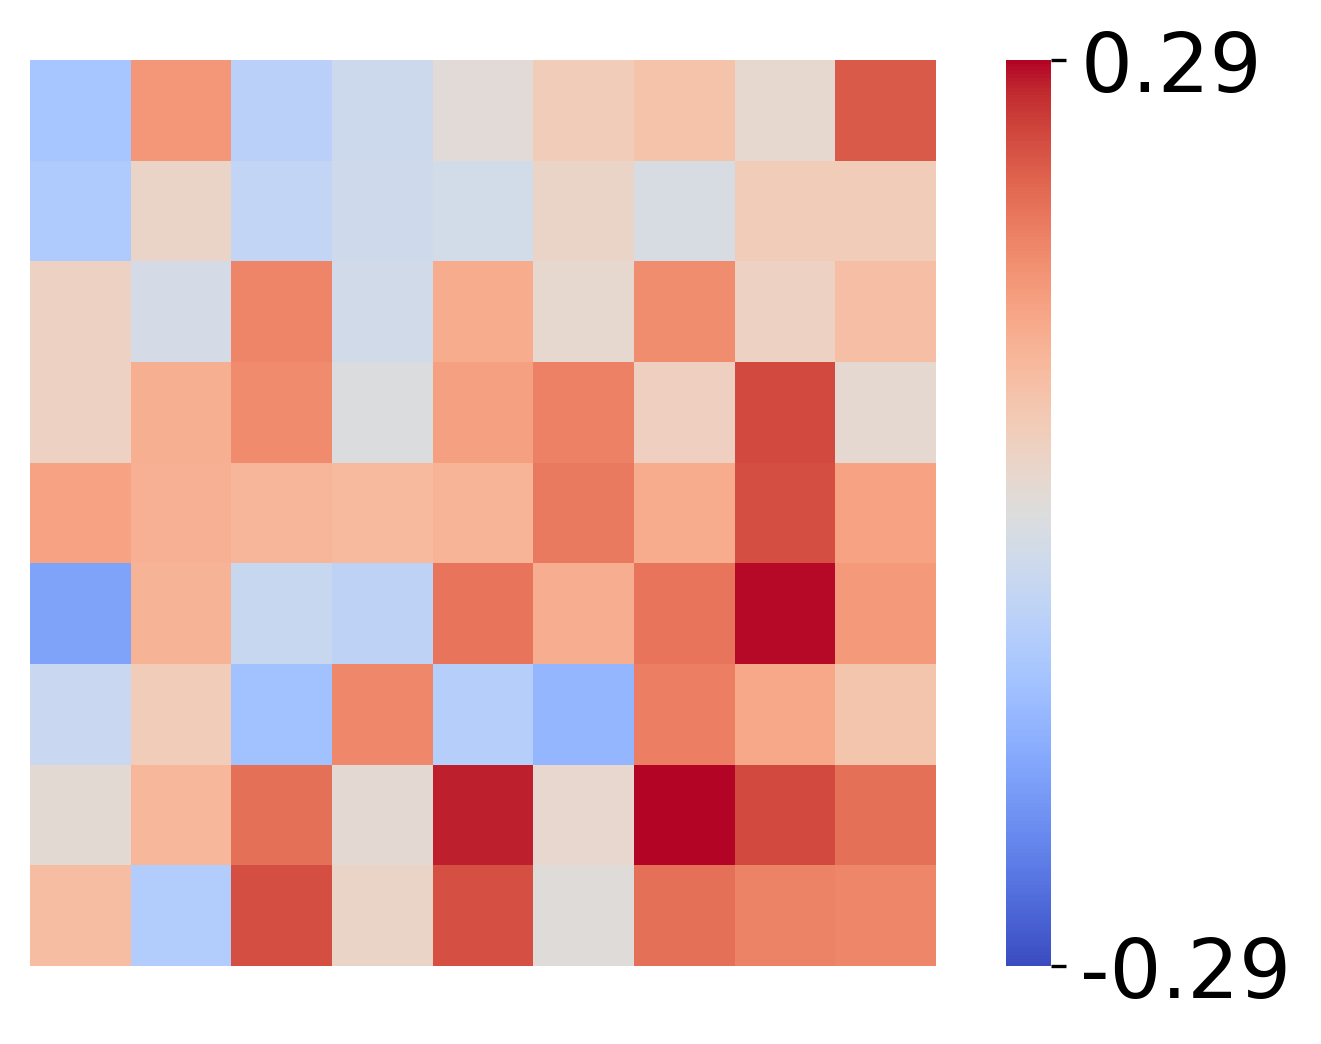

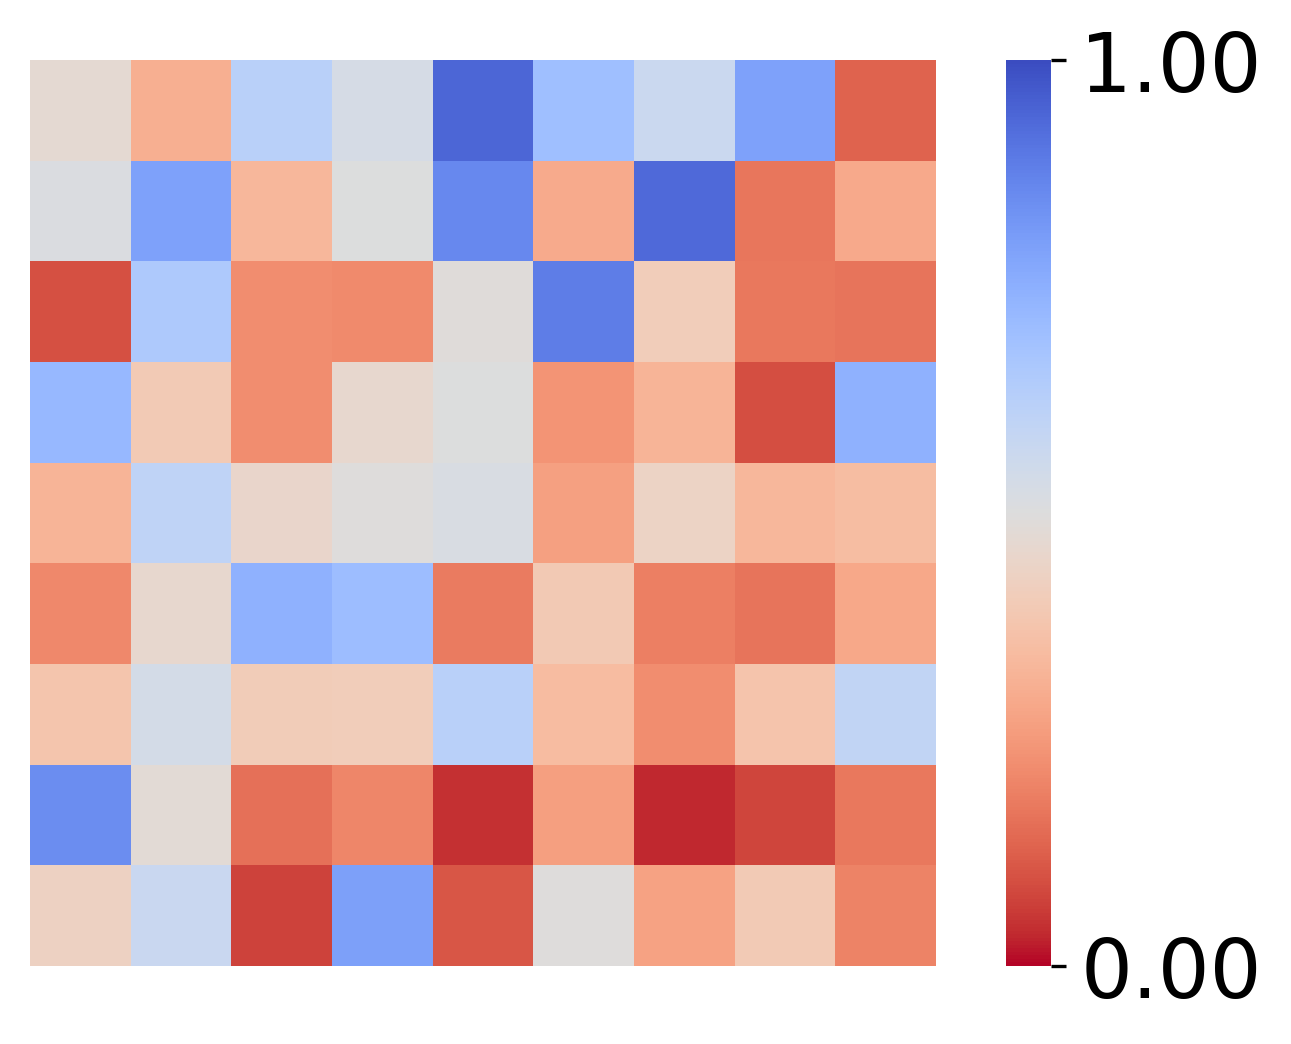

In [179]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(df['rewards_tallies_day2'], df['rewards_tallies_day3'], df['effs_day2'], df['effs_day3'], "Rewards Task 1", "Rewards Task 2", annot=False, groups=df['group_day1'], resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [180]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_rewards_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_rewards_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_rewards_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_rewards_humans.svg'))

### Trait-level Perturbations

In [181]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t1 as sim_timestamp

sim_rewss_t1, sim_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)
sim_rewss_t1 = sim_rewss_t1.mean(axis=0)
sim_obss_t1 = sim_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss_t1 = np.flip(sim_rewss_t1.T, axis=1)
sim_obss_t1 = np.flip(sim_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t2 as sim_timestamp

effs_sorted = effs = np.arange(0, 1.01, 0.125)

sim_rewss_t2, sim_obss_t2, sim_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)
sim_rewss_t2 = sim_rewss_t2.mean(axis=0)
sim_obss_t2 = sim_obss_t2.mean(axis=0)
sim_sleepss_t2 = sim_sleepss_t2.mean(axis=0)


## correcting for switching from tau to efficacy
sim_rewss_t2 = np.flip(sim_rewss_t2.T, axis=1)
sim_obss_t2 = np.flip(sim_obss_t2.T, axis=1)
sim_sleepss_t2 = np.flip(sim_sleepss_t2.T, axis=1)

(150, 9)


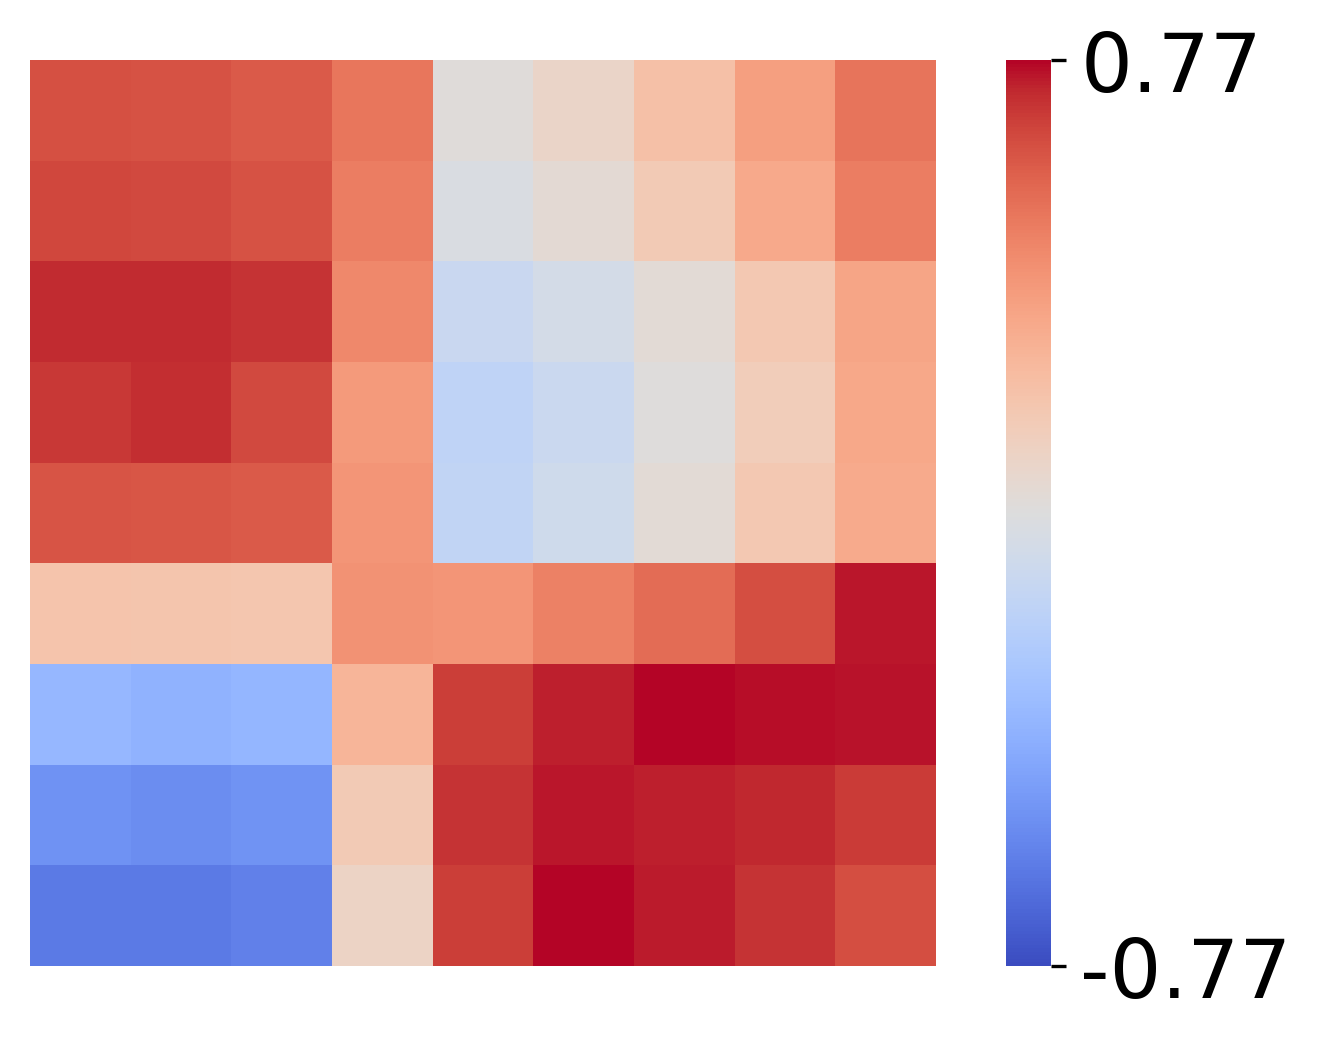

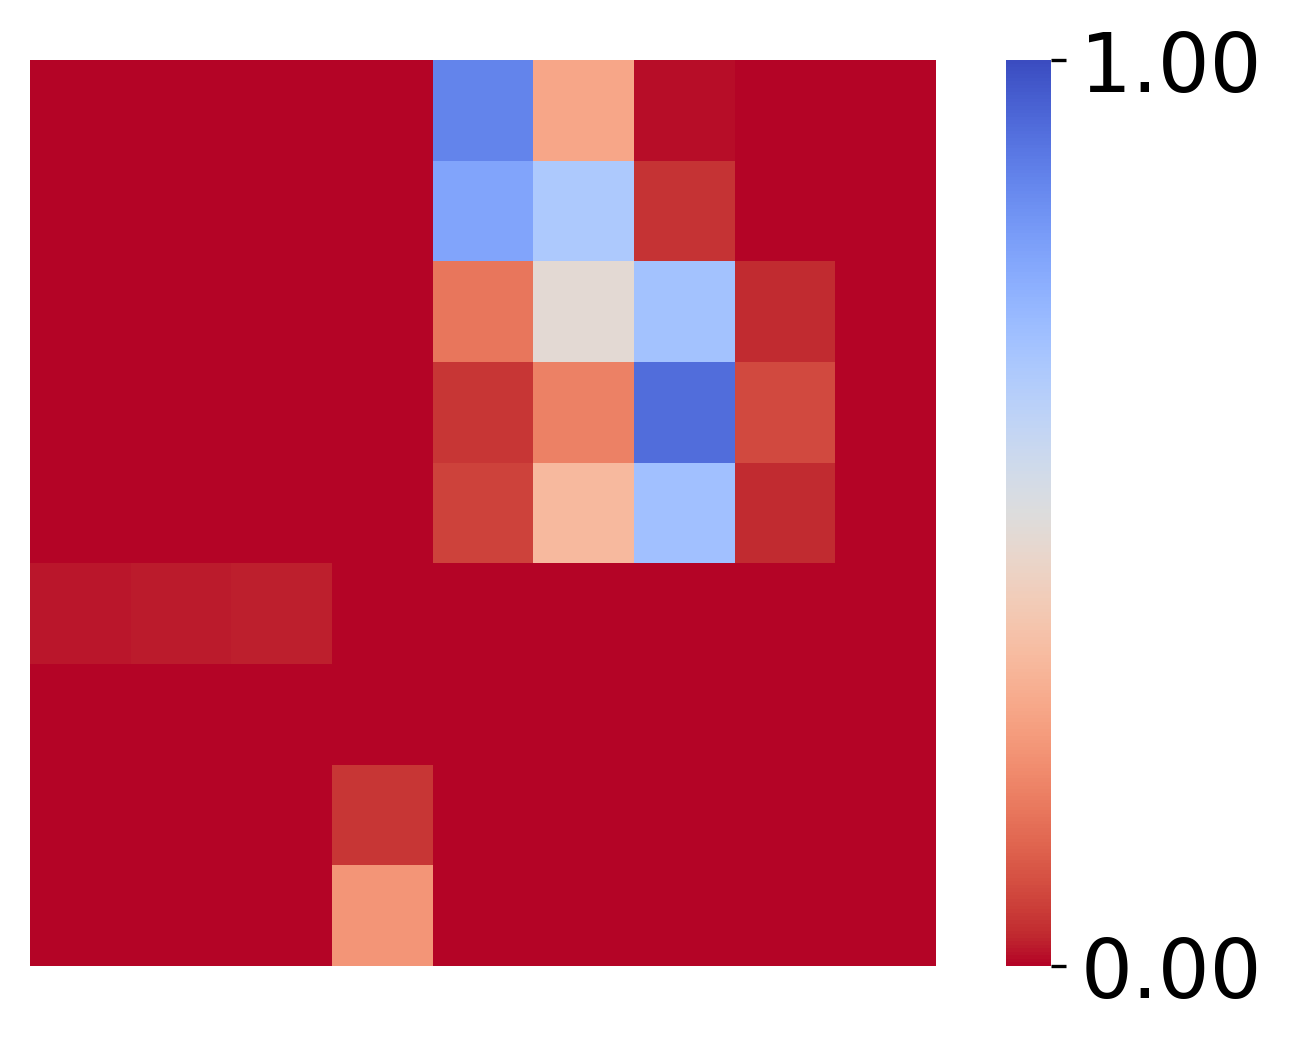

In [182]:
corr_fig, pvs_fig = compute_2D_correlation(sim_rewss_t1, sim_rewss_t2, effs_sorted, effs_sorted, "Rewards Task 1", "Rewards Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [183]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_rewards_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_rewards_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_rewards_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_rewards_trait.svg'))

### Random Perturbations

In [184]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t1 as sim_timestamp

random_rewss_t1, random_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

random_rewss_t1 = random_rewss_t1.mean(axis=0)
random_obss_t1 = random_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss_t1 = np.flip(random_rewss_t1.T, axis=1)
random_obss_t1 = np.flip(random_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

random_rewss_t2, random_obss_t2, random_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

## post-hoc adjustment to get rid of relationship across tasks - TODO: resample cleanly
rng = np.random.default_rng()
random_rewss_t2 = rng.permuted(random_rewss_t2, axis=-1)
random_obss_t2 = rng.permuted(random_obss_t2, axis=-1)
random_sleepss_t2 = rng.permuted(random_sleepss_t2, axis=-1)

random_rewss_t2 = random_rewss_t2.mean(axis=0)
random_obss_t2 = random_obss_t2.mean(axis=0)
random_sleepss_t2 = random_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss_t2 = np.flip(random_rewss_t2.T, axis=1)
random_obss_t2 = np.flip(random_obss_t2.T, axis=1)
random_sleepss_t2 = np.flip(random_sleepss_t2.T, axis=1)

(150, 9)


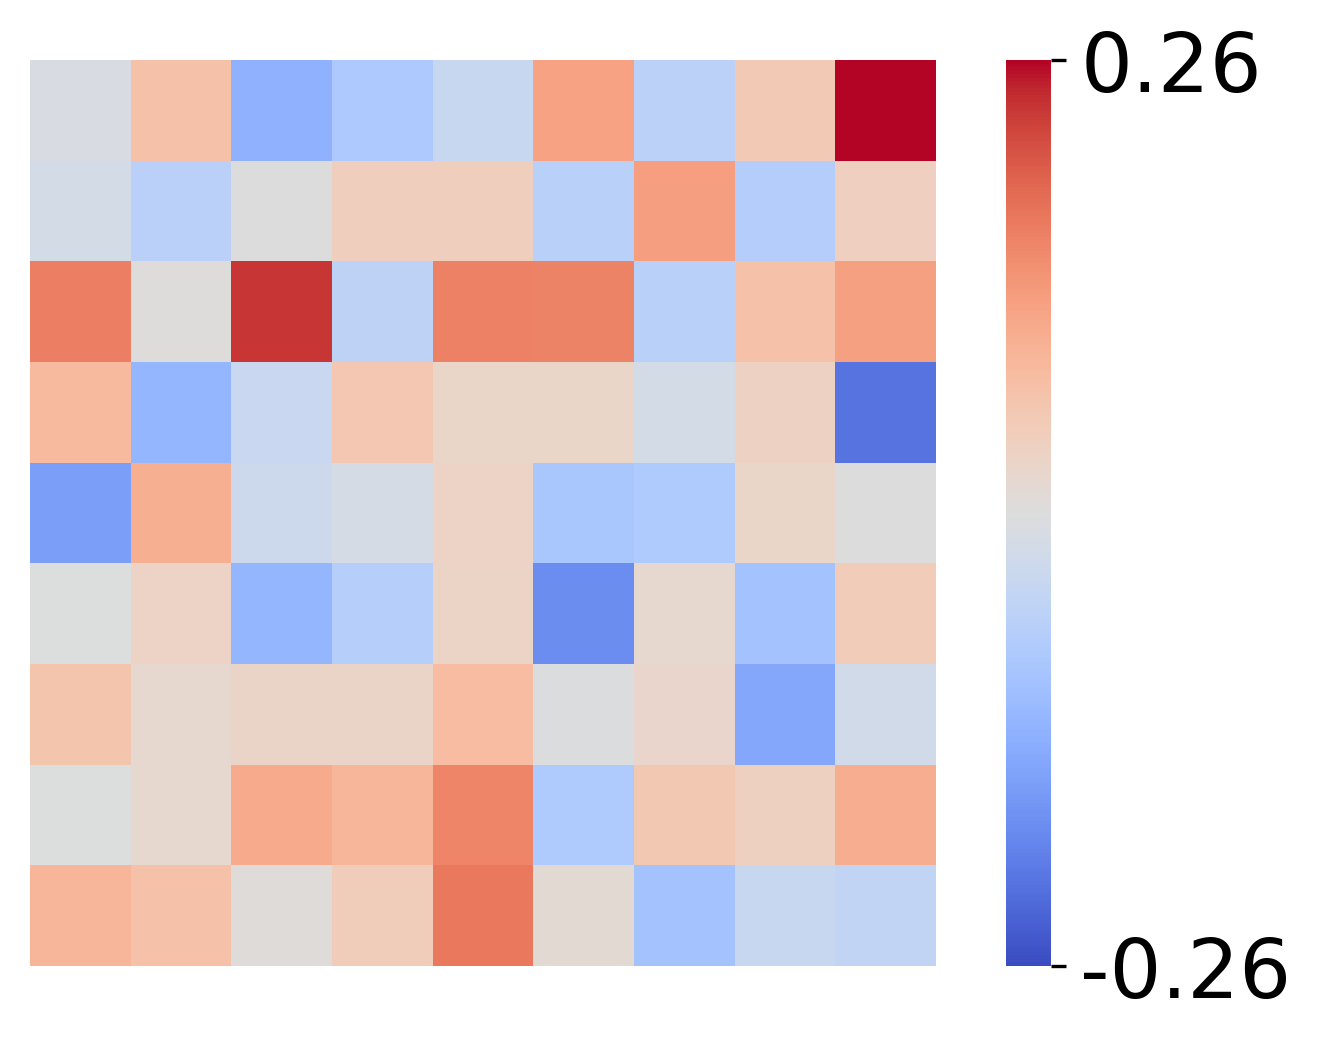

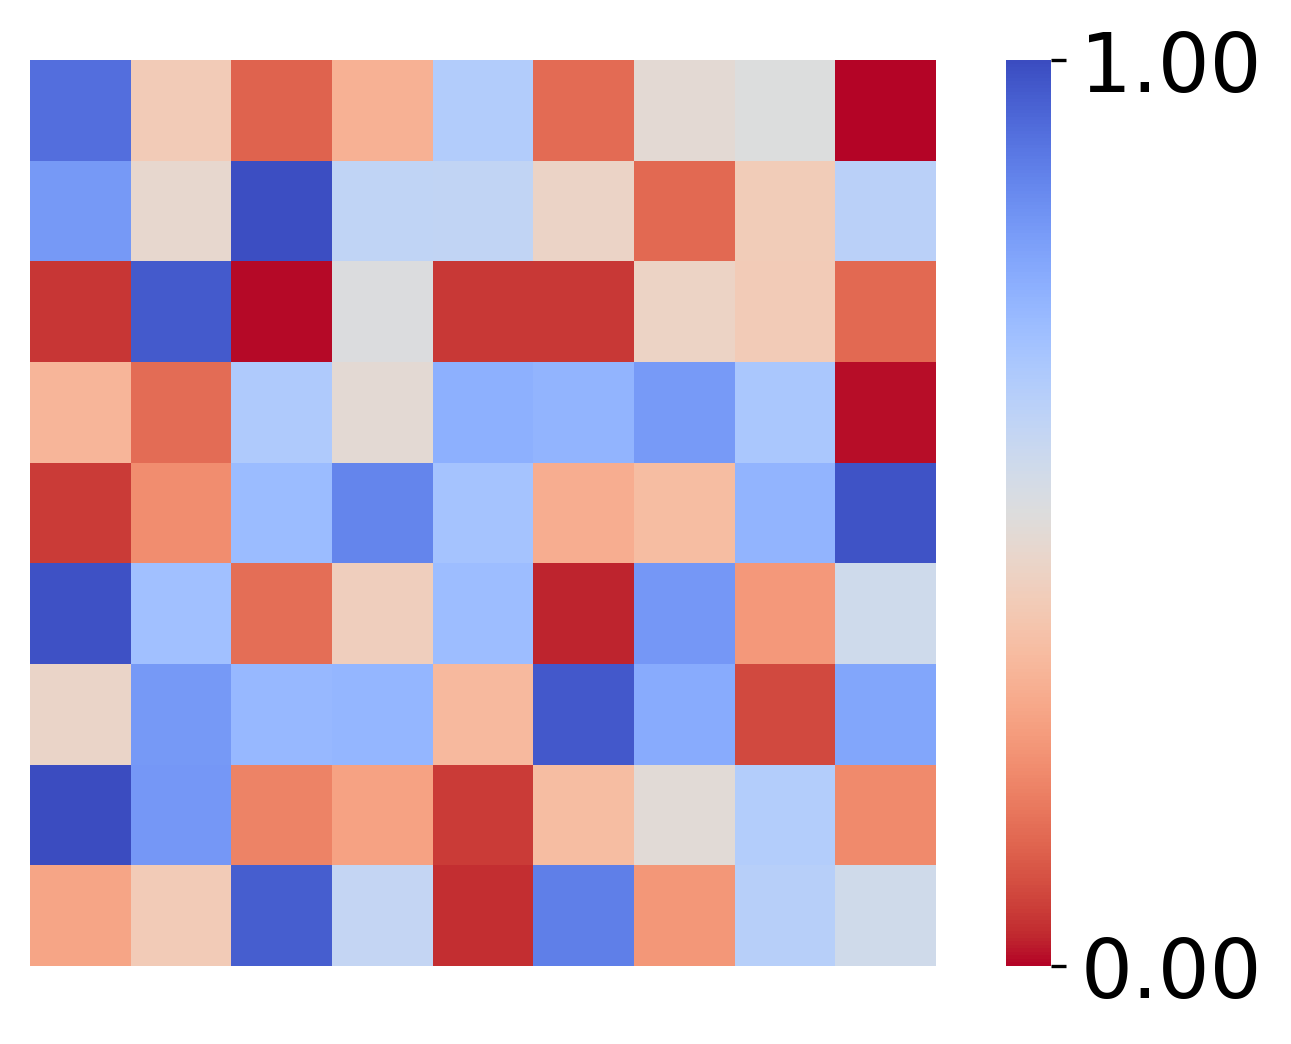

In [185]:
corr_fig, pvs_fig = compute_2D_correlation(random_rewss_t1, random_rewss_t2, effs, effs, "Rewards Task 1", "Rewards Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [186]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_rewards_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_rewards_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_rewards_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_rewards_random.svg'))

### Zeros Perturbation

In [187]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models

from settings_anal import zeros_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t1 as sim_timestamp

zeros_rewss_t1, zeros_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

zeros_rewss_t1 =zeros_rewss_t1.mean(axis=0)
zeros_obss_t1 = zeros_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss_t1 = np.flip(zeros_rewss_t1.T, axis=1)
zeros_obss_t1 = np.flip(zeros_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)
effs_sorted = np.arange(0, 1.01, 0.125)

zeros_rewss_t2, zeros_obss_t2,zeros_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

## TODO: Check to make sure this is no longer necessary
rng = np.random.default_rng()
zeros_rewss_t2 = rng.permuted(zeros_rewss_t2, axis=-1)
zeros_obss_t2 = rng.permuted(zeros_obss_t2, axis=-1)
zeros_sleepss_t2 = rng.permuted(zeros_sleepss_t2, axis=-1)

zeros_rewss_t2 = zeros_rewss_t2.mean(axis=0)
zeros_obss_t2 = zeros_obss_t2.mean(axis=0)
zeros_sleepss_t2 = zeros_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss_t2 = np.flip(zeros_rewss_t2.T, axis=1)
zeros_obss_t2 = np.flip(zeros_obss_t2.T, axis=1)
zeros_sleepss_t2 = np.flip(zeros_sleepss_t2.T, axis=1)

(150, 9)


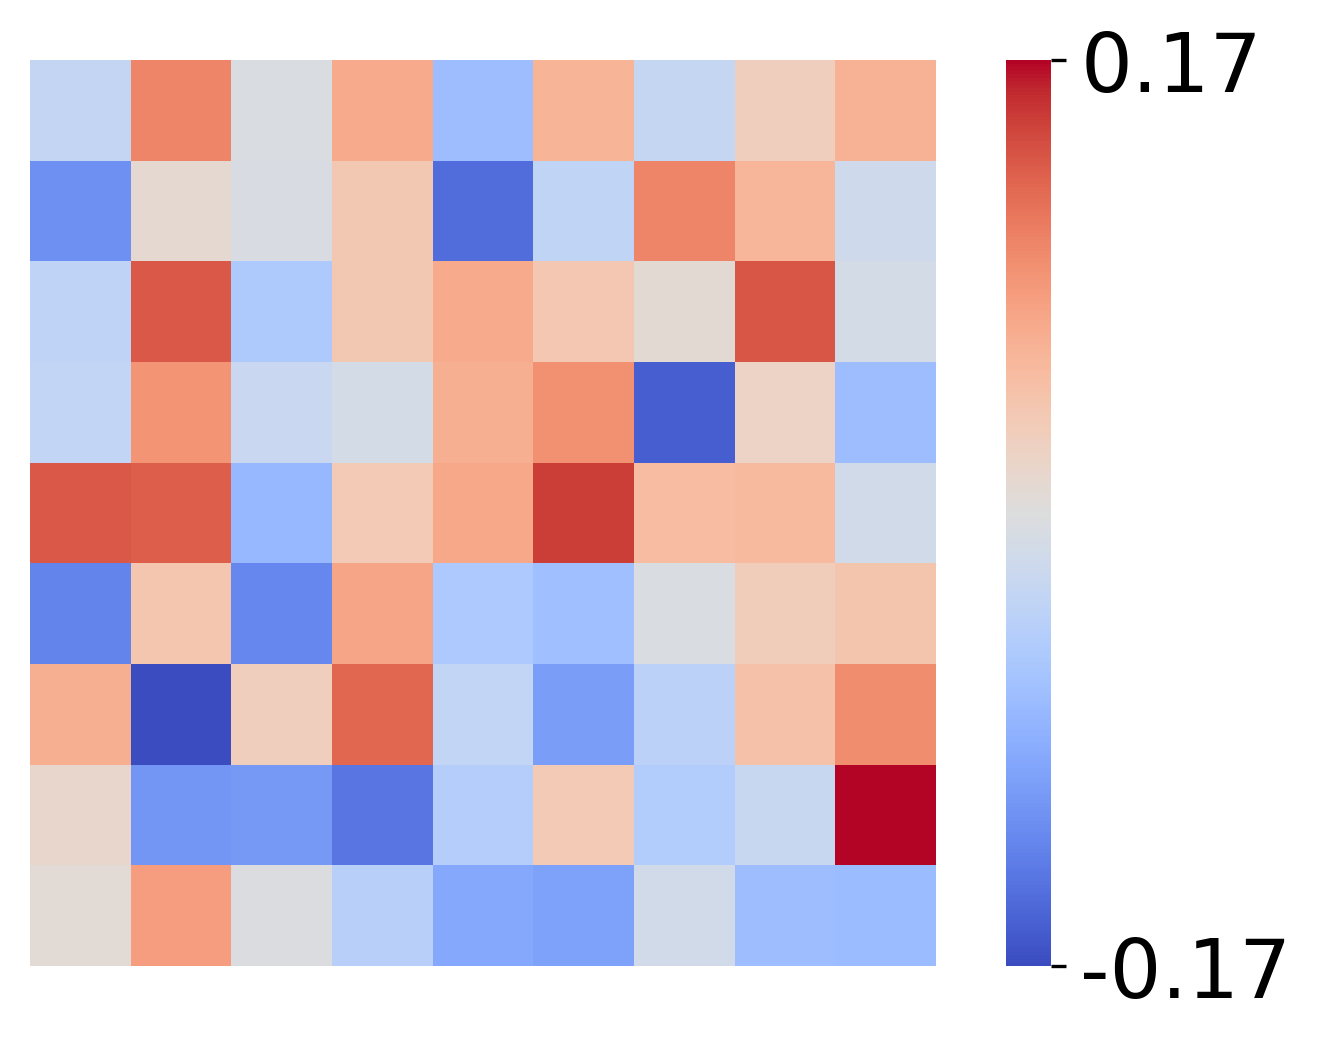

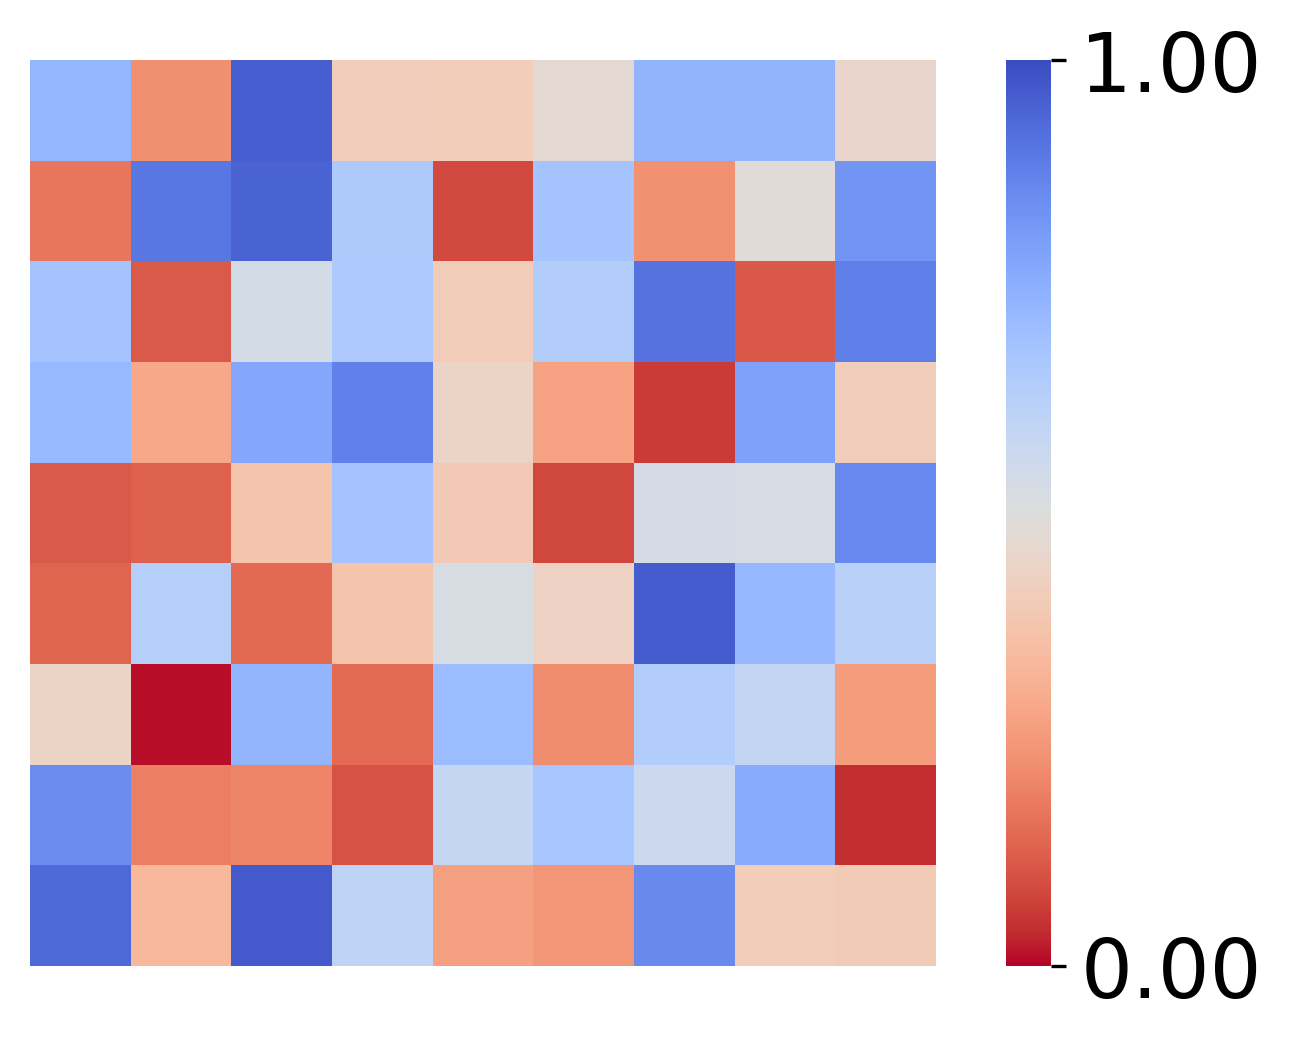

In [188]:
corr_fig, pvs_fig = compute_2D_correlation(zeros_rewss_t1, zeros_rewss_t2, effs, effs, "Rewards Task 1", "Rewards Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [189]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_rewards_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_rewards_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_rewards_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_rewards_zeros.svg'))

### Stats

In [190]:
from human_utils_behavioral_analysis import compute_2D_correlation_matrices, compute_partial_2D_correlation_matrices

## day 2
data_obs_corr_g1, data_obs_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group_day2']]['n_observes_day2'].values), np.stack(df[~df['group_day2']]['n_observes_day3'].values), np.stack(df[~df['group_day2']]['effs_day2'].values), np.stack(df[~df['group_day3']]['effs_day3'].values),)
data_obs_corr_g2, data_obs_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group_day2']]['n_observes_day2'].values), np.stack(df[df['group_day2']]['n_observes_day3'].values), np.stack(df[df['group_day2']]['effs_day2'].values), np.stack(df[df['group_day3']]['effs_day3'].values),)

data_rews_corr_g1, data_rews_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group_day2']]['rewards_tallies_day2'].values), np.stack(df[~df['group_day2']]['rewards_tallies_day3'].values), np.stack(df[~df['group_day2']]['effs_day2'].values), np.stack(df[~df['group_day3']]['effs_day3'].values),)
data_rews_corr_g2, data_rews_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group_day2']]['rewards_tallies_day2'].values), np.stack(df[df['group_day2']]['rewards_tallies_day3'].values), np.stack(df[df['group_day2']]['effs_day2'].values), np.stack(df[df['group_day3']]['effs_day3'].values),)

data_obs_corr = (~df['group_day2']).sum() / len(df) * data_obs_corr_g1 + (df['group_day2']).sum() / len(df) * data_obs_corr_g2
data_obs_pvs = (~df['group_day2']).sum() / len(df) * data_obs_pvs_g1 + (df['group_day2']).sum() / len(df) * data_obs_pvs_g2

data_rews_corr = (~df['group_day2']).sum() / len(df) * data_rews_corr_g1 + (df['group_day2']).sum() / len(df) * data_rews_corr_g2
data_rews_pvs = (~df['group_day2']).sum() / len(df) * data_rews_pvs_g1 + (df['group_day2']).sum() / len(df) * data_rews_pvs_g2

data_sleeps_corr_g1, data_sleeps_pvs_g1 = compute_partial_2D_correlation_matrices(np.stack(df[~df['group_day2']]['n_observes_day2'].values), np.stack(df[~df['group_day2']]['n_sleeps_day3'].values), np.stack(df[~df['group_day2']]['n_observes_day3'].values), np.stack(df[~df['group_day2']]['effs_day2'].values), np.stack(df[~df['group_day2']]['effs_day3'].values), np.stack(df[~df['group_day2']]['effs_day3'].values),)
data_sleeps_corr_g2, data_sleeps_pvs_g2 = compute_partial_2D_correlation_matrices(np.stack(df[df['group_day2']]['n_observes_day2'].values), np.stack(df[df['group_day2']]['n_sleeps_day3'].values), np.stack(df[df['group_day2']]['n_observes_day3'].values), np.stack(df[df['group_day2']]['effs_day2'].values), np.stack(df[df['group_day2']]['effs_day3'].values),np.stack(df[df['group_day2']]['effs_day3'].values), )

data_sleeps_corr = (~df['group_day2']).sum() / len(df) * data_sleeps_corr_g1 + (df['group_day2']).sum() / len(df) * data_sleeps_corr_g2
data_sleeps_pvs = (~df['group_day2']).sum() / len(df) * data_sleeps_pvs_g1 + (df['group_day2']).sum() / len(df) * data_sleeps_pvs_g2

sim_obs_corr, sim_obs_pvs = compute_2D_correlation_matrices(sim_obss_t1, sim_obss_t2, effs, effs,)
sim_rews_corr, sim_rews_pvs = compute_2D_correlation_matrices(sim_rewss_t1, sim_rewss_t2, effs, effs,)
sim_sleeps_corr, sim_sleeps_pvs = compute_partial_2D_correlation_matrices(sim_obss_t1, sim_sleepss_t2, sim_obss_t2, effs_sorted, effs_sorted, effs_sorted, semi=False,)
random_obs_corr, random_obs_pvs = compute_2D_correlation_matrices(random_obss_t1, random_obss_t2, effs, effs,)
random_rews_corr, random_rews_pvs = compute_2D_correlation_matrices(random_rewss_t1, random_rewss_t2, effs, effs,)
random_sleeps_corr, random_sleeps_pvs = compute_partial_2D_correlation_matrices(random_obss_t1, random_sleepss_t2, random_obss_t2, effs_sorted, effs_sorted, effs_sorted, semi=False,)

zeros_obs_corr, zeros_obs_pvs = compute_2D_correlation_matrices(zeros_obss_t1, zeros_obss_t2, effs, effs,)
zeros_rews_corr, zeros_rews_pvs = compute_2D_correlation_matrices(zeros_rewss_t1, zeros_rewss_t2, effs, effs,)
zeros_sleeps_corr, zeros_sleeps_pvs = compute_partial_2D_correlation_matrices(zeros_obss_t1, zeros_sleepss_t2, zeros_obss_t2, effs_sorted, effs_sorted, effs_sorted, semi=False,)

(46, 9)
(65, 9)
(46, 9)
(65, 9)
(46, 9)
          n        r          CI95%    p-val
pearson  46  0.16779  [-0.13, 0.44]  0.27058
          n         r          CI95%     p-val
pearson  46  0.150584  [-0.15, 0.43]  0.323462
          n         r         CI95%    p-val
pearson  46  0.094526  [-0.2, 0.38]  0.53681
          n         r          CI95%     p-val
pearson  46 -0.085092  [-0.37, 0.21]  0.578374
          n         r          CI95%     p-val
pearson  46  0.185669  [-0.11, 0.45]  0.222046
          n         r          CI95%     p-val
pearson  46  0.275501  [-0.02, 0.53]  0.066991
          n         r          CI95%     p-val
pearson  46  0.113613  [-0.19, 0.39]  0.457417
          n         r          CI95%     p-val
pearson  46  0.135381  [-0.16, 0.41]  0.375241
          n         r          CI95%     p-val
pearson  46  0.025859  [-0.27, 0.32]  0.866102
          n         r          CI95%     p-val
pearson  46  0.260511  [-0.04, 0.51]  0.083923
          n         r       

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

          n         r          CI95%     p-val
pearson  46  0.153252  [-0.15, 0.43]  0.314863
          n         r          CI95%    p-val
pearson  46  0.216022  [-0.08, 0.48]  0.15409
          n         r         CI95%     p-val
pearson  46  0.097292  [-0.2, 0.38]  0.524908
          n        r        CI95%     p-val
pearson  46  0.37526  [0.09, 0.6]  0.011083
          n        r          CI95%     p-val
pearson  46  0.07607  [-0.22, 0.36]  0.619432
          n         r         CI95%     p-val
pearson  46  0.324407  [0.03, 0.56]  0.029695
          n         r         CI95%     p-val
pearson  46  0.244787  [-0.05, 0.5]  0.105096
          n         r          CI95%     p-val
pearson  46  0.064032  [-0.23, 0.35]  0.676035
          n        r          CI95%     p-val
pearson  46  0.25331  [-0.04, 0.51]  0.093163
          n         r          CI95%     p-val
pearson  46 -0.020217  [-0.31, 0.27]  0.895128
          n         r          CI95%     p-val
pearson  46  0.151152  [-0.15, 

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

          n         r          CI95%     p-val
pearson  65  0.017048  [-0.23, 0.26]  0.893635
          n         r          CI95%     p-val
pearson  65  0.196457  [-0.05, 0.42]  0.119735
          n         r          CI95%     p-val
pearson  65 -0.029349  [-0.27, 0.22]  0.817924
          n         r          CI95%     p-val
pearson  65  0.100309  [-0.15, 0.34]  0.430318
          n         r          CI95%     p-val
pearson  65  0.197361  [-0.05, 0.42]  0.118009
          n         r         CI95%     p-val
pearson  65  0.379148  [0.15, 0.57]  0.002004
          n         r          CI95%    p-val
pearson  65  0.237564  [-0.01, 0.46]  0.05873
          n         r          CI95%     p-val
pearson  65  0.123773  [-0.13, 0.36]  0.329848
          n         r          CI95%     p-val
pearson  65  0.235556  [-0.01, 0.46]  0.060962
          n        r          CI95%     p-val
pearson  65 -0.00294  [-0.25, 0.24]  0.981607
          n         r          CI95%     p-val
pearson  65  0.1186

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

          n         r          CI95%     p-val
pearson  65  0.004158  [-0.24, 0.25]  0.973985
          n         r          CI95%     p-val
pearson  65 -0.231615  [-0.45, 0.02]  0.065544
          n         r          CI95%     p-val
pearson  65 -0.034087  [-0.28, 0.21]  0.789164
          n        r          CI95%     p-val
pearson  65 -0.08285  [-0.32, 0.17]  0.515138
          n         r         CI95%     p-val
pearson  65 -0.053806  [-0.3, 0.19]  0.672825
          n         r          CI95%     p-val
pearson  65 -0.089085  [-0.33, 0.16]  0.483911
          n         r          CI95%     p-val
pearson  65 -0.198936  [-0.42, 0.05]  0.115044
          n         r         CI95%     p-val
pearson  65 -0.045299  [-0.29, 0.2]  0.722264
(150, 9)
(150, 9)
(150, 9)
           n         r         CI95%         p-val
pearson  150  0.594518  [0.48, 0.69]  1.310298e-15
           n         r         CI95%         p-val
pearson  150  0.590884  [0.48, 0.69]  2.147276e-15
           n         r 

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r          CI95%     p-val
pearson  150  0.112528  [-0.05, 0.27]  0.171829
           n         r          CI95%     p-val
pearson  150  0.023379  [-0.14, 0.18]  0.777168
           n         r          CI95%     p-val
pearson  150 -0.016416  [-0.18, 0.14]  0.842488
           n         r         CI95%         p-val
pearson  150  0.554467  [0.43, 0.66]  2.194103e-13
           n         r         CI95%         p-val
pearson  150  0.573901  [0.46, 0.67]  1.994453e-14
           n         r         CI95%         p-val
pearson  150  0.512683  [0.38, 0.62]  2.319890e-11
           n         r         CI95%         p-val
pearson  150  0.462976  [0.33, 0.58]  2.762930e-09
           n         r         CI95%         p-val
pearson  150  0.407187  [0.26, 0.53]  2.555319e-07
           n         r         CI95%     p-val
pearson  150  0.318615  [0.17, 0.46]  0.000075
           n       r         CI95%     p-val
pearson  150  0.1438  [-0.02, 0.3]  0.080184
           n      

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r           CI95%         p-val
pearson  150 -0.678922  [-0.76, -0.58]  1.811179e-21
           n        r           CI95%         p-val
pearson  150 -0.75271  [-0.81, -0.67]  1.786863e-28
           n         r           CI95%         p-val
pearson  150 -0.793811  [-0.85, -0.73]  1.469877e-33
           n        r           CI95%         p-val
pearson  150 -0.94242  [-0.96, -0.92]  8.243406e-72
           n         r          CI95%         p-val
pearson  150 -0.928922  [-0.95, -0.9]  2.642764e-65
           n         r           CI95%         p-val
pearson  150 -0.895252  [-0.92, -0.86]  1.795441e-53
           n         r          CI95%         p-val
pearson  150 -0.866948  [-0.9, -0.82]  2.644621e-46
           n        r           CI95%         p-val
pearson  150 -0.81967  [-0.87, -0.76]  2.152264e-37
           n         r           CI95%         p-val
pearson  150 -0.802117  [-0.85, -0.74]  9.950104e-35
           n         r           CI95%         p-val
pea

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n        r          CI95%     p-val
pearson  150  0.03474  [-0.13, 0.19]  0.674043
           n         r         CI95%     p-val
pearson  150 -0.044794  [-0.2, 0.12]  0.587507
           n         r          CI95%    p-val
pearson  150 -0.030456  [-0.19, 0.13]  0.71234
           n         r          CI95%     p-val
pearson  150  0.000993  [-0.16, 0.16]  0.990411
           n         r          CI95%     p-val
pearson  150 -0.053536  [-0.21, 0.11]  0.516692
           n         r          CI95%     p-val
pearson  150 -0.000672  [-0.16, 0.16]  0.993509
           n         r          CI95%     p-val
pearson  150  0.023728  [-0.14, 0.18]  0.773931
           n         r          CI95%     p-val
pearson  150 -0.120141  [-0.28, 0.04]  0.144443
           n         r         CI95%     p-val
pearson  150  0.045514  [-0.12, 0.2]  0.581509
           n         r         CI95%     p-val
pearson  150  0.172819  [0.01, 0.32]  0.035061
           n         r          CI95%     p-val
pe

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r          CI95%     p-val
pearson  150  0.052975  [-0.11, 0.21]  0.521102
           n         r         CI95%     p-val
pearson  150  0.044682  [-0.12, 0.2]  0.588449
           n        r          CI95%     p-val
pearson  150 -0.04992  [-0.21, 0.11]  0.545443
           n         r          CI95%     p-val
pearson  150 -0.128437  [-0.28, 0.03]  0.118515
           n         r         CI95%     p-val
pearson  150 -0.060256  [-0.22, 0.1]  0.465399
           n         r          CI95%     p-val
pearson  150  0.031872  [-0.13, 0.19]  0.699589
           n         r          CI95%     p-val
pearson  150 -0.093386  [-0.25, 0.07]  0.257301
           n         r         CI95%    p-val
pearson  150  0.159276  [-0.0, 0.31]  0.05235
           n         r          CI95%    p-val
pearson  150 -0.069425  [-0.23, 0.09]  0.40017
           n         r         CI95%     p-val
pearson  150  0.061041  [-0.1, 0.22]  0.459596
           n         r          CI95%     p-val
pearso

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r         CI95%     p-val
pearson  150  0.036202  [-0.13, 0.2]  0.661152
           n         r         CI95%     p-val
pearson  150 -0.042362  [-0.2, 0.12]  0.607969
           n        r          CI95%     p-val
pearson  150  0.11483  [-0.05, 0.27]  0.163169
           n         r          CI95%     p-val
pearson  150 -0.026932  [-0.19, 0.13]  0.744397
           n       r          CI95%     p-val
pearson  150 -0.0189  [-0.18, 0.14]  0.819039
           n         r           CI95%     p-val
pearson  150 -0.195411  [-0.35, -0.04]  0.016928
           n         r          CI95%     p-val
pearson  150 -0.110713  [-0.27, 0.05]  0.178889
           n         r          CI95%     p-val
pearson  150  0.072093  [-0.09, 0.23]  0.382262
           n         r          CI95%     p-val
pearson  150 -0.152927  [-0.31, 0.01]  0.062609
           n         r         CI95%     p-val
pearson  150  0.038357  [-0.12, 0.2]  0.642333
           n         r          CI95%     p-val
pe

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r          CI95%     p-val
pearson  150  0.018733  [-0.14, 0.18]  0.820614
           n         r         CI95%     p-val
pearson  150  0.064265  [-0.1, 0.22]  0.436182
           n         r          CI95%     p-val
pearson  150  0.007141  [-0.15, 0.17]  0.931123
           n         r          CI95%     p-val
pearson  150 -0.018763  [-0.18, 0.14]  0.820331
           n         r          CI95%     p-val
pearson  150 -0.108323  [-0.26, 0.05]  0.188513
           n        r         CI95%     p-val
pearson  150  0.03978  [-0.12, 0.2]  0.630031
           n        r          CI95%     p-val
pearson  150  0.13509  [-0.03, 0.29]  0.100459
           n         r          CI95%     p-val
pearson  150  0.030112  [-0.13, 0.19]  0.715448
           n         r          CI95%     p-val
pearson  150 -0.026191  [-0.19, 0.14]  0.751194
           n         r         CI95%     p-val
pearson  150  0.194009  [0.03, 0.34]  0.017749
           n         r          CI95%     p-val
pe

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

In [191]:
from human_utils_behavioral_analysis import competitive_corr_regression

competitive_corr_regression((data_rews_corr), [(sim_rews_corr), (random_rews_corr), (zeros_rews_corr)])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.563
Date:                Thu, 20 Jun 2024   Prob (F-statistic):              0.205
Time:                        17:20:50   Log-Likelihood:                 66.810
No. Observations:                  81   AIC:                            -125.6
Df Residuals:                      77   BIC:                            -116.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0675      0.016      4.272      0.0

#### Cosine Similarity

In [192]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(data_rews_corr.reshape((1,-1)), sim_rews_corr.reshape((1,-1)))[0][0])
print(cosine_similarity(data_rews_corr.reshape((1,-1)), random_rews_corr.reshape((1,-1)))[0][0])

0.44408509890183717
0.20596484500085963


## Panel H: Aggregated Similarities Bar Plot

In [3]:
from human_utils_behavioral_analysis import upper_tri_masking
from human_utils_behavioral_analysis import compute_2D_correlation_matrices, compute_partial_2D_correlation_matrices
from sklearn.utils import resample

def combine_group_correlation_matrices(values, effs, groups, values2 = None, effs2 = None, covar = None, effs_covar = None):
    if values2 is None:
        values2 = values.copy()
    if effs2 is None:
        effs2 = effs.copy()

    if covar is None:
        data_corr_g1, data_pvs_g1 = compute_2D_correlation_matrices(np.stack(values[~groups].values), np.stack(values2[~groups].values), np.stack(effs[~groups].values), np.stack(effs2[~groups].values),)
        data_corr_g2, data_pvs_g2 = compute_2D_correlation_matrices(np.stack(values[groups].values), np.stack(values2[groups].values), np.stack(effs[groups].values), np.stack(effs[groups].values),)    
    else:
        data_corr_g1, data_pvs_g1 = compute_partial_2D_correlation_matrices(np.stack(values[~groups].values), np.stack(values2[~groups].values), np.stack(covar[~groups].values), np.stack(effs[~groups].values), np.stack(effs2[~groups].values), np.stack(effs_covar[~groups].values))
        data_corr_g2, data_pvs_g2 = compute_partial_2D_correlation_matrices(np.stack(values[groups].values), np.stack(values2[groups].values), np.stack(covar[groups].values), np.stack(effs[groups].values), np.stack(effs[groups].values), np.stack(effs_covar[groups].values))

    data_corr = (~groups).sum() / len(df) * data_corr_g1 + (groups).sum() / len(df) * data_corr_g2
    data_pvs = (~groups).sum() / len(df) * data_pvs_g1 + (groups).sum() / len(df) * data_pvs_g2

    return data_corr, data_pvs

def compute_cosine_similarity(a, b, upper_tri = True):
    from sklearn.metrics.pairwise import cosine_similarity
    if upper_tri:
        a = upper_tri_masking(a)
        b = upper_tri_masking(b)
    return cosine_similarity(a.reshape((1,-1)), b.reshape((1,-1)))[0][0]

def compute_resampled_cosine_similarity(item, groups, item_effs,  comparison, item2=None, item2_effs = None, comparison2 = None, covar=None, effs_covar=None, comparison_covar = None, effs = np.arange(0, 1.01, 0.125), n_iterations = 100, upper_tri = True):

    if comparison2 is None:
        comparison2 = comparison.copy()

    bootstrapped_cos_sims = []
    for _ in range(n_iterations):
        indicesA = item.index[np.where(groups == False)[0]]
        indicesB = item.index[np.where(groups == True)[0]]

        bootstrapped_indicesA = resample(indicesA, replace=True, n_samples=len(indicesA))
        bootstrapped_indicesB = resample(indicesB, replace=False, n_samples=len(indicesB))
        bootstrapped_indices = np.sort(np.concatenate((bootstrapped_indicesA, bootstrapped_indicesB)))

        #bootstrapped_indices_comparison = resample(np.arange(len(comparison)), replace=True, n_samples=len(comparison))

        if item2 is not None:
            print(item)
            print(item2)
            item2_subindexed = item2.loc[bootstrapped_indices].copy()
        else:
            item2_subindexed = item2
        if covar is not None:
            covar_subindexed = covar.loc[bootstrapped_indices].copy()
        else:
            covar_subindexed = covar
        if effs_covar is not None:
            effs_covar_subindexed = effs_covar.loc[bootstrapped_indices].copy()
        else:
            effs_covar_subindexed = effs_covar
        if item2_effs is not None:
            item2_effs_subindexed = item2_effs.loc[bootstrapped_indices].copy()
        else:
            item2_effs_subindexed = item2_effs

        #bootstrapped_data_corr, bootstrapped_data_pvs = combine_group_correlation_matrices(item.loc[bootstrapped_indices], df.loc[bootstrapped_indices, 'effs_day2'], df.loc[bootstrapped_indices, 'group_day2'].values)
        bootstrapped_data_corr, bootstrapped_data_pvs = combine_group_correlation_matrices(item.loc[bootstrapped_indices], item_effs.loc[bootstrapped_indices], groups.loc[bootstrapped_indices], covar=covar_subindexed, effs_covar=effs_covar_subindexed, values2=item2_subindexed, effs2 = item2_effs_subindexed)
        if comparison_covar is None:
            #bootstrapped_comp_corr, bootstrapped_comp_pvs = compute_2D_correlation_matrices(comparison[bootstrapped_indices_comparison], comparison2[bootstrapped_indices_comparison], effs, effs)
            bootstrapped_comp_corr, bootstrapped_comp_pvs = compute_2D_correlation_matrices(comparison, comparison2, effs, effs)
        else:
            #bootstrapped_comp_corr, bootstrapped_comp_pvs = compute_partial_2D_correlation_matrices(comparison[bootstrapped_indices_comparison], comparison2[bootstrapped_indices_comparison], comparison_covar[bootstrapped_indices_comparison], effs, effs, effs)
            bootstrapped_comp_corr, bootstrapped_comp_pvs = compute_partial_2D_correlation_matrices(comparison, comparison2, comparison_covar, effs, effs, effs)

        bootstrapped_cos_sim = compute_cosine_similarity(bootstrapped_data_corr, bootstrapped_comp_corr, upper_tri = upper_tri)
        bootstrapped_cos_sims.append(bootstrapped_cos_sim)
    return bootstrapped_cos_sims


In [194]:

%%capture

n_iterations = 100

rows = []

### IMPORT EFFICACY ESTIMATES FOR SIMULATIONS
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t1 as sim_timestamp

original_mag_perturbation = 1
with open(os.path.join('data', 'sim_perturbed_participants', 'pepe', 'sim', 'mag%d'%(original_mag_perturbation*100), '%s_simulated_participant_perturbations_sim_mag.pkl' %sim_timestamp), 'rb') as f:
    sim_participant_perturbations = - pickle.load(f) ## multiply by -1 to convert from tau to efficacy

sim_estss = (np.tile(np.arange(0, 1.01, 0.125), (len(sim_participant_perturbations),1)).T + sim_participant_perturbations).T

from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t1 as sim_timestamp

original_mag_perturbation = 1
with open(os.path.join('data', 'sim_perturbed_participants', 'pepe', 'random', 'mag%d'%(original_mag_perturbation*100), '%s_simulated_participant_perturbations_random_mag.pkl' %sim_timestamp), 'rb') as f:
    sim_participant_perturbations = - pickle.load(f) ## multiply by -1 to convert from tau to efficacy

### CONSTRUCT SIM_ESTS
random_estss = (np.tile(np.arange(0, 1.01, 0.125), (len(sim_participant_perturbations),1)) + sim_participant_perturbations)

### TASK 1
#for item_name, item, comparisons in zip(['Obs', 'Rews'], [df['n_observes_day2'], df['rewards_tallies_day2']], [[sim_obss_t1, random_obss_t1], [sim_rewss_t1, random_rewss_t1]]):
for item_name, item, comparisons in zip(['Rews','Obs', 'Ests'], [df['rewards_tallies_day2'],df['n_observes_day2'], df['efficacy_estimates_day2']], [ [sim_rewss_t1, random_rewss_t1],[sim_obss_t1, random_obss_t1], [sim_estss, random_estss]]):
    data_corr, data_pvs = combine_group_correlation_matrices(item, df['effs_day2'], df['group_day2'].values,)
    for comparison_name, comparison in zip(['Trait', 'Random'], comparisons):
        comp_corr, comp_pvs = compute_2D_correlation_matrices(comparison, comparison, effs, effs)
        cos_sim = compute_cosine_similarity(data_corr, comp_corr)

        bootstrapped_cos_sims = compute_resampled_cosine_similarity(item, df['group_day2'], df['effs_day2'], comparison, n_iterations=n_iterations)

        ci =  pd.Series(bootstrapped_cos_sims).quantile([0.025, 0.975])
        rows.append({"task": "T1", "item": item_name, "Comparison": comparison_name, "Cosine Similarity": cos_sim, "Lower": ci.iloc[0], "Upper": ci.iloc[1]})

### TASK 2
# for item_name, item, comparisons in zip(['Sleeps', 'Obs', 'Rews'],
#                                          [df['n_sleeps_day3'], df['n_observes_day3'], df['rewards_tallies_day3']], 
#                                          [[sim_sleepss_t2, random_sleepss_t2],
#                                             [sim_obss_t2, random_obss_t2], 
#                                             [sim_rewss_t2, random_rewss_t2]]):
for item_name, item, comparisons in zip([ 'Rews', 'Sleeps', 'Obs',],
                                         [ df['rewards_tallies_day3'], df['n_sleeps_day3'], df['n_observes_day3'],], 
                                         [[sim_rewss_t2, random_rewss_t2],
                                          [sim_sleepss_t2, random_sleepss_t2],
                                            [sim_obss_t2, random_obss_t2], 
                                            ]):
    data_corr, data_pvs = combine_group_correlation_matrices(item, df['effs_day3'], df['group_day2'].values,)
    for comparison_name, comparison in zip(['Trait', 'Random'], comparisons):
        comp_corr, comp_pvs = compute_2D_correlation_matrices(comparison, comparison, effs, effs)
        cos_sim = compute_cosine_similarity(data_corr, comp_corr)
        bootstrapped_cos_sims = compute_resampled_cosine_similarity(item, df['group_day3'], df['effs_day3'], comparison, n_iterations=n_iterations)
        ci = pd.Series(bootstrapped_cos_sims).quantile([0.025, 0.975])
        rows.append({"task": "T2", "item": item_name, "Comparison": comparison_name, "Cosine Similarity": cos_sim, "Lower": ci.iloc[0], "Upper": ci.iloc[1]})

    # If desired, I can include the observes task 1-observes task 2 similarity matrix here
    if item_name == 'Observes':
        data_corr, data_pvs = combine_group_correlation_matrices(item, df['effs_day3'], df['group_day2'].values, partial=False)

### ACROSS TASKS
# for item_name, item_task1, item_task2, comparisons_task1, comparisons_task2, covar, effs_covar, comparisons_covar in zip(#['Task 1 Observes with Sleeps Task 2*', 'Task 1 Observes with Task 2 Observes', 'Task 1 Rewards with Task 2 Rewards'],
#                                         ['T1 Obs-T2 Sleeps*', 'T1 Obs-T2 Obs', 
#                                             'T1 Rews-T2 Rews'],
#                                         [df['n_observes_day2'], df['n_observes_day2'], 
#                                             df['rewards_tallies_day2'],],
#                                         [df['n_sleeps_day3'], df['n_observes_day3'], 
#                                             df['rewards_tallies_day3'],],
#                                         [[sim_obss_t1, random_obss_t1],
#                                          [sim_obss_t1, random_obss_t1],
#                                          [sim_rewss_t1, random_rewss_t1]],
#                                         [[sim_sleepss_t2, random_sleepss_t2],
#                                             [sim_obss_t2, random_obss_t2], 
#                                             [sim_rewss_t2, random_rewss_t2]],
#                                         [df['n_observes_day3'], None,
#                                             None],
#                                         [df['effs_day3'], None, 
#                                             None],
#                                         [[sim_obss_t2, random_obss_t2],
#                                             [None, None],
#                                             [None, None]]):
for item_name, item_task1, item_task2, comparisons_task1, comparisons_task2, covar, effs_covar, comparisons_covar in zip(#['Task 1 Observes with Sleeps Task 2*', 'Task 1 Observes with Task 2 Observes', 'Task 1 Rewards with Task 2 Rewards'],
                                        [  'T1 Rews-T2 Rews', 'T1 Obs-T2 Sleeps*', 'T1 Obs-T2 Obs', #'T1 Ests-T1 Obs',
                                          ],
                                        [df['rewards_tallies_day2'],df['n_observes_day2'], df['n_observes_day2'],#  df['n_observes_day2'],
                                            ],
                                        [  df['rewards_tallies_day3'],df['n_sleeps_day3'], df['n_observes_day3'], #df['efficacy_estimates_day2']
                                          ],
                                        [[sim_rewss_t1, random_rewss_t1],
                                        [sim_obss_t1, random_obss_t1],
                                         [sim_obss_t1, random_obss_t1],
                                           # [sim_obss, random_obss],
                                         ],
                                        [[sim_rewss_t2, random_rewss_t2],
                                        [sim_sleepss_t2, random_sleepss_t2],
                                            [sim_obss_t2, random_obss_t2], 
                                            #[sim_estss, random_estss],
                                            ],
                                        [None, df['n_observes_day3'], None,# None
                                            ],
                                        [None, df['effs_day3'], None,# None
                                            ],
                                        [ [None, None],
                                        [sim_obss_t2, random_obss_t2],
                                            [None, None],
                                            #[None, None],
                                           ]):
    print(item_name)
    data_corr, data_pvs = combine_group_correlation_matrices(item_task1, df['effs_day2'], df['group_day2'].values, values2 = item_task2, effs2 = df['effs_day3'], covar=covar, effs_covar=effs_covar)
    for comparison_name, comparison_task1, comparison_task2, comparison_covar in zip(['Trait', 'Random'], comparisons_task1, comparisons_task2, comparisons_covar):
        print(comparison_name)
        if comparison_covar is None:
            comp_corr, comp_pvs = compute_2D_correlation_matrices(comparison_task1, comparison_task2, effs, effs)
        else:
            comp_corr, comp_pvs = compute_partial_2D_correlation_matrices(comparison_task1, comparison_task2, comparison_covar, effs, effs, effs)
        cos_sim = compute_cosine_similarity(data_corr, comp_corr, upper_tri = False)
        
        print(item_task2)
        bootstrapped_cos_sims = compute_resampled_cosine_similarity(item_task1, df['group_day2'], df['effs_day2'],comparison_task1, item2=item_task2, item2_effs=df['effs_day3'], comparison2= comparison_task2, covar=covar, effs_covar=effs_covar, comparison_covar=comparison_covar, n_iterations=n_iterations, upper_tri=False)
        ci = pd.Series(bootstrapped_cos_sims).quantile([0.025, 0.975])

        rows.append({"task": "Across Tasks", "item": item_name, "Comparison": comparison_name, "Cosine Similarity": cos_sim, "Lower": ci.iloc[0], "Upper": ci.iloc[1]})

### COMBINATION
df_cosim = pd.DataFrame(rows)

df_cosim['Name'] = df_cosim['task'] + ' ' + df_cosim['item']
df_cosim.loc[df_cosim['task'] == "Across Tasks",'Name'] = df_cosim[df_cosim['task'] == "Across Tasks"]['item']

print(df_cosim.head())

df_cosim.to_pickle(os.path.join(analysis_folder, 'df_cosim.pkl'))

In [4]:
df_cosim = pd.read_pickle(os.path.join(analysis_folder, 'df_cosim.pkl'))

In [196]:
df_cosim.round(3)

task               item Comparison  Cosine Similarity  Lower  \
0             T1               Rews      Trait              0.544  0.375   
1             T1               Rews     Random              0.192  0.055   
2             T1                Obs      Trait              0.993  0.977   
3             T1                Obs     Random             -0.207 -0.224   
4             T1               Ests      Trait              0.876  0.811   
5             T1               Ests     Random             -0.049 -0.120   
6             T2               Rews      Trait              0.408  0.268   
7             T2               Rews     Random             -0.174 -0.258   
8             T2             Sleeps      Trait              0.957  0.936   
9             T2             Sleeps     Random             -0.041 -0.062   
10            T2                Obs      Trait              0.996  0.989   
11            T2                Obs     Random              0.135  0.118   
12  Across Tasks    T1 Rews-T2 Rews      Trait              0.444  0.305   
13  Across Tasks    T1 Rews-T2 Rews     Random              0.206  0.084   
14  Across Tasks  T1 Obs-T2 Sleeps*      Trait              0.222 -0.089   
15  Across Tasks  T1 Obs-T2 Sleeps*     Random              0.166  0.012   
16  Across Tasks      T1 Obs-T2 Obs      Trait              0.992  0.981   
17  Across Tasks      T1 Obs-T2 Obs     Random              0.046  0.034   

    Upper               Name  
0   0.604            T1 Rews  
1   0.296            T1 Rews  
2   0.996             T1 Obs  
3  -0.181             T1 Obs  
4   0.911            T1 Ests  
5   0.019            T1 Ests  
6   0.476            T2 Rews  
7  -0.038            T2 Rews  
8   0.968          T2 Sleeps  
9  -0.014          T2 Sleeps  
10  0.997             T2 Obs  
11  0.147             T2 Obs  
12  0.503    T1 Rews-T2 Rews  
13  0.292    T1 Rews-T2 Rews  
14  0.392  T1 Obs-T2 Sleeps*  
15  0.245  T1 Obs-T2 Sleeps*  
16  0.995      T1 Obs-T2 Obs  
17  0.054      T1 Obs-T2 Obs

/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

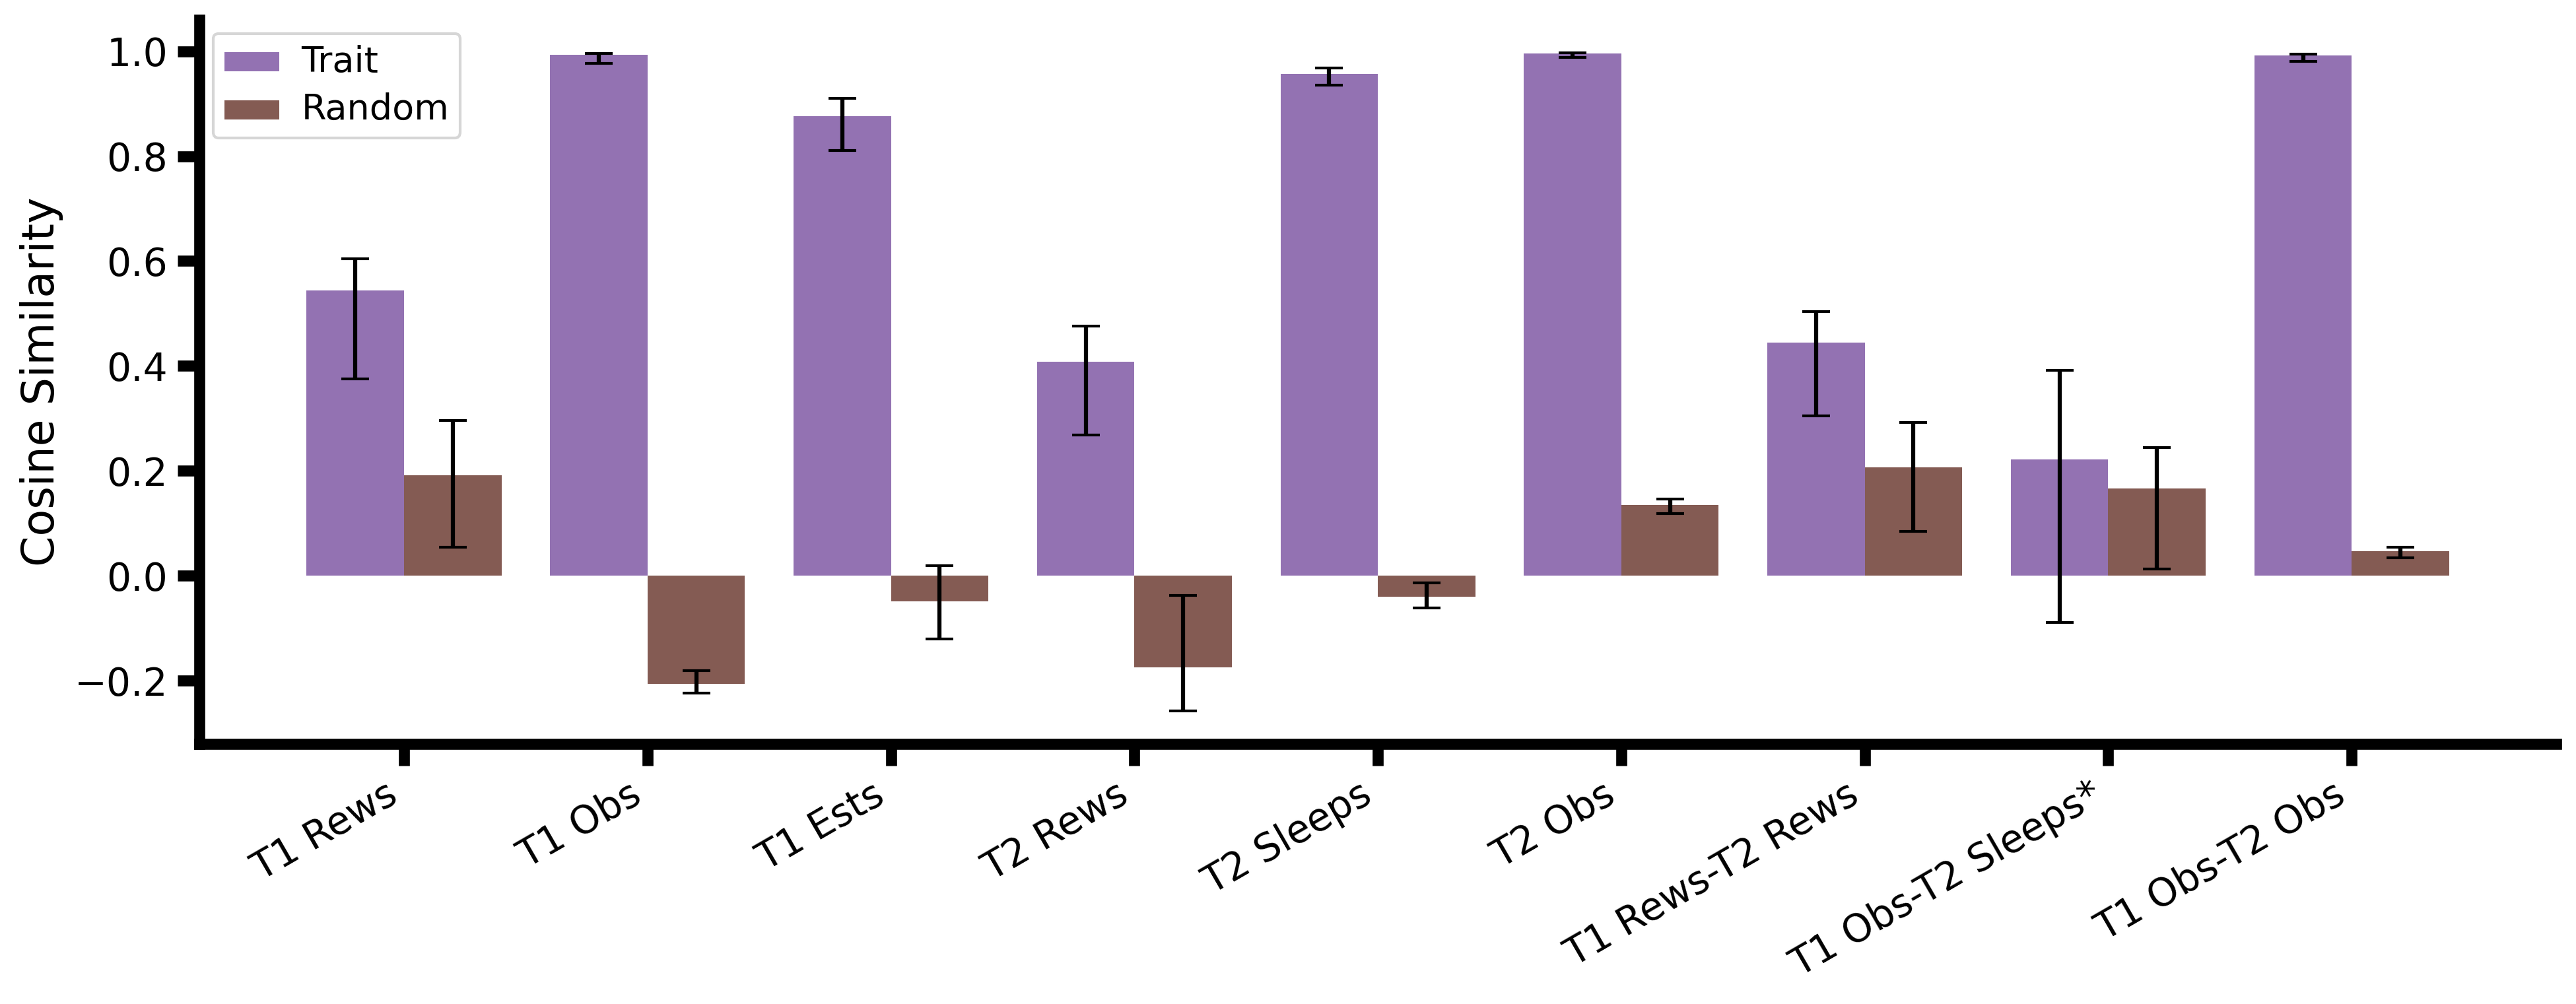

In [197]:
import seaborn as sns

#fig = plt.figure(figsize=(8.5, 4.8), dpi=300)
fig = plt.figure(figsize=(15.3541, 4.8428), dpi=300)
ax = fig.add_subplot(111)

### Create a Seaborn 
s = sns.barplot(x='Name', y='Cosine Similarity', hue='Comparison', data=df_cosim, ax=ax, palette=['C4', 'C5'])
s.get_legend().set_title(None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_xlabel(None)

# Adding error bars

# for i, bar in enumerate(ax.patches):
#     ## find cosine similarity


#     print(i)
#     print(df_cosim.loc[df_cosim.index[i]])
#     lower = df_cosim.loc[df_cosim.index[i], 'Lower']
#     upper = df_cosim.loc[df_cosim.index[i], 'Upper']
#     #mean = bar.get_height()
#     mean = df_cosim.loc[df_cosim.index[i], 'Cosine Similarity']
#     print(bar.get_height(), mean)
#     plt.errorbar(x=bar.get_x() + bar.get_width() / 2, y=mean, 
#                  yerr=[[mean-lower], [upper-mean]], fmt='none', ecolor='black', capsize=5)

# Adding error bars
for bar in ax.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Find the index where 'Cosine Similarity' is close to the height of the bar
    index = np.where(np.isclose(df_cosim['Cosine Similarity'], height))[0][0]
    lower = df_cosim.loc[df_cosim.index[index], 'Lower']
    upper = df_cosim.loc[df_cosim.index[index], 'Upper']
    mean = df_cosim.loc[df_cosim.index[index], 'Cosine Similarity']
    plt.errorbar(x=bar.get_x() + bar.get_width() / 2, y=mean, 
                 yerr=[[mean-lower], [upper-mean]], fmt='none', ecolor='black', capsize=5)

format_axis(ax)        

In [198]:
# fig.savefig(os.path.join(analysis_folder, 'similarity_barplot_trait.png'))
# fig.savefig(os.path.join(analysis_folder, 'similarity_barplot_trait.svg'))

fig.savefig(os.path.join(analysis_folder, 'similarity_barplot.png'))
fig.savefig(os.path.join(analysis_folder, 'similarity_barplot.svg'))

In [6]:
df_cosim = df_cosim[df_cosim['Comparison'] == "Trait"]

/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


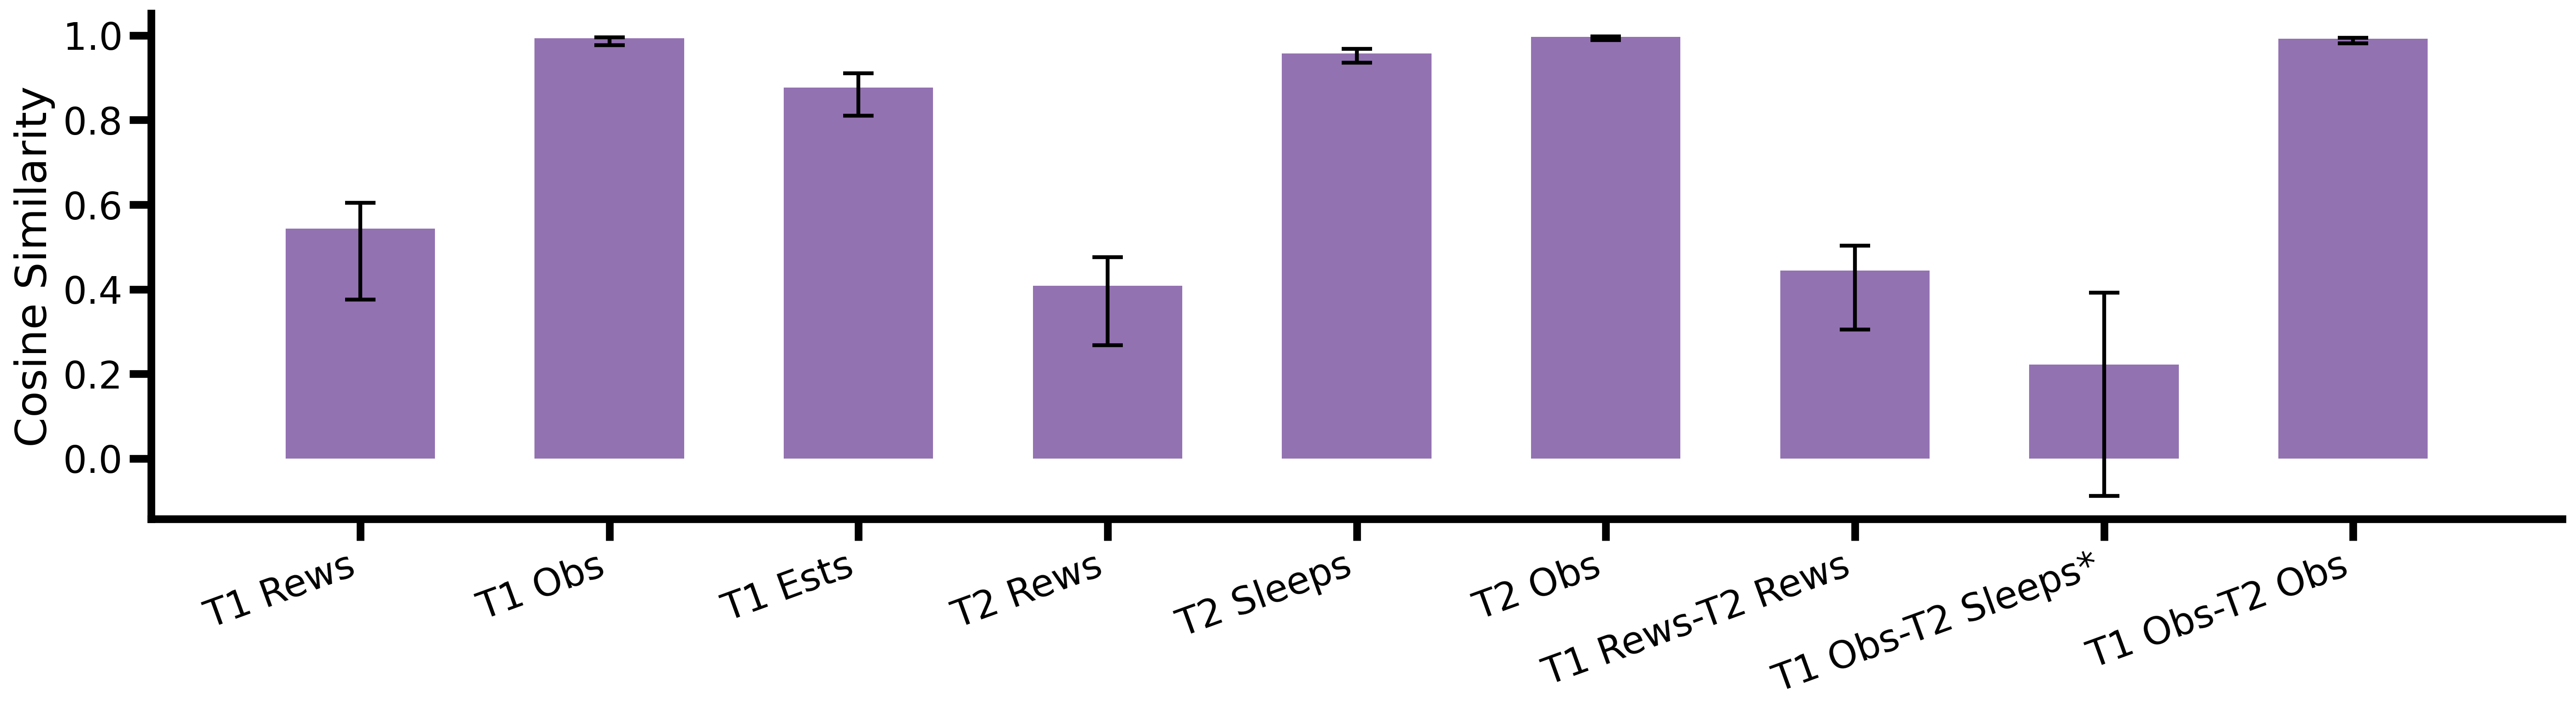

In [17]:
import seaborn as sns

#fig = plt.figure(figsize=(15.3541, 4.8428), dpi=300)
fig = plt.figure(figsize=(22.5105, 4.8428), dpi=300)
ax = fig.add_subplot(111)

### Create a Seaborn 
s = sns.barplot(x='Name', y='Cosine Similarity', data=df_cosim, ax=ax, palette=['C4'],)

ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')
ax.set_xlabel(None)

# Adding error bars

# for i, bar in enumerate(ax.patches):
#     ## find cosine similarity

#     print(i)
#     print(df_cosim.loc[df_cosim.index[i]])
#     lower = df_cosim.loc[df_cosim.index[i], 'Lower']
#     upper = df_cosim.loc[df_cosim.index[i], 'Upper']
#     #mean = bar.get_height()
#     mean = df_cosim.loc[df_cosim.index[i], 'Cosine Similarity']
#     print(bar.get_height(), mean)
#     plt.errorbar(x=bar.get_x() + bar.get_width() / 2, y=mean, 
#                  yerr=[[mean-lower], [upper-mean]], fmt='none', ecolor='black', capsize=5)

# Adding error bars
for bar in ax.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Find the index where 'Cosine Similarity' is close to the height of the bar
    index = np.where(np.isclose(df_cosim['Cosine Similarity'], height))[0][0]
    lower = df_cosim.loc[df_cosim.index[index], 'Lower']
    upper = df_cosim.loc[df_cosim.index[index], 'Upper']
    mean = df_cosim.loc[df_cosim.index[index], 'Cosine Similarity']
    plt.errorbar(x=bar.get_x() + bar.get_width() / 2, y=mean, 
                 yerr=[[mean-lower], [upper-mean]], fmt='none', ecolor='black', 
                 capsize=8, 
                 #capsize=10, 
                 elinewidth=2, markeredgewidth=2)
    

new_value = 0.6
for patch in ax.patches :
    current_width = patch.get_width()
    diff = current_width - new_value

    # we change the bar width
    patch.set_width(new_value)

    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)

#ax.set_box_aspect(2) #change 10 to modify the y/x axis ratio

format_axis(ax, font_size_multiplier=1.4)        

In [18]:
fig.savefig(os.path.join(analysis_folder, 'similarity_barplot_trait.png'))
fig.savefig(os.path.join(analysis_folder, 'similarity_barplot_trait.svg'))

## Panel I: Transdiagnostics
### Observes

In [202]:
from human_utils_transdiagnostics import get_clean_combined_data

day = 'day2'
exp_date = '24-01-22-29'
# day1_test_mask_cutoff = {
#     "groupA": {"lower": 10, "upper": 90},
#     "groupB": {"lower": 8, "upper": 72}
# }
day1_test_mask_cutoff = None

group = None
human_data_file_base = '/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis'

df, effs_sorted_train, effs_sorted_test, test_start = get_clean_combined_data(day = int(day[-1]), group = group, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, file_base=human_data_file_base)

effs = np.arange(0, 1.125, 0.125)
n_steps = 50

(86, 9)
(96, 9)


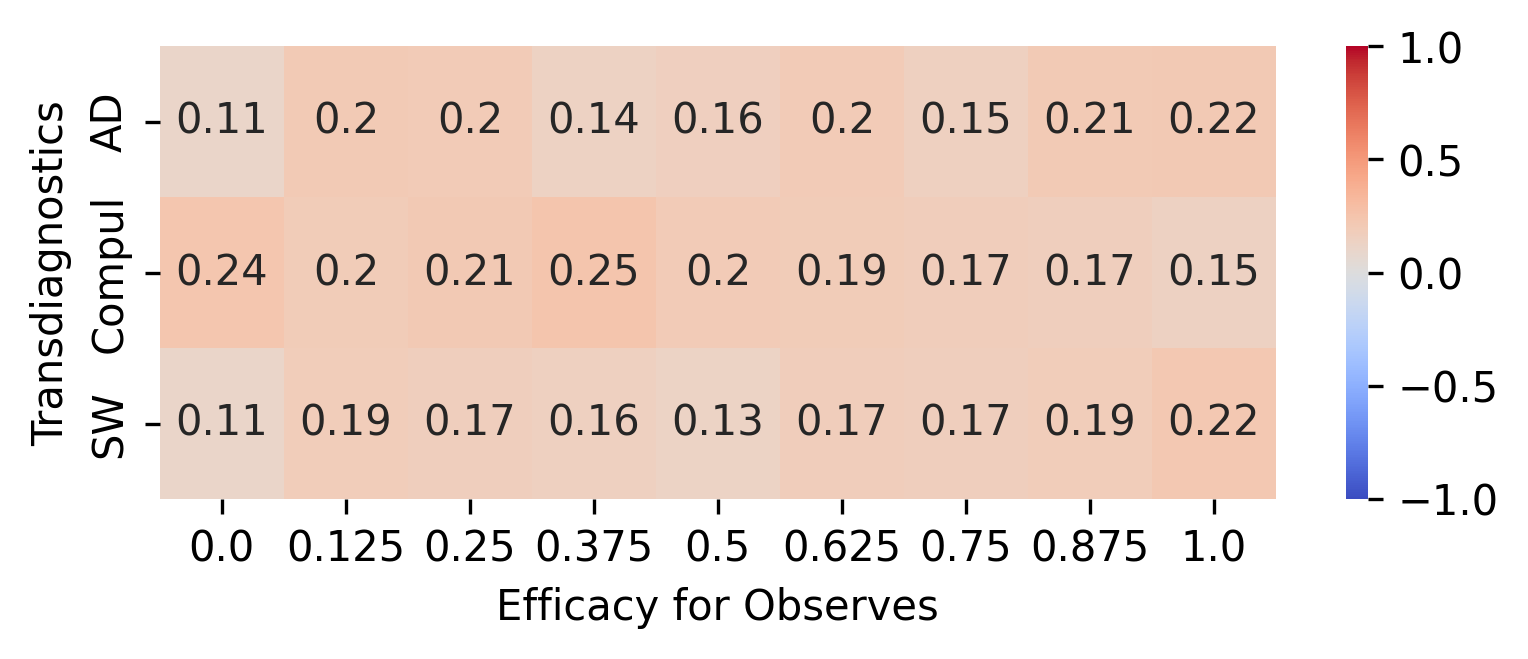

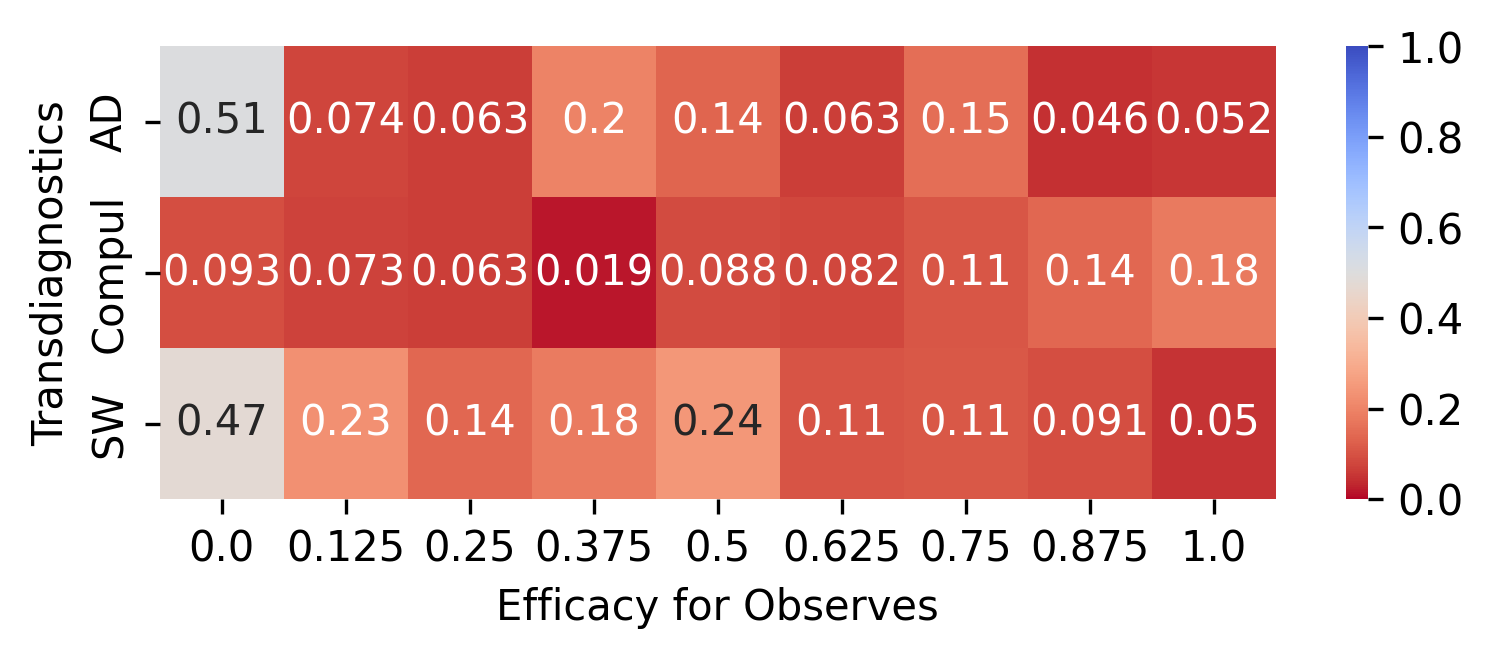

In [203]:
from human_utils_transdiagnostics import compute_2D_correlation_transdiagnostics

corr_fig, pvs_fig = compute_2D_correlation_transdiagnostics(np.stack(df['n_observes'].values).squeeze(), df[['AD', 'Compul', 'SW']], df["effs"], "Observes", ["AD", "Compul", "SW"], groups = df["group"])

In [204]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_trans_task1_observes.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_trans_task1_observes.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_trans_task1_observes.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_trans_task1_observes.svg'))

### Observes Stats

In [205]:
from human_utils_transdiagnostics import get_clean_combined_data

day = 'day2'
exp_date = '24-01-22-29'
# day1_test_mask_cutoff = {
#     "groupA": {"lower": 10, "upper": 90},
#     "groupB": {"lower": 8, "upper": 72}
# }
day1_test_mask_cutoff = None

group = None
human_data_file_base = '/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis'

df, effs_sorted_train, effs_sorted_test, test_start = get_clean_combined_data(day = int(day[-1]), group = group, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, file_base=human_data_file_base)

effs = np.arange(0, 1.125, 0.125)
n_steps = 50

In [206]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Step 1: Reset the index
df_reset = df.reset_index()

# Step 2: Explode the 'n_observes' column while keeping the original index as a column
df_exploded = df_reset[['index', 'n_observes',]].explode('n_observes')

# Step 3: Create the 'efficacy_index' and convert 'n_observes' to numeric type
df_exploded['efficacy_index'] = df_exploded.groupby('index').cumcount()
df_exploded['n_observes'] = pd.to_numeric(df_exploded['n_observes'], errors='coerce')

# Step 4: Merge the 'AD' column from the original DataFrame
df_exploded = pd.merge(df_exploded, df_reset[['index', 'group', 'AD', 'Compul', 'SW']], on='index', how='left')


# Step 5: If you want to recreate the 'pid' column to be the same as the original index
df_exploded['pid'] = df_exploded['index']
df_exploded.drop('index', axis=1, inplace=True)  # Optional: Remove the temporary 'index' column


columns_to_keep = ['n_observes', 'group', 'efficacy_index', 'pid', 'AD', 'Compul', 'SW']
df_exploded = df_exploded[columns_to_keep]

print(df_exploded)


      n_observes  group  efficacy_index                       pid        AD  \
0              5   True               0  63bafd5660d1226b353b827f -0.248599   
1             12   True               1  63bafd5660d1226b353b827f -0.248599   
2             13   True               2  63bafd5660d1226b353b827f -0.248599   
3              1   True               3  63bafd5660d1226b353b827f -0.248599   
4             10   True               4  63bafd5660d1226b353b827f -0.248599   
...          ...    ...             ...                       ...       ...   
1633           8   True               4  63d190d52bb71e0e81d868f2  0.205492   
1634          10   True               5  63d190d52bb71e0e81d868f2  0.205492   
1635           5   True               6  63d190d52bb71e0e81d868f2  0.205492   
1636          10   True               7  63d190d52bb71e0e81d868f2  0.205492   
1637           9   True               8  63d190d52bb71e0e81d868f2  0.205492   

        Compul        SW  
0     0.064135  0.297005

In [207]:
# Fit the model
#model = ols('signed_dev_rews_test ~ C(pid) + C(efficacy_index) + C(pid):C(efficacy_index)', data=df_exploded).fit()
model = ols('n_observes ~ efficacy_index + AD + Compul + SW + C(group) + C(pid)', data=df_exploded).fit()
# Run the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                      sum_sq      df          F    PR(>F)
C(group)            4.787506     1.0   0.889649  0.345729
C(pid)          39392.236669   181.0  40.442807  0.000000
efficacy_index     79.033059     1.0  14.686490  0.000132
AD                  0.861462     1.0   0.160083  0.689139
Compul             78.573915     1.0  14.601169  0.000138
SW                  7.609830     1.0   1.414113  0.234569
Residual         7829.855830  1455.0        NaN       NaN


In [208]:
import statsmodels.formula.api as smf

# Assuming df_exploded is your DataFrame
model = smf.mixedlm('n_observes ~ efficacy_index + AD + Compul + SW + C(group)', 
                    df_exploded, 
                    groups=df_exploded["pid"], )
                    #re_formula="~efficacy_index")
result = model.fit()

print(result.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  n_observes
No. Observations:  1638     Method:              REML      
No. Groups:        182      Scale:               5.3815    
Min. group size:   9        Log-Likelihood:      -4024.5855
Max. group size:   9        Converged:           Yes       
Mean group size:   9.0                                     
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         4.770    0.520  9.177 0.000  3.751  5.788
C(group)[T.True] -0.046    0.681 -0.067 0.947 -1.380  1.289
efficacy_index   -0.085    0.022 -3.832 0.000 -0.129 -0.042
AD               -0.208    0.614 -0.339 0.735 -1.411  0.995
Compul            0.778    0.629  1.237 0.216 -0.455  2.011
SW                0.815    0.621  1.311 0.190 -0.403  2.033
Group Var        20.315    1.015                   

#### Based on binarized group allocation

In [209]:
from scipy.stats import ttest_ind

# Sum the 'n_observes' list for each row and determine the group
df['sum_n_observes'] = df['n_observes'].apply(sum)
df['obs_group'] = df['sum_n_observes'].apply(lambda x: '>=10' if x >= 10 else '<10')

# Separate the 'AD' values into two groups
ad_values_ge10 = df[df['obs_group'] == '>=10']['AD']
ad_values_lt10 = df[df['obs_group'] == '<10']['AD']

# Perform a t-test between the two groups
t_stat, p_value = ttest_ind(ad_values_ge10, ad_values_lt10, equal_var=False)

print(f'T-test results:\nT-statistic: {t_stat}, P-value: {p_value}')

# Interpretation of the results
if p_value < 0.05:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

# Output additional stats
print("\nStats for 'AD' values where sum of n_observes >= 10:")
print(ad_values_ge10.describe())

print("\nStats for 'AD' values where sum of n_observes < 10:")
print(ad_values_lt10.describe())

T-test results:
T-statistic: 3.276952241904348, P-value: 0.0013370542940659951
There is a significant difference between the two groups.

Stats for 'AD' values where sum of n_observes >= 10:
count    121.000000
mean       0.154444
std        0.744880
min       -1.350727
25%       -0.421457
50%        0.048243
75%        0.754402
max        1.766780
Name: AD, dtype: float64

Stats for 'AD' values where sum of n_observes < 10:
count    61.000000
mean     -0.201221
std       0.662465
min      -1.350691
25%      -0.630520
50%      -0.241324
75%       0.157608
max       1.369790
Name: AD, dtype: float64


In [210]:
from scipy.stats import ttest_ind

# Sum the 'n_observes' list for each row and determine the group
df['sum_n_observes'] = df['n_observes'].apply(sum)
df['obs_group'] = df['sum_n_observes'].apply(lambda x: '>=10' if x >= 10 else '<10')

# Separate the 'AD' values into two groups
ad_values_ge10 = df[df['obs_group'] == '>=10']['Compul']
ad_values_lt10 = df[df['obs_group'] == '<10']['Compul']

# Perform a t-test between the two groups
t_stat, p_value = ttest_ind(ad_values_ge10, ad_values_lt10, equal_var=False)

print(f'T-test results:\nT-statistic: {t_stat}, P-value: {p_value}')

# Interpretation of the results
if p_value < 0.05:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

# Output additional stats
print("\nStats for 'Compul' values where sum of n_observes >= 10:")
print(ad_values_ge10.describe())

print("\nStats for 'Compul' values where sum of n_observes < 10:")
print(ad_values_lt10.describe())

T-test results:
T-statistic: 3.191694477258087, P-value: 0.0017995575031321787
There is a significant difference between the two groups.

Stats for 'Compul' values where sum of n_observes >= 10:
count    121.000000
mean       0.172382
std        0.658881
min       -1.026007
25%       -0.278555
50%        0.093877
75%        0.566357
max        2.280756
Name: Compul, dtype: float64

Stats for 'Compul' values where sum of n_observes < 10:
count    61.000000
mean     -0.155061
std       0.650522
min      -0.948764
25%      -0.620234
50%      -0.329633
75%       0.092286
max       1.861967
Name: Compul, dtype: float64


In [211]:
from scipy.stats import ttest_ind

# Sum the 'n_observes' list for each row and determine the group
df['sum_n_observes'] = df['n_observes'].apply(sum)
df['obs_group'] = df['sum_n_observes'].apply(lambda x: '>=10' if x >= 10 else '<10')

# Separate the 'AD' values into two groups
ad_values_ge10 = df[df['obs_group'] == '>=10']['SW']
ad_values_lt10 = df[df['obs_group'] == '<10']['SW']

# Perform a t-test between the two groups
t_stat, p_value = ttest_ind(ad_values_ge10, ad_values_lt10, equal_var=False)

print(f'T-test results:\nT-statistic: {t_stat}, P-value: {p_value}')

# Interpretation of the results
if p_value < 0.05:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

# Output additional stats
print("\nStats for 'SW' values where sum of n_observes >= 10:")
print(ad_values_ge10.describe())

print("\nStats for 'SW' values where sum of n_observes < 10:")
print(ad_values_lt10.describe())

T-test results:
T-statistic: 2.7057735888606826, P-value: 0.007843864690664464
There is a significant difference between the two groups.

Stats for 'SW' values where sum of n_observes >= 10:
count    121.000000
mean       0.399333
std        0.738154
min       -1.336016
25%       -0.063003
50%        0.421700
75%        0.903451
max        1.784926
Name: SW, dtype: float64

Stats for 'SW' values where sum of n_observes < 10:
count    61.000000
mean      0.076286
std       0.771253
min      -1.328014
25%      -0.519167
50%       0.146895
75%       0.567378
max       1.732467
Name: SW, dtype: float64


### Sleeps

In [212]:
from human_utils_transdiagnostics import get_clean_combined_data

day = 'day3'
exp_date = '24-01-22-29'
# day1_test_mask_cutoff = {
#     "groupA": {"lower": 10, "upper": 90},
#     "groupB": {"lower": 8, "upper": 72}
# }
day1_test_mask_cutoff = None

group = None
human_data_file_base = '/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis'

df, effs_sorted_train, effs_sorted_test, test_start = get_clean_combined_data(day = int(day[-1]), group = group, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, file_base=human_data_file_base)

effs = np.arange(0, 1.125, 0.125)
n_steps = 50

(86, 9)


(96, 9)


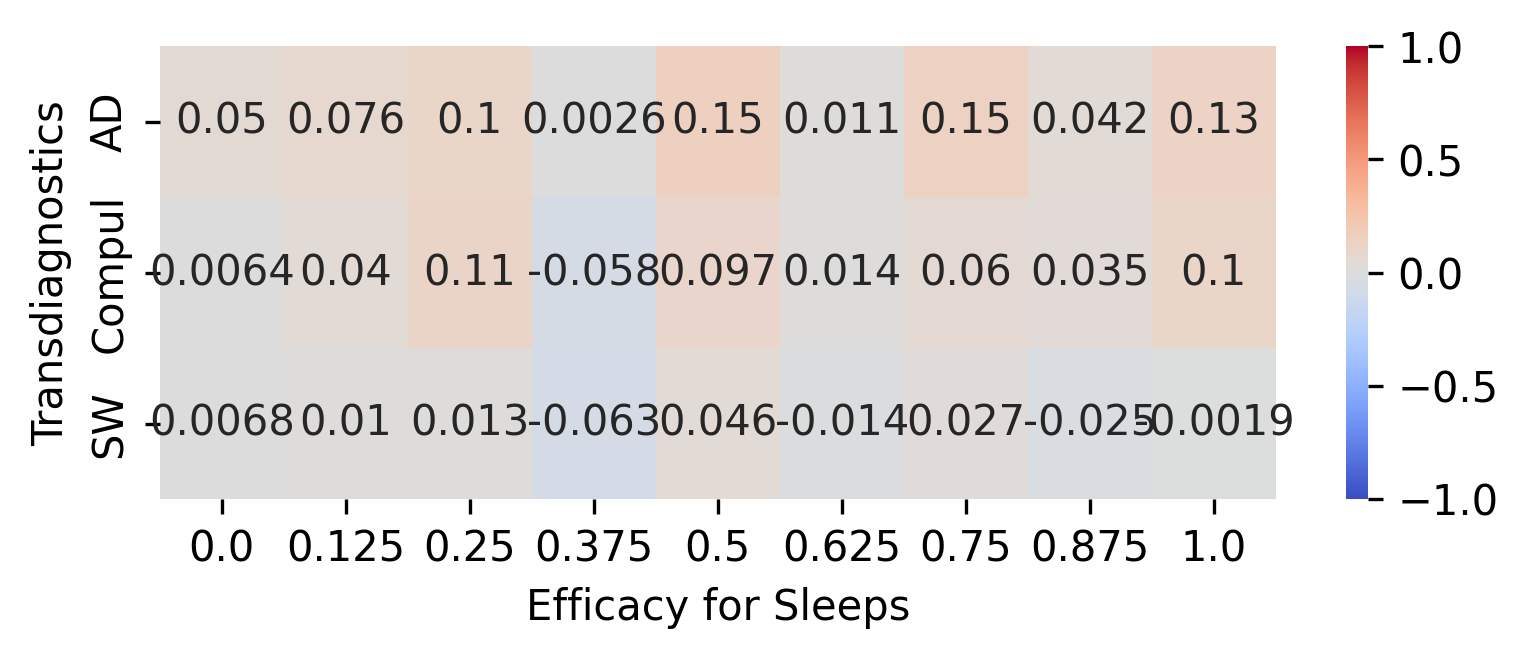

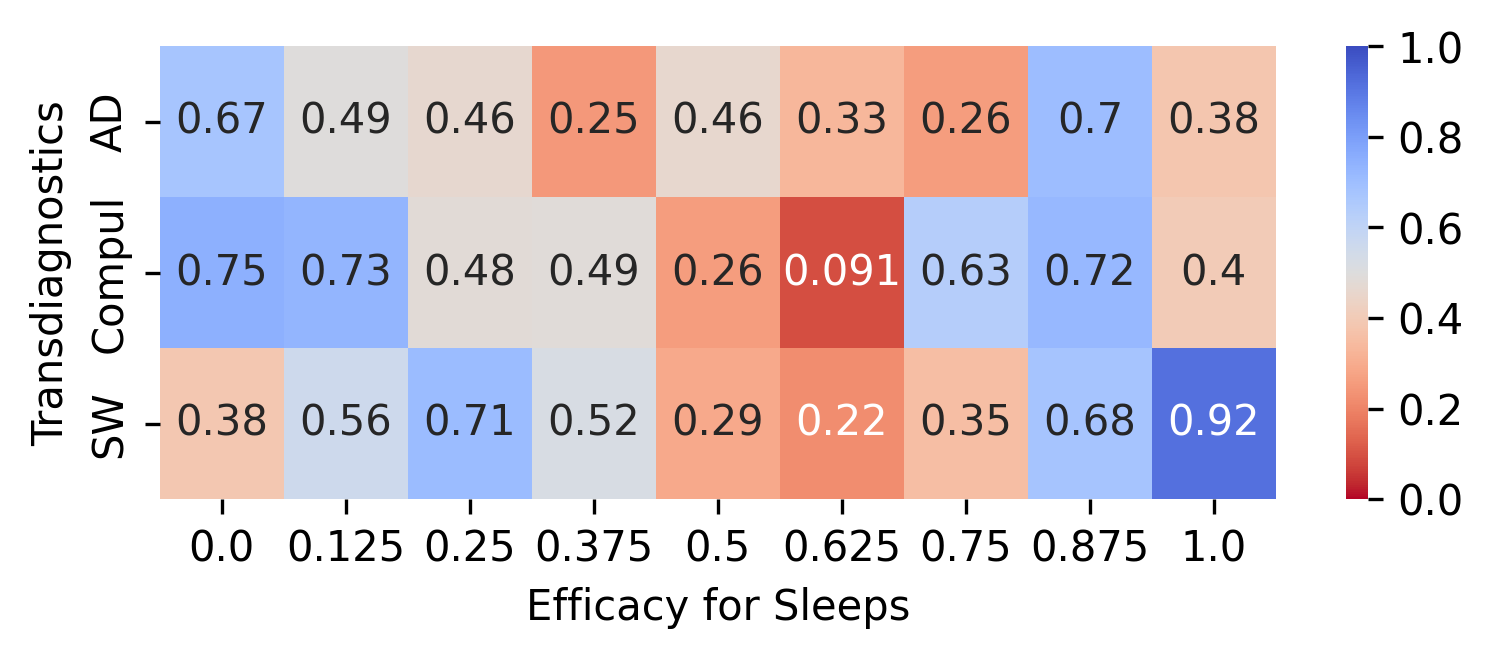

In [213]:
from human_utils_transdiagnostics import compute_2D_correlation_transdiagnostics

corr_fig, pvs_fig = compute_2D_correlation_transdiagnostics(np.stack(df['n_sleeps'].values).squeeze(), df[['AD', 'Compul', 'SW']], df["effs"], "Sleeps", ["AD", "Compul", "SW"], groups = df["group"])

In [214]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_trans_task2_sleeps.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_trans_task2_sleeps.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_trans_task2_sleeps.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_trans_task2_sleeps.svg'))

### Stats

In [215]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Step 1: Reset the index
df_reset = df.reset_index()

# Step 2: Explode the 'n_observes' column while keeping the original index as a column
df_exploded = df_reset[['index', 'n_sleeps',]].explode('n_sleeps')

# Step 3: Create the 'efficacy_index' and convert 'n_observes' to numeric type
df_exploded['efficacy_index'] = df_exploded.groupby('index').cumcount()
df_exploded['n_sleeps'] = pd.to_numeric(df_exploded['n_sleeps'], errors='coerce')

# Step 4: Merge the 'AD' column from the original DataFrame
df_exploded = pd.merge(df_exploded, df_reset[['index', 'group', 'AD', 'Compul', 'SW']], on='index', how='left')

# Step 5: If you want to recreate the 'pid' column to be the same as the original index
df_exploded['pid'] = df_exploded['index']
df_exploded.drop('index', axis=1, inplace=True)  # Optional: Remove the temporary 'index' column

columns_to_keep = ['n_sleeps', 'group', 'efficacy_index', 'pid', 'AD', 'Compul', 'SW']
df_exploded = df_exploded[columns_to_keep]

print(df_exploded)


      n_sleeps  group  efficacy_index                       pid        AD  \
0           11   True               0  63bafd5660d1226b353b827f -0.248599   
1            2   True               1  63bafd5660d1226b353b827f -0.248599   
2            1   True               2  63bafd5660d1226b353b827f -0.248599   
3            7   True               3  63bafd5660d1226b353b827f -0.248599   
4            1   True               4  63bafd5660d1226b353b827f -0.248599   
...        ...    ...             ...                       ...       ...   
1633         2   True               4  63d190d52bb71e0e81d868f2  0.205492   
1634         3   True               5  63d190d52bb71e0e81d868f2  0.205492   
1635         4   True               6  63d190d52bb71e0e81d868f2  0.205492   
1636         2   True               7  63d190d52bb71e0e81d868f2  0.205492   
1637         3   True               8  63d190d52bb71e0e81d868f2  0.205492   

        Compul        SW  
0     0.064135  0.297005  
1     0.064135  0.297

In [216]:
# Fit the model
#model = ols('signed_dev_rews_test ~ C(pid) + C(efficacy_index) + C(pid):C(efficacy_index)', data=df_exploded).fit()
model = ols('n_sleeps ~ C(pid) + efficacy_index + AD + Compul + SW + C(group)', data=df_exploded).fit()
# Run the ANOVA
anova_table = sm.stats.anova_lm(model, typ=1)

print(anova_table)

                    df        sum_sq    mean_sq         F        PR(>F)
C(pid)           181.0   5637.719780  31.147623  4.069693  3.803791e-51
C(group)           1.0     23.539611  23.539611  3.075644  7.968367e-02
efficacy_index     1.0     20.648453  20.648453  2.697890  1.006972e-01
AD                 1.0      2.137121   2.137121  0.279232  5.972853e-01
Compul             1.0     30.864007  30.864007  4.032636  4.481269e-02
SW                 1.0     20.531615  20.531615  2.682624  1.016647e-01
Residual        1455.0  11135.924206   7.653556       NaN           NaN


#### Binarization based on sleepers and non-sleepers

In [217]:
from scipy.stats import ttest_ind

# Sum the 'n_observes' list for each row and determine the group
df['sum_n_sleeps'] = df['n_sleeps'].apply(sum)
df['sleeps_group'] = df['sum_n_sleeps'].apply(lambda x: '>=5' if x >= 5 else '<5')

# Separate the 'AD' values into two groups
ad_values_ge10 = df[df['sleeps_group'] == '>=5']['AD']
ad_values_lt10 = df[df['sleeps_group'] == '<5']['AD']

# Perform a t-test between the two groups
t_stat, p_value = ttest_ind(ad_values_ge10, ad_values_lt10, equal_var=False)

print(f'T-test results:\nT-statistic: {t_stat}, P-value: {p_value}')

# Interpretation of the results
if p_value < 0.05:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

# Output additional stats
print("\nStats for 'AD' values where sum of n_observes >= 10:")
print(ad_values_ge10.describe())

print("\nStats for 'AD' values where sum of n_observes < 10:")
print(ad_values_lt10.describe())

T-test results:
T-statistic: 0.9435011599946346, P-value: 0.3498925692647167
There is no significant difference between the two groups.

Stats for 'AD' values where sum of n_observes >= 10:
count    149.000000
mean       0.058002
std        0.748373
min       -1.350727
25%       -0.467448
50%       -0.009605
75%        0.630010
max        1.766780
Name: AD, dtype: float64

Stats for 'AD' values where sum of n_observes < 10:
count    33.000000
mean     -0.067544
std       0.678418
min      -1.350691
25%      -0.544418
50%      -0.075901
75%       0.281054
max       1.369790
Name: AD, dtype: float64
